# Ex. 7.2

## Another way of investigating the structure of bALA’s potential energy surface is to optimize the molecule’s structure with its  and dihedral angles fixed at particular values. Devise a program that does this by constraining  and during an optimization with a set of soft-constraint energy terms. Terms of the appropriate type were described in Section 5.6. Ensure that enough optimizations are performed so that the full range of both angles (−180 to 180) is explored. Plot the resulting optimized energies as a function of the angles using a contour plot.

In [1]:
from Definitions import *
from pMolecule import RestraintDihedral
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

In [2]:
# Define some parameters.
force_constant =  20.0
angles = np.linspace(-180, 180, 36)

# Define the atom indices.
phi_angle = [10, 9, 7, 5]
psi_angle = [10, 9, 15, 17]

In [3]:
# Define the energy models.
mmModel = MMModelOPLS.WithParameterSet("bookSmallExamples")
nbModel = NBModelFull.WithDefaults()

In [4]:
# Generate the molecule.
molecule = ImportSystem(os.path.join(molPath, "bala_c7eq.mol"))
molecule.DefineMMModel(mmModel)
molecule.DefineNBModel(nbModel)
molecule.Summary()
molecule.Energy()


System imported from "~/Programs/pDynamo3/pDynamo3-main/examples/book/data/mol/bala_c7eq.mol" in MDL MOL format.

--------------------------------------------------------------------------------------------------------
                          Summary of System "bALA C7 equatorial configuration"
--------------------------------------------------------------------------------------------------------
------------------------------------------------- Atoms ------------------------------------------------
Atoms                           =                22  Heavy Atoms                     =                10
Hydrogens                       =                12
--------------------------------------------- Connectivity ---------------------------------------------
Angles                          =                36  Atoms                           =                22
Bonds                           =                21  Dihedrals                       =                41
Isolates           

-168.03056528811538

In [5]:
# Define restraints.
restraints = RestraintModel()
molecule.DefineRestraintModel(restraints)

In [6]:
%%capture

results = {"phi": [], "psi": [], "energy": [], "coordinates": []}

for phi in angles:
    # defining phi
    r_model_phi = RestraintEnergyModel.Harmonic(phi, force_constant, period = 360.0)
    restraint_phi = RestraintDihedral.WithOptions (energyModel = r_model_phi,
                                                   point1 = phi_angle[0],
                                                   point2 = phi_angle[1],
                                                   point3 = phi_angle[2],
                                                   point4 = phi_angle[3])
    restraints["Phi"] = restraint_phi
    
    for psi in angles:
        # defining psi
        r_model_psi = RestraintEnergyModel.Harmonic(psi, force_constant, period = 360.0)
        restraint_psi = RestraintDihedral.WithOptions (energyModel = r_model_psi,
                                                       point1 = psi_angle[0],
                                                       point2 = psi_angle[1],
                                                       point3 = psi_angle[2],
                                                       point4 = psi_angle[3])
        restraints["Psi"] = restraint_psi

        # geometry optimization
        ConjugateGradientMinimize_SystemGeometry(molecule,
                                                 maximumIterations = 2000,
                                                 logFrequency = 10,
                                                 rmsGradientTolerance = 0.1)
        
        # appending results
        results["phi"].append(molecule.coordinates3.Dihedral(phi_angle[0],
                                                             phi_angle[1],
                                                             phi_angle[2],
                                                             phi_angle[3]))
        
        results["psi"].append(molecule.coordinates3.Dihedral(psi_angle[0],
                                                             psi_angle[1],
                                                             psi_angle[2],
                                                             psi_angle[3]))
        
        results["energy"].append(molecule.Energy())
        
        results["coordinates"].append(Clone(molecule.coordinates3))


-------------------- Summary of Conjugate Gradient Minimizer -------------------
Beta Type                  =          1  Initial Step               =        0.1
Log Frequency              =         10  Maximum Iterations         =       2000
Maximum Theta              =      1e+10  Minimum Theta              =      1e-10
RMS Gradient Tolerance     =        0.1  Steepest Descent Tolerance =      0.001
Use Spectral Theta         =       True
--------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------
  Iteration       Function          RMS Gradient        Max. |Grad.|          RMS Disp.         Max. |Disp.|
----------------------------------------------------------------------------------------------------------------
     0     I      12571.23723431       7083.45971064      32121.96392273          0.01230915          0.05581934
    10   L1s       -144.

   180   L1s       -162.62705689          0.52777952          2.42297742          0.00008996          0.00031546
   190   L1s       -162.62854266          0.35465041          1.09061627          0.00004487          0.00015599
   200   L1s       -162.62990201          0.36694831          1.33954329          0.00007427          0.00027944
   210   L1s       -162.63187630          0.62907411          1.95205210          0.00025881          0.00104637
   220   L1s       -162.63490775          0.61244699          1.93196469          0.00027560          0.00119759
   230   L1s       -162.64077988          0.77332485          2.35789116          0.00048437          0.00209232
   240   L1s       -162.64632041          1.01407933          4.19154019          0.00040654          0.00173796
   250   L1s       -162.65038856          0.63278847          2.55126108          0.00011805          0.00052032
   260   L1s       -162.65288150          0.35029429          1.24199465          0.00006182    

   120   L1s       -159.68783272          0.67235038          2.85437702          0.00007872          0.00024410
   130   L1s       -159.68944729          0.20975259          0.59752365          0.00010333          0.00038034
   140   L1s       -159.69150360          0.26051174          0.94470392          0.00003817          0.00017509
   150   L1s       -159.69552795          0.53918108          2.48185436          0.00006110          0.00029760
   160   L1s       -159.69988119          0.36908739          1.18049930          0.00036445          0.00173812
   170   L3s       -159.70287854          0.83896046          3.59874310          0.00051846          0.00229276
   180   L1s       -159.70542978          0.73167525          2.51198064          0.00013789          0.00058947
   190   L1s       -159.70822345          0.25035704          0.73780967          0.00005365          0.00022263
   200   L1s       -159.71089052          0.30889864          0.93496042          0.00011528    

    90   L0s       -159.36372480          1.51362477          5.70306102          0.00065094          0.00188907
   100   L1s       -159.39797390          2.28080360         10.16428271          0.00064354          0.00194879
   110   L1s       -159.41886130          0.44527228          1.47436522          0.00014926          0.00049350
   120   L1s       -159.42701869          0.26548302          0.89829176          0.00004534          0.00013654
   130   L1s       -159.43124171          0.58484666          2.49550458          0.00004044          0.00015046
   140   L1s       -159.43660107          0.72370962          2.97182139          0.00023153          0.00096803
   150   L1s       -159.44279139          1.12477581          5.02439926          0.00037971          0.00176734
   160   L1s       -159.44757361          0.64530565          2.83617916          0.00005080          0.00017669
   170   L1s       -159.45186031          0.32092826          0.80484341          0.00003695    

   130   L0s       -159.84416841          0.51451204          1.85713398          0.00017296          0.00055903
   140   L1s       -159.84646758          0.35742300          1.02172667          0.00011463          0.00040174
   150   L1s       -159.84921621          0.72980682          2.95200979          0.00033546          0.00113358
   160   L1s       -159.85138481          0.36960956          1.63577246          0.00019895          0.00074932
   170   L0s       -159.85305795          0.42966274          2.15515412          0.00019942          0.00083096
   180   L1s       -159.85613136          0.52656861          1.61698696          0.00024945          0.00104266
   190   L0s       -159.85879762          0.42407249          1.34226079          0.00018780          0.00077589
   200   L1s       -159.86191021          0.65524847          2.14831115          0.00022454          0.00096194
   210   L0s       -159.86483262          0.40951779          1.24458341          0.00020981    

   200   L1s       -157.63215316          0.14296349          0.52431087          0.00002030          0.00008265
   210   L2s       -157.63300271          0.18246797          0.57403197          0.00014292          0.00053872
   220   L1s       -157.63387625          0.30158014          1.29710385          0.00001679          0.00005178
   230   L1s       -157.63450453          0.10090167          0.33974147          0.00007269          0.00030855
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           503  Iterations              =           239
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -157.6349  RMS Gradient            =         

    10   L1s       -137.01768612         34.76777974        136.51578604          0.00578259          0.01967862
    20   L1s       -142.46557549         12.91947001         47.78465117          0.00214124          0.00783656
    30   L1s       -143.21611688          6.30353395         25.98493522          0.00083940          0.00375472
    40   L1s       -143.51549947          2.05412998          6.17508131          0.00071576          0.00163776
    50   L1s       -143.62954580          2.71845179          8.32599248          0.00064271          0.00183374
    60   L1s       -143.71227650          3.55144289         12.97884083          0.00089986          0.00229274
    70   L1s       -143.76471382          1.79773131          7.79314984          0.00018496          0.00049195
    80   L2s       -143.78752509          1.19109302          4.07081550          0.00051403          0.00208753
    90   L1s       -143.80694065          0.53195193          1.54406175          0.00025530    

   210   L1s       -129.98377102          0.67383109          2.97168084          0.00011239          0.00044439
   220   L1s       -129.98748431          0.42007510          1.29348077          0.00003668          0.00013653
   230   L1s       -129.99021728          0.65889983          2.71344882          0.00007935          0.00027425
   240   L1s       -129.99343953          0.49954412          2.31752972          0.00020029          0.00073091
   250   L1s       -129.99490420          0.20513756          0.65148100          0.00008019          0.00021169
   260   L1s       -129.99582531          0.23162045          0.95412290          0.00002560          0.00005851
   270   L1s       -129.99644602          0.16937203          0.72853754          0.00005226          0.00013986
   280   L1s       -129.99682746          0.10212701          0.38255893          0.00002512          0.00005603
------------------------------------------------------------------------------------------------

    10   L1s       -111.76709011         29.90529719         95.66553703          0.00101306          0.00257219
    20   L1s       -118.61901908         10.43084738         33.95827372          0.00379374          0.01140237
    30   L1s       -119.58151126          7.84696089         31.68871475          0.00056670          0.00125136
    40   L1s       -120.09132186          6.14023767         23.57704020          0.00155415          0.00558253
    50   L1s       -120.49780843          4.58326208         18.48673467          0.00220368          0.00673176
    60   L0s       -120.74391664          4.73817826         15.84857903          0.00135788          0.00389172
    70   L1s       -120.89313016          3.06266950         10.77764872          0.00032750          0.00085302
    80   L1s       -120.98527670          2.33217657          8.34832234          0.00129109          0.00357869
    90   L1s       -121.04672193          2.18321393         10.28827221          0.00030301    

    10   L1s       -118.37050458         20.52309083         76.33794457          0.00080509          0.00209321
    20   L1s       -123.49332179         21.29775839         86.01533424          0.00210053          0.00709041
    30   L1s       -124.67311819          3.05154250         10.59792096          0.00045296          0.00166603
    40   L1s       -124.86732597          6.05933645         27.06112495          0.00045710          0.00119012
    50   L1s       -125.10776353          2.41469016          7.93150262          0.00079651          0.00175073
    60   L1s       -125.24124495          3.31694560         13.49098501          0.00030307          0.00103583
    70   L1s       -125.38006632          2.84322873         10.65977445          0.00085983          0.00249168
    80   L1s       -125.44583316          1.64260145          5.09179100          0.00019326          0.00063784
    90   L1s       -125.49251325          2.81102777         12.94679584          0.00038490    

    20   L1s       -134.87144560         19.50441492         94.95059220          0.00116119          0.00340562
    30   L1s       -135.71688885          5.69284963         26.83818536          0.00029843          0.00072952
    40   L1s       -135.91005369          5.66265380         22.22733410          0.00079904          0.00203873
    50   L1s       -136.06844087          3.34695097         11.86121491          0.00067508          0.00157706
    60   L3s       -136.17372364          2.09389784          8.49958113          0.00084463          0.00219074
    70   L1s       -136.21664552          1.56505672          5.99938482          0.00078044          0.00281809
    80   L1s       -136.24600889          0.87682018          3.00439641          0.00016990          0.00059452
    90   L1s       -136.28116230          3.42429587         12.94396749          0.00134303          0.00536463
   100   L1s       -136.31529441          0.82012772          2.84448123          0.00082824    

   230   L1s       -142.63582943          0.21523320          0.76631094          0.00004474          0.00014076
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           496  Iterations              =           236
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -142.6367  RMS Gradient            =             None
Fourier Dihedral        =          18.3316  Fourier Out-Of-Plane    =           0.0480
Harmonic Angle          =           3.5550  Harmonic Bond           =           0.9943
MM/MM 1-4 Electrostatic =         102.0597  MM/MM 1-4 Lennard-Jones =          16.5218
MM/MM Electrostatic     =        -276.6128  MM/MM Lennard-Jones     =

   160   L1s       -147.21472501          0.62111834          1.77774874          0.00035785          0.00131151
   170   L1s       -147.22845443          0.57238862          1.57363271          0.00012627          0.00048106
   180   L1s       -147.23975118          0.45521299          1.06574785          0.00031482          0.00102966
   190   L3s       -147.24480108          0.52135149          1.98573473          0.00016229          0.00054386
   200   L1s       -147.24715979          0.45369635          1.77937102          0.00004935          0.00016237
   210   L1s       -147.24976902          0.38069647          1.26932726          0.00003530          0.00012834
   220   L1s       -147.25293962          0.34320519          1.16274861          0.00034247          0.00133638
   230   L1s       -147.25489836          0.18597195          0.57598141          0.00008802          0.00028235
   240   L3s       -147.25615958          0.24708497          0.85451993          0.00009339    

   200   L1s       -153.71495975          1.05593144          3.10507044          0.00071547          0.00263299
   210   L1s       -153.72552785          0.64130692          1.86441967          0.00012011          0.00046268
   220   L1s       -153.72857751          0.43923971          1.48749343          0.00004979          0.00018816
   230   L1s       -153.73011400          0.25600867          0.64475430          0.00003224          0.00009116
   240   L0s       -153.73116670          0.21904119          0.78490062          0.00003063          0.00008384
   250   L1s       -153.73197976          0.43116352          1.65986406          0.00006867          0.00017607
   260   L1s       -153.73297065          0.35477179          1.33310583          0.00008356          0.00022603
   270   L0s       -153.73369326          0.18745475          0.78782031          0.00003881          0.00010269
------------------------------------------------------------------------------------------------

   170   L1s       -163.05097603          0.97580025          2.93934454          0.00047859          0.00189088
   180   L1s       -163.06199324          1.45478986          5.76140586          0.00078586          0.00310234
   190   L1s       -163.07363822          0.58662193          2.20063737          0.00023271          0.00088707
   200   L1s       -163.07653474          0.31303669          0.83563638          0.00009167          0.00035675
   210   L1s       -163.07765877          0.26124501          0.81254741          0.00002820          0.00008974
   220   L1s       -163.07824496          0.18869751          0.77324143          0.00003373          0.00007551
   230   L1s       -163.07859194          0.16162329          0.57498087          0.00003430          0.00008820
   240   L1s       -163.07897877          0.18400516          0.71061688          0.00003780          0.00010472
   250   L1s       -163.07943145          0.20316653          0.87250577          0.00003289    

    30   L1s       -167.63977595          5.53952567         17.32252320          0.00032397          0.00097853
    40   L1s       -167.84338070          4.43446473         21.99007677          0.00079561          0.00259651
    50   L1s       -167.89071945          1.13014538          3.43538703          0.00076541          0.00220159
    60   L1s       -167.92149829          1.23246587          4.21658300          0.00008550          0.00027579
    70   L1s       -167.94513998          0.64038958          1.56881461          0.00062412          0.00194174
    80   L0s       -167.96226639          0.64006599          1.55710159          0.00039950          0.00126158
    90   L1s       -167.97077022          0.46131983          1.56938727          0.00005390          0.00016889
   100   L1s       -167.97741879          0.41903491          1.16912252          0.00004643          0.00017196
   110   L1s       -167.98675312          1.07983495          5.34209263          0.00012724    

   190   L3s       -164.78772863          0.59594379          2.14135183          0.00039876          0.00163826
   200   L1s       -164.78929030          0.36046438          1.27010288          0.00015327          0.00062501
   210   L1s       -164.79007820          0.14436396          0.35574940          0.00002967          0.00010786
   220   L2s       -164.79110013          0.25601408          0.67779452          0.00017795          0.00064076
   230   L1s       -164.79218081          0.08773939          0.27963148          0.00004164          0.00011195
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           514  Iterations              =           230
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   150   L1s       -161.98609153          0.39117843          1.57793420          0.00004207          0.00012738
   160   L1s       -161.98777493          0.54078832          1.73256996          0.00011399          0.00040308
   170   L1s       -161.99192528          0.75241820          2.20284457          0.00026907          0.00113253
   180   L1s       -161.99998159          0.62696774          1.91980120          0.00025804          0.00108419
   190   L1s       -162.00693076          0.63278293          2.36570375          0.00027469          0.00114804
   200   L0s       -162.00939361          0.38365893          1.33469433          0.00009373          0.00040840
   210   L0s       -162.01138209          0.46075730          1.58303888          0.00016232          0.00072048
   220   L0s       -162.01327748          0.36499695          1.28445633          0.00010081          0.00040217
   230   L1s       -162.01473452          0.49090734          1.47429932          0.00010058    

   140   L1s       -158.75445655          0.45763314          1.87399471          0.00002583          0.00009571
   150   L1s       -158.75769289          0.44641511          1.35523637          0.00041820          0.00161844
   160   L1s       -158.76453966          0.43013018          1.46195070          0.00015150          0.00058468
   170   L1s       -158.77148498          0.55922735          2.09058271          0.00005259          0.00021145
   180   L1s       -158.77604884          0.51706554          2.38453710          0.00051122          0.00212387
   190   L1s       -158.77945176          0.42062889          1.18515122          0.00011414          0.00046019
   200   L1s       -158.78257206          0.38550309          1.09799005          0.00024749          0.00102384
   210   L1s       -158.78385749          0.27594936          1.31880542          0.00002277          0.00009865
------------------------------------------------------------------------------------------------

   180   L1s       -158.08813105          0.66787108          2.88297166          0.00013755          0.00057683
   190   L1s       -158.09166934          0.71320020          2.40200222          0.00018950          0.00079327
   200   L1s       -158.09483918          0.45731129          1.91180433          0.00016038          0.00057993
   210   L1s       -158.09753028          0.45548616          1.76138351          0.00020292          0.00074177
   220   L1s       -158.10120415          0.48356731          2.10787175          0.00023727          0.00084941
   230   L1s       -158.10446392          0.62626000          2.73084935          0.00035326          0.00123604
   240   L1s       -158.10746851          0.71718935          3.32927395          0.00031905          0.00106999
   250   L1s       -158.10964179          0.45909116          2.05602402          0.00010404          0.00038540
   260   L1s       -158.11034598          0.25499180          1.08933436          0.00002466    

   100   L1s       -158.06930490          1.07550409          3.26275648          0.00016611          0.00054090
   110   L0s       -158.07998786          0.62139999          1.51497293          0.00038934          0.00136407
   120   L1s       -158.08300712          0.60550748          2.07781069          0.00018894          0.00056664
   130   L1s       -158.08521790          0.43329614          1.37372277          0.00009115          0.00035570
   140   L1s       -158.08793161          0.56188545          2.15122197          0.00009087          0.00035760
   150   L1s       -158.09018299          0.44121086          1.19145691          0.00013606          0.00048899
   160   L1s       -158.09371431          0.42895168          1.57828902          0.00024978          0.00097955
   170   L1s       -158.09677063          0.52292303          2.20047837          0.00011693          0.00047317
   180   L0s       -158.09977317          0.40520586          1.15050301          0.00015790    

   140   L1s       -155.35322557          0.32891080          1.10094596          0.00031290          0.00126333
   150   L1s       -155.35836458          0.96348750          3.28738871          0.00020813          0.00081994
   160   L1s       -155.36262389          0.52101793          1.96677595          0.00006870          0.00026806
   170   L1s       -155.36855824          0.43066413          1.36267306          0.00009873          0.00038914
   180   L3s       -155.37231375          0.50441363          2.15083566          0.00019498          0.00091489
   190   L1s       -155.37324954          0.13493160          0.38740289          0.00007332          0.00033146
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           433  Iterations              =           197
---------------------

   190   L1s       -146.77834410          0.37668623          1.43542932          0.00003916          0.00014407
   200   L1s       -146.78153156          0.33676773          1.02753005          0.00038780          0.00155334
   210   L1s       -146.78304035          0.18704132          0.64457914          0.00002941          0.00011671
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           437  Iterations              =           216
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -146.7833  RMS Gradient            =             None
Fourier Dihedral        =           3.4169  Fourier Out-Of-Plane    =           0.1949
Harmonic Angle   

   100   L0s       -124.59992581          1.80665058          6.71029488          0.00014033          0.00054552
   110   L1s       -124.62952076          2.07923119          7.37082171          0.00025307          0.00101029
   120   L1s       -124.65806528          1.64987482          6.48270849          0.00013484          0.00052220
   130   L1s       -124.68401958          1.32226095          5.03530128          0.00009216          0.00038579
   140   L1s       -124.69819010          1.12207327          3.77167790          0.00010077          0.00045864
   150   L1s       -124.71320311          1.93804740          6.74783974          0.00037558          0.00153452
   160   L1s       -124.74278865          1.51401427          5.52169104          0.00039393          0.00154493
   170   L1s       -124.76001610          0.98027132          3.86295520          0.00014462          0.00059025
   180   L0s       -124.76882700          0.71385370          2.86109889          0.00017578    

   200   L1s       -116.93471517          0.81621800          3.61027856          0.00013273          0.00060941
   210   L1s       -116.94430503          0.51245113          1.40907000          0.00024861          0.00105747
   220   L1s       -116.95436430          0.66902595          2.09433208          0.00054187          0.00181565
   230   L0s       -116.95733116          0.38125995          1.56800007          0.00004643          0.00016566
   240   L1s       -116.95819790          0.31535130          1.09345189          0.00002158          0.00007251
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           482  Iterations              =           249
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   120   L1s       -120.40150454          1.20365667          4.40096440          0.00032848          0.00080891
   130   L1s       -120.40935965          0.38084195          1.09817935          0.00010614          0.00031779
   140   L3s       -120.42166591          0.66664267          2.12150585          0.00058609          0.00230018
   150   L1s       -120.43667993          0.96120104          3.43740208          0.00060830          0.00224824
   160   L1s       -120.44590356          0.58892266          2.24160504          0.00019188          0.00067560
   170   L1s       -120.45130569          0.47915751          1.06322089          0.00023693          0.00086263
   180   L1s       -120.45422132          0.46995262          1.47514165          0.00026143          0.00098679
   190   L0s       -120.45737871          0.61605161          2.05472155          0.00017460          0.00068319
   200   L1s       -120.46120154          0.44064131          1.52074237          0.00007454    

   100   L0s       -128.67292181          1.24843946          4.37628518          0.00057527          0.00140069
   110   L1s       -128.68435578          0.31867777          0.95213306          0.00006350          0.00018571
   120   L1s       -128.68824135          0.78818495          2.72780855          0.00016174          0.00057860
   130   L1s       -128.69364577          0.40965214          1.06252409          0.00036323          0.00143129
   140   L1s       -128.70171487          0.49020026          1.72110603          0.00017585          0.00076582
   150   L1s       -128.71175692          0.70738947          2.40104227          0.00016164          0.00074065
   160   L1s       -128.71888705          0.60649865          2.13410254          0.00010435          0.00044074
   170   L1s       -128.72380798          0.61198959          2.20549071          0.00011863          0.00053527
   180   L1s       -128.72855904          0.78718246          2.93074275          0.00030629    

    80   L3s       -137.12246474          1.52951749          5.40225744          0.00074224          0.00251495
    90   L3s       -137.16236242          1.39791427          4.15680530          0.00148798          0.00543624
   100   L1s       -137.19329734          0.85520516          2.94312616          0.00075333          0.00318138
   110   L1s       -137.21302609          0.99675811          3.01185677          0.00059972          0.00223571
   120   L1s       -137.22887107          0.93885746          3.30013680          0.00052992          0.00158165
   130   L1s       -137.23768365          0.59154291          2.14189767          0.00010384          0.00029216
   140   L1s       -137.24302539          0.43247368          1.22468080          0.00010181          0.00034546
   150   L1s       -137.25148255          0.68613026          2.46997915          0.00025862          0.00092944
   160   L1s       -137.25518062          0.21515186          0.58903346          0.00000778    

    30   L1s       -143.22724439          4.34630228         18.13781297          0.00026673          0.00085961
    40   L1s       -143.50668392          6.04735546         21.19793263          0.00054055          0.00163325
    50   L1s       -143.69813833          3.90489614         14.16176059          0.00073634          0.00174675
    60   L1s       -143.77806029          3.25513227         12.14097737          0.00039745          0.00118727
    70   L3s       -143.81040281          1.79100545          6.89121349          0.00041905          0.00155272
    80   L1s       -143.83037536          1.26349663          4.25567951          0.00010799          0.00038994
    90   L1s       -143.86106332          3.32090787         10.56555060          0.00079635          0.00309560
   100   L1s       -143.89055097          1.53228925          5.95774306          0.00075856          0.00311077
   110   L1s       -143.90240686          0.55551363          1.56729673          0.00022966    

     0     I       1968.15979755       2138.04352740      10058.56351131          0.01230915          0.05790918
    10   L1s       -140.33282213         17.01070408         45.24514778          0.00840091          0.02654962
    20   L1s       -145.56192612         18.24114353         72.30410884          0.00142149          0.00368990
    30   L1s       -146.42336935          5.66272017         23.71999581          0.00023548          0.00064659
    40   L1s       -146.92719148          7.61871531         34.01156641          0.00120730          0.00330137
    50   L1s       -147.24263073          4.30082730         17.74689411          0.00031739          0.00068311
    60   L1s       -147.39996602          1.93683072          6.81361810          0.00007793          0.00022433
    70   L1s       -147.44890526          0.82898172          2.50962301          0.00003984          0.00010138
    80   L1s       -147.46530199          0.51626764          1.81329430          0.00001965    

    10   L1s       -143.31835422         26.50055061         86.10545063          0.00076942          0.00173593
    20   L1s       -150.43071820         11.96739857         45.80583839          0.00042833          0.00109317
    30   L1s       -152.23165194          7.35556260         21.88121837          0.00050033          0.00131787
    40   L3s       -152.93630094          5.24924616         15.13595359          0.00234601          0.00607475
    50   L1s       -153.35732239          3.00551353          9.22720173          0.00040985          0.00089332
    60   L1s       -153.57400279          4.10179430         11.98719044          0.00028049          0.00070947
    70   L1s       -153.64445816          1.53760818          4.96325432          0.00026669          0.00071787
    80   L1s       -153.66366344          0.60012762          1.48573620          0.00015448          0.00043467
    90   L1s       -153.67783037          0.87018967          2.25258612          0.00041832    

   210   L1s       -163.66109771          0.67951529          3.37304919          0.00010379          0.00036669
   220   L1s       -163.66303340          0.19469687          0.48769499          0.00005152          0.00018370
   230   L1s       -163.66387446          0.26304936          1.10274460          0.00002528          0.00008873
   240   L1s       -163.66453455          0.40330434          1.69808800          0.00013854          0.00045830
   250   L1s       -163.66539003          0.24789561          0.73155175          0.00008422          0.00024079
   260   L1s       -163.66645842          0.37475517          1.61344159          0.00007004          0.00020356
   270   L1s       -163.66706427          0.17493091          0.53781418          0.00004442          0.00012271
   280   L1s       -163.66730767          0.10542716          0.32126298          0.00001116          0.00003518
------------------------------------------------------------------------------------------------

   130   L1s       -167.92023021          0.33700971          1.61126354          0.00018994          0.00070046
   140   L1s       -167.92788358          0.36004911          1.54754924          0.00033716          0.00124918
   150   L2s       -167.93577830          0.38690099          1.36054344          0.00045948          0.00159293
   160   L1s       -167.94017145          0.30747036          1.10138632          0.00010033          0.00038370
   170   L1s       -167.94378885          0.80642749          3.53079701          0.00011797          0.00040277
   180   L1s       -167.94746447          0.26398277          1.05465477          0.00009351          0.00026787
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           407  Iterations              =           189
---------------------

    30   L1s       -163.82406597          2.65941850          8.77269488          0.00121010          0.00413256
    40   L1s       -163.98856774          2.42548188          9.74325483          0.00080971          0.00233493
    50   L1s       -164.04574770          1.81098742          7.80615095          0.00008610          0.00017913
    60   L1s       -164.09033989          1.48428351          6.58741222          0.00038731          0.00096622
    70   L1s       -164.11362503          0.81196504          2.09949196          0.00014682          0.00038310
    80   L1s       -164.13633378          0.72143254          2.93908986          0.00004409          0.00013182
    90   L0s       -164.14931613          1.38506160          6.68028671          0.00016840          0.00062505
   100   L1s       -164.15584211          1.19015533          5.58318338          0.00011791          0.00049832
   110   L1s       -164.16308550          0.62190486          2.42360983          0.00004621    

   370   L1s       -161.41572253          0.18643221          0.62473042          0.00006360          0.00023054
   380   L1s       -161.41604765          0.20924976          0.73608091          0.00009158          0.00032606
   390   L1s       -161.41638816          0.19052579          0.81152908          0.00004452          0.00015485
   400   L0s       -161.41671316          0.10299188          0.31999068          0.00004311          0.00013815
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           800  Iterations              =           407
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -161.4168  RMS Gradient            =         

    70   L1s       -157.81544528          0.78811997          2.47503656          0.00016594          0.00045155
    80   L3s       -157.83519408          1.00149738          3.77845634          0.00042877          0.00143286
    90   L1s       -157.85197397          1.08909616          3.74863688          0.00008653          0.00028183
   100   L1s       -157.86350177          0.67097373          1.97991079          0.00048845          0.00186976
   110   L1s       -157.87497184          0.84687617          2.88843141          0.00016345          0.00069663
   120   L1s       -157.88134002          0.59927467          1.81096466          0.00012724          0.00051421
   130   L0s       -157.88423949          0.45589011          1.39871969          0.00012228          0.00046722
   140   L1s       -157.88641909          0.35611959          1.10719872          0.00009137          0.00032908
   150   L1s       -157.88782474          0.44364587          1.71545143          0.00008548    

   180   L1s       -156.03147070          0.69549882          2.48922564          0.00019914          0.00091682
   190   L1s       -156.03419669          0.31413178          0.90936544          0.00008074          0.00029734
   200   L1s       -156.03834367          0.71250197          2.86792686          0.00022642          0.00080189
   210   L1s       -156.04025483          0.22105961          0.71521815          0.00005932          0.00024525
   220   L1s       -156.04098583          0.25777204          1.18725145          0.00006581          0.00023295
   230   L1s       -156.04150888          0.18365254          0.61225379          0.00002140          0.00007632
   240   L1s       -156.04210138          0.13822244          0.41809907          0.00003484          0.00012933
   250   L1s       -156.04253156          0.13999513          0.34566175          0.00004760          0.00015271
   260   L3s       -156.04286472          0.10424138          0.25157612          0.00007022    

    10   L3s       -152.31241786         14.34897871         47.45112551          0.00193520          0.00514224
    20   L1s       -154.62793841          5.84611900         17.51356443          0.00056164          0.00174977
    30   L1s       -155.07554898          5.85591469         26.49207724          0.00060376          0.00147060
    40   L1s       -155.30135744          2.22948749          7.00956483          0.00105896          0.00218558
    50   L1s       -155.47071744          5.85478970         23.14609715          0.00096769          0.00255349
    60   L3s       -155.60155265          4.55981123         16.83318217          0.00113911          0.00317187
    70   L3s       -155.67724255          1.85463847          6.25792692          0.00060894          0.00138786
    80   L1s       -155.70616352          0.96860073          2.79389540          0.00050114          0.00155136
    90   L1s       -155.73442160          0.79314893          2.54615165          0.00029529    

   200   L0s       -154.33215087          0.24546606          0.93103222          0.00006099          0.00020606
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           463  Iterations              =           207
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -154.3324  RMS Gradient            =             None
Fourier Dihedral        =           3.2791  Fourier Out-Of-Plane    =           0.3669
Harmonic Angle          =           2.5392  Harmonic Bond           =           1.0263
MM/MM 1-4 Electrostatic =         104.0350  MM/MM 1-4 Lennard-Jones =          17.7889
MM/MM Electrostatic     =        -277.0254  MM/MM Lennard-Jones     =

   120   L1s       -141.83071172          2.28468838          9.76971253          0.00110639          0.00408492
   130   L1s       -141.85237355          1.22707570          4.46362712          0.00020203          0.00076359
   140   L1s       -141.86494570          1.35330978          5.41800750          0.00051703          0.00201649
   150   L1s       -141.87496676          0.37398839          1.07526941          0.00009229          0.00034310
   160   L1s       -141.87905138          0.37249003          1.21942676          0.00020387          0.00066056
   170   L1s       -141.88157730          0.48397002          1.92582331          0.00016545          0.00059691
   180   L1s       -141.88387055          0.48269637          1.62326844          0.00039716          0.00125724
   190   L1s       -141.88493864          0.25744431          1.15096915          0.00009635          0.00029827
------------------------------------------------------------------------------------------------

   140   L1s       -125.20952541          0.90036376          3.26383310          0.00024508          0.00087375
   150   L1s       -125.22383583          1.19581218          4.42131212          0.00027547          0.00096243
   160   L1s       -125.23912481          1.57189866          6.25832167          0.00078670          0.00288934
   170   L1s       -125.25626266          0.95664884          3.09872371          0.00013489          0.00047231
   180   L1s       -125.26609615          0.92305652          4.10336107          0.00027021          0.00089406
   190   L1s       -125.27233499          1.09611888          4.72571570          0.00020227          0.00084169
   200   L1s       -125.27890137          0.57459738          2.02992570          0.00008354          0.00037976
   210   L1s       -125.28493287          0.62787330          2.13345527          0.00037916          0.00164836
   220   L1s       -125.28892446          0.60742158          2.23412064          0.00024143    

    20   L1s       -109.80171553         14.37790144         41.93210275          0.00063698          0.00199192
    30   L1s       -110.82422330          3.93313009         12.36006415          0.00155805          0.00522813
    40   L1s       -111.45083333          3.90556041         11.54427970          0.00065120          0.00180105
    50   L1s       -111.80434895          2.82151140          9.32634479          0.00052444          0.00159949
    60   L1s       -112.02321360          4.34229857         17.73321106          0.00116704          0.00385552
    70   L1s       -112.12474191          2.55249217         12.52282969          0.00027860          0.00078430
    80   L1s       -112.18740053          1.01894597          3.12600852          0.00006391          0.00016729
    90   L1s       -112.24845497          1.77525481          6.03169653          0.00105000          0.00301066
   100   L1s       -112.31133293          2.32060117          9.11648277          0.00081547    

   100   L1s       -113.71615560          0.58254589          2.29541344          0.00015038          0.00045990
   110   L1s       -113.73604959          0.67713524          1.91681994          0.00031428          0.00114964
   120   L1s       -113.74389643          0.90480042          3.21171907          0.00008443          0.00032577
   130   L1s       -113.75482301          0.62724220          1.84348480          0.00055771          0.00249255
   140   L1s       -113.76664623          1.11714010          2.81266868          0.00154066          0.00688078
   150   L1s       -113.78184224          1.19090373          5.29823114          0.00049997          0.00222514
   160   L1s       -113.79707485          0.78863244          2.17517531          0.00093747          0.00417873
   170   L1s       -113.80330851          0.62960545          2.29463421          0.00024612          0.00093641
   180   L1s       -113.80789427          0.51715964          1.54597275          0.00016629    

   230   L0s       -122.92148749          0.29078798          0.86013118          0.00017860          0.00062293
   240   L1s       -122.92234246          0.26011145          1.02859989          0.00011681          0.00043020
   250   L0s       -122.92268431          0.14584657          0.44057723          0.00004557          0.00015995
   260   L1s       -122.92308953          0.20422031          0.79637591          0.00005933          0.00019044
   270   L1s       -122.92339174          0.15124269          0.50088846          0.00004759          0.00011345
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           566  Iterations              =           271
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

    40   L1s       -137.42119772          2.67782432          9.80314078          0.00034867          0.00146838
    50   L1s       -137.57931745          1.85766514          5.56484981          0.00062207          0.00122467
    60   L1s       -137.69656803          1.58644422          4.98204143          0.00028918          0.00066304
    70   L1s       -137.76385558          1.97733528         10.23128304          0.00014599          0.00047809
    80   L1s       -137.80659774          1.05896642          3.54422643          0.00011051          0.00034086
    90   L1s       -137.84892638          1.44877170          4.16473016          0.00089452          0.00324641
   100   L1s       -137.89765148          1.38130130          5.67759930          0.00015153          0.00048115
   110   L1s       -137.91950905          0.56639244          1.78688235          0.00033284          0.00092007
   120   L1s       -137.92863135          0.39315583          1.73630644          0.00008289    

   170   L0s       -144.80217789          0.46973726          1.31073403          0.00036090          0.00141930
   180   L1s       -144.80850819          0.37536383          1.05554881          0.00009389          0.00034679
   190   L1s       -144.81229446          0.33420290          0.97628989          0.00025906          0.00105223
   200   L1s       -144.81804298          1.36128121          5.57032331          0.00057450          0.00259539
   210   L1s       -144.82427091          0.46685321          1.21611755          0.00014141          0.00053489
   220   L1s       -144.82620682          0.22763951          0.95761560          0.00001711          0.00006564
   230   L1s       -144.82692506          0.07820469          0.21124172          0.00000737          0.00002409
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   160   L1s       -147.19196262          0.42549722          1.99937990          0.00011707          0.00036064
   170   L1s       -147.19518771          0.24919567          0.80810590          0.00021055          0.00057321
   180   L1s       -147.19710679          0.32209750          1.10755727          0.00007702          0.00020341
   190   L1s       -147.19841148          0.18034863          0.47651909          0.00007341          0.00021622
   200   L1s       -147.19953796          0.17255073          0.63419011          0.00008277          0.00023548
   210   L1s       -147.20018806          0.13907192          0.37378287          0.00001109          0.00003046
   220   L1s       -147.20057239          0.15129850          0.42691263          0.00003814          0.00010359
   230   L1s       -147.20088190          0.09189109          0.27708494          0.00003588          0.00010361
------------------------------------------------------------------------------------------------

    70   L1s       -152.86137735          1.20129114          4.26644445          0.00005844          0.00018306
    80   L1s       -152.89001896          1.09589308          3.41638061          0.00007963          0.00023060
    90   L1s       -152.92043834          0.82088197          2.17179647          0.00005462          0.00014813
   100   L1s       -152.93912917          0.61837742          1.91688393          0.00035748          0.00122670
   110   L2s       -152.95463799          0.95874761          3.89687958          0.00124731          0.00509498
   120   L1s       -152.97341428          1.64184595          5.90751862          0.00024261          0.00097917
   130   L1s       -153.00968908          0.77169505          2.43558458          0.00158582          0.00633739
   140   L1s       -153.03170072          0.96027756          2.79479883          0.00022805          0.00088577
   150   L1s       -153.05626267          0.94315528          2.80992060          0.00036955    

   120   L1s       -162.17059091          0.45375646          1.29719843          0.00047066          0.00205114
   130   L1s       -162.18398270          0.60517734          2.07542394          0.00054710          0.00224261
   140   L1s       -162.19928017          1.32069359          5.16299470          0.00061477          0.00267870
   150   L1s       -162.20728697          0.67893904          3.19781557          0.00005967          0.00021296
   160   L1s       -162.21158038          0.41187672          1.59880978          0.00022493          0.00074834
   170   L1s       -162.21488472          0.25169119          0.61181174          0.00022660          0.00067906
   180   L1s       -162.21783999          0.26320731          0.98050072          0.00015552          0.00050851
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   130   L1s       -164.97908043          0.74313890          3.05509504          0.00008189          0.00031533
   140   L1s       -164.99047018          0.71211052          2.38952489          0.00026806          0.00112627
   150   L1s       -165.00424151          0.54194228          2.03470495          0.00066355          0.00280556
   160   L3s       -165.00970266          0.51538560          1.64160397          0.00027743          0.00106288
   170   L1s       -165.01478044          0.65837188          2.22065631          0.00023878          0.00091567
   180   L1s       -165.01932362          0.67641101          2.84918219          0.00025438          0.00093022
   190   L1s       -165.02213653          0.41214202          1.55767286          0.00003859          0.00014041
   200   L1s       -165.02328317          0.26801129          0.99277146          0.00002466          0.00007252
------------------------------------------------------------------------------------------------

    50   L1s       -161.28149565          1.58758987          5.04797222          0.00071315          0.00189243
    60   L3s       -161.32437780          0.68616396          1.87160038          0.00066527          0.00153031
    70   L3s       -161.34098850          0.62064472          1.89046630          0.00027260          0.00064178
    80   L1s       -161.35338080          0.89571302          2.98677283          0.00008326          0.00020219
    90   L3s       -161.36459593          0.88456844          4.03354596          0.00022641          0.00068303
   100   L1s       -161.37092242          0.40709000          1.48994109          0.00014771          0.00056299
   110   L1s       -161.37746550          0.98558237          3.82245470          0.00008307          0.00032689
   120   L1s       -161.38273629          0.25563456          1.08354560          0.00002087          0.00006875
   130   L3s       -161.38489511          0.18784281          0.59578740          0.00016342    

   210   L1s       -155.59792390          0.20245751          0.71656847          0.00014016          0.00056785
   220   L1s       -155.59914529          0.35685949          1.33518303          0.00015128          0.00055843
   230   L1s       -155.59961969          0.19389463          0.61550598          0.00007277          0.00025837
   240   L1s       -155.59993792          0.15359110          0.37618681          0.00006224          0.00025440
   250   L1s       -155.60020724          0.17762987          0.56370411          0.00007412          0.00026688
   260   L1s       -155.60069300          0.24449314          0.83682548          0.00008610          0.00028474
   270   L1s       -155.60107115          0.13435847          0.44902523          0.00003685          0.00012861
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

    80   L1s       -153.21310243          1.97588883          7.75871299          0.00049931          0.00108478
    90   L1s       -153.24675792          1.78278366          8.07989149          0.00026474          0.00067545
   100   L1s       -153.26291640          1.41101004          4.73459883          0.00017447          0.00038532
   110   L1s       -153.27797368          0.95184539          2.81469651          0.00024995          0.00067797
   120   L1s       -153.29381323          1.05375411          4.01686620          0.00030001          0.00071398
   130   L1s       -153.30362304          1.04549766          3.77323103          0.00009580          0.00027842
   140   L1s       -153.31336291          0.71493493          1.71497320          0.00011589          0.00041947
   150   L1s       -153.32405244          0.87535185          3.14205429          0.00035397          0.00131275
   160   L1s       -153.32989211          0.79172471          2.93576525          0.00008588    

   180   L1s       -152.43765594          1.11144828          4.92285337          0.00020164          0.00070833
   190   L1s       -152.44515100          0.52430590          1.47477836          0.00037749          0.00140893
   200   L1s       -152.44872511          0.47049049          1.15709295          0.00009389          0.00035209
   210   L1s       -152.45362553          0.96766918          4.26248659          0.00044775          0.00191904
   220   L1s       -152.45792012          0.52035400          1.67326982          0.00015423          0.00058442
   230   L1s       -152.46077788          0.52111510          1.73647512          0.00015559          0.00054776
   240   L0s       -152.46278749          0.44259519          1.37230342          0.00011404          0.00041011
   250   L1s       -152.46437173          0.28216310          0.74709437          0.00006633          0.00021658
   260   L0s       -152.46500119          0.25070172          1.16460902          0.00003848    

   160   L1s       -151.49390260          0.60395628          1.72940108          0.00024433          0.00091492
   170   L1s       -151.49907970          0.64402409          2.32113062          0.00024515          0.00100883
   180   L1s       -151.50487399          0.97471100          3.05516203          0.00042675          0.00172509
   190   L1s       -151.50935201          0.78907412          3.27232305          0.00015559          0.00058942
   200   L1s       -151.51382465          0.47295540          1.59278776          0.00008417          0.00030049
   210   L0s       -151.51657810          0.35566729          1.31544906          0.00012975          0.00039268
   220   L1s       -151.51882670          0.46090436          1.82055477          0.00013607          0.00046370
   230   L1s       -151.52130651          0.38460032          1.28422351          0.00015048          0.00051635
   240   L1s       -151.52331852          0.45493511          1.40173814          0.00016927    

   170   L1s       -146.88228020          0.37694363          1.02409714          0.00029272          0.00109327
   180   L1s       -146.88582446          0.39689866          1.65107946          0.00021955          0.00069634
   190   L1s       -146.88697012          0.12421224          0.31675213          0.00001173          0.00002838
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           427  Iterations              =           194
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -146.8872  RMS Gradient            =             None
Fourier Dihedral        =           0.4766  Fourier Out-Of-Plane    =           0.4880
Harmonic Angle   

    70   L1s       -125.29311587          1.56637617          6.71871914          0.00019715          0.00059958
    80   L1s       -125.30886625          1.03529543          4.19326067          0.00013241          0.00047924
    90   L1s       -125.32454510          0.82102978          2.28852491          0.00040565          0.00139451
   100   L1s       -125.34088367          0.66831349          2.12160315          0.00044422          0.00142935
   110   L1s       -125.35225525          1.01694294          4.22789091          0.00034919          0.00128871
   120   L1s       -125.36351178          1.21575148          3.88490009          0.00030858          0.00141167
   130   L1s       -125.38940333          1.36014646          4.49193541          0.00089696          0.00411713
   140   L1s       -125.42331897          0.84374781          2.58894874          0.00053606          0.00242599
   150   L1s       -125.43925354          0.88858200          3.56242475          0.00011138    

   100   L1s       -108.03012991          0.87413610          1.97153156          0.00028025          0.00096831
   110   L1s       -108.06015432          1.07244118          3.06785079          0.00016756          0.00073098
   120   L1s       -108.11318275          1.49977622          5.22164507          0.00038255          0.00171271
   130   L1s       -108.14618157          0.87446545          3.13490392          0.00026026          0.00106254
   140   L1s       -108.15999373          1.08783227          4.38250096          0.00040745          0.00178258
   150   L1s       -108.17568347          1.46277416          5.02869505          0.00050183          0.00190802
   160   L0s       -108.20141333          1.48947244          3.94422541          0.00051152          0.00202677
   170   L1s       -108.21828658          1.05246527          3.91778460          0.00024950          0.00102302
   180   L0s       -108.22496187          0.69746381          2.30931703          0.00013963    

   150   L1s       -106.38578893          1.24735839          5.09063375          0.00032377          0.00138434
   160   L1s       -106.40738053          1.49416339          6.25900724          0.00028298          0.00109336
   170   L1s       -106.42276765          0.98410684          3.41511271          0.00012916          0.00050870
   180   L1s       -106.43302067          1.12762045          4.19062901          0.00074872          0.00320561
   190   L1s       -106.44380024          0.72641136          2.66450877          0.00052082          0.00224171
   200   L1s       -106.45420125          0.69185662          2.44683258          0.00016260          0.00072488
   210   L1s       -106.45819927          0.46147170          1.65277657          0.00013129          0.00059185
   220   L0s       -106.46063690          0.43668599          1.24577598          0.00015309          0.00072245
   230   L1s       -106.46212126          0.29780108          1.11265258          0.00005210    

    60   L1s       -115.60049784          4.02194527         17.22628448          0.00266492          0.00658002
    70   L1s       -115.73797895          2.02779766          5.42497876          0.00111764          0.00281101
    80   L1s       -115.80400017          1.53692924          5.46645184          0.00050951          0.00169738
    90   L1s       -115.87225166          1.20433083          3.45161112          0.00043514          0.00143394
   100   L1s       -115.89640923          0.73809013          2.33857840          0.00041448          0.00112358
   110   L1s       -115.90965906          0.66503874          2.62914319          0.00047970          0.00139279
   120   L1s       -115.92057107          0.78275254          2.30080749          0.00033289          0.00133408
   130   L1s       -115.92753100          0.76799563          2.44938899          0.00022451          0.00096948
   140   L1s       -115.93535471          0.80424241          2.92172839          0.00052121    

    70   L1s       -127.70566315          0.88177542          2.07673677          0.00015435          0.00046334
    80   L1s       -127.75987491          2.65717847         10.94263386          0.00047715          0.00148213
    90   L1s       -127.78378614          1.22959843          4.90995619          0.00019659          0.00050762
   100   L1s       -127.79658763          0.96273948          3.85474940          0.00030514          0.00089318
   110   L3s       -127.80246032          0.47585141          1.90739899          0.00024875          0.00074959
   120   L1s       -127.80629660          0.51161992          1.86013023          0.00015526          0.00054107
   130   L1s       -127.81055536          0.41947728          1.25237958          0.00037356          0.00144066
   140   L1s       -127.82129448          1.23316480          3.49529460          0.00090098          0.00359142
   150   L1s       -127.83038488          0.51218855          1.78139030          0.00055753    

    30   L0s       -141.61935352          6.81425218         22.85813764          0.00035588          0.00112395
    40   L1s       -141.86430571          2.50868124          9.33460057          0.00026565          0.00072599
    50   L2s       -142.04521697          2.57551728          9.74613931          0.00150659          0.00358459
    60   L1s       -142.20078010          5.59563224         23.06049045          0.00160595          0.00451279
    70   L1s       -142.27997289          1.94561190          6.91477912          0.00027853          0.00089603
    80   L0s       -142.31554401          1.65916258          6.08542528          0.00037982          0.00132662
    90   L1s       -142.33416279          1.17231086          3.83374621          0.00049017          0.00176054
   100   L1s       -142.37414961          1.20346978          3.44963110          0.00087938          0.00322956
   110   L1s       -142.39327381          0.94369320          3.11823344          0.00035732    

    40   L1s       -145.20368915          4.68502204         15.59543937          0.00041340          0.00105512
    50   L1s       -145.47451312          2.77599015          8.13289445          0.00030834          0.00070485
    60   L1s       -145.62386433          3.89434773         16.88555557          0.00052185          0.00130580
    70   L1s       -145.68296245          2.28297370          7.99194204          0.00024262          0.00061752
    80   L1s       -145.70346509          1.06699891          3.71744873          0.00023700          0.00074879
    90   L1s       -145.71250318          1.51628083          6.63479358          0.00023721          0.00098064
   100   L1s       -145.73645038          0.98135771          2.57160112          0.00017224          0.00073191
   110   L1s       -145.75735461          0.55768412          1.84530798          0.00010483          0.00044328
   120   L1s       -145.76936241          0.50858118          1.62289060          0.00010040    

   170   L1s       -147.28534548          0.84529033          3.51628328          0.00014234          0.00057986
   180   L1s       -147.29607112          0.43187949          1.07697523          0.00019430          0.00082237
   190   L1s       -147.30266028          0.54230822          2.03121478          0.00009653          0.00036505
   200   L1s       -147.30620468          0.48996038          2.29668860          0.00002971          0.00009550
   210   L1s       -147.30783829          0.15672492          0.57797619          0.00008250          0.00025671
   220   L1s       -147.30873399          0.29424012          1.35666072          0.00004112          0.00012349
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           434  Iterations              =           221
---------------------

   230   L1s       -155.56096831          0.16288458          0.42967097          0.00006778          0.00020958
   240   L1s       -155.56187127          0.14550588          0.45101520          0.00013941          0.00040453
   250   L1s       -155.56321213          0.19371977          0.70153953          0.00046448          0.00150058
   260   L1s       -155.56434681          0.13445676          0.32581718          0.00023221          0.00073586
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           569  Iterations              =           268
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -155.5649  RMS Gradient            =         

     0     I       1956.19097572       2718.55837439      13104.88159371          0.01230915          0.05933657
    10   L0s       -156.23550993         18.22398248         93.32428736          0.00398816          0.01424666
    20   L1s       -158.35290902          4.91321995         13.39408674          0.00079422          0.00273211
    30   L1s       -158.85562020          5.80959462         29.47421849          0.00032586          0.00100697
    40   L1s       -159.07175654          2.68489619         11.03910819          0.00081128          0.00281613
    50   L1s       -159.15213397          1.11943555          3.03888196          0.00011998          0.00032495
    60   L1s       -159.22369149          2.65738713         12.77694748          0.00051393          0.00137222
    70   L1s       -159.25954021          0.80246151          3.02423885          0.00020614          0.00059175
    80   L1s       -159.28699158          1.54829057          7.14886245          0.00014586    

    70   L1s       -157.90224660          0.54637286          1.58369545          0.00007769          0.00021660
    80   L1s       -157.91391955          0.85825545          4.15833238          0.00007299          0.00023640
    90   L1s       -157.92102577          0.45935478          1.66425967          0.00026294          0.00100191
   100   L1s       -157.92447625          0.42741324          1.32497378          0.00020460          0.00090800
   110   L1s       -157.92900907          0.34794223          1.05053036          0.00014850          0.00066339
   120   L1s       -157.93502043          0.26112767          0.79940857          0.00005196          0.00021346
   130   L1s       -157.93902277          0.52430968          2.28346646          0.00005339          0.00022073
   140   L2s       -157.94400996          0.39615393          1.37090341          0.00074639          0.00304490
   150   L1s       -157.94901896          0.31989114          0.86068262          0.00021549    

    80   L1s       -151.86710794          2.01537415          7.56261910          0.00082962          0.00209676
    90   L1s       -151.89661371          1.23202953          5.40762683          0.00014176          0.00037683
   100   L1s       -151.90402755          0.48206257          1.78631119          0.00004260          0.00011979
   110   L1s       -151.90713376          0.51435566          2.54989062          0.00018243          0.00053065
   120   L1s       -151.90853624          0.54531705          2.43673121          0.00017037          0.00063322
   130   L1s       -151.90994591          0.57341980          2.46389670          0.00015141          0.00054326
   140   L1s       -151.91135071          0.42221652          1.48314236          0.00008175          0.00033396
   150   L1s       -151.91274016          0.31219642          1.01787037          0.00006271          0.00028681
   160   L1s       -151.91421419          0.42344434          1.12719942          0.00015301    

    80   L1s       -150.03136639          0.55376155          1.42645723          0.00005215          0.00017847
    90   L1s       -150.04240033          0.84104902          3.41193237          0.00020368          0.00063182
   100   L1s       -150.04800431          0.44662435          1.36743369          0.00011493          0.00043714
   110   L1s       -150.05454290          1.06669993          4.68894074          0.00013979          0.00056499
   120   L1s       -150.06275518          0.75747453          2.13580725          0.00042513          0.00166557
   130   L1s       -150.06653581          0.63168471          2.06393038          0.00013512          0.00054222
   140   L1s       -150.06929137          0.43333666          1.44777308          0.00010564          0.00041075
   150   L1s       -150.07124318          0.32630412          0.94378139          0.00006357          0.00025572
   160   L1s       -150.07354703          0.75751129          3.06895546          0.00035618    

    20   L1s       -147.33918556         12.75863884         50.49342709          0.00134677          0.00390511
    30   L1s       -147.72449282          2.40764684          6.66120886          0.00038567          0.00121909
    40   L2s       -147.91812243          4.81472575         21.93046061          0.00110426          0.00248089
    50   L1s       -148.08427837          2.12678576          6.17485980          0.00083505          0.00181564
    60   L1s       -148.21230035          2.99397929         11.84569879          0.00020817          0.00048390
    70   L3s       -148.29127005          1.23085669          5.54648432          0.00044072          0.00092934
    80   L1s       -148.31162833          0.59024102          1.79914041          0.00007766          0.00022019
    90   L1s       -148.32857407          1.47510778          6.53611715          0.00011911          0.00035021
   100   L1s       -148.34428259          0.60264436          2.06318595          0.00049864    

    20   L1s       -145.94274056         10.41602054         33.84033845          0.00062704          0.00211088
    30   L1s       -146.46345991          3.99761082         15.53484468          0.00021811          0.00055787
    40   L1s       -146.65021408          4.22395054         18.70481973          0.00037834          0.00086937
    50   L1s       -146.81532039          5.12677719         22.00630249          0.00074390          0.00170944
    60   L1s       -146.96446163          3.20504633         12.06663832          0.00062647          0.00143998
    70   L1s       -147.07094112          2.33102856          7.47589091          0.00041160          0.00100945
    80   L1s       -147.14667576          1.53838416          4.94784347          0.00026303          0.00062089
    90   L1s       -147.16897723          1.06767320          3.25165657          0.00019943          0.00053284
   100   L1s       -147.18253917          0.66978105          1.69633028          0.00019854    

   100   L1s       -143.69154302          0.94546525          4.17754226          0.00054030          0.00191349
   110   L1s       -143.69663711          0.42638067          1.46063570          0.00029994          0.00111549
   120   L1s       -143.70145344          0.40709674          1.18267269          0.00051506          0.00182800
   130   L3s       -143.70798372          0.40397351          1.02458426          0.00061616          0.00241264
   140   L1s       -143.71528445          0.35249204          1.34771976          0.00080687          0.00382394
   150   L1s       -143.71959269          0.24523584          0.58150660          0.00029624          0.00145056
   160   L1s       -143.72293302          0.35788941          1.15374921          0.00034414          0.00160047
   170   L2s       -143.72535326          0.22412347          0.61882051          0.00028212          0.00114711
   180   L2s       -143.72669594          0.23097848          0.63980400          0.00017838    

   130   L1s       -133.54015726          0.64771567          3.06843718          0.00012926          0.00049585
   140   L1s       -133.54474497          0.32962321          1.21983781          0.00024274          0.00092352
   150   L1s       -133.54687368          0.18522819          0.59705013          0.00002139          0.00007605
   160   L0s       -133.54829461          0.45046386          1.91793747          0.00005631          0.00018122
   170   L1s       -133.54962277          0.11734972          0.34357575          0.00006867          0.00025362
   180   L1s       -133.55044419          0.30696012          1.29284700          0.00006347          0.00025351
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           385  Iterations              =           188
---------------------

    10   L1s        -98.30005056         26.23329178        104.98319640          0.00672096          0.02794868
    20   L1s       -102.48470841          8.69583952         43.82921670          0.00304144          0.00950623
    30   L0s       -103.53438641          9.70123778         47.90994363          0.00149581          0.00538416
    40   L1s       -104.18726841          7.40880883         32.26148974          0.00083443          0.00191258
    50   L1s       -104.56799296          2.31154674          7.84757169          0.00193531          0.00442054
    60   L1s       -104.72767663          1.46445419          6.34235745          0.00016810          0.00044953
    70   L1s       -104.77275752          1.75877294          7.84961068          0.00025321          0.00106764
    80   L1s       -104.80559225          0.99516985          4.16467472          0.00008999          0.00034114
    90   L1s       -104.83525759          0.62628483          2.14588180          0.00009540    

   160   L1s       -100.33705562          1.09206332          4.71535541          0.00026530          0.00113027
   170   L1s       -100.35602571          1.14844546          3.83175764          0.00029986          0.00127219
   180   L1s       -100.37581323          0.83024498          2.44819715          0.00043361          0.00189178
   190   L1s       -100.39425309          0.47257795          1.34338166          0.00026902          0.00114202
   200   L1s       -100.40145666          0.39027141          1.20677844          0.00013046          0.00043638
   210   L1s       -100.40528501          0.31557691          0.99158254          0.00012726          0.00038920
   220   L1s       -100.40661574          0.36060422          1.67783255          0.00007739          0.00021649
   230   L1s       -100.40718311          0.13953712          0.47344676          0.00001413          0.00004452
------------------------------------------------------------------------------------------------

    50   L1s       -108.65211960          3.15721315          7.09551168          0.00058360          0.00165483
    60   L1s       -109.02794184          2.58732321         11.51324623          0.00019250          0.00059391
    70   L1s       -109.13712139          1.66642914          5.06838965          0.00013815          0.00047699
    80   L1s       -109.21111263          1.08501011          3.21202736          0.00007705          0.00027855
    90   L1s       -109.22788342          1.20658777          5.89008848          0.00013296          0.00040609
   100   L1s       -109.23816814          0.88671439          3.75672382          0.00009422          0.00027914
   110   L1s       -109.24770019          0.51642579          1.60197662          0.00042326          0.00165106
   120   L1s       -109.25853549          0.59185417          1.70827579          0.00028904          0.00114314
   130   L1s       -109.27306266          0.85996882          2.89786975          0.00042442    

   100   L1s       -121.82106427          0.55729828          2.13122379          0.00009059          0.00037098
   110   L1s       -121.83762486          0.95075395          4.07056157          0.00031291          0.00126500
   120   L1s       -121.84891092          0.70665416          2.47789901          0.00011218          0.00046244
   130   L1s       -121.85748529          1.14768696          4.90935376          0.00045692          0.00198606
   140   L1s       -121.86665127          0.46273677          1.37148936          0.00048873          0.00228335
   150   L1s       -121.87299492          0.55046577          1.82061646          0.00017924          0.00084641
   160   L1s       -121.88042407          0.96290567          4.25930522          0.00031500          0.00147161
   170   L3s       -121.88699054          0.48582404          1.96478381          0.00039868          0.00179455
   180   L1s       -121.88921918          0.33785675          0.96186179          0.00003867    

     0     I       1981.67951471       2327.05120939      10459.71701333          0.01230915          0.05532762
    10   L1s       -127.89947981         19.33634278         85.75424360          0.00273729          0.00833563
    20   L1s       -132.00130289         17.36984475         81.91579695          0.00135709          0.00464271
    30   L1s       -133.20078865          3.79259453         12.61285991          0.00023245          0.00073438
    40   L1s       -133.40785993          2.48409488          7.21003380          0.00071965          0.00213424
    50   L3s       -133.52730833          5.10498909         22.45211198          0.00098561          0.00293871
    60   L1s       -133.64997110          2.94531470         10.27431446          0.00049124          0.00144337
    70   L1s       -133.77877194          2.09147472          5.71123471          0.00046201          0.00159571
    80   L1s       -133.85393326          1.41222683          4.98163733          0.00062484    

   140   L1s       -142.59482482          0.58116455          1.94543274          0.00028489          0.00115933
   150   L0s       -142.59943976          0.62221028          2.63962692          0.00018835          0.00089098
   160   L1s       -142.60778476          1.14303069          5.05947913          0.00070428          0.00320784
   170   L1s       -142.61626453          0.56814939          2.36466981          0.00013817          0.00061610
   180   L1s       -142.62154082          0.38688307          1.63402250          0.00008865          0.00040317
   190   L1s       -142.62600281          0.31033634          0.98832502          0.00007248          0.00029617
   200   L1s       -142.62918392          0.41785555          1.27716382          0.00023828          0.00098172
   210   L1s       -142.63290887          0.59165525          2.63416979          0.00013745          0.00055427
   220   L1s       -142.63762177          0.42647860          1.46388223          0.00010948    

   170   L1s       -144.51828476          0.38095634          1.46261536          0.00021222          0.00074183
   180   L1s       -144.51955792          0.11108128          0.26691348          0.00001426          0.00003848
   190   L1s       -144.51991420          0.19129499          0.56802031          0.00003126          0.00010443
   200   L1s       -144.52029172          0.11410345          0.30050214          0.00003973          0.00010841
   210   L1s       -144.52058251          0.09427384          0.25277172          0.00001585          0.00005364
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           438  Iterations              =           210
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

    30   L1s       -147.03086474         12.33938498         64.18531722          0.00184439          0.00546103
    40   L0s       -147.63515865          7.69030529         36.90707406          0.00165840          0.00472904
    50   L0s       -147.96237713          2.40518960          6.47631542          0.00070217          0.00162691
    60   L1s       -148.10237327          4.25459432         15.09781686          0.00086735          0.00289463
    70   L1s       -148.19174420          1.50318081          4.54617207          0.00034159          0.00097664
    80   L1s       -148.24308944          1.52155032          5.95942222          0.00019106          0.00052226
    90   L1s       -148.27835314          0.82791803          3.52501998          0.00021038          0.00069815
   100   L1s       -148.29284895          0.56021468          1.72313499          0.00003889          0.00014317
   110   L0s       -148.30439245          1.52472027          5.95602092          0.00029618    

    50   L0s       -152.17169873          2.43791889          8.37262527          0.00047141          0.00124877
    60   L1s       -152.24487015          2.40583726          8.83237334          0.00032298          0.00087056
    70   L1s       -152.28943918          1.04364566          3.53022214          0.00007117          0.00025076
    80   L1s       -152.31096108          1.15104397          4.46691387          0.00041416          0.00145908
    90   L1s       -152.32572691          0.91510801          3.08054566          0.00009068          0.00026105
   100   L1s       -152.34370992          1.71104535          5.45219780          0.00020786          0.00055046
   110   L1s       -152.35418713          0.71160195          2.61500112          0.00013708          0.00043031
   120   L1s       -152.36091461          0.60147600          1.52447970          0.00028787          0.00106896
   130   L1s       -152.36951628          0.67571727          2.00932767          0.00012538    

    90   L1s       -152.56167905          0.39804615          1.18114235          0.00006912          0.00022568
   100   L1s       -152.56851552          0.59642447          2.54067605          0.00017802          0.00069135
   110   L1s       -152.57682411          1.46925073          6.57271684          0.00060764          0.00235174
   120   L1s       -152.58947563          1.10286749          4.70174104          0.00016436          0.00064755
   130   L1s       -152.59773689          0.37744694          1.15571617          0.00020659          0.00084219
   140   L2s       -152.60858728          0.71958782          2.79660006          0.00128108          0.00562955
   150   L1s       -152.62109285          0.41594168          1.19276196          0.00038527          0.00170187
   160   L1s       -152.62438995          0.57397364          2.27742616          0.00023856          0.00109303
   170   L0s       -152.62723995          0.67204038          2.91232670          0.00022534    

    30   L1s       -146.65492311          8.79018987         36.15930402          0.00072638          0.00203491
    40   L1s       -147.16209877         11.25749138         55.45899945          0.00172527          0.00429987
    50   L3s       -147.45447337          4.09759705         17.30256362          0.00187597          0.00436952
    60   L1s       -147.61630656          2.05133605          6.79186249          0.00070567          0.00187100
    70   L1s       -147.68590551          0.84537421          2.43717352          0.00014225          0.00045471
    80   L1s       -147.71538371          0.83342601          2.37959740          0.00021417          0.00063325
    90   L1s       -147.73912992          2.12330111          9.13217752          0.00040907          0.00095994
   100   L1s       -147.76460482          0.57152485          1.80618035          0.00036926          0.00116456
   110   L1s       -147.77385513          1.15077779          4.38521298          0.00015990    

   140   L1s       -145.63714418          0.56522463          2.04616623          0.00037716          0.00126615
   150   L1s       -145.64267675          0.80125594          3.72343922          0.00027240          0.00079257
   160   L1s       -145.64644041          0.48333337          1.75006035          0.00007551          0.00020338
   170   L1s       -145.64949955          0.48520631          1.43572338          0.00023147          0.00074027
   180   L1s       -145.65360400          1.00293729          4.24301082          0.00024890          0.00086632
   190   L1s       -145.65864824          0.54379211          1.66707335          0.00024460          0.00093527
   200   L1s       -145.66364527          0.61902549          1.99901443          0.00030176          0.00107624
   210   L1s       -145.66630960          0.69643704          3.34469586          0.00020437          0.00074797
   220   L1s       -145.66847928          0.44307378          1.71378480          0.00005171    

   160   L1s       -143.23286094          0.37350056          1.33518405          0.00032202          0.00137756
   170   L1s       -143.23580148          0.34587489          1.39534366          0.00018493          0.00072219
   180   L1s       -143.23835412          0.35929665          0.99339904          0.00010406          0.00039096
   190   L1s       -143.24119688          0.49689475          1.91119542          0.00012769          0.00048116
   200   L0s       -143.24374426          0.54375437          2.10691348          0.00017414          0.00066098
   210   L1s       -143.24523454          0.39805374          1.40558613          0.00012018          0.00043784
   220   L1s       -143.24643147          0.26329069          0.97570514          0.00013636          0.00050275
   230   L1s       -143.24677067          0.13132322          0.62498307          0.00004623          0.00015371
------------------------------------------------------------------------------------------------

    50   L1s       -140.79326750          1.91080473          7.42646556          0.00192417          0.00578923
    60   L0s       -140.90138314          1.64651023          8.12023637          0.00049694          0.00128435
    70   L1s       -140.92041486          1.22097982          5.02484879          0.00028108          0.00085498
    80   L1s       -140.92981781          0.39184592          0.94269351          0.00024414          0.00076345
    90   L1s       -140.93673057          0.60517883          2.20646914          0.00005188          0.00017136
   100   L1s       -140.94470839          0.55863266          1.94905669          0.00004560          0.00017249
   110   L1s       -140.94860046          0.28642672          0.79895717          0.00020874          0.00092763
   120   L1s       -140.95294900          0.36140204          1.12580888          0.00041601          0.00180886
   130   L1s       -140.95721287          0.39141578          1.36803869          0.00005826    

    10   L1s       -127.34391716          9.09335669         25.73164558          0.00469571          0.01509997
    20   L1s       -129.47069281          7.22953181         28.97750552          0.00057489          0.00155056
    30   L1s       -129.81229388          2.42734635          7.45938424          0.00092075          0.00244319
    40   L3s       -130.08826474          2.89502801          9.84982890          0.00157164          0.00438509
    50   L1s       -130.28906227          4.29747949         12.95159801          0.00073448          0.00174981
    60   L0s       -130.35670623          0.50605249          1.52652945          0.00021388          0.00065781
    70   L1s       -130.36386620          0.89852854          2.80635526          0.00009877          0.00026930
    80   L1s       -130.37087965          0.41312907          1.30314551          0.00037639          0.00134474
    90   L0s       -130.38428553          1.28995745          4.19616382          0.00083159    

    90   L1s       -102.94241968          1.01999608          3.44747144          0.00052268          0.00165576
   100   L1s       -102.97219400          0.93695660          2.91647159          0.00063026          0.00211915
   110   L1s       -102.99118112          0.88475519          2.71907947          0.00063161          0.00272775
   120   L1s       -103.03528495          1.22390232          3.91450984          0.00093462          0.00438280
   130   L1s       -103.08329525          0.81779589          2.18001163          0.00051833          0.00231107
   140   L1s       -103.10855502          0.81225034          2.57934076          0.00027731          0.00098030
   150   L0s       -103.12904457          0.61116481          2.31468759          0.00043291          0.00144091
   160   L1s       -103.13565694          0.37964619          1.22542374          0.00024315          0.00072385
   170   L1s       -103.13891578          0.71124968          3.23192148          0.00013843    

    60   L1s        -99.44935988          1.51752942          4.73421531          0.00021370          0.00060607
    70   L1s        -99.58800070          4.05684408         16.61627710          0.00052739          0.00161560
    80   L1s        -99.77235346          5.14321140         18.90671833          0.00145134          0.00464762
    90   L1s        -99.85867957          1.35705888          4.10414863          0.00055441          0.00168523
   100   L1s        -99.90614514          1.42037029          5.70650077          0.00078404          0.00283181
   110   L1s        -99.93952858          0.68238856          2.29305352          0.00042458          0.00155170
   120   L1s        -99.95412768          0.62201144          1.69361795          0.00034048          0.00151977
   130   L3s        -99.97312028          0.82388764          2.25116693          0.00084830          0.00400871
   140   L1s        -99.99487834          0.74361836          2.10822467          0.00064965    

    80   L3s       -110.43464237          1.18684702          4.11992724          0.00057990          0.00153045
    90   L1s       -110.47094864          0.65547009          2.12397468          0.00032602          0.00091008
   100   L1s       -110.48050852          0.89947360          3.51166538          0.00026495          0.00092283
   110   L1s       -110.49367686          1.18535261          4.13052255          0.00018056          0.00073761
   120   L1s       -110.50488415          0.55898937          1.26161994          0.00016527          0.00062651
   130   L1s       -110.52199083          0.59368059          1.51225897          0.00050533          0.00200780
   140   L2s       -110.53597949          0.91069016          2.63840165          0.00119726          0.00429985
   150   L1s       -110.54787555          0.72833470          2.13667911          0.00109688          0.00457684
   160   L0s       -110.55526486          0.38976780          1.03823620          0.00037184    

    40   L1s       -122.36661856          1.92646776          5.34659272          0.00169835          0.00468577
    50   L1s       -122.64640999          3.35856217         13.57080223          0.00282527          0.00807236
    60   L1s       -122.95780432          2.02941466          5.94990393          0.00116346          0.00337090
    70   L1s       -123.03468973          1.00787310          3.46180673          0.00042179          0.00136795
    80   L1s       -123.05748696          1.01086595          2.66574149          0.00029000          0.00078650
    90   L1s       -123.07913057          0.97153000          4.00768147          0.00010961          0.00033854
   100   L1s       -123.08653728          0.52423169          1.33155804          0.00007043          0.00021635
   110   L1s       -123.09235203          0.65219936          1.91304384          0.00016606          0.00059057
   120   L1s       -123.10095179          0.60466467          1.69019229          0.00015916    

     0     I       1980.76602428       2343.87401712       8873.89061023          0.01230915          0.04660235
    10   L1s       -128.86868552         21.23219549         97.94119527          0.00330288          0.01000211
    20   L1s       -132.91644578         16.12143901         68.40442534          0.00181830          0.00646881
    30   L1s       -134.16428410          2.98721025          7.09063907          0.00132289          0.00555471
    40   L1s       -134.32808243          2.90781534          8.99747771          0.00016021          0.00068672
    50   L1s       -134.45059193          3.06944910         14.31892694          0.00097658          0.00307952
    60   L1s       -134.55948580          2.45289017          8.32121596          0.00207536          0.00627332
    70   L0s       -134.66839720          3.37157173         12.19035002          0.00064338          0.00196375
    80   L1s       -134.73937093          1.47616900          5.38215016          0.00019197    

    50   L1s       -143.03493020          2.33606821          8.50987625          0.00043195          0.00166212
    60   L1s       -143.17952728          2.30146256          7.38445965          0.00024455          0.00055765
    70   L1s       -143.26420750          1.27895763          4.35959659          0.00014020          0.00031214
    80   L1s       -143.29386431          0.60064543          2.22853865          0.00019845          0.00053288
    90   L1s       -143.30486210          0.40547277          1.36197133          0.00018350          0.00060952
   100   L1s       -143.31329447          1.06413282          3.63393895          0.00046733          0.00172676
   110   L1s       -143.32464765          0.65207283          2.65031894          0.00013318          0.00050332
   120   L1s       -143.33262603          0.72631079          2.86085780          0.00039879          0.00163392
   130   L2s       -143.34138236          0.70784835          2.43010194          0.00082112    

     0     I       1974.21587746       2155.54526843       9534.88996673          0.01230915          0.05444858
    10   L1s       -132.34658444         17.59049872         55.06041250          0.00105519          0.00277263
    20   L1s       -139.19510232         16.20309323         49.16024536          0.00217077          0.00599026
    30   L1s       -140.67795778          5.42023392         18.00260671          0.00220355          0.00592751
    40   L0s       -141.21177558          4.49647317         11.80254024          0.00171659          0.00553081
    50   L1s       -141.65154457          4.99510400         14.71356689          0.00127955          0.00314353
    60   L1s       -141.79919831          1.50864829          4.99208949          0.00021326          0.00062745
    70   L1s       -141.85225069          1.18117105          4.08786793          0.00009829          0.00030739
    80   L1s       -141.87279465          1.80783950          7.57453869          0.00018716    

   160   L1s       -145.08149595          0.29591013          1.07050073          0.00017811          0.00051834
   170   L0s       -145.08252966          0.19873961          0.62188811          0.00003704          0.00011202
   180   L1s       -145.08309371          0.15415471          0.41308023          0.00004344          0.00013558
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           394  Iterations              =           181
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -145.0831  RMS Gradient            =             None
Fourier Dihedral        =           2.6299  Fourier Out-Of-Plane    =           0.0341
Harmonic Angle   

    60   L1s       -146.06275097          1.69736884          4.59321059          0.00086520          0.00238532
    70   L1s       -146.09259836          1.18145398          3.05600286          0.00024548          0.00070486
    80   L1s       -146.11498006          0.85631087          2.63345306          0.00035197          0.00086707
    90   L1s       -146.13423960          1.87280481          8.32401248          0.00021095          0.00061333
   100   L1s       -146.15082517          0.41295620          1.14928582          0.00011800          0.00038952
   110   L1s       -146.15891699          0.53818989          1.62857508          0.00002530          0.00009003
   120   L2s       -146.16878152          0.48582797          1.34802762          0.00034827          0.00106821
   130   L3s       -146.17676718          0.41170576          1.44171606          0.00034002          0.00122905
   140   L3s       -146.19314165          0.54497010          1.54742681          0.00073902    

   200   L1s       -147.05432117          0.33546434          1.01318409          0.00005304          0.00019923
   210   L1s       -147.05569344          0.32602744          1.26241942          0.00011174          0.00039541
   220   L1s       -147.05690717          0.28638890          1.08793421          0.00006676          0.00017627
   230   L1s       -147.05792849          0.31089867          0.91755896          0.00008729          0.00020790
   240   L1s       -147.05840303          0.12440741          0.41607713          0.00002084          0.00005470
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           482  Iterations              =           241
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   140   L1s       -147.81856994          0.45996330          1.72534377          0.00045650          0.00187852
   150   L1s       -147.82274788          0.68921541          2.96484312          0.00035582          0.00156325
   160   L1s       -147.82619902          0.41634003          1.18705285          0.00007391          0.00030150
   170   L1s       -147.82933995          0.37233849          1.17741252          0.00015059          0.00060586
   180   L1s       -147.83084517          0.17907277          0.50475436          0.00003362          0.00014243
   190   L0s       -147.83190128          0.46557034          2.16818294          0.00006584          0.00027903
   200   L1s       -147.83293247          0.18993502          0.79653158          0.00007825          0.00027242
   210   L1s       -147.83370647          0.13675038          0.35982336          0.00004721          0.00016144
------------------------------------------------------------------------------------------------

   110   L1s       -142.92472085          0.68663031          3.14678839          0.00006018          0.00017875
   120   L1s       -142.92698855          0.32998118          1.01274081          0.00007599          0.00021946
   130   L1s       -142.92964532          0.63888328          2.70787112          0.00006343          0.00025052
   140   L3s       -142.93450462          0.83697351          3.79322323          0.00040587          0.00163612
   150   L1s       -142.93763019          0.34666564          1.09599900          0.00006530          0.00025818
   160   L1s       -142.94028128          0.71804054          3.29810700          0.00008453          0.00033935
   170   L1s       -142.94370280          0.50984067          2.09649460          0.00044360          0.00168375
   180   L1s       -142.94595434          0.30545771          0.91991760          0.00006976          0.00031452
   190   L1s       -142.94914291          0.76618611          2.96633636          0.00008432    

   150   L1s       -137.37621789          0.94883360          3.77329060          0.00058660          0.00197834
   160   L1s       -137.38066458          0.39863713          1.14575989          0.00031522          0.00118731
   170   L1s       -137.38574097          0.38457076          1.32685374          0.00048311          0.00201858
   180   L0s       -137.38816566          0.68089982          2.45482684          0.00025487          0.00121310
   190   L1s       -137.39162731          0.35433768          0.90512435          0.00046065          0.00196888
   200   L3s       -137.39479638          0.40061153          1.70217269          0.00016993          0.00080497
   210   L1s       -137.39639166          0.12727409          0.47312191          0.00004814          0.00017111
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

    80   L1s       -133.36921541          0.68050384          1.68607060          0.00025602          0.00088724
    90   L1s       -133.37451931          0.75307973          2.63610205          0.00020123          0.00055458
   100   L1s       -133.37817396          0.64050482          2.37408621          0.00010786          0.00035344
   110   L1s       -133.38486592          0.70172416          2.32207494          0.00023483          0.00074038
   120   L1s       -133.39085585          0.45429124          1.40208774          0.00018180          0.00057764
   130   L1s       -133.39420753          0.53876096          1.91116650          0.00023266          0.00093448
   140   L1s       -133.39886568          0.57110338          2.21305648          0.00020997          0.00095685
   150   L0s       -133.40321286          0.57598122          1.83753474          0.00016938          0.00076145
   160   L1s       -133.40628969          0.58923987          2.37934873          0.00012122    

    70   L1s       -119.37134539          0.42074695          1.15667946          0.00034699          0.00117346
    80   L1s       -119.37788309          0.69888380          2.16919348          0.00008932          0.00034676
    90   L1s       -119.39300552          0.33510428          0.80588559          0.00040219          0.00167687
   100   L1s       -119.40009274          0.90514000          4.10598182          0.00020945          0.00085108
   110   L1s       -119.41663942          0.42814053          1.12082807          0.00033208          0.00143445
   120   L1s       -119.42618370          0.54685491          1.61001283          0.00040206          0.00176665
   130   L1s       -119.43132149          0.25812836          0.59511740          0.00005352          0.00020755
   140   L1s       -119.43352856          0.24311642          0.79501164          0.00009587          0.00036326
   150   L1s       -119.43479602          0.16877162          0.57748045          0.00005405    

    60   L0s        -95.25533386          3.46483814         13.72682751          0.00095626          0.00275840
    70   L1s        -95.34011995          2.65120579          9.31953913          0.00180125          0.00480605
    80   L1s        -95.42046664          1.11058623          3.15674044          0.00113855          0.00306806
    90   L1s        -95.47107075          0.94570641          2.46646019          0.00062709          0.00218443
   100   L1s        -95.50489288          1.22559611          4.39601608          0.00013066          0.00050017
   110   L1s        -95.57476096          1.85346023          6.59169337          0.00166045          0.00700442
   120   L1s        -95.63198668          1.07057897          3.17339359          0.00151421          0.00659395
   130   L1s        -95.66397789          0.93434310          2.63897848          0.00151286          0.00690574
   140   L1s        -95.69234300          0.55090534          1.62099453          0.00098170    

    50   L0s       -102.34248001          4.54782194         15.16333853          0.00149050          0.00464904
    60   L1s       -102.70755715          4.65173927         17.85343243          0.00109076          0.00315639
    70   L1s       -102.98744961          3.56918644         13.34399090          0.00112817          0.00296449
    80   L0s       -103.12296662          1.78881040          5.73916683          0.00061445          0.00171132
    90   L1s       -103.20199510          2.51381900         10.31258021          0.00027097          0.00106399
   100   L1s       -103.26212202          1.19505049          4.36487883          0.00036102          0.00126751
   110   L1s       -103.28183793          0.88364305          2.64114016          0.00055011          0.00158028
   120   L1s       -103.30999966          1.03051885          3.89800054          0.00013575          0.00042738
   130   L1s       -103.32820937          1.19238797          5.29196291          0.00025650    

   110   L1s       -119.43593276          1.00419754          3.20967055          0.00050125          0.00228258
   120   L1s       -119.44595461          0.41770512          1.01201664          0.00002583          0.00009421
   130   L1s       -119.45177087          0.37668999          0.98580061          0.00029058          0.00107703
   140   L0s       -119.45803318          1.01396088          4.34561289          0.00017191          0.00057118
   150   L1s       -119.46355285          0.29274593          1.52257764          0.00027716          0.00095703
   160   L3s       -119.46902284          0.39112940          0.94206518          0.00065984          0.00219919
   170   L1s       -119.47419545          0.82590362          3.28873995          0.00051490          0.00189352
   180   L1s       -119.48050905          0.67028338          2.66270917          0.00017332          0.00071407
   190   L1s       -119.48428677          0.22757725          0.82525289          0.00002262    

   130   L1s       -130.90898910          0.68386410          2.28768339          0.00027421          0.00089449
   140   L1s       -130.91505282          0.53813587          1.68713847          0.00010107          0.00035072
   150   L1s       -130.92389898          0.50076555          1.34724713          0.00019728          0.00069426
   160   L1s       -130.93671441          0.88644153          3.57573395          0.00043699          0.00148102
   170   L0s       -130.94483226          0.70220981          3.10925418          0.00011237          0.00041072
   180   L1s       -130.94695672          0.30188515          1.03315586          0.00004892          0.00014603
   190   L1s       -130.94896934          0.56977960          2.33381065          0.00018354          0.00067223
   200   L1s       -130.95102133          0.58309741          2.66776438          0.00010319          0.00046234
   210   L1s       -130.95392515          0.26104125          1.12589742          0.00005370    

    20   L1s       -137.65893721          8.54707296         29.54085167          0.00081291          0.00239998
    30   L1s       -139.04738576          4.26405084         13.22305468          0.00037024          0.00130622
    40   L1s       -139.24279481          3.72770449         12.15673794          0.00055901          0.00211184
    50   L1s       -139.35477121          1.23759464          3.60646581          0.00068144          0.00167791
    60   L1s       -139.45531623          1.21006071          3.24040864          0.00097441          0.00278788
    70   L1s       -139.49309109          1.03650032          3.94139218          0.00012949          0.00041125
    80   L1s       -139.51141823          0.60202988          1.59144075          0.00033386          0.00124379
    90   L1s       -139.52804190          1.61532105          5.93669923          0.00042423          0.00162337
   100   L1s       -139.54715146          1.14247889          5.58192093          0.00012638    

     0     I       1974.34955401       2175.63589969      10848.06853658          0.01230915          0.06137539
    10   L1s       -132.59383595         27.24955834         98.58307470          0.00393725          0.01136118
    20   L1s       -138.32403326          9.10956317         30.02750936          0.00090872          0.00274686
    30   L0s       -140.03264524          7.54265109         34.55956701          0.00058628          0.00149603
    40   L1s       -140.49415283          5.39866078         20.16523949          0.00086638          0.00277390
    50   L1s       -140.85339464          3.31603435          9.42079482          0.00180862          0.00481773
    60   L0s       -141.04825064          3.26093771         11.74227823          0.00065108          0.00169686
    70   L1s       -141.10314627          2.22461022          7.29843964          0.00018224          0.00051137
    80   L1s       -141.12076793          0.95824413          3.22106817          0.00005535    

    10   L1s       -134.52495361         27.95722929        105.94077557          0.00327224          0.01039632
    20   L1s       -139.71877676          9.45088692         29.64814107          0.00139113          0.00404006
    30   L1s       -140.68622568          7.10066583         26.70917176          0.00044247          0.00114756
    40   L1s       -141.16805952          2.44000282          9.34818559          0.00132660          0.00344707
    50   L1s       -141.38318067          2.76587605         10.67040742          0.00044316          0.00119353
    60   L1s       -141.45938557          0.91959356          3.52397405          0.00012821          0.00026763
    70   L3s       -141.47956831          0.64822836          1.73218728          0.00044633          0.00125334
    80   L1s       -141.50064703          1.45050283          5.01744665          0.00026188          0.00076825
    90   L1s       -141.54182553          0.95600632          3.79905158          0.00015106    

   120   L1s       -142.05319887          1.07894155          3.75343086          0.00018378          0.00075230
   130   L1s       -142.06742840          0.66784629          2.16840717          0.00043536          0.00179381
   140   L1s       -142.09084494          1.81304739          8.47075062          0.00081102          0.00342743
   150   L1s       -142.10933276          1.17388947          5.15650973          0.00052820          0.00224560
   160   L1s       -142.11609295          0.97406118          3.68041892          0.00019247          0.00079137
   170   L1s       -142.12117889          0.33269023          1.14991338          0.00027026          0.00100331
   180   L1s       -142.12361827          0.28773322          1.03468231          0.00014622          0.00045335
   190   L1s       -142.12566852          0.29731330          0.81068467          0.00009353          0.00027526
   200   L1s       -142.12668005          0.19037936          0.79476110          0.00002795    

   230   L1s       -145.01076324          0.19556969          0.65253384          0.00005287          0.00016608
   240   L1s       -145.01100341          0.17885725          0.54047574          0.00002779          0.00008564
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           486  Iterations              =           248
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -145.0112  RMS Gradient            =             None
Fourier Dihedral        =          -3.2051  Fourier Out-Of-Plane    =           0.2090
Harmonic Angle          =          17.0521  Harmonic Bond           =           1.8451
MM/MM 1-4 Electrostatic =          95.4045 

   150   L1s       -140.86993971          0.31984460          1.12168514          0.00014635          0.00053289
   160   L1s       -140.87131689          0.37218810          1.15707005          0.00022141          0.00079678
   170   L1s       -140.87333042          0.42771149          1.24891784          0.00025951          0.00093162
   180   L1s       -140.87707732          1.20086423          4.25478627          0.00050504          0.00176179
   190   L0s       -140.88618399          0.71721308          1.93477848          0.00081389          0.00309920
   200   L1s       -140.89264565          1.19795600          5.15124112          0.00023341          0.00085499
   210   L1s       -140.89838722          0.49998170          1.76930190          0.00051266          0.00194731
   220   L1s       -140.90178314          0.37455909          1.19870287          0.00009474          0.00037496
   230   L1s       -140.90467801          0.62236038          2.66138558          0.00010956    

   150   L1s       -133.48263911          0.48043325          1.56504310          0.00005017          0.00016248
   160   L3s       -133.48707042          0.60779610          2.59057780          0.00030061          0.00088098
   170   L1s       -133.48999763          0.23944017          0.71788536          0.00006115          0.00017518
   180   L1s       -133.49150292          0.38250335          1.69017306          0.00002756          0.00009181
   190   L1s       -133.49321788          0.33157651          1.32382894          0.00024884          0.00099355
   200   L1s       -133.49409601          0.10866499          0.42477404          0.00000855          0.00002813
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           428  Iterations              =           202
---------------------

   110   L1s       -127.99718994          0.68492134          2.64266687          0.00010557          0.00033544
   120   L1s       -128.00337057          0.95611806          3.25997591          0.00024073          0.00087674
   130   L1s       -128.01077700          0.43456613          1.50325977          0.00044638          0.00161631
   140   L1s       -128.01614575          0.93591931          4.37796624          0.00024777          0.00090831
   150   L1s       -128.01965947          0.40237187          1.40385445          0.00018017          0.00056143
   160   L3s       -128.02301430          0.47069099          1.91224448          0.00017123          0.00050933
   170   L1s       -128.02522181          0.46732485          1.83466599          0.00004991          0.00018412
   180   L1s       -128.02622560          0.12647066          0.42822687          0.00009674          0.00035519
   190   L1s       -128.02671883          0.23846031          0.81005626          0.00003400    

    80   L1s       -120.46969532          1.27362084          4.13286606          0.00015144          0.00038649
    90   L1s       -120.48392660          0.74621390          2.42037447          0.00007659          0.00026530
   100   L1s       -120.49001698          0.68270014          2.14749366          0.00009214          0.00029701
   110   L1s       -120.49385478          0.44340031          1.46324540          0.00005424          0.00015102
   120   L1s       -120.49776342          0.55869934          1.97944704          0.00010550          0.00028799
   130   L1s       -120.50286382          0.77679938          2.60247048          0.00022953          0.00065377
   140   L1s       -120.50634189          0.57534259          2.17353383          0.00014380          0.00044985
   150   L1s       -120.50848958          0.49859441          2.00824541          0.00012717          0.00051572
   160   L1s       -120.51083378          0.75641784          2.95628504          0.00031020    

    50   L1s       -100.94899069          1.90493059          5.80835883          0.00110932          0.00293921
    60   L1s       -101.04196298          1.39369904          3.79280006          0.00016998          0.00043550
    70   L1s       -101.07248076          0.62892643          2.14367413          0.00052002          0.00179915
    80   L1s       -101.08741597          0.79034197          2.74741391          0.00009468          0.00032104
    90   L3s       -101.11069729          0.52910917          1.85713292          0.00081248          0.00259197
   100   L1s       -101.12598837          1.46598560          6.52991660          0.00052087          0.00196565
   110   L1s       -101.14513134          0.54924840          2.12320611          0.00069120          0.00299536
   120   L1s       -101.15955757          0.63711678          1.60078781          0.00079303          0.00365568
   130   L1s       -101.17739112          0.53848963          2.14533503          0.00098066    

    80   L1s        -94.90516894          1.13491625          3.09130012          0.00023339          0.00080419
    90   L1s        -94.95826765          1.19719375          4.92118329          0.00098875          0.00399058
   100   L0s        -95.00030157          1.11719806          2.74164066          0.00110820          0.00419874
   110   L3s        -95.07760144          1.15285736          3.24215247          0.00201274          0.00791452
   120   L0s        -95.11688544          2.14883934          8.98739716          0.00055325          0.00219702
   130   L1s        -95.15743424          1.14837475          4.71141660          0.00059398          0.00241558
   140   L1s        -95.17016386          0.46403393          1.48120053          0.00012225          0.00042342
   150   L1s        -95.17611222          0.54943071          2.27656427          0.00027643          0.00102100
   160   L1s        -95.18108025          0.27443515          0.79928297          0.00010436    

    50   L1s       -108.22160549          5.30899778         22.63633470          0.00064954          0.00154794
    60   L1s       -108.59185476          3.16842760          9.61187012          0.00034655          0.00092750
    70   L1s       -108.74961704          1.20989365          3.95050684          0.00029980          0.00102802
    80   L1s       -108.80592535          1.11714009          3.91672888          0.00026987          0.00095683
    90   L1s       -108.82837816          0.58362556          2.14095166          0.00013072          0.00050014
   100   L1s       -108.84884597          0.98951164          3.13998018          0.00029364          0.00102878
   110   L1s       -108.86569730          1.11022105          4.78686760          0.00025525          0.00078039
   120   L1s       -108.88358065          1.04550423          4.28281342          0.00033778          0.00102855
   130   L1s       -108.89112994          0.74905109          3.28144861          0.00017764    

   160   L1s       -122.73289245          0.98995681          4.37596176          0.00037407          0.00139051
   170   L1s       -122.74037193          0.44836262          1.58665419          0.00017895          0.00070929
   180   L1s       -122.74488054          0.35591562          1.00014587          0.00017695          0.00071136
   190   L1s       -122.74764717          0.39764685          1.50087659          0.00007954          0.00031090
   200   L1s       -122.74920022          0.20857810          0.62491800          0.00005699          0.00027279
   210   L1s       -122.75044960          0.23802939          0.61720554          0.00016584          0.00082155
   220   L1s       -122.75119505          0.18824878          0.74819461          0.00003395          0.00012604
   230   L1s       -122.75159751          0.17019462          0.72130335          0.00004412          0.00017027
   240   L1s       -122.75217387          0.15559496          0.43992255          0.00005014    

    50   L1s       -132.18031263          3.93964514         12.09112576          0.00086961          0.00177633
    60   L1s       -132.28855102          3.60946871         12.55108669          0.00060809          0.00154502
    70   L1s       -132.43068613          2.07310837          6.22885241          0.00035749          0.00088947
    80   L1s       -132.53758220          1.64324243          6.21226563          0.00064181          0.00161112
    90   L1s       -132.56716568          1.28175289          5.75858146          0.00011525          0.00035604
   100   L1s       -132.58328873          0.80367318          2.71722108          0.00014721          0.00057892
   110   L1s       -132.59676890          0.80406637          2.93288984          0.00030237          0.00092802
   120   L1s       -132.60224392          0.84165329          3.60208010          0.00013563          0.00039881
   130   L1s       -132.60684404          0.48047292          1.53362788          0.00007019    

    20   L1s       -137.40641486          9.19977068         30.75804873          0.00080951          0.00232435
    30   L1s       -138.71995788          5.91775973         18.98218801          0.00059856          0.00210696
    40   L1s       -138.89836807          3.36463400         12.09881442          0.00042073          0.00110637
    50   L1s       -138.99207274          1.77095291          4.73224986          0.00028803          0.00076739
    60   L1s       -139.07208212          2.65164990         11.59392518          0.00114468          0.00362402
    70   L1s       -139.10795418          1.16111235          4.82731992          0.00006824          0.00019038
    80   L1s       -139.12986750          0.63258530          2.09660713          0.00029696          0.00102541
    90   L1s       -139.13845092          0.91659253          2.97298884          0.00009892          0.00037508
   100   L1s       -139.14845057          0.86046534          2.95718370          0.00031188    

   180   L1s       -140.84248363          0.61623823          1.95994695          0.00019327          0.00061728
   190   L1s       -140.84744540          0.32525779          0.99312430          0.00015360          0.00044535
   200   L1s       -140.84967314          0.43626026          1.63255363          0.00011516          0.00033252
   210   L1s       -140.85087571          0.22304192          0.63397742          0.00006655          0.00020982
   220   L3s       -140.85210156          0.30622990          0.89853137          0.00024203          0.00077221
   230   L1s       -140.85380008          0.15243614          0.50465156          0.00006305          0.00019945
   240   L1s       -140.85473824          0.26236733          1.18519200          0.00004919          0.00016925
   250   L1s       -140.85574583          0.29057523          0.99354577          0.00012777          0.00045768
   260   L1s       -140.85811469          0.22984165          0.85927973          0.00014933    

    80   L1s       -139.91031985          0.82023088          3.68397519          0.00004545          0.00010229
    90   L3s       -139.92953036          0.90934535          2.78733234          0.00062154          0.00152750
   100   L1s       -139.94752930          1.63494041          7.60628248          0.00019576          0.00058766
   110   L1s       -139.98289561          1.19867767          3.87164107          0.00057704          0.00191865
   120   L1s       -139.99798289          0.66307118          2.92039783          0.00006277          0.00024808
   130   L1s       -140.03004591          1.22886442          3.59861959          0.00326710          0.01451859
   140   L1s       -140.07429573          1.73745122          8.28445169          0.00152438          0.00674011
   150   L1s       -140.09159443          0.94315203          3.44329734          0.00039268          0.00152403
   160   L1s       -140.09704529          0.72686115          2.65279108          0.00009124    

    90   L1s       -137.56094474          0.47209283          1.97096376          0.00039924          0.00126770
   100   L1s       -137.57027738          0.64727155          2.36329564          0.00058018          0.00220864
   110   L1s       -137.59232750          1.39287581          4.67925624          0.00112146          0.00506176
   120   L1s       -137.60919921          1.37808911          4.03326933          0.00054204          0.00247138
   130   L1s       -137.63919943          1.61518195          8.82914869          0.00089571          0.00405095
   140   L1s       -137.65537313          0.66111614          2.55733085          0.00007674          0.00027772
   150   L1s       -137.66325525          0.66399635          3.28357140          0.00016233          0.00046102
   160   L1s       -137.66589324          0.26658565          1.00600313          0.00003992          0.00011144
   170   L2s       -137.66728777          0.11763284          0.34544225          0.00005815    

   140   L1s       -139.82203646          0.70276378          2.02338456          0.00043714          0.00181625
   150   L1s       -139.83649179          1.49035486          6.02847841          0.00086042          0.00354815
   160   L1s       -139.85688688          1.17134243          4.44579043          0.00037722          0.00151217
   170   L1s       -139.86826757          0.80969006          3.51568364          0.00028842          0.00108175
   180   L1s       -139.87518998          0.43413278          1.64943720          0.00014265          0.00054280
   190   L1s       -139.87713639          0.41983938          1.30309999          0.00005847          0.00018372
   200   L0s       -139.87813858          0.29669277          1.18629767          0.00003665          0.00009919
   210   L0s       -139.87904337          0.34915375          1.65455476          0.00005966          0.00015935
   220   L1s       -139.87990768          0.33356805          1.35222982          0.00008771    

   130   L1s       -142.52206038          0.61144770          2.14629849          0.00013548          0.00056200
   140   L1s       -142.52588611          0.47446782          1.50491129          0.00021966          0.00087415
   150   L1s       -142.52918962          0.64959546          2.91651555          0.00014394          0.00054144
   160   L1s       -142.53228037          0.36586438          1.65544525          0.00016914          0.00061227
   170   L0s       -142.53614291          0.50674572          1.24639867          0.00021680          0.00081318
   180   L1s       -142.54117396          0.78579839          2.58893387          0.00032964          0.00144657
   190   L1s       -142.54729564          0.51381951          2.24858137          0.00010876          0.00045570
   200   L1s       -142.55012250          0.44728384          1.69311473          0.00016724          0.00067954
   210   L1s       -142.55132158          0.19830100          0.67244652          0.00006726    

    60   L1s       -140.79727777          1.77888459          8.04607740          0.00073379          0.00226518
    70   L1s       -140.82773420          1.01056266          4.27543574          0.00020444          0.00059125
    80   L1s       -140.84856999          0.94634473          2.87900456          0.00010816          0.00032877
    90   L1s       -140.86072843          0.95454564          3.52471421          0.00006368          0.00022397
   100   L1s       -140.86982269          1.11644431          4.57589620          0.00009000          0.00033762
   110   L1s       -140.87330390          0.74681837          3.65402179          0.00008042          0.00029939
   120   L1s       -140.87593292          0.79558902          3.50535441          0.00025704          0.00099727
   130   L1s       -140.88010785          0.61208098          1.99550076          0.00029043          0.00110307
   140   L0s       -140.88436105          0.52452195          1.66136102          0.00015782    

    10   L1s       -130.65206593         15.71248278         77.47660450          0.00089761          0.00270988
    20   L1s       -133.11384943          6.64398096         22.09469239          0.00231968          0.00609851
    30   L1s       -133.60241770          2.11249311          6.24564308          0.00013985          0.00028223
    40   L1s       -133.72829096          2.00473895          5.27559172          0.00018162          0.00049532
    50   L1s       -133.81560565          2.04767708          6.39243672          0.00018222          0.00049173
    60   L1s       -133.92977545          1.85215679          6.21660122          0.00046139          0.00137753
    70   L2s       -134.01408197          2.86153029         11.99178663          0.00172999          0.00483205
    80   L1s       -134.05599089          1.30833575          3.81746460          0.00021526          0.00055330
    90   L1s       -134.08368518          1.50143998          6.86383476          0.00011678    

    20   L1s       -126.12355420          8.25334033         25.45738208          0.00068907          0.00212911
    30   L1s       -126.58697506          2.75236247         11.95272074          0.00054315          0.00126177
    40   L1s       -126.74544402          4.98310184         19.32376335          0.00066637          0.00186366
    50   L1s       -126.95613081          2.02886326          6.67935035          0.00082932          0.00212286
    60   L1s       -127.14194777          2.75748494          9.96347010          0.00106270          0.00278293
    70   L1s       -127.22143873          2.21482968          7.86316481          0.00072625          0.00168665
    80   L1s       -127.23783460          0.69168213          2.03871776          0.00006220          0.00018812
    90   L1s       -127.24674071          0.38292964          1.15417473          0.00001911          0.00006130
   100   L1s       -127.25017528          0.33762907          0.90104893          0.00014024    

   200   L1s       -115.58956412          0.68473978          1.92593635          0.00030276          0.00137230
   210   L1s       -115.59394008          0.55557894          2.49459027          0.00027413          0.00107133
   220   L1s       -115.59649735          0.48135207          1.79938320          0.00010452          0.00039715
   230   L1s       -115.59806273          0.30802552          1.05900262          0.00005252          0.00019956
   240   L1s       -115.59991015          0.36479695          1.07789130          0.00012490          0.00047950
   250   L1s       -115.60122882          0.38811211          1.39954441          0.00015265          0.00062504
   260   L1s       -115.60190122          0.20712050          0.67424401          0.00002654          0.00010563
   270   L1s       -115.60241640          0.17601788          0.69606494          0.00004299          0.00016941
------------------------------------------------------------------------------------------------

   100   L1s       -105.25838470          0.97557843          4.84449595          0.00017635          0.00066117
   110   L1s       -105.26784717          0.57416011          3.04822985          0.00009349          0.00035932
   120   L1s       -105.27238411          0.75186870          3.57474930          0.00018857          0.00073731
   130   L1s       -105.27496441          0.34037841          1.02749491          0.00004482          0.00016215
   140   L1s       -105.27903497          0.73416604          2.53422059          0.00025396          0.00094807
   150   L1s       -105.28831757          0.57337365          2.30520580          0.00021038          0.00074000
   160   L1s       -105.29273665          0.61341788          2.55400858          0.00009776          0.00034926
   170   L1s       -105.29762523          0.81867264          3.32777921          0.00040482          0.00148235
   180   L0s       -105.30250108          0.50217718          1.97523865          0.00026520    

    70   L1s        -95.66755619          1.23767427          5.07037733          0.00020380          0.00074760
    80   L1s        -95.69463642          0.74291096          2.08031746          0.00062270          0.00273606
    90   L1s        -95.72514210          1.12706437          4.99352125          0.00018905          0.00095197
   100   L1s        -95.74745814          1.02760546          3.63636000          0.00086119          0.00402279
   110   L1s        -95.76373218          0.75309724          2.47721253          0.00070846          0.00330378
   120   L1s        -95.77794306          0.65110564          2.68198188          0.00014890          0.00062902
   130   L1s        -95.79162604          1.13576627          5.00933094          0.00088336          0.00326847
   140   L1s        -95.80983355          0.87183170          3.24963361          0.00110909          0.00416270
   150   L0s        -95.81710981          0.48440974          1.72314569          0.00017918    

   110   L1s        -99.06252257          0.95287744          3.11145945          0.00271910          0.01164991
   120   L1s        -99.09606560          1.07533844          4.44285375          0.00019418          0.00086281
   130   L1s        -99.11089699          0.40781885          1.18067242          0.00033480          0.00121976
   140   L1s        -99.11562132          0.34434334          1.07241369          0.00005402          0.00016013
   150   L1s        -99.11881601          0.38865250          1.84918369          0.00005164          0.00014583
   160   L1s        -99.12103839          0.18121129          0.54939797          0.00015187          0.00048278
   170   L1s        -99.12212236          0.15188803          0.34028820          0.00002948          0.00007104
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

    20   L1s       -112.93252066          7.84708552         27.15525691          0.00074640          0.00204948
    30   L1s       -113.77183261          3.08883339         11.25827879          0.00131552          0.00284976
    40   L1s       -114.17570638          6.68915259         29.47836551          0.00122119          0.00311874
    50   L1s       -114.60693824          3.17216223          9.59869623          0.00038002          0.00113244
    60   L1s       -114.98810119          2.35856616          6.84322891          0.00124450          0.00397163
    70   L3s       -115.12544521          1.43406215          5.24435394          0.00085254          0.00267710
    80   L1s       -115.16190436          2.22040444         11.35210757          0.00047479          0.00145638
    90   L1s       -115.17649317          0.29578595          0.69350231          0.00028591          0.00088928
   100   L0s       -115.19088769          0.58834248          1.65467073          0.00055377    

    60   L1s       -121.91095059          3.37658986         14.11742067          0.00060587          0.00175348
    70   L1s       -121.96537720          0.95170917          3.94041023          0.00025936          0.00089135
    80   L1s       -121.98627489          0.50963547          1.44569912          0.00014356          0.00052925
    90   L1s       -121.99567531          0.80832255          3.58697351          0.00012330          0.00042495
   100   L0s       -122.01193506          0.83649421          3.34595308          0.00056166          0.00224004
   110   L1s       -122.02832466          0.78330970          4.31975200          0.00031390          0.00125465
   120   L0s       -122.03662655          1.09187620          4.94990821          0.00038431          0.00159033
   130   L1s       -122.04856568          1.48299369          6.41174595          0.00052535          0.00227504
   140   L1s       -122.06205739          0.55230355          1.75542635          0.00010810    

    90   L1s       -130.07683843          1.20506368          5.59326955          0.00023517          0.00095719
   100   L3s       -130.08905232          0.40134940          1.21159716          0.00012498          0.00033697
   110   L1s       -130.09511408          0.35783510          1.28787973          0.00018744          0.00073556
   120   L1s       -130.10102627          0.49987298          2.14388042          0.00005180          0.00021523
   130   L1s       -130.10767957          0.43782647          1.98156954          0.00011963          0.00053186
   140   L1s       -130.11260854          0.41575006          1.33498346          0.00025642          0.00115494
   150   L1s       -130.11775683          0.43133935          1.42995755          0.00033249          0.00140935
   160   L3s       -130.12314220          0.68544058          2.76319792          0.00044078          0.00181165
   170   L1s       -130.12976407          0.69298853          3.06505178          0.00024055    

    40   L1s       -136.46119412          1.87988529          7.57426403          0.00008578          0.00030773
    50   L1s       -136.54880398          1.52109372          5.95724073          0.00016030          0.00042326
    60   L1s       -136.63048868          1.88192843          7.24906012          0.00028437          0.00071484
    70   L1s       -136.67845673          2.12986244         10.98903343          0.00028336          0.00089932
    80   L1s       -136.69938190          1.00428679          5.05117817          0.00007047          0.00024791
    90   L1s       -136.70867510          0.83909936          3.06492657          0.00011555          0.00051798
   100   L1s       -136.72019189          0.74907933          3.26388570          0.00009785          0.00044411
   110   L1s       -136.72885202          0.46711238          1.32938494          0.00004647          0.00020051
   120   L1s       -136.73404774          0.37727417          1.06819245          0.00022612    

   210   L1s       -139.44704617          0.19996202          0.55745009          0.00004141          0.00013301
   220   L1s       -139.44779900          0.34315911          1.39006537          0.00013741          0.00043613
   230   L1s       -139.44852323          0.21094985          0.67577273          0.00013832          0.00046488
   240   L1s       -139.44966216          0.12574299          0.41835492          0.00011781          0.00041495
   250   L1s       -139.45057862          0.34442462          1.47626612          0.00007131          0.00024693
   260   L1s       -139.45160411          0.24073529          1.12638341          0.00008517          0.00030399
   270   L1s       -139.45259051          0.34307103          1.71654838          0.00016479          0.00055510
   280   L0s       -139.45320108          0.08078873          0.27015925          0.00009289          0.00028278
------------------------------------------------------------------------------------------------

   150   L1s       -141.20454690          0.63967010          2.24804266          0.00061634          0.00232947
   160   L1s       -141.21205953          0.42259947          1.14182808          0.00021194          0.00074310
   170   L1s       -141.21893426          0.92377625          4.69965722          0.00020552          0.00061868
   180   L1s       -141.22240266          0.31829188          0.89501206          0.00006077          0.00019243
   190   L3s       -141.22368549          0.12724033          0.37845870          0.00007368          0.00021269
   200   L1s       -141.22429275          0.14961891          0.47331556          0.00004199          0.00010900
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           416  Iterations              =           205
---------------------

    40   L1s       -134.97183469          2.94560486          8.90314646          0.00286132          0.00798881
    50   L1s       -135.21390356          2.01234262          7.61062669          0.00028083          0.00075304
    60   L1s       -135.32105157          1.25972926          4.03770467          0.00031699          0.00074219
    70   L1s       -135.35311950          1.46385320          6.13336417          0.00029759          0.00106125
    80   L1s       -135.37328282          0.71513279          2.20145890          0.00030725          0.00092340
    90   L1s       -135.40055582          0.87427166          3.17854765          0.00071099          0.00237260
   100   L1s       -135.41618796          1.40345935          6.09773057          0.00020410          0.00068746
   110   L1s       -135.42706196          0.67190568          1.92689102          0.00007798          0.00027284
   120   L1s       -135.44504154          1.08279024          4.53866547          0.00008859    

    80   L1s       -138.83820904          1.19990219          4.15334640          0.00024981          0.00079370
    90   L1s       -138.85016322          1.12736473          3.61129670          0.00027544          0.00093475
   100   L1s       -138.85941152          0.59688051          2.41374903          0.00018059          0.00064365
   110   L1s       -138.86547540          0.68367329          2.45562393          0.00005175          0.00018144
   120   L1s       -138.87437236          1.60403655          5.64676570          0.00040041          0.00134574
   130   L1s       -138.88544562          0.95998225          2.68928594          0.00068389          0.00265572
   140   L1s       -138.89648029          0.72435534          2.30814277          0.00021760          0.00087125
   150   L1s       -138.91225399          1.31716892          5.06504366          0.00091778          0.00362783
   160   L1s       -138.93187976          1.89828299          6.61651601          0.00038523    

    60   L1s       -139.10948433          1.49946385          4.78716398          0.00014253          0.00035502
    70   L3s       -139.14760616          1.37706755          4.92529289          0.00085075          0.00271948
    80   L1s       -139.17562247          1.04332870          3.23136367          0.00033019          0.00104769
    90   L1s       -139.20054242          1.60212648          6.83280942          0.00051346          0.00204581
   100   L3s       -139.21346305          0.45644449          1.72451235          0.00023164          0.00084078
   110   L1s       -139.21696830          0.41239882          1.57827539          0.00015614          0.00059141
   120   L1s       -139.22217534          0.32220209          0.79630444          0.00021607          0.00077588
   130   L1s       -139.22547602          0.29522560          0.83375405          0.00017456          0.00070100
   140   L1s       -139.22805617          0.36810994          0.99262386          0.00012807    

    20   L1s       -130.80467156         17.93247663         77.87345722          0.00233358          0.00830352
    30   L0s       -132.28483998          5.70851005         20.69335111          0.00097662          0.00396425
    40   L1s       -132.49635999          3.42444229          9.74628446          0.00016237          0.00046127
    50   L3s       -132.64455807          3.02436708         10.79452172          0.00086371          0.00296808
    60   L1s       -132.72944188          3.77826677         18.22992829          0.00053482          0.00166224
    70   L1s       -132.77795480          1.56266105          4.97893209          0.00050041          0.00128555
    80   L1s       -132.79418140          0.87140385          2.90431953          0.00020545          0.00056732
    90   L1s       -132.80324111          0.57962261          1.55894798          0.00009694          0.00022453
   100   L1s       -132.81032612          0.51072047          1.55222188          0.00013546    

   180   L1s       -125.26909436          0.29203917          0.83892609          0.00021175          0.00085257
   190   L1s       -125.27188680          0.30313907          1.02465327          0.00002732          0.00010656
   200   L1s       -125.27328850          0.49910319          2.26823794          0.00009220          0.00040315
   210   L1s       -125.27386363          0.11368443          0.36803173          0.00006682          0.00026721
   220   L1s       -125.27431618          0.20185775          0.72570095          0.00001815          0.00007504
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           476  Iterations              =           222
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

    50   L1s       -116.20373969          2.49559361          7.52867926          0.00038932          0.00122463
    60   L1s       -116.36526587          1.98863668          8.13014989          0.00074909          0.00213665
    70   L1s       -116.47209708          1.71844116          6.65743299          0.00014858          0.00035431
    80   L1s       -116.51363073          0.74436892          1.91747807          0.00008055          0.00020547
    90   L0s       -116.52789298          0.86476271          3.84261548          0.00026605          0.00078341
   100   L1s       -116.53426555          0.98667389          3.53186904          0.00016077          0.00048157
   110   L1s       -116.54351907          0.60179765          1.67097705          0.00009045          0.00028438
   120   L1s       -116.54926076          0.85042562          4.27675687          0.00011354          0.00029958
   130   L1s       -116.55271657          0.36084777          1.14352083          0.00017962    

    20   L1s       -101.74195670          4.90813504         16.45685763          0.00149357          0.00390227
    30   L1s       -102.10965373          2.70727413          7.15094765          0.00061697          0.00186013
    40   L1s       -102.43274587          3.18814508          9.18374062          0.00168864          0.00615958
    50   L1s       -102.61640235          2.27107033          7.90287701          0.00020666          0.00063683
    60   L1s       -102.73743920          1.12211232          3.01352955          0.00055585          0.00131725
    70   L1s       -102.76717958          0.93820082          3.31813190          0.00024666          0.00069352
    80   L1s       -102.79285640          1.05006951          3.13267865          0.00016849          0.00044566
    90   L1s       -102.81979754          1.02699114          4.14688919          0.00069168          0.00186202
   100   L3s       -102.83095548          0.62108754          2.05345885          0.00035342    

   110   L1s        -95.66378029          1.70636144          7.96891404          0.00070823          0.00250368
   120   L0s        -95.69200942          1.65933227          5.61065213          0.00042421          0.00150668
   130   L1s        -95.70363201          0.61215626          1.93235908          0.00003617          0.00013816
   140   L1s        -95.71328834          0.69071000          1.63494594          0.00009154          0.00039056
   150   L1s        -95.73065728          0.52894774          1.47371859          0.00014787          0.00063813
   160   L1s        -95.74446405          0.59706278          1.40260321          0.00031908          0.00124608
   170   L1s        -95.75212992          0.55886563          2.15708927          0.00027084          0.00101255
   180   L1s        -95.75909299          0.74844161          3.66771352          0.00022566          0.00085021
   190   L1s        -95.76311751          0.43851201          1.92744802          0.00005627    

    90   L1s       -105.90263067          1.71443455          5.45469485          0.00053849          0.00247725
   100   L1s       -105.95601492          1.36707632          4.54882673          0.00144260          0.00566300
   110   L1s       -106.03196543          2.18507574          8.87685911          0.00058879          0.00245455
   120   L1s       -106.06346855          0.65432918          2.28204370          0.00022569          0.00075653
   130   L1s       -106.07004347          0.22143153          0.66718086          0.00009599          0.00032077
   140   L1s       -106.07136159          0.11327380          0.42398770          0.00000700          0.00001493
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           295  Iterations              =           141
---------------------

   130   L1s       -118.15637210          0.94583213          3.18954277          0.00019163          0.00090104
   140   L1s       -118.16957168          0.66578147          1.98239788          0.00008441          0.00037040
   150   L0s       -118.17748305          0.97874245          4.20134563          0.00046525          0.00176041
   160   L1s       -118.18523533          0.93059546          3.45132000          0.00023946          0.00083072
   170   L1s       -118.18928716          0.43385075          1.89470073          0.00009589          0.00032440
   180   L1s       -118.19113777          0.48169038          1.93119816          0.00014768          0.00043350
   190   L1s       -118.19300169          0.36401916          1.69442766          0.00012706          0.00039865
   200   L1s       -118.19393311          0.26740073          1.03208556          0.00008276          0.00026913
------------------------------------------------------------------------------------------------

   140   L1s       -123.50005708          0.57151689          1.63013082          0.00018207          0.00076866
   150   L3s       -123.51234682          1.19846599          4.26153683          0.00081717          0.00344362
   160   L1s       -123.52163069          0.43081141          1.68855584          0.00054511          0.00212420
   170   L1s       -123.52772980          0.60103603          1.70907003          0.00014436          0.00055266
   180   L1s       -123.53402552          0.64751389          2.59459884          0.00019221          0.00073346
   190   L1s       -123.53715037          0.17502555          0.65582551          0.00013298          0.00055722
   200   L1s       -123.53793743          0.18268220          0.74606526          0.00001242          0.00004471
   210   L1s       -123.53869390          0.31620209          1.24821778          0.00006249          0.00018173
------------------------------------------------------------------------------------------------

    90   L3s       -128.79556004          1.31170827          5.16987963          0.00037655          0.00105369
   100   L1s       -128.80844689          0.75769857          2.85357122          0.00028002          0.00089751
   110   L1s       -128.81943365          1.20653287          4.56374155          0.00053385          0.00155032
   120   L1s       -128.83158568          0.83283288          3.25900513          0.00074770          0.00258231
   130   L0s       -128.84068650          0.28298515          0.83830015          0.00021147          0.00079702
   140   L1s       -128.84698378          0.49187926          1.36412541          0.00010072          0.00036662
   150   L1s       -128.85768633          0.85374277          2.70938808          0.00062264          0.00262139
   160   L1s       -128.86961447          0.43810238          1.36389879          0.00018784          0.00077605
   170   L1s       -128.87703437          0.71787791          2.97876989          0.00034607    

   120   L1s       -134.73051327          0.96793361          3.16615031          0.00027287          0.00094779
   130   L1s       -134.73983187          0.72855991          2.74650323          0.00021635          0.00094405
   140   L1s       -134.75230402          0.73023599          1.98487719          0.00022551          0.00101231
   150   L0s       -134.76665338          0.63989715          2.24833761          0.00070442          0.00306589
   160   L1s       -134.77744622          0.50940038          1.86396391          0.00078252          0.00368300
   170   L1s       -134.78201838          0.43781849          1.34158011          0.00025435          0.00105120
   180   L1s       -134.78398794          0.32959503          1.03539295          0.00005746          0.00019750
   190   L1s       -134.78666777          0.39630637          1.29142524          0.00016020          0.00051403
   200   L1s       -134.78824092          0.32298632          1.24235916          0.00004319    

   120   L1s       -138.17031977          1.05683833          3.11171902          0.00029419          0.00130279
   130   L1s       -138.18550278          1.20688609          4.96783074          0.00038568          0.00152740
   140   L1s       -138.19598219          0.66307032          2.23729306          0.00027964          0.00106247
   150   L0s       -138.20631854          0.73829836          2.43186969          0.00019891          0.00087419
   160   L1s       -138.21939401          0.86979717          2.41069790          0.00030318          0.00138567
   170   L1s       -138.24263041          1.27754960          4.56636162          0.00094063          0.00407641
   180   L1s       -138.25267305          0.34789832          0.97279996          0.00006630          0.00026308
   190   L1s       -138.25612252          0.44686096          1.47080139          0.00027066          0.00094070
   200   L1s       -138.25776021          0.41981641          1.65358205          0.00009046    

   100   L1s       -141.94320526          0.50984469          1.65699675          0.00005124          0.00016838
   110   L1s       -141.95267446          0.78652359          3.46853313          0.00008970          0.00034656
   120   L1s       -141.96871966          1.11463854          4.06652864          0.00028573          0.00107407
   130   L1s       -141.97637138          0.63896719          2.15605112          0.00010608          0.00036945
   140   L1s       -141.98512182          0.79849733          2.67425010          0.00043986          0.00156042
   150   L1s       -141.99439103          0.58970709          2.06456489          0.00010365          0.00040494
   160   L1s       -142.01036592          1.75572067          6.57977261          0.00083447          0.00333926
   170   L1s       -142.02664282          0.99053210          3.23620741          0.00030484          0.00113475
   180   L1s       -142.03401770          0.65902860          2.25589880          0.00055660    

    60   L1s       -141.11627644          2.58937099          9.05358529          0.00056605          0.00146708
    70   L0s       -141.17816561          1.51299810          5.04760869          0.00016398          0.00042989
    80   L1s       -141.20721228          1.07882176          3.66697496          0.00019515          0.00055718
    90   L1s       -141.21839185          0.72955123          2.89739711          0.00005341          0.00017209
   100   L3s       -141.23104440          1.54977232          4.44689663          0.00088031          0.00340012
   110   L1s       -141.25849308          1.20158537          3.96939850          0.00047761          0.00189210
   120   L1s       -141.29030019          1.80993408          8.48269985          0.00060396          0.00236523
   130   L1s       -141.30819206          0.69583254          2.69031345          0.00043461          0.00170245
   140   L1s       -141.33111401          0.90242491          2.30801550          0.00027619    

   120   L3s       -134.86359273          0.73851287          2.39989394          0.00103217          0.00369702
   130   L1s       -134.88790132          0.85310187          3.54663254          0.00074762          0.00261248
   140   L1s       -134.90887236          1.00105248          2.90030340          0.00034860          0.00132768
   150   L1s       -134.93036380          1.01768352          3.64548538          0.00030806          0.00109497
   160   L1s       -134.94793281          0.73476093          2.24923614          0.00021371          0.00079324
   170   L1s       -134.95770130          0.61204299          1.76842676          0.00012916          0.00041233
   180   L1s       -134.96435278          0.43956536          1.23478981          0.00007536          0.00025853
   190   L1s       -134.96750332          0.21129651          0.89692069          0.00015812          0.00043912
   200   L1s       -134.96897726          0.30822523          1.27071885          0.00004310    

    80   L0s       -138.68834993          1.29053984          4.81333571          0.00037075          0.00134831
    90   L1s       -138.70121281          1.12913375          4.96451741          0.00041253          0.00117651
   100   L0s       -138.70867941          0.82122031          2.77329372          0.00010951          0.00036382
   110   L1s       -138.71391842          0.68586345          3.41014895          0.00017334          0.00063065
   120   L1s       -138.71974924          0.74370849          3.34084942          0.00009198          0.00034584
   130   L1s       -138.72638936          0.68377791          2.63544953          0.00042238          0.00162894
   140   L1s       -138.73200339          0.43319739          1.47560370          0.00007849          0.00029047
   150   L1s       -138.73705231          1.10015578          4.75655113          0.00045553          0.00174570
   160   L1s       -138.74560830          0.67609401          2.45832767          0.00013637    

    50   L1s       -135.55655855          2.38476205         11.83962807          0.00057182          0.00137231
    60   L1s       -135.60645850          1.45730736          4.96983382          0.00021064          0.00058829
    70   L1s       -135.65791373          1.98541589          6.22433600          0.00130819          0.00352382
    80   L1s       -135.68881277          1.50346540          5.34568542          0.00010576          0.00027653
    90   L1s       -135.72142068          1.70486617          7.94780435          0.00029497          0.00093027
   100   L1s       -135.73670323          0.69578676          2.65938732          0.00011495          0.00037135
   110   L3s       -135.74412635          0.40088864          1.61862283          0.00019604          0.00066583
   120   L1s       -135.74912384          0.37048537          1.26096412          0.00008875          0.00029512
   130   L1s       -135.75419814          0.92408121          3.80981150          0.00020261    

    20   L1s       -124.06123658          2.79064013          6.75655220          0.00028210          0.00079572
    30   L1s       -124.23649698          2.63722782          9.40655043          0.00047645          0.00126584
    40   L1s       -124.32310010          4.10117056         18.09534134          0.00034468          0.00076125
    50   L1s       -124.42997879          2.30796491          9.18602479          0.00218144          0.00553286
    60   L1s       -124.51746382          2.27832349          8.15252253          0.00043057          0.00112947
    70   L1s       -124.60153454          1.44492933          4.34374184          0.00090761          0.00223612
    80   L1s       -124.66460378          2.50067348         10.37894279          0.00055776          0.00131122
    90   L1s       -124.68037736          0.99804258          3.57195020          0.00021556          0.00079728
   100   L1s       -124.68737794          0.45196146          1.59489692          0.00001280    

    50   L1s       -110.26325101          5.51622767         23.40573784          0.00072794          0.00213566
    60   L1s       -110.41065892          1.82100110          5.55994173          0.00119140          0.00280620
    70   L1s       -110.51847191          3.66921596         13.24342010          0.00042101          0.00092487
    80   L1s       -110.57170952          0.71857737          2.83417178          0.00049104          0.00139429
    90   L1s       -110.58957897          1.99117660          7.07686830          0.00031216          0.00132272
   100   L1s       -110.60250041          0.92113917          3.46475808          0.00014349          0.00038927
   110   L1s       -110.61575369          0.47881133          1.61345244          0.00013297          0.00036816
   120   L1s       -110.61988214          0.41615222          1.30459221          0.00019702          0.00059475
   130   L1s       -110.62240646          0.50372727          1.97106733          0.00019841    

    20   L1s       -100.77459287          4.86118519         17.64305132          0.00104557          0.00335597
    30   L1s       -101.06290938          4.51161806         17.35582822          0.00022516          0.00054010
    40   L1s       -101.25027265          4.33965420         15.39918342          0.00023157          0.00083653
    50   L1s       -101.47811492          2.09113442          6.47266247          0.00142775          0.00345832
    60   L1s       -101.64437091          2.34030423          8.33287091          0.00014352          0.00034841
    70   L1s       -101.73893979          1.26327037          3.68134491          0.00079948          0.00176062
    80   L1s       -101.78070049          1.31406332          4.68557228          0.00013523          0.00042488
    90   L1s       -101.80435123          1.10091584          4.74249078          0.00018858          0.00055182
   100   L1s       -101.82060894          0.97198742          3.13226562          0.00022387    

   150   L1s        -96.82821947          0.58478229          2.03084754          0.00025810          0.00114426
   160   L1s        -96.83810483          0.94073803          4.22748028          0.00051597          0.00222285
   170   L1s        -96.84346552          0.34040863          0.98700801          0.00007601          0.00031844
   180   L1s        -96.84704245          0.32636067          0.94148920          0.00011280          0.00037236
   190   L1s        -96.85061074          0.62867451          2.96424273          0.00031986          0.00099420
   200   L1s        -96.85320404          0.40778758          1.83981769          0.00014002          0.00041839
   210   L1s        -96.85417801          0.22517098          0.99506453          0.00005123          0.00016226
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   150   L1s       -106.64821038          0.32532244          1.03748136          0.00003003          0.00008553
   160   L1s       -106.64972882          0.10362976          0.33676756          0.00005775          0.00014128
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           329  Iterations              =           166
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -106.6501  RMS Gradient            =             None
Fourier Dihedral        =          -7.4694  Fourier Out-Of-Plane    =           0.7612
Harmonic Angle          =          28.6088  Harmonic Bond           =           2.7365
MM/MM 1-4 Electrostatic =          91.5592 

    50   L1s       -124.21887073          4.19665119         13.93706968          0.00200541          0.00583352
    60   L1s       -124.49630790          2.02206719          5.00260032          0.00083100          0.00206911
    70   L1s       -124.62096114          1.75915155          7.32065760          0.00071940          0.00182968
    80   L1s       -124.65887123          1.18703035          3.50088912          0.00017551          0.00054335
    90   L1s       -124.67398494          0.55354529          1.84727866          0.00033148          0.00117567
   100   L1s       -124.69191956          0.95421380          3.72768444          0.00015840          0.00057012
   110   L1s       -124.71220416          0.70623565          1.58985885          0.00064906          0.00241673
   120   L1s       -124.73764729          1.24246286          4.94353967          0.00041475          0.00148452
   130   L1s       -124.76300671          1.54046946          5.67366368          0.00132989    

    60   L1s       -127.44189499          2.82351329          6.63894499          0.00076704          0.00219343
    70   L1s       -127.64143707          1.74609739          8.25659526          0.00015935          0.00049082
    80   L1s       -127.68813575          1.62792547          6.18789707          0.00014288          0.00034911
    90   L1s       -127.71340442          0.71611912          1.55959499          0.00012317          0.00032296
   100   L1s       -127.73672272          0.65013338          1.93431227          0.00058068          0.00183031
   110   L1s       -127.75561007          0.48864986          1.39124467          0.00016715          0.00063455
   120   L1s       -127.76936748          0.66812396          2.58589241          0.00037751          0.00129407
   130   L1s       -127.78426692          0.92228559          3.20898851          0.00061517          0.00247441
   140   L1s       -127.80249049          0.56675491          1.89460566          0.00026606    

    40   L1s       -130.60832095          4.96779656         18.29652584          0.00064043          0.00166305
    50   L3s       -130.83426036          4.34444850         16.06652657          0.00125902          0.00450155
    60   L1s       -131.06279499          3.36245902         11.25313188          0.00148751          0.00391520
    70   L1s       -131.25508866          1.76941294          5.93227089          0.00100002          0.00271008
    80   L1s       -131.31684116          0.73703321          2.50628154          0.00007699          0.00023884
    90   L1s       -131.33487981          0.62565666          2.49708680          0.00019929          0.00061265
   100   L1s       -131.35002233          1.00889586          3.17919551          0.00030424          0.00107165
   110   L1s       -131.36623238          0.88869107          2.89285554          0.00015344          0.00064807
   120   L1s       -131.37902256          0.46369504          1.38443055          0.00009869    

    60   L1s       -135.55353765          3.17732190         13.42551351          0.00042308          0.00121216
    70   L1s       -135.60982556          1.45299796          4.66975368          0.00016528          0.00044424
    80   L1s       -135.65132269          0.80950213          2.24954929          0.00018938          0.00056952
    90   L1s       -135.67010865          0.82992887          3.14593744          0.00019043          0.00064429
   100   L1s       -135.67695363          0.49997042          1.58794989          0.00037192          0.00120150
   110   L1s       -135.68531934          0.73802178          3.13231178          0.00030490          0.00108202
   120   L3s       -135.69402321          1.20061804          3.93358359          0.00047332          0.00194147
   130   L1s       -135.70295934          0.68116296          2.06046004          0.00010718          0.00045698
   140   L1s       -135.71056607          0.55267195          1.77742795          0.00034794    

    60   L1s       -139.42348725          2.06628651          7.56002894          0.00029585          0.00064187
    70   L1s       -139.48959294          2.12904374          8.94201195          0.00037243          0.00094923
    80   L1s       -139.51751525          0.71648012          2.21320528          0.00027895          0.00072183
    90   L1s       -139.53061787          0.97450425          3.18802047          0.00013868          0.00045254
   100   L1s       -139.53532268          0.57596493          1.82567390          0.00006388          0.00023691
   110   L1s       -139.54085397          0.82232843          2.51010175          0.00026639          0.00103644
   120   L3s       -139.55077448          0.51878308          1.62751191          0.00047688          0.00195018
   130   L1s       -139.55805910          0.47158099          1.56508627          0.00005246          0.00020990
   140   L1s       -139.56354256          0.68648466          3.19315989          0.00026667    

   110   L1s       -144.65082375          0.77550428          3.78237738          0.00016689          0.00054171
   120   L1s       -144.67311765          1.19264701          3.82689422          0.00070029          0.00219099
   130   L1s       -144.68171442          0.42545574          1.26408578          0.00006416          0.00018198
   140   L1s       -144.68846745          0.63408332          2.37937334          0.00031045          0.00119206
   150   L1s       -144.70017214          0.56146548          1.51169979          0.00107692          0.00460396
   160   L1s       -144.71637005          0.80009080          2.23559280          0.00024029          0.00105359
   170   L1s       -144.72821008          0.35250936          1.05943908          0.00042485          0.00166276
   180   L1s       -144.73441306          0.42870428          1.29946982          0.00010515          0.00039020
   190   L1s       -144.73990391          0.52821834          2.27886840          0.00018657    

   140   L1s       -136.44407947          0.81784217          2.76622945          0.00044267          0.00185348
   150   L1s       -136.46002797          1.78686325          8.28202233          0.00044481          0.00187159
   160   L1s       -136.49028626          1.24042541          4.14603492          0.00053802          0.00234098
   170   L1s       -136.50451012          0.92258061          3.74827507          0.00008720          0.00034075
   180   L1s       -136.51535238          0.54032060          1.41782352          0.00032723          0.00098105
   190   L1s       -136.51990783          0.34435048          0.99148159          0.00026102          0.00082838
   200   L1s       -136.52317305          0.83179475          3.85715762          0.00017858          0.00059954
   210   L1s       -136.52491402          0.13601008          0.51408004          0.00006319          0.00020554
   220   L1s       -136.52551771          0.18663236          0.60494342          0.00003170    

   140   L1s       -135.34341440          1.04035930          3.25170225          0.00029105          0.00118262
   150   L1s       -135.36625326          0.83477656          3.37814464          0.00049184          0.00206877
   160   L1s       -135.37470343          0.50878284          1.19233096          0.00011949          0.00044866
   170   L1s       -135.38169397          0.84301081          3.22836695          0.00023737          0.00071381
   180   L1s       -135.38859445          0.44479675          1.88067569          0.00004821          0.00016006
   190   L1s       -135.39053249          0.20028718          0.64953801          0.00002015          0.00005440
   200   L3s       -135.39123690          0.07622407          0.27786308          0.00006922          0.00021549
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   140   L1s       -137.45234491          0.70368360          3.09376272          0.00010640          0.00043104
   150   L1s       -137.46212675          1.03195156          3.52638171          0.00091086          0.00354870
   160   L1s       -137.47258438          0.48533359          1.22904243          0.00078607          0.00302476
   170   L1s       -137.47894950          0.43108846          1.22924812          0.00028782          0.00121081
   180   L1s       -137.48236511          0.25322557          0.87984985          0.00005272          0.00021145
   190   L1s       -137.48322976          0.29988527          1.02632117          0.00003544          0.00011691
   200   L1s       -137.48409703          0.26437210          0.66606420          0.00005407          0.00017419
   210   L1s       -137.48566120          0.29445566          1.21827755          0.00003560          0.00011474
   220   L1s       -137.48616239          0.11109869          0.32680423          0.00001360    

   130   L1s       -134.94855319          0.32647968          0.96640919          0.00019171          0.00049251
   140   L1s       -134.95165883          0.25567443          0.86850245          0.00003968          0.00012843
   150   L1s       -134.95607345          0.67956765          2.76028874          0.00050661          0.00171768
   160   L1s       -134.96119429          0.55711107          1.80255736          0.00034562          0.00131375
   170   L1s       -134.96356303          0.52896209          1.88402313          0.00003924          0.00015350
   180   L1s       -134.96599761          0.27035326          0.76663258          0.00009116          0.00038643
   190   L1s       -134.96782531          0.63873740          2.30872102          0.00010622          0.00041671
   200   L1s       -134.97140167          0.66693029          2.45467454          0.00034696          0.00153492
   210   L1s       -134.97473493          0.28413016          0.77400450          0.00008836    

    70   L1s       -128.59786885          1.79878554          5.55813844          0.00066377          0.00178795
    80   L1s       -128.65188293          1.72099232          5.74549682          0.00067570          0.00175534
    90   L1s       -128.69637960          2.21380418          7.35520835          0.00105709          0.00246834
   100   L1s       -128.71987447          1.44868769          4.96896677          0.00017746          0.00042091
   110   L1s       -128.73268588          1.06936863          3.65591210          0.00008816          0.00021767
   120   L1s       -128.73919350          0.70145469          2.33664836          0.00004922          0.00013277
   130   L0s       -128.74314613          0.48251008          1.76523184          0.00007865          0.00025897
   140   L1s       -128.74756445          0.66068834          2.42904650          0.00022919          0.00080998
   150   L1s       -128.75134429          0.62550183          2.13067532          0.00020249    

    50   L1s       -115.95912359          2.78890405          7.55390873          0.00094202          0.00257321
    60   L1s       -116.05435993          3.02555325          9.20606661          0.00146070          0.00409798
    70   L1s       -116.15430030          1.71024967          5.24533016          0.00040469          0.00100583
    80   L1s       -116.23247231          2.32218364          8.62393240          0.00068697          0.00179019
    90   L1s       -116.29794646          1.73149445          4.87760741          0.00022835          0.00056842
   100   L1s       -116.33801077          1.46157225          4.62334617          0.00008481          0.00023468
   110   L1s       -116.34877391          0.38996785          1.03918348          0.00010874          0.00032554
   120   L1s       -116.35439592          0.66142756          2.16580447          0.00006669          0.00017475
   130   L1s       -116.36017112          0.69866644          3.47363683          0.00014270    

   210   L1s       -102.87579046          0.33077960          1.12324501          0.00004624          0.00016810
   220   L1s       -102.87728528          0.44272476          1.70429225          0.00005302          0.00018294
   230   L1s       -102.87873163          0.37360415          1.33600878          0.00004548          0.00014777
   240   L1s       -102.88045072          0.23071467          0.67730546          0.00002976          0.00010866
   250   L1s       -102.88126137          0.10743876          0.39019107          0.00002744          0.00009492
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           490  Iterations              =           253
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   160   L1s        -98.25866199          0.62172466          1.72565158          0.00026824          0.00102906
   170   L1s        -98.26171180          0.51605728          1.58538858          0.00024209          0.00089572
   180   L1s        -98.26469219          0.49463878          2.03301796          0.00017694          0.00063371
   190   L1s        -98.26697968          0.33887069          1.14595008          0.00006952          0.00024877
   200   L1s        -98.26886918          0.39462995          1.57270367          0.00011500          0.00041642
   210   L1s        -98.27074941          0.35567355          1.24850949          0.00007692          0.00022745
   220   L1s        -98.27151264          0.15481890          0.40612734          0.00003821          0.00010163
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   140   L1s       -101.84151303          0.70173713          2.40518362          0.00026006          0.00117585
   150   L1s       -101.85054965          0.29810870          0.71254666          0.00018988          0.00082381
   160   L1s       -101.85316469          0.22482257          0.63830464          0.00013458          0.00059847
   170   L1s       -101.85435538          0.22303061          0.66210971          0.00009047          0.00036106
   180   L1s       -101.85520981          0.24363024          0.75588447          0.00009730          0.00027574
   190   L1s       -101.85623902          0.21855284          0.65220063          0.00010178          0.00025916
   200   L1s       -101.85670118          0.16071097          0.60996328          0.00004158          0.00011216
   210   L1s       -101.85705009          0.18377506          0.59629826          0.00008876          0.00022002
   220   L1s       -101.85738500          0.12217934          0.37109843          0.00003734    

   110   L1s       -115.13965111          1.18600092          4.32861724          0.00128635          0.00578518
   120   L1s       -115.16962394          1.30810728          5.47048899          0.00055375          0.00258429
   130   L1s       -115.18435051          0.80891294          3.42475610          0.00016647          0.00066047
   140   L1s       -115.19078880          0.26546998          0.72980164          0.00005210          0.00021782
   150   L1s       -115.19497996          0.30090934          0.95817257          0.00025799          0.00081633
   160   L1s       -115.19850469          0.17937409          0.49383605          0.00014023          0.00039144
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           353  Iterations              =           169
---------------------

    30   L1s       -129.53380618          4.62175332         20.10850917          0.00171316          0.00425284
    40   L1s       -129.87808327          2.10104272          7.16414662          0.00051049          0.00130943
    50   L1s       -130.14375323          4.21478336         14.56061222          0.00048870          0.00164323
    60   L3s       -130.30591698          1.48878920          4.39482548          0.00131375          0.00374489
    70   L1s       -130.36565948          1.57690265          4.77636015          0.00014539          0.00048520
    80   L1s       -130.39757763          0.53999193          2.20210359          0.00030440          0.00116519
    90   L1s       -130.41575232          0.65135623          1.92845366          0.00006487          0.00024111
   100   L1s       -130.42538694          0.48053336          1.77775878          0.00009636          0.00028347
   110   L1s       -130.43357191          0.52537482          1.47985341          0.00011104    

    80   L1s       -131.42328770          1.62390541          6.35396930          0.00018515          0.00058852
    90   L0s       -131.44943908          1.19916966          4.91436250          0.00032880          0.00102165
   100   L1s       -131.46697960          0.91668083          2.79546294          0.00042435          0.00142586
   110   L1s       -131.49010673          0.78889916          2.00248312          0.00054725          0.00169451
   120   L0s       -131.50475478          0.63743644          2.01582792          0.00024018          0.00065140
   130   L3s       -131.51325065          0.64044495          2.05143864          0.00030732          0.00083095
   140   L1s       -131.52164325          0.97932143          4.24561864          0.00026145          0.00083783
   150   L1s       -131.53231138          0.94548444          3.08838884          0.00015246          0.00053541
   160   L1s       -131.54299656          0.49163936          1.38143390          0.00010699    

    30   L1s       -132.88502452          2.86071145          7.83538684          0.00059245          0.00135993
    40   L1s       -133.19894163          2.41649813          5.30946770          0.00059161          0.00146542
    50   L1s       -133.41178949          2.11037896          7.42252087          0.00034579          0.00104276
    60   L1s       -133.58510936          2.17562858          6.97874686          0.00024984          0.00070405
    70   L1s       -133.72216192          1.60804970          6.93256460          0.00016581          0.00051660
    80   L1s       -133.77334419          1.45272728          6.46580352          0.00016683          0.00052211
    90   L1s       -133.79012512          1.25560257          5.68433382          0.00045186          0.00159366
   100   L0s       -133.80422479          0.80223499          3.05892625          0.00038297          0.00137602
   110   L1s       -133.81828020          0.75682441          2.14004894          0.00016639    

   130   L1s       -139.81443668          1.12032894          3.67799126          0.00049210          0.00172442
   140   L1s       -139.82540915          0.81773243          2.40564616          0.00023036          0.00082010
   150   L1s       -139.83208408          0.67779276          2.15865154          0.00020834          0.00085346
   160   L1s       -139.83738023          0.71881307          2.32340808          0.00036851          0.00153989
   170   L0s       -139.84438536          1.01538125          3.24647828          0.00034256          0.00149157
   180   L1s       -139.85664026          1.00379552          2.59502038          0.00066023          0.00305973
   190   L0s       -139.86805961          0.71869384          1.95787441          0.00029159          0.00132589
   200   L1s       -139.87344598          0.42944539          1.40440673          0.00010844          0.00040007
   210   L1s       -139.87802399          0.43693597          1.50689367          0.00035567    

   120   L1s       -145.89701884          1.90167018          8.10407195          0.00076933          0.00322741
   130   L1s       -145.91317438          0.91630642          3.41357315          0.00013985          0.00055665
   140   L1s       -145.92422078          0.68931236          2.75320531          0.00043480          0.00178983
   150   L1s       -145.92868731          0.33263458          0.86165134          0.00006651          0.00026339
   160   L1s       -145.93525496          1.03330790          3.72064258          0.00032999          0.00131487
   170   L1s       -145.95317591          1.47915485          5.13998290          0.00086152          0.00351708
   180   L1s       -145.97600952          0.73343222          2.34900955          0.00028769          0.00123388
   190   L1s       -145.98423922          0.95597226          4.37806204          0.00048992          0.00197495
   200   L1s       -145.98701933          0.19244000          0.82741601          0.00004773    

   110   L1s       -146.37537209          0.80013448          2.32637128          0.00044531          0.00172325
   120   L1s       -146.39391942          0.99849553          2.87952346          0.00037367          0.00154730
   130   L1s       -146.40673104          0.95069442          2.83471788          0.00047140          0.00190434
   140   L1s       -146.41411002          0.93908045          3.11410395          0.00024450          0.00094631
   150   L1s       -146.41994128          0.50913726          1.30053459          0.00011442          0.00045183
   160   L1s       -146.42842236          0.85196237          2.80432489          0.00071681          0.00288113
   170   L1s       -146.44276019          0.95201476          2.41943575          0.00059025          0.00227659
   180   L1s       -146.45892415          0.83617821          2.66535652          0.00070324          0.00256689
   190   L0s       -146.47503099          0.97611465          4.00156619          0.00048228    

    20   L1s       -132.02599120          9.20242968         27.14055081          0.00045967          0.00130894
    30   L1s       -134.30906539          5.54865280         18.51359616          0.00150268          0.00511835
    40   L1s       -135.10810474          7.36320458         25.36550733          0.00134007          0.00375181
    50   L1s       -135.79720352          3.33410560          9.61568744          0.00216014          0.00471022
    60   L1s       -136.10541994          4.38917504         20.92324142          0.00105411          0.00247178
    70   L0s       -136.19121267          1.56224485          5.07333020          0.00030954          0.00076290
    80   L1s       -136.22088837          0.84754467          3.22365411          0.00029443          0.00079934
    90   L1s       -136.24022345          0.66893098          1.83316550          0.00046803          0.00183179
   100   L3s       -136.27478606          1.16312249          3.74287393          0.00128162    

    20   L1s       -133.80385251          9.36320912         25.96758233          0.00152120          0.00592697
    30   L1s       -134.89812754          8.51633964         36.82168756          0.00075066          0.00198534
    40   L1s       -135.32944136          7.85035868         35.58629938          0.00140609          0.00366828
    50   L1s       -135.62632887          2.10987445          6.25612065          0.00031419          0.00078633
    60   L0s       -135.77723476          3.28451845         12.97204412          0.00068835          0.00195624
    70   L1s       -135.82797993          2.20446067          8.99566278          0.00015700          0.00041676
    80   L1s       -135.86128553          0.92482778          3.07414932          0.00020052          0.00060940
    90   L1s       -135.88018394          0.88874175          2.64878530          0.00035893          0.00125470
   100   L1s       -135.90479566          0.57706257          1.49547286          0.00076670    

   190   L1s       -134.64769807          0.67182797          3.03735860          0.00013423          0.00041796
   200   L3s       -134.65137884          0.30318176          0.84420515          0.00038142          0.00109963
   210   L1s       -134.65327373          0.15962921          0.57888027          0.00004640          0.00013219
   220   L1s       -134.65444656          0.50922620          2.53521610          0.00006662          0.00025273
   230   L1s       -134.65589753          0.16827300          0.65194085          0.00012941          0.00048547
   240   L1s       -134.65717895          0.50224934          2.07275045          0.00014848          0.00048496
   250   L1s       -134.65802994          0.15442498          0.44924858          0.00007237          0.00024847
   260   L0s       -134.65889582          0.25058101          1.02321889          0.00003302          0.00011296
   270   L3s       -134.66003546          0.28796486          1.20536777          0.00022642    

   100   L0s       -125.29113775          1.01298924          2.97883636          0.00010493          0.00032011
   110   L1s       -125.30472439          1.18278907          5.51119256          0.00010744          0.00030859
   120   L1s       -125.30977138          0.66736965          2.74024000          0.00007712          0.00022130
   130   L1s       -125.31483410          0.65421492          2.13025813          0.00012804          0.00037061
   140   L1s       -125.31869522          0.77979782          3.17239656          0.00013810          0.00038301
   150   L1s       -125.32282049          0.64949872          2.04783476          0.00008243          0.00018653
   160   L1s       -125.32607513          0.67230869          2.97475305          0.00010773          0.00030967
   170   L1s       -125.32780375          0.43011894          1.47671899          0.00005851          0.00020851
   180   L1s       -125.33151754          0.76442692          3.32130074          0.00016555    

    40   L1s       -113.85169963          1.65613000          7.00213108          0.00054201          0.00122675
    50   L1s       -113.95412561          3.19984025         12.63020183          0.00033282          0.00109751
    60   L1s       -114.05912788          2.16381863          9.19103287          0.00024837          0.00086309
    70   L0s       -114.12367059          1.65127280          5.54989362          0.00080896          0.00262450
    80   L1s       -114.18151805          2.03570793          6.62097993          0.00130797          0.00423282
    90   L1s       -114.21739856          1.85489792          6.62974072          0.00050440          0.00149479
   100   L1s       -114.23203074          1.11307453          5.05138909          0.00021395          0.00053938
   110   L1s       -114.23997159          1.02883389          4.87138342          0.00012189          0.00029647
   120   L0s       -114.24614260          0.94889864          3.94414328          0.00019191    

    80   L1s       -102.93349570          0.96742608          3.73136056          0.00006031          0.00017485
    90   L3s       -102.94468986          1.01559027          4.50791701          0.00012937          0.00034076
   100   L3s       -102.95106296          0.53889225          2.19604463          0.00018678          0.00060005
   110   L1s       -102.95637667          0.40405650          1.21362352          0.00021175          0.00082556
   120   L0s       -102.96242565          0.41170382          1.26380036          0.00015709          0.00066002
   130   L0s       -102.96620598          0.31130277          1.11185860          0.00015599          0.00062960
   140   L1s       -102.97158759          1.19120160          4.99141274          0.00038705          0.00162346
   150   L1s       -102.97997456          0.42636483          1.27361812          0.00026449          0.00129253
   160   L1s       -102.98685449          0.24872375          0.71308019          0.00017677    

    20   L3s       -100.70944596          4.71120393         16.49905659          0.00252430          0.00940613
    30   L1s       -101.14197531          3.53719963         10.72044065          0.00132030          0.00441812
    40   L1s       -101.31960300          2.69403307          8.99253387          0.00027592          0.00094272
    50   L1s       -101.42211794          2.32856502          7.92901272          0.00026016          0.00064537
    60   L1s       -101.49326966          1.51916503          3.33448863          0.00070393          0.00171092
    70   L1s       -101.58562053          2.31898944          9.47111831          0.00056684          0.00131157
    80   L1s       -101.64378531          2.10918785          7.93918414          0.00026826          0.00066115
    90   L1s       -101.68392723          1.22288068          3.34453868          0.00027445          0.00069104
   100   L1s       -101.70802555          0.67055599          2.03337981          0.00033943    

   130   L1s       -116.22872036          0.13376945          0.43063273          0.00005315          0.00019523
   140   L1s       -116.22984676          0.15881104          0.55329341          0.00011147          0.00034474
   150   L1s       -116.23093782          0.36907586          1.80742869          0.00009923          0.00032703
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           335  Iterations              =           156
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -116.2317  RMS Gradient            =             None
Fourier Dihedral        =           0.7940  Fourier Out-Of-Plane    =           0.4814
Harmonic Angle   

   190   L0s       -133.55257867          0.37221852          1.28688781          0.00016275          0.00055937
   200   L1s       -133.55393690          0.13033055          0.47243564          0.00004737          0.00013381
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           407  Iterations              =           202
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -133.5541  RMS Gradient            =             None
Fourier Dihedral        =           2.4654  Fourier Out-Of-Plane    =           0.6610
Harmonic Angle          =          11.7857  Harmonic Bond           =           1.8425
MM/MM 1-4 Electrostatic =          98.8992 

    20   L1s       -133.31984343          6.60592121         18.95408174          0.00071525          0.00281142
    30   L1s       -133.99958349          3.57858471         11.35228073          0.00029762          0.00073653
    40   L1s       -134.54654983          6.39488207         31.28997844          0.00116620          0.00373590
    50   L1s       -134.82316143          5.04370511         20.45488011          0.00131039          0.00376644
    60   L1s       -135.00870135          3.15547664         15.18182188          0.00034931          0.00108421
    70   L1s       -135.09388917          1.59132999          7.90497688          0.00032275          0.00098679
    80   L1s       -135.12657630          1.74991563          8.81925031          0.00035765          0.00120665
    90   L1s       -135.15448316          0.79630316          2.30159291          0.00072985          0.00276132
   100   L1s       -135.18642458          0.83003603          3.01398811          0.00070491    

    30   L1s       -140.18117040          7.58772264         33.50860024          0.00044434          0.00150151
    40   L1s       -140.41369392          3.13828328         13.28734084          0.00034969          0.00110734
    50   L1s       -140.53063412          2.45658742         10.14409297          0.00024190          0.00069682
    60   L1s       -140.62610298          1.68241431          4.96929243          0.00028966          0.00071722
    70   L1s       -140.67787515          1.03569566          2.53214434          0.00021164          0.00065324
    80   L0s       -140.71226136          1.23701208          5.47797901          0.00036233          0.00125854
    90   L1s       -140.73325355          0.68150911          1.48483858          0.00016299          0.00055908
   100   L1s       -140.74023807          0.59880929          1.57020505          0.00009631          0.00032955
   110   L1s       -140.74755498          0.51669599          2.48126008          0.00004966    

    80   L1s       -150.08304611          1.23986632          3.30765697          0.00025187          0.00088290
    90   L1s       -150.11111537          1.52121817          6.35134713          0.00017983          0.00061126
   100   L0s       -150.12461586          0.80875498          2.56022736          0.00019178          0.00058648
   110   L1s       -150.13244409          0.64698030          1.83969619          0.00010888          0.00032383
   120   L1s       -150.14268749          1.25467873          4.80289000          0.00028392          0.00095251
   130   L1s       -150.15722898          0.94760560          4.44412016          0.00030984          0.00108641
   140   L1s       -150.16654511          0.58695982          1.94481790          0.00018635          0.00067277
   150   L1s       -150.17092997          0.35559758          1.04858970          0.00004804          0.00018791
   160   L1s       -150.17505159          0.79438309          2.53199494          0.00011016    

    90   L1s       -141.25243112          0.88132251          3.19674543          0.00031320          0.00095004
   100   L1s       -141.26738200          0.96041386          3.05291822          0.00028579          0.00102841
   110   L1s       -141.29008294          0.76251153          2.82474776          0.00046246          0.00193105
   120   L1s       -141.31088394          0.53177116          1.39325401          0.00007637          0.00022941
   130   L1s       -141.32082469          1.18019493          5.37094222          0.00029789          0.00094447
   140   L1s       -141.33357221          0.66496572          3.13061835          0.00041515          0.00126950
   150   L1s       -141.34136829          0.46673065          1.72624470          0.00007621          0.00024730
   160   L1s       -141.34438416          0.58656405          2.24989609          0.00018378          0.00057387
   170   L1s       -141.34755423          0.43534302          1.14303532          0.00020569    

    20   L1s       -133.55838459         13.11836131         53.38530663          0.00252458          0.00929188
    30   L1s       -135.04919246          9.59037896         42.18478670          0.00064177          0.00236575
    40   L1s       -135.52783985          6.12038849         24.36190453          0.00111735          0.00350191
    50   L1s       -135.86442936          3.19253798         14.51434647          0.00019309          0.00051549
    60   L1s       -135.99547249          1.88209434          7.11754864          0.00055097          0.00144733
    70   L1s       -136.06213657          2.31998452          8.81630503          0.00031149          0.00094277
    80   L1s       -136.08761601          1.84248701          7.70538625          0.00025120          0.00075850
    90   L1s       -136.10421022          0.73843221          2.46844804          0.00005918          0.00017114
   100   L1s       -136.11741366          1.07297263          3.03242787          0.00038387    

    40   L1s       -132.22236951          2.72582827          9.38075775          0.00021898          0.00052396
    50   L1s       -132.34105749          2.04485384          4.55369699          0.00037058          0.00097356
    60   L1s       -132.41518650          1.38227654          3.76715611          0.00045047          0.00146616
    70   L1s       -132.47078360          1.31870182          4.32363146          0.00018008          0.00055676
    80   L1s       -132.50524289          1.37235795          3.29376530          0.00022446          0.00059225
    90   L1s       -132.53780845          1.57633625          4.41724292          0.00033542          0.00084558
   100   L1s       -132.56178345          1.27775834          4.49687136          0.00034875          0.00112777
   110   L1s       -132.57835046          1.35420172          4.24700510          0.00011847          0.00037859
   120   L1s       -132.59037830          0.66902371          2.10784253          0.00015095    

    80   L1s       -122.82411031          0.96251739          4.26903522          0.00055132          0.00236750
    90   L1s       -122.83677447          0.75717989          2.56131514          0.00017715          0.00056816
   100   L1s       -122.85306049          1.48577329          5.56587670          0.00053785          0.00194381
   110   L1s       -122.88943160          1.81500233          5.99116731          0.00021856          0.00087035
   120   L1s       -122.91099723          0.59633728          1.72888983          0.00020860          0.00079122
   130   L3s       -122.91744540          0.41182396          1.42444167          0.00011552          0.00035209
   140   L1s       -122.92125860          0.85172182          2.75128486          0.00028146          0.00078946
   150   L1s       -122.92378915          0.73667794          2.83974773          0.00011947          0.00039813
   160   L1s       -122.92662367          0.61011979          1.95921371          0.00015572    

    70   L1s       -113.91426718          2.76773268          9.99715283          0.00041192          0.00126834
    80   L1s       -113.98724255          0.80094228          2.62618240          0.00006894          0.00023969
    90   L0s       -113.99733670          0.38829787          1.09256678          0.00008189          0.00025066
   100   L1s       -114.00061478          0.60386693          2.53479965          0.00007238          0.00027536
   110   L1s       -114.00345445          0.36477579          1.04179863          0.00006552          0.00026695
   120   L1s       -114.00774193          0.96051358          4.39575957          0.00023745          0.00102675
   130   L1s       -114.01241386          0.49205281          1.48125258          0.00014710          0.00069305
   140   L1s       -114.01770227          0.42489137          0.95831558          0.00051020          0.00222920
   150   L1s       -114.02162127          0.80312098          2.35173932          0.00020255    

   170   L1s       -105.83159924          0.43235795          1.11879265          0.00014791          0.00057407
   180   L1s       -105.83744784          0.24824644          0.81153835          0.00006770          0.00024363
   190   L1s       -105.83873592          0.16275544          0.55241222          0.00002475          0.00007824
   200   L1s       -105.84003663          0.25727735          1.07011195          0.00002628          0.00009146
   210   L3s       -105.84130239          0.27003722          0.94921874          0.00010148          0.00035778
   220   L1s       -105.84212918          0.11365567          0.28063047          0.00011649          0.00036373
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           494  Iterations              =           227
---------------------

    10   L1s       -112.97311786         26.49967953         97.44519235          0.00396622          0.01243068
    20   L3s       -116.24358686          3.41492911          8.12202113          0.00185311          0.00595305
    30   L2s       -116.77505754          2.66056108          6.67485328          0.00253588          0.00768919
    40   L1s       -116.99866232          5.24891989         18.17546173          0.00097887          0.00281688
    50   L3s       -117.13156849          2.44796754          6.58801698          0.00115097          0.00267279
    60   L1s       -117.18167077          0.65106870          1.39549290          0.00015948          0.00049476
    70   L1s       -117.19634467          0.98593737          3.35772872          0.00010729          0.00030944
    80   L1s       -117.21090110          1.12020674          3.07237573          0.00068669          0.00229760
    90   L0s       -117.22942104          0.74114718          1.82117893          0.00037910    

    80   L1s       -129.90312450          1.00454709          3.40474734          0.00073699          0.00288851
    90   L1s       -129.92874957          0.71299800          2.26428935          0.00031285          0.00124051
   100   L0s       -129.95100173          0.72900939          2.35572765          0.00050776          0.00216534
   110   L1s       -129.97427984          0.76388387          2.08475479          0.00072153          0.00324614
   120   L1s       -130.00703457          1.92158853          7.72236028          0.00147294          0.00616416
   130   L1s       -130.02655635          0.53821646          1.83564090          0.00038371          0.00161322
   140   L1s       -130.03820127          0.70485872          3.10112795          0.00013308          0.00051903
   150   L1s       -130.04240189          0.35114651          1.37240603          0.00023345          0.00077282
   160   L1s       -130.04761892          0.29338947          0.79554819          0.00008535    

   110   L1s       -137.69279076          0.77487930          2.86085846          0.00033922          0.00129412
   120   L1s       -137.70027793          0.93335035          3.14433728          0.00030940          0.00146445
   130   L1s       -137.71110945          1.39542424          4.70896869          0.00051328          0.00233043
   140   L1s       -137.72371634          1.16264993          5.24152147          0.00022743          0.00087219
   150   L1s       -137.73544440          1.09692678          4.11771095          0.00047030          0.00168417
   160   L1s       -137.74341512          0.53536974          1.61360747          0.00013588          0.00052384
   170   L1s       -137.75194963          0.74004582          2.67842188          0.00026513          0.00095347
   180   L1s       -137.76327361          0.62278987          1.74189959          0.00069979          0.00251861
   190   L1s       -137.77026769          0.25292703          0.55454827          0.00010815    

    70   L1s       -137.65282985          1.40897852          3.78176393          0.00016937          0.00058930
    80   L1s       -137.71067342          1.30700501          3.92213624          0.00046579          0.00154530
    90   L1s       -137.74615543          0.68880014          1.71612933          0.00033474          0.00109345
   100   L1s       -137.78166653          1.07581017          3.48493338          0.00085377          0.00306524
   110   L1s       -137.79615233          0.47013601          1.78732277          0.00024685          0.00082363
   120   L1s       -137.80423285          0.83358594          2.89451232          0.00059212          0.00222842
   130   L1s       -137.81200845          0.82677764          3.42670535          0.00042916          0.00178001
   140   L1s       -137.81861359          0.95881285          3.48311131          0.00028077          0.00111924
   150   L1s       -137.82550057          0.52698069          1.37257537          0.00012388    

    70   L1s       -137.38451911          1.04804974          2.94904363          0.00051563          0.00172086
    80   L1s       -137.42463721          1.07355563          3.50066438          0.00018605          0.00051391
    90   L1s       -137.47025494          0.89257244          3.14682216          0.00091978          0.00212088
   100   L1s       -137.50821317          1.78685538          6.43319233          0.00026613          0.00067763
   110   L1s       -137.52606821          0.41226448          1.03736033          0.00004413          0.00012497
   120   L1s       -137.53279479          0.40602068          1.10122810          0.00050418          0.00186146
   130   L1s       -137.54084523          0.71986806          2.47174737          0.00011647          0.00045488
   140   L1s       -137.55401663          0.60170959          2.04630269          0.00051774          0.00205677
   150   L1s       -137.56130740          0.29912902          1.14452491          0.00005455    

    40   L1s       -141.18302457          3.16970127         11.20653389          0.00115158          0.00422368
    50   L1s       -141.33282814          3.69476101         14.58020528          0.00062281          0.00149262
    60   L1s       -141.40546418          2.44606307          8.61850416          0.00024053          0.00070081
    70   L1s       -141.43940253          0.69224876          2.02451265          0.00013774          0.00043051
    80   L0s       -141.45193625          0.57362811          1.81037617          0.00034516          0.00114411
    90   L1s       -141.46539531          0.78623899          2.51488906          0.00052088          0.00191496
   100   L1s       -141.48120819          1.29692443          3.76213572          0.00021946          0.00072617
   110   L0s       -141.49570711          1.07487459          3.98221128          0.00030973          0.00096371
   120   L1s       -141.50064067          0.54797971          2.34202227          0.00018292    

    10   L1s       -141.76539124         27.71418931        116.08716069          0.00272154          0.00764269
    20   L1s       -146.36842811          9.60833758         30.60406812          0.00043982          0.00170730
    30   L1s       -147.61684749          4.05652451         13.84091103          0.00025099          0.00084977
    40   L1s       -147.87060313          3.10113266         10.04680905          0.00173140          0.00521876
    50   L3s       -148.01379495          3.89603026         16.51218938          0.00102630          0.00342619
    60   L1s       -148.12306239          3.10556628         12.86944301          0.00036625          0.00094873
    70   L3s       -148.16834910          2.57854000          9.13546789          0.00049030          0.00147617
    80   L1s       -148.19940857          0.76938160          2.32307744          0.00021092          0.00061350
    90   L1s       -148.21493857          1.17279287          4.88562299          0.00020797    

   140   L1s       -152.26059461          0.48681808          1.48254203          0.00014748          0.00055780
   150   L1s       -152.26710544          0.34415845          1.27065426          0.00005405          0.00019532
   160   L1s       -152.27566040          0.71235432          2.20807937          0.00021127          0.00081114
   170   L1s       -152.28695903          0.57984531          1.62130119          0.00012237          0.00045234
   180   L1s       -152.29261435          0.55625189          1.97624722          0.00011789          0.00040209
   190   L1s       -152.29427498          0.17430920          0.58266044          0.00001815          0.00005277
   200   L1s       -152.29465849          0.30023201          1.03646396          0.00004125          0.00013684
   210   L1s       -152.29528326          0.15128329          0.50527042          0.00001221          0.00004401
------------------------------------------------------------------------------------------------

   210   L1s       -137.27355930          0.30992666          1.20249859          0.00016651          0.00063411
   220   L1s       -137.27562658          0.34939811          1.35069771          0.00007866          0.00030016
   230   L1s       -137.27689084          0.15565292          0.54328278          0.00012485          0.00051307
   240   L1s       -137.27797236          0.33370524          1.37851432          0.00005762          0.00021075
   250   L1s       -137.27998035          0.26733989          0.96735728          0.00007184          0.00028170
   260   L1s       -137.28127561          0.19189028          0.57248344          0.00011739          0.00046989
   270   L1s       -137.28211009          0.12531610          0.38049221          0.00014075          0.00048987
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   170   L3s       -135.50613746          0.30516323          1.00582458          0.00015597          0.00058952
   180   L1s       -135.50707448          0.24084182          0.74788360          0.00009089          0.00024116
   190   L1s       -135.50760630          0.13964629          0.39538033          0.00007172          0.00020303
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           393  Iterations              =           193
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -135.5077  RMS Gradient            =             None
Fourier Dihedral        =          12.8899  Fourier Out-Of-Plane    =           0.2259
Harmonic Angle   

   170   L1s       -132.82158866          0.35478618          1.13979719          0.00007896          0.00031401
   180   L1s       -132.82593540          0.68283226          3.36393042          0.00032474          0.00133773
   190   L1s       -132.82896108          0.51845045          1.79859430          0.00010277          0.00038294
   200   L1s       -132.83213242          0.61313690          2.22779920          0.00035125          0.00123721
   210   L1s       -132.83752826          0.43714431          1.54885904          0.00004206          0.00014781
   220   L1s       -132.84024595          0.29188680          1.15824479          0.00002564          0.00007951
   230   L3s       -132.84158135          0.49111885          1.86067255          0.00014481          0.00039545
   240   L0s       -132.84260324          0.17559900          0.61615453          0.00010637          0.00028211
------------------------------------------------------------------------------------------------

   100   L1s       -127.94946151          1.38151468          5.94028781          0.00032642          0.00100039
   110   L1s       -127.96047633          1.19076627          4.65813443          0.00034831          0.00107103
   120   L1s       -127.97001933          1.24139252          5.10881944          0.00025864          0.00088110
   130   L1s       -127.97979730          1.12876519          4.96314802          0.00049290          0.00157898
   140   L1s       -127.98387651          0.34920520          1.14011947          0.00005588          0.00016872
   150   L1s       -127.98698752          0.79390763          3.31733053          0.00017035          0.00052668
   160   L1s       -127.99082739          0.49518752          1.74792076          0.00011921          0.00039250
   170   L1s       -127.99407200          0.57235259          2.28290066          0.00020614          0.00068501
   180   L1s       -127.99707137          0.56664178          2.03688733          0.00011448    

     0     I       1994.21732850       3004.78484857      14010.64994098          0.01230915          0.05739485
    10   L2s       -118.27039369         13.29824436         52.62021304          0.00366619          0.00932779
    20   L1s       -120.51655942          6.83041977         18.27827232          0.00284016          0.00827964
    30   L1s       -121.04430866          2.60172714          9.60214581          0.00011903          0.00029329
    40   L3s       -121.18687929          1.59699353          4.74840030          0.00073401          0.00162867
    50   L1s       -121.27425694          3.28509950         11.50665892          0.00041983          0.00127023
    60   L1s       -121.34810444          1.76992297          7.60715789          0.00011148          0.00034497
    70   L3s       -121.43678824          1.28513833          4.95420180          0.00112487          0.00345635
    80   L1s       -121.50618237          1.80781362          6.38130836          0.00057252    

   100   L1s       -114.58292092          0.92356916          2.58974924          0.00015554          0.00034710
   110   L1s       -114.60619334          1.48154767          6.61088385          0.00007651          0.00019228
   120   L1s       -114.61981061          0.92177477          4.01966959          0.00014607          0.00045762
   130   L1s       -114.62613743          0.40634105          1.17182857          0.00002967          0.00011585
   140   L1s       -114.62938966          0.72460317          3.04281736          0.00011294          0.00047955
   150   L1s       -114.63268830          0.43495738          1.37231002          0.00012173          0.00042351
   160   L1s       -114.63556046          0.41142987          1.34512614          0.00018004          0.00065662
   170   L1s       -114.63937476          0.42145686          1.31204861          0.00004539          0.00019076
   180   L0s       -114.64419317          1.00122477          4.23918124          0.00026709    

    50   L1s       -109.30493145          2.12246914          6.97831634          0.00012617          0.00032734
    60   L3s       -109.39713065          2.98270266         10.62442143          0.00131836          0.00334467
    70   L1s       -109.49759781          1.68041383          5.45328596          0.00028886          0.00071070
    80   L1s       -109.56353020          2.17059481          9.55502489          0.00032408          0.00090019
    90   L1s       -109.58758186          0.63049679          1.82790181          0.00014471          0.00039557
   100   L3s       -109.60563154          0.69764590          2.07741254          0.00067863          0.00253442
   110   L1s       -109.61364560          0.92470441          3.49790964          0.00015554          0.00062908
   120   L1s       -109.61798143          0.60867266          1.90734782          0.00007317          0.00025247
   130   L1s       -109.62035648          0.34346966          1.08504188          0.00005582    

    40   L1s       -112.91406966          3.57046489         13.97928479          0.00035496          0.00102349
    50   L1s       -113.05634080          2.95842446         11.35370680          0.00030362          0.00081452
    60   L1s       -113.15039320          2.30423923          7.88089260          0.00018934          0.00052475
    70   L1s       -113.22284354          3.21339851         11.55816579          0.00052208          0.00113526
    80   L1s       -113.26861774          1.73281360          7.16287250          0.00021653          0.00053729
    90   L1s       -113.30121675          1.96482736          8.27062745          0.00039985          0.00113170
   100   L1s       -113.32456649          1.59073049          7.17170283          0.00056326          0.00169858
   110   L1s       -113.34429338          1.14543474          4.52323284          0.00048894          0.00149332
   120   L1s       -113.36020136          0.76329788          1.89897178          0.00030795    

    10   L3s       -119.07943427         15.04254409         43.29478748          0.00558293          0.01928379
    20   L0s       -122.01881948          3.62844525         10.80710511          0.00157708          0.00629660
    30   L1s       -122.50340175          7.29278907         30.99503304          0.00150674          0.00557783
    40   L1s       -122.74660942          2.16416393          6.97456661          0.00083339          0.00205112
    50   L1s       -122.86895498          2.96448624         11.93427550          0.00064853          0.00163172
    60   L1s       -122.90357337          0.52274642          2.06214406          0.00026149          0.00087648
    70   L1s       -122.91940764          0.76025636          2.45498194          0.00006270          0.00024007
    80   L1s       -122.94115228          1.91686156          8.08791311          0.00074602          0.00282179
    90   L2s       -122.96635452          0.79755007          2.47388539          0.00109188    

    70   L1s       -133.83629308          0.95150422          3.25081627          0.00017265          0.00049868
    80   L1s       -133.86777193          0.95099272          3.03761928          0.00009014          0.00028572
    90   L1s       -133.89390624          1.78908018          7.15326347          0.00042656          0.00137837
   100   L1s       -133.91096862          1.09830361          4.57833175          0.00018267          0.00062555
   110   L1s       -133.92510696          0.74631242          2.61877195          0.00010825          0.00038710
   120   L1s       -133.94740681          0.95411148          2.69757486          0.00012125          0.00047373
   130   L1s       -133.96761515          0.69608946          1.80689415          0.00017964          0.00069459
   140   L1s       -133.98137909          0.65850759          2.50339190          0.00011114          0.00043444
   150   L1s       -133.98902555          0.34389406          1.13556097          0.00011249    

    50   L1s       -139.50625649          3.21054785          9.27245393          0.00022286          0.00057977
    60   L1s       -139.63731713          1.59968116          5.40207466          0.00041859          0.00113571
    70   L1s       -139.70023576          1.44188459          4.51804291          0.00062090          0.00201587
    80   L1s       -139.74091965          1.91934742          9.21191606          0.00027377          0.00080098
    90   L1s       -139.78357450          0.93279347          3.22847864          0.00024787          0.00063397
   100   L1s       -139.80195307          1.61768123          4.88156062          0.00021597          0.00062757
   110   L1s       -139.82126908          0.99262118          2.86226904          0.00048502          0.00128914
   120   L1s       -139.83365628          1.01226275          3.95805655          0.00018535          0.00053665
   130   L1s       -139.84262605          0.62243206          2.00204853          0.00038602    

   190   L1s       -137.94608573          0.60445111          1.43307014          0.00036644          0.00153579
   200   L1s       -137.95322971          0.82787756          2.83195786          0.00071603          0.00294389
   210   L1s       -137.96234610          0.55468096          1.83679176          0.00046852          0.00187512
   220   L1s       -137.96908786          0.33229959          0.93366896          0.00018195          0.00061463
   230   L0s       -137.97235999          0.27812145          0.63226397          0.00009175          0.00028246
   240   L0s       -137.97394090          0.49724526          1.39369739          0.00013696          0.00047534
   250   L1s       -137.97598565          0.40455664          1.51326085          0.00013548          0.00053657
   260   L1s       -137.97713450          0.19014770          0.52556905          0.00003576          0.00012606
   270   L0s       -137.97770139          0.20118584          0.54501502          0.00003793    

   100   L1s       -140.21426843          1.62500612          8.05237093          0.00033217          0.00128198
   110   L1s       -140.22602131          0.30211695          0.91996210          0.00014370          0.00046300
   120   L1s       -140.23205562          0.59230498          2.29892021          0.00014170          0.00052601
   130   L1s       -140.24203449          0.91104583          2.91512791          0.00046100          0.00181470
   140   L1s       -140.25661797          0.55321829          1.74418629          0.00089878          0.00332708
   150   L1s       -140.26635032          0.78814398          2.42666030          0.00030347          0.00114757
   160   L1s       -140.27161194          0.71543347          2.93573506          0.00028590          0.00105219
   170   L0s       -140.27744236          0.85869312          2.96044559          0.00047676          0.00175839
   180   L1s       -140.28845073          0.87922101          2.74691630          0.00058824    

    80   L0s       -147.23977808          0.57858529          1.86347789          0.00026896          0.00103141
    90   L1s       -147.25599151          0.83310080          2.55532572          0.00062205          0.00264457
   100   L1s       -147.27548994          0.71704625          2.51013886          0.00062503          0.00269568
   110   L1s       -147.29094393          0.48787578          2.15368044          0.00043194          0.00189052
   120   L1s       -147.29885237          0.42986236          1.51173203          0.00010487          0.00043126
   130   L1s       -147.30605751          0.89558160          3.37764282          0.00028743          0.00122839
   140   L1s       -147.31399924          0.51285049          1.92388433          0.00055321          0.00232243
   150   L1s       -147.32533781          0.99948694          3.77022908          0.00038939          0.00161290
   160   L3s       -147.33501638          0.41281034          1.73871342          0.00056734    

    70   L1s       -153.93637037          1.89288359          6.71815352          0.00032230          0.00106206
    80   L1s       -153.96486467          0.90646780          2.23021732          0.00007261          0.00024933
    90   L1s       -153.97950951          0.66279288          2.49993968          0.00012812          0.00051114
   100   L1s       -153.98893243          0.78853640          2.52252734          0.00007253          0.00029884
   110   L1s       -154.00061494          1.36412192          5.26508650          0.00058342          0.00240156
   120   L1s       -154.01058264          0.91399572          3.06602899          0.00036248          0.00154364
   130   L1s       -154.01887646          0.50642492          1.91719356          0.00007581          0.00029396
   140   L1s       -154.02316056          0.74405679          3.16747232          0.00010906          0.00039348
   150   L1s       -154.03187036          1.22708494          4.16746958          0.00024043    

    40   L1s       -151.12510416          4.56802606         17.31774701          0.00116857          0.00325129
    50   L1s       -151.41582349          5.58071462         20.52506386          0.00101950          0.00250222
    60   L1s       -151.55367523          2.05769905          4.90137580          0.00020460          0.00045255
    70   L1s       -151.62149036          0.72556350          1.69474304          0.00034297          0.00095339
    80   L1s       -151.65353983          1.55878451          6.06831627          0.00034782          0.00097507
    90   L1s       -151.66688142          0.53486289          1.64943611          0.00006550          0.00020984
   100   L1s       -151.67772091          0.57102356          1.96978924          0.00040363          0.00131299
   110   L1s       -151.69879080          1.01345654          3.88816298          0.00033103          0.00103939
   120   L1s       -151.71295519          0.72289757          2.38658425          0.00065997    

    10   L1s       -129.05049641         34.02441837        142.70834564          0.00266065          0.00831433
    20   L1s       -137.23484142         17.73605322         72.68854060          0.00271405          0.00864441
    30   L1s       -138.90798495         10.38567465         37.43568762          0.00125302          0.00356087
    40   L1s       -139.51713042          3.87348573         11.01497164          0.00259516          0.00685185
    50   L1s       -139.95247617          3.31027967          9.76399232          0.00037027          0.00086533
    60   L1s       -140.10054763          1.74164147          5.70549622          0.00038791          0.00100451
    70   L1s       -140.16119663          2.50255664          9.51154613          0.00068546          0.00197352
    80   L1s       -140.19596573          1.04661219          2.83603173          0.00006736          0.00018757
    90   L1s       -140.20784886          0.55896240          1.39187005          0.00020866    

    40   L1s       -133.75320844          3.77545334         14.61676429          0.00122461          0.00307902
    50   L1s       -134.02467781          3.66441954         12.48481146          0.00055453          0.00150483
    60   L1s       -134.14931146          2.46474290          8.35602117          0.00049682          0.00141525
    70   L1s       -134.19662574          1.37145220          4.59844688          0.00031671          0.00077058
    80   L1s       -134.21794951          0.77204223          3.39904636          0.00004510          0.00013552
    90   L1s       -134.23008457          1.38918429          6.88768683          0.00047286          0.00176608
   100   L1s       -134.24787868          0.71322167          2.77354823          0.00032730          0.00122852
   110   L0s       -134.27296061          1.60270954          5.85252372          0.00052337          0.00199341
   120   L1s       -134.30998445          1.09260147          4.62148871          0.00039431    

    40   L1s       -131.41579740          2.19625065          5.51083061          0.00165993          0.00506192
    50   L1s       -131.56010423          3.58724334         14.27147240          0.00080420          0.00207854
    60   L1s       -131.62588311          1.86982252          8.41467078          0.00012273          0.00042079
    70   L1s       -131.65244846          0.87892439          2.89080673          0.00006740          0.00018697
    80   L1s       -131.67619817          0.58122940          1.43945503          0.00019164          0.00051336
    90   L1s       -131.69274448          0.57372401          1.96036961          0.00014867          0.00055115
   100   L1s       -131.70677171          0.83102369          2.36910068          0.00015592          0.00060896
   110   L1s       -131.72424205          0.54085613          1.90592555          0.00036575          0.00151336
   120   L1s       -131.73346520          1.23491004          4.88005974          0.00022557    

    40   L1s       -125.46002364          4.19725377         14.28924130          0.00041282          0.00122473
    50   L1s       -125.59668425          2.95896480          8.79799895          0.00036959          0.00093768
    60   L1s       -125.66572316          1.86193611          5.54886457          0.00059269          0.00242967
    70   L1s       -125.72390740          2.39720710          8.00366811          0.00025949          0.00076585
    80   L1s       -125.76129266          1.59856462          5.09674641          0.00047069          0.00113525
    90   L1s       -125.79408206          1.97594460          7.10368434          0.00023715          0.00062800
   100   L0s       -125.83296535          1.48079809          3.32029644          0.00024922          0.00061625
   110   L0s       -125.85923067          1.52401485          5.46773973          0.00028228          0.00078635
   120   L1s       -125.87969125          1.08580822          3.56518717          0.00020472    

   160   L1s       -119.45304749          0.57189049          2.47891879          0.00012715          0.00044541
   170   L1s       -119.45601437          0.92850100          3.89460745          0.00025583          0.00089001
   180   L1s       -119.45903007          0.76387547          2.36299305          0.00018560          0.00065616
   190   L0s       -119.46145490          0.50070773          1.72824909          0.00014738          0.00054762
   200   L1s       -119.46386550          0.79370141          3.18286973          0.00029699          0.00109643
   210   L1s       -119.46595052          0.72715209          3.25783066          0.00015592          0.00064687
   220   L1s       -119.46840929          0.70421637          2.92211817          0.00011652          0.00045568
   230   L1s       -119.47225696          1.02390049          4.56794589          0.00026869          0.00110179
   240   L1s       -119.47613081          0.40243559          1.56801614          0.00005385    

   150   L1s       -113.26279051          0.80884569          2.89995408          0.00052750          0.00189323
   160   L1s       -113.26782439          0.32339335          1.08600180          0.00005030          0.00017714
   170   L3s       -113.27393807          0.69324256          2.61103455          0.00020971          0.00066892
   180   L1s       -113.27671411          0.26941722          1.04802438          0.00001277          0.00004153
   190   L1s       -113.27892345          0.15510332          0.56162233          0.00011772          0.00042085
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           447  Iterations              =           198
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

    80   L3s       -112.39386617          0.85039339          2.60873186          0.00053485          0.00197127
    90   L1s       -112.42700035          1.63535802          7.56339430          0.00083527          0.00331219
   100   L1s       -112.44520322          1.37796492          4.26043262          0.00012179          0.00054570
   110   L1s       -112.45626356          0.65859823          2.19793721          0.00010614          0.00044043
   120   L1s       -112.46630625          0.46707036          1.30010718          0.00012433          0.00055722
   130   L1s       -112.47448118          0.30741991          0.74073235          0.00012536          0.00057788
   140   L1s       -112.47891345          0.37770490          1.42528482          0.00017073          0.00081382
   150   L3s       -112.48606973          0.68537743          3.13409467          0.00043329          0.00201430
   160   L1s       -112.49404329          0.82362996          3.70481001          0.00046670    

    50   L1s       -116.79071608          1.00514472          2.84947939          0.00072049          0.00204642
    60   L1s       -116.86226372          0.99537759          3.09107793          0.00029355          0.00085278
    70   L1s       -116.90186983          1.17207627          3.97956441          0.00011329          0.00045556
    80   L1s       -116.93058186          1.67230863          7.74211542          0.00032040          0.00137628
    90   L1s       -116.95283414          1.64670863          5.80077519          0.00050061          0.00226307
   100   L1s       -116.96950333          0.45602524          1.29421857          0.00026244          0.00105575
   110   L1s       -116.97725413          0.49191286          1.63009798          0.00008189          0.00029455
   120   L1s       -116.98585346          1.05802331          4.07576808          0.00025094          0.00095653
   130   L1s       -116.99732908          0.65417440          2.16426039          0.00088776    

    50   L1s       -125.77314488          2.10348867          9.38123967          0.00015207          0.00038365
    60   L1s       -125.82850469          0.83701465          2.29696798          0.00021862          0.00065376
    70   L1s       -125.85618069          1.01608752          3.23049796          0.00023297          0.00075657
    80   L1s       -125.86946067          0.87464892          3.36049056          0.00005294          0.00016544
    90   L1s       -125.88376746          1.13182457          5.18401558          0.00012036          0.00046439
   100   L1s       -125.89706065          0.77903133          3.20010940          0.00007099          0.00028292
   110   L1s       -125.91008728          0.48774850          1.84187860          0.00014094          0.00052093
   120   L0s       -125.92167540          0.58464217          1.59989845          0.00042893          0.00163987
   130   L1s       -125.93456700          0.93702523          2.39219380          0.00096561    

   200   L1s       -138.69750592          0.63757910          2.34254195          0.00027389          0.00092482
   210   L1s       -138.69979263          0.37311105          1.58491238          0.00006971          0.00023201
   220   L1s       -138.70100352          0.29690884          1.06609076          0.00005206          0.00014004
   230   L1s       -138.70232567          0.24340574          0.50561408          0.00010022          0.00023695
   240   L1s       -138.70338960          0.23562807          0.70904755          0.00007063          0.00017776
   250   L0s       -138.70392845          0.19334918          0.69947639          0.00004990          0.00013271
   260   L1s       -138.70433372          0.15270991          0.50654820          0.00004980          0.00012685
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   150   L1s       -139.79077161          1.18427227          4.66068727          0.00040862          0.00171050
   160   L1s       -139.79661416          0.86013296          3.34430211          0.00032958          0.00114083
   170   L1s       -139.80747284          1.12537327          4.32828000          0.00078266          0.00303326
   180   L3s       -139.81681330          0.75124783          2.72724967          0.00089614          0.00359075
   190   L1s       -139.82364243          0.68477975          2.77321220          0.00018147          0.00073772
   200   L1s       -139.82615770          0.33088855          0.97918069          0.00024445          0.00085383
   210   L1s       -139.82886386          0.62950184          2.66750480          0.00024791          0.00075096
   220   L1s       -139.83031754          0.11016396          0.38607645          0.00006181          0.00020472
------------------------------------------------------------------------------------------------

   100   L1s       -136.76577467          2.19543644          8.06641623          0.00165658          0.00471395
   110   L1s       -136.82334185          1.94841278          6.77114709          0.00074899          0.00235141
   120   L1s       -136.85652120          1.75341902          6.05890473          0.00034518          0.00070839
   130   L1s       -136.87526256          0.85133289          2.66941655          0.00016198          0.00042223
   140   L1s       -136.88310756          0.64673130          1.88874730          0.00018310          0.00053978
   150   L1s       -136.88929203          0.70148348          2.50342113          0.00009262          0.00024738
   160   L1s       -136.89540679          0.47305753          1.11743793          0.00023820          0.00066952
   170   L1s       -136.90023928          0.75620223          2.56764768          0.00030613          0.00092177
   180   L1s       -136.90551123          0.66900688          2.66089361          0.00012084    

     0     I       1977.78109850       2341.93213237       9383.51311699          0.01230915          0.04931956
    10   L1s       -133.10427312         13.95934879         49.47298591          0.00208147          0.00521260
    20   L1s       -136.98533380          8.35996755         25.46303711          0.00140571          0.00522206
    30   L1s       -137.76279337          4.41900221         12.49631533          0.00029122          0.00068325
    40   L1s       -138.28566130          4.11860054         15.24202935          0.00044503          0.00112409
    50   L1s       -138.51461212          3.79148266         12.03424178          0.00050560          0.00142473
    60   L1s       -138.64664599          4.18270754         17.11902050          0.00078061          0.00244896
    70   L1s       -138.77795520          1.37125578          4.54319214          0.00076174          0.00230535
    80   L1s       -138.86249479          1.09045040          3.02367416          0.00020586    

    70   L1s       -150.78129418          1.32897567          3.80011018          0.00034404          0.00109992
    80   L1s       -150.80239081          1.10140938          3.57016385          0.00015226          0.00050886
    90   L0s       -150.81403125          1.07026033          3.63627557          0.00020661          0.00067600
   100   L1s       -150.82858522          1.15744581          4.71413231          0.00026054          0.00089476
   110   L1s       -150.84605967          1.16583019          4.48273914          0.00032864          0.00103061
   120   L1s       -150.85443427          0.84667723          2.63202407          0.00029858          0.00092663
   130   L1s       -150.86013994          0.75546167          2.60324865          0.00016042          0.00047599
   140   L1s       -150.86630712          0.63542310          2.53073689          0.00008044          0.00027330
   150   L1s       -150.87404338          0.50097217          1.77129070          0.00031923    

    30   L1s       -152.10055486          7.86548055         38.90393138          0.00078655          0.00265486
    40   L1s       -152.38310254          4.13714398         16.45624538          0.00058312          0.00176508
    50   L1s       -152.46671741          1.26406792          3.44559401          0.00060031          0.00186633
    60   L1s       -152.50266996          2.00768033          7.76578009          0.00074886          0.00245673
    70   L1s       -152.51823567          0.88693362          4.23155400          0.00020683          0.00073543
    80   L1s       -152.52358707          0.99409354          4.21840217          0.00020889          0.00078993
    90   L1s       -152.53324280          0.80954271          3.38730864          0.00011069          0.00047226
   100   L1s       -152.54225053          0.49345927          1.96980530          0.00022715          0.00100894
   110   L1s       -152.54825229          0.68103451          2.94273158          0.00030659    

   200   L1s       -138.18039663          0.64300204          3.31743823          0.00017602          0.00062761
   210   L1s       -138.18281189          0.35769806          1.19522383          0.00009137          0.00029854
   220   L1s       -138.18441058          0.26925473          0.78992869          0.00003957          0.00012657
   230   L1s       -138.18564544          0.38825388          1.65384157          0.00009781          0.00033100
   240   L1s       -138.18662365          0.18080285          0.79517619          0.00001209          0.00003182
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           496  Iterations              =           244
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   120   L0s       -131.15520887          0.69384091          2.38746480          0.00027588          0.00114460
   130   L1s       -131.17707535          0.81426026          2.25069826          0.00065324          0.00297556
   140   L1s       -131.19500271          0.74267518          2.12757324          0.00090621          0.00444299
   150   L1s       -131.20386720          1.58667873          7.56753935          0.00050775          0.00222200
   160   L1s       -131.21084120          0.40422051          1.05928692          0.00018557          0.00071076
   170   L1s       -131.21443487          0.62432083          3.20460487          0.00017021          0.00066234
   180   L1s       -131.21694835          0.27204937          1.04819024          0.00004223          0.00012336
   190   L1s       -131.22070129          0.68540684          2.60492472          0.00020917          0.00051841
   200   L1s       -131.22301589          0.54393425          2.24585967          0.00009043    

   100   L1s       -127.73179887          1.63932599          6.88271399          0.00022787          0.00079305
   110   L1s       -127.74887427          0.68312250          2.06728780          0.00053205          0.00211247
   120   L0s       -127.76337252          1.24097548          4.26589505          0.00036195          0.00156469
   130   L1s       -127.77693753          1.10598771          4.42342478          0.00050660          0.00226614
   140   L1s       -127.78768693          1.36123451          7.13732697          0.00038985          0.00166863
   150   L1s       -127.79495533          1.06672183          4.88659995          0.00065144          0.00270327
   160   L1s       -127.81035156          0.96375541          4.18890866          0.00104117          0.00450516
   170   L1s       -127.82572333          0.56389605          1.69482009          0.00055428          0.00243681
   180   L1s       -127.83249464          0.50800645          1.56994553          0.00026925    

    40   L1s       -124.62059361          2.41737792          5.42012258          0.00021968          0.00055053
    50   L1s       -124.71344661          2.29307035          8.86176790          0.00021424          0.00059834
    60   L1s       -124.77124051          1.85779590          7.33494239          0.00017163          0.00051848
    70   L1s       -124.82098272          2.32494917          9.69564801          0.00073504          0.00207865
    80   L1s       -124.85599808          2.16198381          8.98431034          0.00033517          0.00132199
    90   L1s       -124.87699072          0.87673320          2.89616765          0.00007682          0.00031869
   100   L1s       -124.89430397          0.61273170          1.89053953          0.00010266          0.00045148
   110   L1s       -124.91032143          0.60098981          1.66591580          0.00019543          0.00079007
   120   L1s       -124.91729236          0.51784702          2.34539240          0.00023591    

   180   L1s       -119.48631009          0.43100092          1.45234866          0.00006272          0.00026107
   190   L1s       -119.48883762          0.28704912          0.83252112          0.00007936          0.00032420
   200   L1s       -119.49132992          0.28117443          0.85189104          0.00008486          0.00033512
   210   L1s       -119.49351774          0.29451990          0.78440503          0.00027296          0.00088722
   220   L1s       -119.49525065          0.21767275          0.53425294          0.00011005          0.00030312
   230   L1s       -119.49613581          0.08723558          0.19548988          0.00004323          0.00010947
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           480  Iterations              =           230
---------------------

    80   L1s       -116.49094005          2.48628784         10.99591162          0.00165996          0.00537661
    90   L1s       -116.53268779          1.64167541          6.32614835          0.00092573          0.00331390
   100   L0s       -116.54117359          0.63001596          2.52915937          0.00011395          0.00032819
   110   L1s       -116.54391310          0.44149542          1.46645224          0.00008994          0.00028502
   120   L1s       -116.54672754          0.48437580          1.54239026          0.00010955          0.00044514
   130   L1s       -116.54969614          0.49287052          1.23067736          0.00013485          0.00054478
   140   L1s       -116.55273719          0.38713781          1.18598643          0.00010005          0.00048085
   150   L1s       -116.55527738          0.77915412          3.22211562          0.00017504          0.00087842
   160   L1s       -116.55853483          0.56852141          2.02962682          0.00019862    

   150   L1s       -113.40705952          0.62871847          2.09425139          0.00018288          0.00070711
   160   L1s       -113.41001983          0.42090719          1.57002438          0.00028453          0.00117453
   170   L1s       -113.41351309          0.42788879          1.58310579          0.00033485          0.00136773
   180   L1s       -113.41677537          0.69834006          2.50168551          0.00067181          0.00291664
   190   L1s       -113.42010455          0.62617969          2.31724201          0.00026834          0.00116272
   200   L1s       -113.42230146          0.41033903          1.38280234          0.00021514          0.00090766
   210   L1s       -113.42354632          0.31113072          0.87568746          0.00020712          0.00090978
   220   L1s       -113.42483805          0.32225174          0.74383365          0.00023702          0.00109158
   230   L0s       -113.42594331          0.26152302          0.92772374          0.00011014    

    20   L1s       -114.96302678          2.56093362          6.88199914          0.00125471          0.00441277
    30   L1s       -115.35024732          5.46332588         17.82173311          0.00041616          0.00134984
    40   L1s       -115.58571363          3.76679849         18.01663291          0.00057580          0.00170970
    50   L1s       -115.65814390          3.06514457         11.60343189          0.00063888          0.00186876
    60   L1s       -115.75911797          1.28556117          5.88405630          0.00117501          0.00359258
    70   L1s       -115.80025725          0.75295014          2.15420188          0.00042481          0.00128971
    80   L1s       -115.82427047          0.93602487          2.54464509          0.00007998          0.00032569
    90   L1s       -115.84030017          0.86938017          2.99327358          0.00005609          0.00019534
   100   L1s       -115.85192012          1.30635222          4.99039622          0.00031837    

   130   L1s       -127.09770212          0.62541006          2.09739041          0.00009136          0.00039573
   140   L3s       -127.10858650          0.45610774          1.30002322          0.00042726          0.00185763
   150   L3s       -127.11405965          0.35342288          1.07724926          0.00022730          0.00099235
   160   L2s       -127.11894502          0.31529116          1.50070694          0.00047922          0.00210381
   170   L1s       -127.12196129          0.26054588          1.06025247          0.00008989          0.00038368
   180   L2s       -127.12353040          0.18910806          0.68884143          0.00026251          0.00094638
   190   L1s       -127.12477843          0.16045212          0.45505373          0.00017615          0.00066326
   200   L1s       -127.12565589          0.27711582          1.00539315          0.00012021          0.00043937
------------------------------------------------------------------------------------------------

   140   L1s       -135.60486145          0.93273081          3.91860444          0.00082225          0.00296182
   150   L1s       -135.61060269          0.24319000          0.81986583          0.00001380          0.00004163
   160   L1s       -135.61357127          0.27003636          1.11939335          0.00019329          0.00066346
   170   L0s       -135.61660596          0.46009087          1.96552435          0.00009492          0.00035639
   180   L1s       -135.61982301          0.75642739          3.17664135          0.00030157          0.00122282
   190   L0s       -135.62173966          0.29968452          1.34287401          0.00003257          0.00015109
   200   L3s       -135.62279073          0.16753561          0.50691651          0.00017628          0.00066477
   210   L1s       -135.62402935          0.16576508          0.59218666          0.00002011          0.00006541
   220   L0s       -135.62520523          0.30687213          1.21848759          0.00004220    

    90   L1s       -139.53496910          1.30728418          5.78662659          0.00014860          0.00041146
   100   L1s       -139.56054669          0.87457421          2.79560503          0.00066657          0.00183216
   110   L1s       -139.57448578          1.12288626          3.84770540          0.00032960          0.00098607
   120   L1s       -139.58398415          0.83618311          3.42893238          0.00008314          0.00030230
   130   L1s       -139.59576731          0.54793545          2.40836417          0.00046572          0.00173635
   140   L1s       -139.60924207          1.05943593          4.40098643          0.00046823          0.00185650
   150   L1s       -139.61420602          0.27747377          0.88474910          0.00006696          0.00022156
   160   L3s       -139.61810418          0.26641314          0.76834446          0.00020661          0.00091963
   170   L1s       -139.62257243          0.79403574          3.13841768          0.00034642    

    50   L1s       -136.27856966          4.31498818         12.91129128          0.00092994          0.00267417
    60   L1s       -136.41854599          4.06614849         19.01412276          0.00051106          0.00168803
    70   L1s       -136.51758080          2.53346406          7.58848234          0.00040473          0.00099003
    80   L0s       -136.60675587          1.81032185          6.28177690          0.00047829          0.00155011
    90   L1s       -136.67739536          1.88922262          6.41924980          0.00062992          0.00203371
   100   L1s       -136.74642889          2.23458099          7.82390511          0.00083917          0.00260614
   110   L1s       -136.80955577          2.57625032          9.39174612          0.00099964          0.00258300
   120   L1s       -136.84966679          2.19180627         10.87583785          0.00042643          0.00133723
   130   L1s       -136.88293514          1.58215927          5.47276936          0.00016267    

   110   L1s       -136.19880946          0.76443977          2.50145578          0.00010404          0.00027717
   120   L1s       -136.21130626          0.90567904          2.72458052          0.00017291          0.00048056
   130   L1s       -136.21786517          0.65649110          2.37699202          0.00015271          0.00050583
   140   L1s       -136.22289154          0.46218172          1.24268213          0.00008553          0.00028569
   150   L1s       -136.22679187          0.42759363          1.15894483          0.00010349          0.00035651
   160   L1s       -136.23281952          0.74663263          2.72040960          0.00053326          0.00183073
   170   L1s       -136.23715212          0.38260004          1.19276139          0.00018598          0.00072909
   180   L1s       -136.23989329          0.46626688          1.35027994          0.00019298          0.00070185
   190   L1s       -136.24697684          0.56962920          2.68286546          0.00025090    

    30   L1s       -143.38741498          3.37217486         10.19451365          0.00079326          0.00185859
    40   L1s       -143.61540589          2.73107334         11.15968527          0.00020761          0.00063694
    50   L1s       -143.69541725          1.68733939          5.40122704          0.00019856          0.00068821
    60   L1s       -143.79910745          1.25154093          3.28798686          0.00032054          0.00121225
    70   L1s       -143.84779109          1.71618549          6.43814182          0.00023066          0.00083095
    80   L1s       -143.88957714          0.96412755          3.57652534          0.00008384          0.00027341
    90   L1s       -143.91564359          0.56140972          1.74103236          0.00007442          0.00019090
   100   L1s       -143.92832307          0.54320255          1.70496348          0.00011089          0.00030858
   110   L1s       -143.93708783          0.32597938          0.87896765          0.00006998    

    30   L1s       -148.84659058          7.51864687         33.73802189          0.00060876          0.00143607
    40   L1s       -149.07090041          5.28332912         17.68624270          0.00063560          0.00176238
    50   L1s       -149.25007857          3.71865858         18.14731433          0.00077322          0.00241354
    60   L0s       -149.30372755          2.20222851          9.83799736          0.00021017          0.00054040
    70   L1s       -149.33213353          1.05670405          2.98769483          0.00044892          0.00118300
    80   L1s       -149.35349085          0.71934304          2.09606316          0.00029457          0.00087009
    90   L1s       -149.36898417          0.75092704          2.06217037          0.00008163          0.00022276
   100   L1s       -149.37967414          0.86478447          3.90543253          0.00006865          0.00017773
   110   L1s       -149.38927856          0.67839440          2.54227171          0.00006627    

   180   L1s       -140.53601765          0.67638533          2.13427514          0.00004276          0.00015959
   190   L1s       -140.54200113          0.84368902          3.54070202          0.00020534          0.00060641
   200   L1s       -140.54546411          0.19683042          0.58555272          0.00001328          0.00003157
   210   L1s       -140.54807265          0.61593776          2.19165434          0.00012097          0.00034907
   220   L1s       -140.55076122          0.50930390          2.18168528          0.00015132          0.00043648
   230   L3s       -140.55149308          0.14475774          0.46786316          0.00007777          0.00027098
   240   L1s       -140.55206043          0.19565099          0.66350145          0.00004922          0.00018469
   250   L1s       -140.55336115          0.25522565          0.75533546          0.00024025          0.00092096
   260   L1s       -140.55523756          0.23310952          0.73098097          0.00031259    

    80   L1s       -130.58528179          1.09414713          4.65839430          0.00017608          0.00065812
    90   L1s       -130.60132978          0.72277144          1.78342988          0.00010793          0.00042926
   100   L1s       -130.62507457          0.94282326          3.22955861          0.00039582          0.00156095
   110   L1s       -130.64383072          0.91757243          3.84511107          0.00014175          0.00051365
   120   L1s       -130.65846616          1.00355399          3.03940546          0.00021114          0.00081234
   130   L1s       -130.67862373          0.75520259          2.33416191          0.00049157          0.00191578
   140   L0s       -130.68894811          0.71297216          2.42398204          0.00041184          0.00145303
   150   L1s       -130.69609368          0.58169845          1.69782039          0.00021836          0.00074259
   160   L1s       -130.70052249          0.43068100          1.62682230          0.00005693    

   130   L1s       -125.06410368          0.64483933          2.32217280          0.00018700          0.00068510
   140   L1s       -125.07861738          1.71928844          6.58225970          0.00029341          0.00106122
   150   L1s       -125.09276153          0.62914518          1.69700866          0.00012894          0.00054425
   160   L1s       -125.09701626          0.74746296          2.94889510          0.00007799          0.00023519
   170   L1s       -125.09967785          0.25192316          0.85599160          0.00001466          0.00003851
   180   L1s       -125.10105724          0.48061734          1.77601651          0.00006059          0.00019162
   190   L1s       -125.10423347          0.73631181          2.83439643          0.00012738          0.00038625
   200   L1s       -125.10606593          0.31228221          1.14267221          0.00008200          0.00023913
   210   L1s       -125.10700339          0.28817569          0.79551845          0.00007577    

    30   L1s       -121.64859747          4.58005234         14.68218030          0.00019204          0.00048460
    40   L1s       -122.03197688          6.73492396         24.16549749          0.00170262          0.00477494
    50   L0s       -122.18849240          1.73144902          4.56825089          0.00053203          0.00153188
    60   L1s       -122.25782786          2.86631727         10.34039452          0.00022801          0.00090809
    70   L1s       -122.30478168          0.87916011          2.94799544          0.00026698          0.00089341
    80   L1s       -122.33121794          3.31168585         12.46471925          0.00073951          0.00244621
    90   L1s       -122.36365411          0.75427219          2.40196369          0.00023758          0.00074319
   100   L1s       -122.38408552          1.48118459          6.72521068          0.00030361          0.00095314
   110   L1s       -122.39751147          0.71139110          2.45472977          0.00032560    

   170   L1s       -119.58167533          0.39098622          1.43611484          0.00015228          0.00048858
   180   L1s       -119.58504842          0.41662598          1.29555273          0.00037271          0.00151651
   190   L1s       -119.58992298          0.42245711          1.41865471          0.00040611          0.00145146
   200   L1s       -119.59387702          0.53468249          1.51595959          0.00019919          0.00082908
   210   L1s       -119.59699250          0.67058571          1.95977541          0.00051067          0.00231978
   220   L0s       -119.60093868          0.69356901          2.66410797          0.00024184          0.00098834
   230   L0s       -119.60437293          0.41490807          1.65791742          0.00015572          0.00064590
   240   L0s       -119.60738912          0.39291968          1.56681830          0.00021118          0.00089773
   250   L1s       -119.60890588          0.34352844          1.52957092          0.00014228    

    70   L1s       -117.16456376          2.27550722         11.76348627          0.00034804          0.00101496
    80   L1s       -117.17715322          0.62342921          1.99626969          0.00004297          0.00010716
    90   L1s       -117.18297423          0.53290112          1.40963105          0.00007995          0.00018757
   100   L1s       -117.18605621          0.54359303          1.80914439          0.00008654          0.00023049
   110   L1s       -117.18895170          0.58743348          2.45576002          0.00007733          0.00023352
   120   L1s       -117.19324885          0.48180678          1.45423015          0.00014895          0.00043594
   130   L1s       -117.19724001          0.40542413          1.12054232          0.00012731          0.00037880
   140   L1s       -117.20043375          0.47327751          1.99249623          0.00005187          0.00015748
   150   L1s       -117.20327445          0.54546950          2.02490478          0.00006366    

    90   L1s       -114.16981368          2.29006710          7.86207752          0.00053192          0.00171202
   100   L1s       -114.19337395          1.22666587          3.79322559          0.00015660          0.00060399
   110   L1s       -114.20572861          0.61095292          2.35334711          0.00011470          0.00030165
   120   L1s       -114.21447786          1.34143964          4.26831327          0.00021857          0.00061875
   130   L1s       -114.22494310          0.56669723          1.74179731          0.00004143          0.00011405
   140   L1s       -114.23274903          0.38454914          1.09995442          0.00003151          0.00008227
   150   L1s       -114.23701813          0.32219991          0.84001849          0.00019921          0.00065394
   160   L1s       -114.23932186          0.45966398          1.98165124          0.00010174          0.00033860
   170   L2s       -114.24192716          0.48243686          1.45893020          0.00034312    

   150   L1s       -117.00626802          0.79249438          3.41943338          0.00013950          0.00048506
   160   L1s       -117.00935918          0.41880019          1.48502614          0.00003826          0.00010050
   170   L1s       -117.01316005          0.48815719          1.92218797          0.00016753          0.00051819
   180   L0s       -117.01896925          0.89778064          3.86647950          0.00016452          0.00052671
   190   L1s       -117.02925215          0.64075079          2.25247092          0.00005363          0.00016297
   200   L1s       -117.03397437          0.34442298          0.97882848          0.00027041          0.00080652
   210   L1s       -117.03755022          0.22876538          0.62183302          0.00008399          0.00022514
   220   L1s       -117.03859877          0.28974063          1.34095328          0.00004136          0.00009991
------------------------------------------------------------------------------------------------

    90   L1s       -123.57472900          0.50097566          1.64459109          0.00034581          0.00130391
   100   L1s       -123.58879215          0.55049094          2.13718914          0.00034316          0.00129823
   110   L1s       -123.60469931          1.43902486          6.59993338          0.00036416          0.00151767
   120   L1s       -123.61541235          0.49751898          1.19329576          0.00007048          0.00027541
   130   L1s       -123.62231412          0.47326042          1.28196043          0.00005024          0.00018812
   140   L1s       -123.62937314          0.35189665          0.96819892          0.00031324          0.00130168
   150   L1s       -123.63699120          0.32868983          1.07149570          0.00037021          0.00138456
   160   L1s       -123.64191003          1.07155095          4.33164430          0.00038187          0.00145270
   170   L1s       -123.64699674          0.41092287          1.30462715          0.00007733    

    80   L1s       -131.84810359          0.83857941          2.45416684          0.00010748          0.00032512
    90   L3s       -131.86575501          1.02309942          4.40194809          0.00037251          0.00109274
   100   L3s       -131.87602716          0.77537966          3.12348079          0.00056837          0.00184683
   110   L1s       -131.88635835          0.55623580          1.54396670          0.00035715          0.00123208
   120   L1s       -131.90004803          0.80335403          1.92521060          0.00024807          0.00098909
   130   L1s       -131.92070643          1.13503643          3.34827901          0.00025651          0.00109158
   140   L1s       -131.94099882          0.68624163          1.77535809          0.00019774          0.00076162
   150   L1s       -131.95736595          1.01670966          4.33758952          0.00048375          0.00195705
   160   L1s       -131.96155714          0.70905635          2.09492578          0.00010628    

    50   L1s       -138.05344878          1.88414066          7.65581295          0.00088821          0.00267631
    60   L1s       -138.09444015          1.90287895          6.34509409          0.00056367          0.00196091
    70   L1s       -138.14409054          1.58540500          5.92170800          0.00140019          0.00520119
    80   L1s       -138.17506124          0.74264020          1.87568369          0.00008695          0.00030373
    90   L1s       -138.19559202          1.51462515          5.47743007          0.00045140          0.00161472
   100   L1s       -138.21161403          1.35997623          5.81003395          0.00055539          0.00202765
   110   L1s       -138.22832987          1.25711554          3.98792202          0.00032732          0.00123434
   120   L1s       -138.24590254          0.95166606          4.00926524          0.00012569          0.00047853
   130   L1s       -138.26121788          0.51210651          1.33546246          0.00013798    

    60   L1s       -137.95027360          0.95262892          2.09873966          0.00034790          0.00130846
    70   L1s       -138.03001765          2.87613623         11.69482603          0.00142105          0.00532133
    80   L0s       -138.09605829          1.65643940          4.45281624          0.00081408          0.00280918
    90   L1s       -138.14159555          0.94580253          2.52376775          0.00010572          0.00034348
   100   L1s       -138.16037176          0.86916319          2.18112763          0.00007979          0.00026767
   110   L1s       -138.17754077          0.48117880          1.55181127          0.00014894          0.00042985
   120   L1s       -138.18990438          0.64367094          1.89913724          0.00016257          0.00046602
   130   L1s       -138.20091030          0.43295899          1.39091074          0.00021311          0.00074315
   140   L1s       -138.21009331          0.54288286          1.79665042          0.00049026    

    20   L1s       -131.51663124         10.12191585         35.19691445          0.00377735          0.01368411
    30   L1s       -132.06022017          5.13300737         16.09064038          0.00030882          0.00081923
    40   L1s       -132.51191649          3.25924396         10.30943568          0.00124502          0.00380034
    50   L1s       -132.72100781          3.84528915         15.09290687          0.00052044          0.00194797
    60   L1s       -132.81372330          1.77718676          5.26175297          0.00042379          0.00137426
    70   L1s       -132.94465371          2.96170999         10.62654654          0.00160880          0.00577171
    80   L1s       -133.06072971          3.46089482         12.15148819          0.00083825          0.00238898
    90   L1s       -133.14836817          2.07069770          8.30167697          0.00054709          0.00165435
   100   L1s       -133.22135884          2.48196650          9.18672564          0.00086806    

   130   L1s       -136.03197496          0.42337088          1.37544753          0.00026439          0.00076260
   140   L1s       -136.03701022          0.53228099          1.80502908          0.00004927          0.00015460
   150   L1s       -136.04288737          0.45004045          1.26864546          0.00043869          0.00152495
   160   L2s       -136.04854561          0.45458195          1.37208433          0.00031824          0.00136378
   170   L1s       -136.05747444          0.87828865          3.28746783          0.00092191          0.00381703
   180   L1s       -136.07513575          0.53669032          1.37274293          0.00098201          0.00423744
   190   L1s       -136.08124719          0.23192020          0.68662840          0.00026640          0.00105955
   200   L1s       -136.08320897          0.22361078          0.76007885          0.00010112          0.00037084
   210   L3s       -136.08468166          0.26242246          0.85290002          0.00017015    

    90   L1s       -143.06748523          0.84461283          2.48763859          0.00005709          0.00017022
   100   L1s       -143.08331589          0.90702080          3.33377426          0.00020525          0.00064086
   110   L1s       -143.09520177          0.80834590          3.53195173          0.00011500          0.00036335
   120   L1s       -143.10365279          0.67726961          2.03083178          0.00006071          0.00020611
   130   L1s       -143.10909874          0.37163524          1.08608392          0.00002151          0.00008036
   140   L1s       -143.11384439          0.69482190          2.51001884          0.00019510          0.00062395
   150   L1s       -143.11749769          0.77377675          2.59014833          0.00013328          0.00048866
   160   L3s       -143.12132792          0.82933220          3.17933569          0.00020970          0.00087474
   170   L1s       -143.13121692          0.57122543          1.52539341          0.00094138    

    20   L1s       -142.07373099          8.05381783         22.97927709          0.00098063          0.00316263
    30   L1s       -143.30003597          7.88215911         29.60613827          0.00063239          0.00224748
    40   L1s       -143.63067869          3.04277684          9.93870607          0.00030034          0.00070203
    50   L1s       -143.82064321          2.96664623         11.07690023          0.00047703          0.00145052
    60   L1s       -143.88546318          1.43842670          4.93321207          0.00013527          0.00035170
    70   L1s       -143.91263108          1.09336516          3.96323418          0.00011960          0.00035202
    80   L1s       -143.94367125          1.17177633          3.11940455          0.00054698          0.00168868
    90   L1s       -143.96623791          0.70132804          1.99843400          0.00026427          0.00081248
   100   L0s       -143.97291291          0.72888417          2.46866994          0.00015690    

   150   L1s       -132.37750147          0.48004760          1.28359691          0.00011720          0.00043923
   160   L1s       -132.38166943          0.53041753          1.86231469          0.00021146          0.00078975
   170   L1s       -132.38575751          0.46896449          1.52199384          0.00023570          0.00073272
   180   L1s       -132.38728459          0.42808322          1.44286096          0.00006214          0.00018332
   190   L1s       -132.38792767          0.18716577          0.81959317          0.00002717          0.00008711
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           405  Iterations              =           191
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   150   L1s       -123.62095153          1.61490553          6.50870646          0.00061315          0.00254396
   160   L1s       -123.63989141          0.39179414          0.92372378          0.00008231          0.00029699
   170   L1s       -123.64653493          0.32485164          1.27394511          0.00002748          0.00007621
   180   L1s       -123.64910659          0.14743745          0.48361284          0.00015406          0.00037279
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           400  Iterations              =           188
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -123.6497  RMS Gradient            =         

    90   L1s       -119.53977343          0.83459964          2.33788538          0.00045044          0.00148379
   100   L1s       -119.55984496          0.57224938          1.53792836          0.00004428          0.00014219
   110   L1s       -119.57326091          1.54634711          6.01213471          0.00032618          0.00109768
   120   L0s       -119.59123881          0.46970502          1.29989327          0.00032066          0.00101325
   130   L1s       -119.60096293          0.56142993          1.69538849          0.00003348          0.00012250
   140   L1s       -119.60676905          0.62214328          2.53168423          0.00007272          0.00023072
   150   L1s       -119.61136047          1.04951579          3.91512080          0.00018811          0.00066990
   160   L1s       -119.61935437          1.12221823          5.40751877          0.00026295          0.00090937
   170   L1s       -119.62714681          0.39305890          1.21244270          0.00021984    

     0     I       1997.22116024       2712.01336319      11711.97429750          0.01230915          0.05315772
    10   L1s       -113.98811502         10.83108593         41.04756257          0.00290004          0.00943150
    20   L1s       -117.57412848          5.30763429         15.66233465          0.00330564          0.00889597
    30   L1s       -118.18205147          3.55791218         12.59421779          0.00082281          0.00224603
    40   L1s       -118.52129814          2.85623232         10.33856601          0.00012775          0.00031474
    50   L3s       -118.61268453          1.49951929          5.03076256          0.00086296          0.00275739
    60   L1s       -118.64897964          0.62809929          2.87604452          0.00024490          0.00073877
    70   L1s       -118.68491011          1.04875434          3.80411095          0.00021029          0.00072346
    80   L1s       -118.72093175          0.95024335          4.02843292          0.00006780    

   140   L1s       -117.21710864          0.60114097          2.59318894          0.00010265          0.00028460
   150   L1s       -117.21990320          0.68789517          2.92054721          0.00014068          0.00056737
   160   L1s       -117.22391029          0.68855931          3.30075297          0.00008423          0.00032175
   170   L1s       -117.22729652          0.39785250          1.54618758          0.00003312          0.00013109
   180   L1s       -117.22987693          0.44237595          1.56066109          0.00008385          0.00027650
   190   L1s       -117.23471303          0.34948517          0.96334252          0.00011047          0.00036912
   200   L1s       -117.23853521          0.47582956          1.62417763          0.00023695          0.00065340
   210   L1s       -117.24054777          0.34174024          1.35825244          0.00016549          0.00055622
   220   L1s       -117.24169080          0.45214479          1.98241559          0.00006279    

    20   L1s       -115.47638835         11.94131476         56.36917625          0.00090152          0.00269355
    30   L1s       -115.66406719          3.68818645         12.51912586          0.00027132          0.00078777
    40   L1s       -115.82920279          4.31235701         13.03838761          0.00046888          0.00126242
    50   L1s       -115.93956476          3.36161156         13.74150928          0.00036816          0.00106977
    60   L1s       -115.99702357          1.81919382          6.25511818          0.00013641          0.00034877
    70   L1s       -116.02808444          1.56958422          4.23291829          0.00016874          0.00043149
    80   L1s       -116.06094256          2.13909042         10.86740415          0.00030351          0.00086896
    90   L0s       -116.09262531          1.08323486          2.72847312          0.00037964          0.00105946
   100   L1s       -116.11960714          1.42021173          5.01411623          0.00009821    

   170   L1s       -114.97087396          0.76704375          3.25312283          0.00033831          0.00123278
   180   L1s       -114.97480107          0.33631435          0.98648017          0.00048504          0.00172187
   190   L1s       -114.97647191          0.40962961          1.91663746          0.00011711          0.00045930
   200   L1s       -114.97738964          0.17530943          0.45976570          0.00013104          0.00057296
   210   L1s       -114.97865656          0.48116597          2.04628423          0.00028996          0.00134017
   220   L1s       -114.97965697          0.12384430          0.27442040          0.00007177          0.00028774
   230   L1s       -114.98002729          0.19217022          0.60388065          0.00009076          0.00035704
   240   L1s       -114.98028708          0.20557493          0.83172804          0.00003968          0.00014415
   250   L1s       -114.98053559          0.13335243          0.46143153          0.00002655    

   100   L1s       -116.16635037          0.97720309          3.70905283          0.00007754          0.00028941
   110   L1s       -116.18174904          0.47966098          1.50779667          0.00012871          0.00044789
   120   L1s       -116.19227546          0.92180558          3.97559600          0.00041944          0.00142659
   130   L1s       -116.19792864          0.80182564          3.46933214          0.00018573          0.00063719
   140   L3s       -116.20108449          0.83485152          3.30984215          0.00024249          0.00102768
   150   L3s       -116.20665246          1.09793673          4.00500880          0.00061449          0.00244420
   160   L1s       -116.21250173          0.60089611          2.19231213          0.00012336          0.00048350
   170   L0s       -116.21578470          0.63245159          2.46680830          0.00009168          0.00035407
   180   L1s       -116.21957457          0.62269663          2.87925131          0.00011029    

    30   L1s       -120.51836522          2.55089626          8.06759494          0.00115034          0.00303043
    40   L1s       -120.83090719          2.39066576          6.82783583          0.00011963          0.00035510
    50   L1s       -120.92850171          1.31111445          3.89182007          0.00050931          0.00143904
    60   L1s       -120.99635860          3.45443280         15.10290961          0.00086824          0.00226295
    70   L1s       -121.06081226          1.03889125          3.63093264          0.00070028          0.00169101
    80   L1s       -121.10104990          1.64440519          8.02344222          0.00067651          0.00186341
    90   L1s       -121.11824911          1.16816160          4.83374917          0.00008640          0.00021689
   100   L0s       -121.12658226          0.50952282          1.44524976          0.00025733          0.00088279
   110   L1s       -121.13847702          0.42856775          1.25887419          0.00006547    

    10   L1s       -123.95121369         12.18231767         33.24459273          0.00454393          0.01578876
    20   L1s       -127.26203468          8.74305972         30.79382100          0.00045393          0.00146932
    30   L1s       -128.04284845          6.86503083         25.08555447          0.00084332          0.00237160
    40   L1s       -128.41596197          6.02319271         28.11364686          0.00069873          0.00220468
    50   L1s       -128.50054970          1.41864762          4.78376975          0.00018629          0.00048504
    60   L1s       -128.54860166          2.45047597          9.89593571          0.00048300          0.00115367
    70   L1s       -128.58176037          1.36396585          4.89164321          0.00015536          0.00049336
    80   L1s       -128.60904303          1.21621776          4.84691633          0.00042332          0.00159278
    90   L1s       -128.63007966          1.23740635          5.62015683          0.00016162    

   110   L2s       -138.54749653          0.87607125          2.74080162          0.00119750          0.00408734
   120   L1s       -138.56947918          1.24078705          4.73960507          0.00068785          0.00224070
   130   L1s       -138.58724252          0.92267987          3.55334107          0.00069840          0.00238728
   140   L1s       -138.59540678          0.77991729          3.20478647          0.00037838          0.00142523
   150   L1s       -138.60268668          0.94805503          3.33692766          0.00026054          0.00100901
   160   L1s       -138.61013112          0.57317119          1.75155901          0.00046335          0.00176412
   170   L1s       -138.61628433          0.46084036          1.45777546          0.00019887          0.00085569
   180   L1s       -138.62328149          0.81870874          3.51814582          0.00031246          0.00136884
   190   L1s       -138.62652153          0.55401882          1.71770164          0.00016163    

     0     I       1976.85398343       2147.98006824       8374.47458117          0.01230915          0.04799051
    10   L1s       -131.45073937         38.14080074        157.99534607          0.00481778          0.01218394
    20   L1s       -136.32515694          8.20713485         18.81040955          0.00105274          0.00307180
    30   L1s       -137.19465352          3.12389744          8.55812897          0.00027588          0.00074706
    40   L1s       -137.59589052          7.26829096         29.94240838          0.00136880          0.00348950
    50   L1s       -137.73986499          1.82874537          6.03796808          0.00069230          0.00214915
    60   L1s       -137.81314511          1.71226332          4.58744116          0.00016235          0.00045499
    70   L0s       -137.87667110          2.18930487          8.97950157          0.00034229          0.00102410
    80   L1s       -137.96177308          2.50012694          9.94036735          0.00080705    

   240   L1s       -132.36465547          0.25653421          0.65098634          0.00004651          0.00016959
   250   L1s       -132.36527527          0.19579050          0.67087804          0.00002158          0.00005560
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           490  Iterations              =           251
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -132.3653  RMS Gradient            =             None
Fourier Dihedral        =          19.9716  Fourier Out-Of-Plane    =           0.1661
Harmonic Angle          =          15.5648  Harmonic Bond           =           1.2156
MM/MM 1-4 Electrostatic =         105.8542 

   160   L1s       -130.77570860          0.42130954          1.33421989          0.00004476          0.00014110
   170   L1s       -130.78292757          1.06020288          4.13960278          0.00038620          0.00152561
   180   L1s       -130.78921530          0.50431764          1.33338009          0.00033480          0.00123888
   190   L1s       -130.79753728          0.87271290          3.30998839          0.00017396          0.00067887
   200   L1s       -130.81255431          1.00172633          3.01706592          0.00043289          0.00184104
   210   L1s       -130.81986838          0.33598139          1.09612838          0.00014610          0.00059852
   220   L1s       -130.82239654          0.33021456          0.94553476          0.00003383          0.00012636
   230   L0s       -130.82358979          0.19539353          0.49767705          0.00011736          0.00047480
   240   L3s       -130.82486102          0.20383169          0.55058301          0.00018689    

   130   L1s       -138.85209957          0.88412790          2.98505536          0.00022119          0.00095625
   140   L1s       -138.85934766          0.59649618          1.57777393          0.00014738          0.00064880
   150   L1s       -138.86982120          0.61726011          1.59598981          0.00035615          0.00160922
   160   L1s       -138.87714740          0.53987732          1.19182168          0.00022751          0.00096872
   170   L1s       -138.88286948          0.41091184          1.22131415          0.00023639          0.00085552
   180   L1s       -138.88566308          0.30085240          1.00629941          0.00014609          0.00052811
   190   L1s       -138.88962175          0.67429386          2.28930437          0.00015868          0.00056960
   200   L1s       -138.89525910          0.65308089          2.10428885          0.00038643          0.00142847
   210   L1s       -138.89820693          0.25761437          0.92734224          0.00027461    

    30   L1s       -139.50338894          2.54516998          5.87324068          0.00020729          0.00064835
    40   L1s       -139.85860502          2.95432326          7.41471855          0.00030633          0.00095306
    50   L3s       -139.99647888          3.02742323         14.10293107          0.00056977          0.00159121
    60   L1s       -140.03493115          0.79558048          2.06144616          0.00042852          0.00150730
    70   L1s       -140.06656395          0.74307704          1.98777322          0.00009089          0.00029435
    80   L1s       -140.09178854          1.04477492          3.46789412          0.00026625          0.00090254
    90   L1s       -140.10334834          0.55920724          1.56428146          0.00005267          0.00017732
   100   L1s       -140.11020420          1.02928162          4.26583234          0.00021278          0.00079027
   110   L1s       -140.12251165          1.18515547          4.69220039          0.00081637    

    10   L1s       -121.45485301         31.26095626         99.70817656          0.00319586          0.00870747
    20   L0s       -127.78141908          9.32499522         29.23231351          0.00235881          0.00928515
    30   L1s       -128.63911082          4.73704309         16.61502794          0.00067272          0.00171382
    40   L1s       -129.22651098          3.61869504         16.45399000          0.00167779          0.00448869
    50   L1s       -129.41660979          1.61883330          4.07635532          0.00064456          0.00156971
    60   L1s       -129.47592519          1.13341905          3.17896375          0.00019365          0.00054707
    70   L1s       -129.49871065          1.79210603          5.76283133          0.00032833          0.00090312
    80   L1s       -129.52349614          0.84290390          2.75347588          0.00010791          0.00028947
    90   L1s       -129.54529180          1.80775677          7.00270763          0.00028206    

     0     I       1999.20511950       2349.71846727      10052.04473337          0.01230915          0.05265827
    10   L1s       -108.22056548         17.61449228         60.91776326          0.00068287          0.00186791
    20   L1s       -114.55375195          8.46478263         26.78590836          0.00230858          0.00832561
    30   L1s       -116.31662565          8.77970768         34.96870634          0.00227198          0.00671690
    40   L1s       -116.77279372          7.70794145         35.26800099          0.00063978          0.00170020
    50   L1s       -117.16150023          2.89841840         10.29275184          0.00025102          0.00061846
    60   L1s       -117.26702691          1.70289704          5.39408286          0.00021353          0.00057226
    70   L1s       -117.31732847          1.49903807          4.40437664          0.00036560          0.00110308
    80   L1s       -117.34250472          1.12098972          4.35943437          0.00014944    

   110   L0s       -116.25443177          1.13631231          4.53400498          0.00041356          0.00107335
   120   L1s       -116.26361202          0.65856428          2.03426288          0.00035492          0.00114101
   130   L1s       -116.26835236          0.46157477          1.84289073          0.00016159          0.00056878
   140   L1s       -116.27461327          0.65391270          1.69028812          0.00021141          0.00082641
   150   L1s       -116.28457302          0.84014884          2.75616934          0.00023289          0.00099342
   160   L0s       -116.29316416          1.14819630          4.47448459          0.00046553          0.00210559
   170   L1s       -116.30140473          0.96818533          3.00355304          0.00058719          0.00268161
   180   L1s       -116.30799423          0.75014220          2.50021117          0.00042784          0.00192730
   190   L0s       -116.31618065          0.67332509          1.65230203          0.00044116    

   170   L1s       -117.25566869          0.33686659          1.42651078          0.00026384          0.00104629
   180   L1s       -117.26063357          0.84899755          2.98218404          0.00039010          0.00169402
   190   L1s       -117.26394130          0.32865914          1.10354844          0.00012534          0.00051282
   200   L1s       -117.26621190          0.24195473          0.73998622          0.00003594          0.00014898
   210   L1s       -117.26831017          0.21689251          0.58950335          0.00015799          0.00066049
   220   L1s       -117.26978988          0.14753862          0.42323907          0.00001856          0.00006866
   230   L1s       -117.27042704          0.15414936          0.36589803          0.00004613          0.00017677
   240   L1s       -117.27150400          0.29218409          0.82734059          0.00004956          0.00019042
   250   L1s       -117.27245230          0.39467621          1.87459242          0.00010483    

    10   L1s       -112.17115758         18.73645291         59.47542015          0.00194905          0.00577873
    20   L1s       -115.50686081         10.17581054         28.01221579          0.00374973          0.01261716
    30   L1s       -116.59937835          2.87420261          6.62984681          0.00132554          0.00547557
    40   L1s       -116.94442482          5.16195468         19.78142789          0.00030634          0.00118420
    50   L1s       -117.14421502          2.09834614          7.30446673          0.00034687          0.00104653
    60   L1s       -117.22099380          1.53074530          4.26159992          0.00057635          0.00167079
    70   L3s       -117.24504777          1.39505281          5.14654221          0.00030864          0.00072741
    80   L1s       -117.25319074          0.93167642          3.55440031          0.00009197          0.00029253
    90   L1s       -117.25872911          0.84349784          2.46438193          0.00006769    

   180   L1s       -116.37715940          0.69237776          1.98947967          0.00037811          0.00172482
   190   L1s       -116.38336958          0.65914929          1.95526898          0.00067426          0.00299449
   200   L1s       -116.38979472          0.53067736          1.68927601          0.00019963          0.00086231
   210   L1s       -116.39325678          0.59339586          2.27580080          0.00011037          0.00048945
   220   L1s       -116.39498013          0.35077311          1.03293277          0.00008947          0.00037402
   230   L1s       -116.39630796          0.37578964          1.22845448          0.00010888          0.00036753
   240   L1s       -116.39666279          0.08822015          0.29234497          0.00003007          0.00009010
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

    90   L1s       -116.48335999          1.27430417          4.89321517          0.00027923          0.00091557
   100   L1s       -116.49439610          1.38197754          5.74592430          0.00019380          0.00072229
   110   L1s       -116.50651987          0.53030592          1.57595782          0.00045221          0.00164768
   120   L1s       -116.51414892          0.92776985          3.94779474          0.00023772          0.00083543
   130   L1s       -116.51838461          0.59935357          2.32952356          0.00005932          0.00019622
   140   L1s       -116.52047198          0.34113509          0.79472808          0.00002674          0.00009306
   150   L1s       -116.52257480          0.37934231          1.42155493          0.00009627          0.00038288
   160   L1s       -116.52681570          0.56373490          2.16316047          0.00010677          0.00047030
   170   L1s       -116.53433596          1.26191183          4.46978481          0.00030202    

   140   L1s       -122.81960450          0.80355412          3.90432869          0.00025499          0.00093824
   150   L1s       -122.82728481          0.57058776          1.91360907          0.00011937          0.00047226
   160   L1s       -122.83112724          0.58956990          2.00362067          0.00012870          0.00052899
   170   L1s       -122.83381333          0.65406519          2.86166648          0.00011344          0.00049609
   180   L1s       -122.83996696          0.50804436          1.56215358          0.00018792          0.00074425
   190   L1s       -122.84638246          0.98313634          4.44082826          0.00026351          0.00105558
   200   L1s       -122.85249136          0.91116964          3.75887076          0.00032181          0.00125147
   210   L1s       -122.85655454          0.46406627          1.82880970          0.00004949          0.00021576
   220   L1s       -122.85892745          0.23474142          0.69095875          0.00020762    

    30   L1s       -129.54251151          6.05442447         27.62511652          0.00051169          0.00183773
    40   L1s       -129.88430470          7.52112769         27.00982721          0.00137969          0.00524102
    50   L1s       -130.05162144          3.31045573         13.16418965          0.00027165          0.00090341
    60   L3s       -130.11241672          2.40852985         11.39945442          0.00039699          0.00106573
    70   L3s       -130.15236012          0.82010150          2.22260313          0.00045717          0.00126819
    80   L1s       -130.17519466          0.67926150          1.80689099          0.00014885          0.00055035
    90   L1s       -130.19445260          1.53915006          7.20643281          0.00025183          0.00101247
   100   L3s       -130.20478299          0.54075927          1.86859634          0.00017237          0.00065215
   110   L1s       -130.21012608          0.49253113          1.33318704          0.00014624    

    30   L1s       -136.04748748          6.00906899         16.57796837          0.00060321          0.00178690
    40   L1s       -136.64755188          7.88595519         33.57907164          0.00111400          0.00350078
    50   L1s       -137.03460268          2.12282284          4.82943186          0.00071885          0.00202974
    60   L1s       -137.13566939          2.38686375          7.84213393          0.00045491          0.00136949
    70   L1s       -137.18505686          1.39904123          5.07351470          0.00008922          0.00022196
    80   L1s       -137.21190500          1.24939667          4.65261416          0.00043683          0.00122381
    90   L1s       -137.23496430          1.83084605          8.01116083          0.00074219          0.00231943
   100   L1s       -137.25612116          0.82720750          2.26415573          0.00047366          0.00135243
   110   L1s       -137.27038110          1.03982317          4.05868697          0.00018486    

    10   L1s       -132.14309167         21.46429649         78.63201739          0.00068053          0.00218984
    20   L1s       -137.98977208         11.66906318         42.45721367          0.00088663          0.00251323
    30   L1s       -139.21064512          5.44844844         23.71868491          0.00132401          0.00427423
    40   L1s       -139.55713759          3.16202069          6.46011170          0.00054022          0.00167242
    50   L1s       -139.72214218          1.58129350          4.41851068          0.00016293          0.00052702
    60   L1s       -139.79070225          0.99691536          3.22948130          0.00049015          0.00142536
    70   L3s       -139.84061376          1.10900945          2.69875051          0.00153388          0.00510625
    80   L1s       -139.89213737          2.28742408         10.75586847          0.00031518          0.00116162
    90   L1s       -139.94831192          1.04194062          4.07795451          0.00069823    

   180   L1s       -131.88836593          0.95021561          3.82595719          0.00034635          0.00146702
   190   L1s       -131.89403235          0.68692106          2.81247892          0.00010068          0.00035283
   200   L1s       -131.89697445          0.51984704          1.63811887          0.00009527          0.00032965
   210   L1s       -131.89838250          0.16251832          0.49540990          0.00000854          0.00002502
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           429  Iterations              =           211
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -131.8985  RMS Gradient            =         

    60   L1s       -128.66253749          4.38490624         15.83595074          0.00052132          0.00169673
    70   L1s       -128.80735587          3.00820210         11.39120330          0.00142799          0.00495392
    80   L1s       -128.93808153          1.84938852          5.30088157          0.00176486          0.00604862
    90   L1s       -129.04187841          0.96933418          2.56676892          0.00041029          0.00122955
   100   L1s       -129.07679901          1.11463097          3.39949801          0.00012152          0.00029731
   110   L1s       -129.09341644          1.31422173          6.57372670          0.00023963          0.00059948
   120   L1s       -129.10291450          1.04539530          3.77160271          0.00031556          0.00095766
   130   L1s       -129.11159115          0.27142845          0.82943892          0.00004461          0.00012184
   140   L1s       -129.11522809          0.61096723          2.41708889          0.00006638    

   170   L1s       -135.52613371          0.54869629          1.65541560          0.00106348          0.00449538
   180   L1s       -135.53225424          0.42622923          1.57647640          0.00006929          0.00028660
   190   L1s       -135.53645834          0.26957446          0.61009796          0.00025943          0.00102500
   200   L1s       -135.53806990          0.28594039          1.26249794          0.00013725          0.00047915
   210   L1s       -135.53881580          0.21278693          0.78538154          0.00002341          0.00007686
   220   L1s       -135.53976151          0.19948559          0.47887305          0.00012154          0.00039271
   230   L1s       -135.54116484          0.28919953          0.97868306          0.00014924          0.00046155
   240   L1s       -135.54220309          0.34912869          1.60495735          0.00007173          0.00020532
   250   L1s       -135.54315509          0.12497075          0.42359666          0.00012170    

   250   L1s       -137.08445948          0.23125453          0.73542236          0.00010935          0.00041449
   260   L1s       -137.08521634          0.10318358          0.27599791          0.00003906          0.00016782
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           515  Iterations              =           265
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -137.0854  RMS Gradient            =             None
Fourier Dihedral        =          17.2932  Fourier Out-Of-Plane    =           0.0718
Harmonic Angle          =          16.1018  Harmonic Bond           =           1.1481
MM/MM 1-4 Electrostatic =         105.3579 

   190   L1s       -127.09933574          0.45098677          2.18739952          0.00023290          0.00079451
   200   L1s       -127.10118043          0.32348520          0.98705841          0.00006343          0.00020426
   210   L1s       -127.10363242          0.53207403          2.45794462          0.00010856          0.00036108
   220   L1s       -127.10540046          0.25694386          0.96132982          0.00006062          0.00020363
   230   L1s       -127.10637722          0.35147117          1.37126936          0.00007016          0.00026103
   240   L1s       -127.10714329          0.20229777          0.81277984          0.00010990          0.00038291
   250   L1s       -127.10772458          0.18016831          0.79686764          0.00001541          0.00005499
   260   L1s       -127.10826160          0.18372096          0.81666227          0.00006845          0.00025135
------------------------------------------------------------------------------------------------

   200   L1s       -117.00227726          0.60012875          2.60486289          0.00013752          0.00055269
   210   L1s       -117.00451704          0.36841040          1.11236472          0.00005170          0.00019963
   220   L1s       -117.00598721          0.20557927          0.65330805          0.00006938          0.00022663
   230   L1s       -117.00651435          0.17861277          0.76414624          0.00005080          0.00015252
   240   L1s       -117.00676385          0.17802387          0.69660465          0.00002460          0.00007975
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           476  Iterations              =           241
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   160   L1s       -114.37519119          1.12275146          4.08593027          0.00020992          0.00090518
   170   L1s       -114.38263695          0.47223266          1.30586593          0.00007232          0.00030097
   180   L1s       -114.38939032          0.34268998          0.98690512          0.00019711          0.00072854
   190   L3s       -114.39728141          0.57759567          1.90047705          0.00041556          0.00164083
   200   L1s       -114.40190738          0.80752215          3.52939555          0.00011051          0.00041167
   210   L1s       -114.40521477          0.27661302          0.60706322          0.00006676          0.00026907
   220   L1s       -114.40669309          0.24874081          0.80791652          0.00008240          0.00029485
   230   L1s       -114.40783058          0.36570504          1.46187441          0.00011393          0.00041729
   240   L1s       -114.40898190          0.31191296          1.25535588          0.00021347    

    70   L3s       -117.19054173          2.22028555          9.18564607          0.00061504          0.00212527
    80   L1s       -117.20915054          1.65468332          7.00658723          0.00012922          0.00046468
    90   L1s       -117.23393668          2.04096617          7.90632275          0.00034179          0.00148544
   100   L1s       -117.27081757          1.37928119          5.30171320          0.00017190          0.00078442
   110   L1s       -117.28566376          1.06549673          4.00170945          0.00012257          0.00052164
   120   L1s       -117.29455021          1.10814691          3.56840982          0.00013787          0.00052288
   130   L1s       -117.30035082          0.60565688          2.33531245          0.00005824          0.00021153
   140   L1s       -117.30569951          1.01110389          3.59400262          0.00018360          0.00064158
   150   L1s       -117.31065310          0.77068977          2.96802380          0.00023863    

   100   L1s       -118.04330389          0.79009553          2.30647886          0.00020858          0.00083726
   110   L1s       -118.05375565          0.76992116          2.70242397          0.00008467          0.00033388
   120   L1s       -118.06058770          1.07695769          3.89594987          0.00021594          0.00082827
   130   L1s       -118.06476997          0.61384734          1.84545092          0.00016000          0.00052318
   140   L1s       -118.07042428          0.89379255          3.81496921          0.00014706          0.00051073
   150   L1s       -118.07454979          0.56984461          2.32078344          0.00025338          0.00093186
   160   L1s       -118.07713132          0.40902507          1.50704562          0.00006476          0.00023213
   170   L1s       -118.07897250          0.48716302          2.17191130          0.00009473          0.00034903
   180   L1s       -118.08059294          0.40326366          1.39978177          0.00010110    

    30   L1s       -117.17272869          2.79229409         11.62183340          0.00007811          0.00021355
    40   L1s       -117.45038582          6.01641183         29.99400698          0.00142850          0.00352432
    50   L2s       -117.56460582          1.33661788          3.72384909          0.00048018          0.00115561
    60   L1s       -117.61708403          1.80607939          6.43121899          0.00007910          0.00023039
    70   L1s       -117.65790928          1.00337826          2.79764876          0.00077695          0.00253953
    80   L1s       -117.69415058          1.26232269          4.48509403          0.00014380          0.00054508
    90   L2s       -117.73188282          0.70239322          2.46197924          0.00075710          0.00289942
   100   L1s       -117.74479973          1.32106186          6.31187096          0.00033262          0.00127189
   110   L1s       -117.75406474          0.62236168          2.52810688          0.00010450    

   180   L1s       -122.09390182          0.37213073          0.94286021          0.00024303          0.00099147
   190   L1s       -122.09769343          0.38666163          1.32922892          0.00020916          0.00089215
   200   L1s       -122.10179655          0.49364008          2.24852475          0.00021372          0.00094539
   210   L1s       -122.10530524          0.37718448          1.59670719          0.00042343          0.00187032
   220   L1s       -122.10797653          0.29999473          1.20395405          0.00025258          0.00109911
   230   L1s       -122.10970822          0.37881200          1.36449551          0.00014445          0.00055212
   240   L1s       -122.11081135          0.26361733          1.21313357          0.00006223          0.00020166
   250   L1s       -122.11121268          0.19011754          0.69712087          0.00006067          0.00014590
   260   L1s       -122.11153439          0.15986379          0.64783283          0.00002094    

   180   L1s       -132.47870395          0.66593276          3.11424084          0.00017574          0.00069445
   190   L0s       -132.48492611          0.56118245          1.65175609          0.00017738          0.00068703
   200   L1s       -132.49012123          0.59674660          1.91176931          0.00015862          0.00061763
   210   L1s       -132.49697514          0.66939231          2.40162561          0.00027226          0.00112162
   220   L1s       -132.50065207          0.46740799          1.59144259          0.00011335          0.00049414
   230   L1s       -132.50339136          0.46247330          1.70096567          0.00024289          0.00104660
   240   L1s       -132.50545241          0.32153626          1.19143911          0.00014110          0.00063792
   250   L1s       -132.50707752          0.25057366          0.64825320          0.00010976          0.00042944
   260   L1s       -132.50777213          0.19015772          0.52905814          0.00003663    

   110   L1s       -139.13751947          0.94787496          3.17257782          0.00030463          0.00127892
   120   L1s       -139.14819168          0.44264691          1.06689447          0.00019801          0.00083918
   130   L1s       -139.17017285          1.28097705          5.08135153          0.00062564          0.00261317
   140   L1s       -139.18523230          0.68033231          2.01390070          0.00032869          0.00134162
   150   L1s       -139.19081956          0.55724212          2.19490905          0.00004657          0.00015686
   160   L1s       -139.19828913          0.52204008          1.45871754          0.00013783          0.00063810
   170   L1s       -139.20331149          0.45567016          1.70761168          0.00017984          0.00065198
   180   L1s       -139.20580756          0.57090517          2.45548719          0.00005783          0.00020427
   190   L1s       -139.20940764          0.15996962          0.60554687          0.00012574    

    90   L1s       -140.97957433          2.41173403         10.49189120          0.00070681          0.00227324
   100   L1s       -141.00297412          1.18717717          3.98653807          0.00013308          0.00043543
   110   L1s       -141.01431712          0.70085682          2.56279486          0.00013090          0.00040827
   120   L1s       -141.02629517          1.00733190          3.65437684          0.00011505          0.00032516
   130   L1s       -141.03756585          1.49841264          6.56718397          0.00028581          0.00093759
   140   L1s       -141.04957536          1.12733485          4.24139491          0.00023295          0.00082834
   150   L1s       -141.05748458          0.74778149          3.10868247          0.00008353          0.00027769
   160   L1s       -141.06581732          0.66874506          2.85684014          0.00011488          0.00043831
   170   L1s       -141.07391629          0.93792965          3.05503906          0.00043891    

    10   L1s       -129.28590638         36.57812081        137.41613100          0.00489031          0.01496068
    20   L1s       -133.95964198          8.32791306         23.38554731          0.00043771          0.00118410
    30   L1s       -134.65931176          3.59056295         10.01440093          0.00030915          0.00084314
    40   L0s       -134.93374329          6.85054592         25.28093178          0.00070171          0.00181157
    50   L1s       -135.09773298          2.70323662         10.58867598          0.00058241          0.00125941
    60   L0s       -135.20529822          1.65467410          4.38400797          0.00057391          0.00177305
    70   L1s       -135.30286294          2.04326098          5.35153455          0.00050778          0.00142648
    80   L1s       -135.40585924          1.80673099          4.96165922          0.00052095          0.00148188
    90   L1s       -135.48534232          1.63797298          6.36190227          0.00030555    

   160   L1s       -127.91619033          1.00516176          3.40864434          0.00020251          0.00080219
   170   L1s       -127.92717410          1.57582080          6.51496654          0.00057846          0.00223109
   180   L1s       -127.93639513          0.39710891          1.35720826          0.00010584          0.00038842
   190   L3s       -127.93983836          0.38514651          1.36823428          0.00021860          0.00071797
   200   L1s       -127.94179663          0.47402999          1.98909822          0.00007621          0.00025817
   210   L1s       -127.94275511          0.14735694          0.41606169          0.00004773          0.00017126
   220   L1s       -127.94321974          0.15898497          0.54878519          0.00008717          0.00034323
   230   L0s       -127.94391716          0.30496736          1.20903905          0.00007427          0.00032142
   240   L1s       -127.94552731          0.26098703          0.82205146          0.00017825    

    60   L1s       -130.49134882          1.65080042          5.15411634          0.00056329          0.00181098
    70   L1s       -130.55010240          2.08488667          9.32982103          0.00084073          0.00311058
    80   L1s       -130.61733999          1.99553883          8.93331311          0.00062450          0.00230374
    90   L1s       -130.69384168          3.10137941         11.72300421          0.00134889          0.00501200
   100   L1s       -130.73709793          1.45844231          5.73908910          0.00033125          0.00115874
   110   L1s       -130.74814517          0.79807031          2.81416891          0.00019870          0.00058673
   120   L1s       -130.75330752          0.58241711          1.98398238          0.00006205          0.00019578
   130   L0s       -130.75642727          0.36686677          1.19455380          0.00011147          0.00032723
   140   L1s       -130.76145886          0.39725276          1.10587941          0.00024905    

    50   L1s       -134.17339048          1.03955999          3.37743066          0.00014424          0.00044615
    60   L1s       -134.20883589          0.81980028          2.26489528          0.00014720          0.00054598
    70   L1s       -134.24437385          0.96562161          2.48280151          0.00016668          0.00063952
    80   L1s       -134.28233528          0.72732729          2.41484484          0.00015546          0.00060306
    90   L1s       -134.29876294          0.49632227          1.42380833          0.00023516          0.00093830
   100   L1s       -134.30869626          0.34475689          0.95717812          0.00034934          0.00160342
   110   L1s       -134.31851262          0.45631501          1.68082804          0.00033893          0.00153035
   120   L1s       -134.32579659          0.34560970          0.93413333          0.00044024          0.00187115
   130   L1s       -134.33060841          0.75310293          3.36846655          0.00027780    

   150   L1s       -129.57817407          0.51468062          1.05000758          0.00017601          0.00072594
   160   L1s       -129.58450252          0.28580691          0.81454673          0.00020382          0.00079850
   170   L0s       -129.58667457          0.42881094          2.08673049          0.00009517          0.00042011
   180   L0s       -129.58924811          0.49899427          1.62727180          0.00026641          0.00109374
   190   L1s       -129.59203409          0.36685507          1.18163688          0.00017851          0.00066118
   200   L1s       -129.59356011          0.29901600          0.74654811          0.00017003          0.00064520
   210   L1s       -129.59470291          0.20133170          0.62089137          0.00009137          0.00030521
   220   L1s       -129.59514972          0.12173396          0.34650623          0.00003504          0.00012203
------------------------------------------------------------------------------------------------

    90   L0s       -118.36805289          1.33332349          4.24996676          0.00024496          0.00085392
   100   L1s       -118.38667769          0.91774706          3.16245882          0.00014626          0.00050703
   110   L1s       -118.39793359          0.54036845          1.34472304          0.00017069          0.00057374
   120   L1s       -118.40586405          0.96915216          2.84036077          0.00039686          0.00141131
   130   L1s       -118.41918937          1.41285663          5.16872599          0.00048410          0.00176378
   140   L1s       -118.43356722          0.93494276          3.25482488          0.00019294          0.00074031
   150   L1s       -118.45312715          1.03429713          3.02740148          0.00041107          0.00155932
   160   L1s       -118.46951262          0.95142829          2.87602876          0.00038717          0.00152886
   170   L1s       -118.48623783          0.70748620          2.67811193          0.00039795    

    20   L1s       -109.46180981          6.50399955         17.31659413          0.00233020          0.00754370
    30   L1s       -110.41570854          4.09807505         15.57068754          0.00089499          0.00259650
    40   L1s       -110.92668054          2.46096195          6.48985739          0.00022229          0.00068947
    50   L1s       -111.06400073          1.77305597          6.52796665          0.00012107          0.00034175
    60   L1s       -111.13223413          1.78719888          7.14808884          0.00016422          0.00045909
    70   L1s       -111.16604110          1.43192573          4.96630673          0.00031402          0.00110631
    80   L1s       -111.18893718          0.62035744          2.13926595          0.00037396          0.00136893
    90   L1s       -111.20456102          1.45929294          5.76087228          0.00031759          0.00144338
   100   L3s       -111.22722073          0.59237611          2.02723676          0.00086111    

    30   L1s       -112.49575260          3.63257185         13.40424294          0.00060778          0.00167041
    40   L1s       -112.91305716          2.43541966          6.89989209          0.00069107          0.00219194
    50   L1s       -113.07061940          1.95920430          7.37232489          0.00044913          0.00137870
    60   L1s       -113.15554296          1.46882736          4.15865661          0.00025471          0.00077574
    70   L1s       -113.19361271          0.97151472          2.87911540          0.00011204          0.00030577
    80   L1s       -113.22098090          1.20584117          4.43182686          0.00014725          0.00051127
    90   L1s       -113.23784107          0.75817521          2.59600324          0.00007433          0.00024588
   100   L1s       -113.24556184          0.53047846          1.88575180          0.00005916          0.00024345
   110   L1s       -113.26913696          0.93066717          3.56569216          0.00023004    

    30   L1s       -116.51156872          4.93474268         18.44179011          0.00118447          0.00354230
    40   L1s       -116.70254293          6.48538213         22.60111079          0.00069742          0.00255794
    50   L1s       -116.89088059          2.67511169          8.69552718          0.00017946          0.00051592
    60   L1s       -116.96481237          2.67993164         10.10971904          0.00023508          0.00065810
    70   L0s       -117.01630324          0.86536761          2.50025477          0.00050845          0.00139551
    80   L1s       -117.04175139          0.64475318          1.80602938          0.00064616          0.00181502
    90   L1s       -117.07218268          0.86783047          2.75007854          0.00074823          0.00249985
   100   L1s       -117.09022916          1.22684643          4.31820587          0.00027655          0.00077419
   110   L1s       -117.09949666          0.72310172          1.87886711          0.00030523    

   130   L1s       -119.78082305          0.39732508          1.11293587          0.00005074          0.00013877
   140   L3s       -119.78415446          0.47003906          1.64728839          0.00061659          0.00203318
   150   L1s       -119.78896496          0.92798321          3.84068368          0.00026937          0.00084983
   160   L1s       -119.79317095          0.27013529          0.91531810          0.00021304          0.00070564
   170   L1s       -119.79570281          0.24273802          0.65791596          0.00004655          0.00016092
   180   L1s       -119.79765298          0.28392637          0.98344248          0.00001549          0.00006374
   190   L1s       -119.79995306          0.47198627          1.85106389          0.00009405          0.00036296
   200   L2s       -119.80363818          0.58878121          1.79171417          0.00059261          0.00252812
   210   L1s       -119.80689159          0.37945166          1.59873209          0.00006027    

   110   L1s       -119.84693085          1.09474370          3.81133288          0.00023774          0.00077510
   120   L1s       -119.85728705          0.33277389          0.96073556          0.00027671          0.00081152
   130   L1s       -119.86258660          0.63067222          2.31694317          0.00015295          0.00040182
   140   L1s       -119.86580279          0.31207661          0.96110261          0.00030048          0.00122911
   150   L1s       -119.86976193          0.49656540          2.17031337          0.00010797          0.00044079
   160   L2s       -119.87370838          0.43341079          1.17041962          0.00044747          0.00186633
   170   L1s       -119.87710738          0.77956765          3.21930144          0.00008189          0.00037293
   180   L0s       -119.88062903          0.83771516          3.77065258          0.00017713          0.00080089
   190   L0s       -119.88489284          0.50626737          1.51451524          0.00012193    

    60   L0s       -122.26587210          1.20393188          3.22773441          0.00055445          0.00163803
    70   L1s       -122.30776180          1.17150215          5.27709078          0.00014646          0.00044815
    80   L1s       -122.34000532          1.23155428          3.97447858          0.00010294          0.00031566
    90   L1s       -122.36066060          0.79704324          2.45173773          0.00016517          0.00056121
   100   L1s       -122.37366056          0.59970987          1.87754523          0.00010046          0.00036123
   110   L1s       -122.38494594          1.48060577          7.24206861          0.00048946          0.00187248
   120   L1s       -122.39640756          0.54311843          1.89041581          0.00013850          0.00048195
   130   L1s       -122.40543726          0.60943126          2.59104544          0.00006437          0.00021100
   140   L1s       -122.41057690          0.25735840          0.62778507          0.00013079    

   160   L1s       -131.76750303          0.65714336          2.80494351          0.00008415          0.00033288
   170   L2s       -131.77282024          0.43172174          1.18301620          0.00054846          0.00206127
   180   L2s       -131.77589023          0.31935584          1.00355312          0.00030206          0.00117471
   190   L2s       -131.77711597          0.23206085          0.81471935          0.00013887          0.00044556
   200   L3s       -131.77814953          0.17770103          0.58605158          0.00016464          0.00049667
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           449  Iterations              =           207
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   160   L1s       -138.96290747          0.34038741          1.20847912          0.00013020          0.00056595
   170   L1s       -138.96464284          0.19965588          0.62278838          0.00008826          0.00032809
   180   L1s       -138.96622449          0.23056966          0.60122438          0.00007598          0.00027848
   190   L1s       -138.96721082          0.13752662          0.33803887          0.00001269          0.00003547
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           407  Iterations              =           194
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -138.9675  RMS Gradient            =         

   190   L1s       -142.86314269          0.51312994          1.63376496          0.00024772          0.00096159
   200   L1s       -142.86941416          0.62393527          2.60343799          0.00028220          0.00093979
   210   L1s       -142.87340480          0.45008248          1.84014617          0.00006013          0.00019664
   220   L1s       -142.87473621          0.22351853          0.87904972          0.00002035          0.00006104
   230   L1s       -142.87541841          0.11526487          0.29133267          0.00003092          0.00007949
   240   L1s       -142.87579955          0.14098603          0.54710284          0.00005815          0.00017930
   250   L1s       -142.87620982          0.21114110          0.72990593          0.00004825          0.00015581
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   100   L1s       -139.66237019          0.82459165          2.72066442          0.00012052          0.00048108
   110   L1s       -139.67073266          0.60275571          2.03025057          0.00009105          0.00035091
   120   L0s       -139.67456915          0.36576892          1.14651790          0.00015296          0.00060664
   130   L1s       -139.68006724          0.39918913          1.05571949          0.00017074          0.00064453
   140   L1s       -139.69530502          0.96683004          3.67270877          0.00079039          0.00293194
   150   L1s       -139.70415069          0.77736104          3.20704649          0.00051335          0.00191629
   160   L1s       -139.70998538          0.63627523          1.81370030          0.00058641          0.00224509
   170   L1s       -139.71402342          0.27464000          0.81829087          0.00021862          0.00088570
   180   L1s       -139.71590344          0.33245374          1.35966441          0.00007355    

   120   L1s       -131.22867526          1.30344603          4.35089920          0.00033377          0.00118169
   130   L1s       -131.23875966          0.58224850          2.10745334          0.00012812          0.00038991
   140   L1s       -131.24514881          0.49967892          1.81405879          0.00017914          0.00058576
   150   L1s       -131.25153601          0.43045503          1.11434547          0.00021435          0.00085176
   160   L1s       -131.26508351          1.65639907          5.81956947          0.00058334          0.00239371
   170   L1s       -131.28939418          1.63996481          5.97613185          0.00083166          0.00289842
   180   L1s       -131.30146211          0.49557352          1.70590481          0.00003952          0.00014134
   190   L1s       -131.30572544          0.23036666          0.62980010          0.00005306          0.00022314
   200   L1s       -131.30814916          0.21279017          0.57235274          0.00020971    

   130   L1s       -126.79298085          0.66936783          2.32797824          0.00010319          0.00041970
   140   L1s       -126.80596320          0.78018592          2.25137055          0.00027134          0.00110319
   150   L1s       -126.82576730          0.73033016          2.33975761          0.00039842          0.00164282
   160   L1s       -126.83493097          0.52712268          1.64296384          0.00039852          0.00169519
   170   L1s       -126.83817170          0.66970008          2.55168847          0.00016634          0.00059002
   180   L1s       -126.83969840          0.17278906          0.57952289          0.00001418          0.00005207
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           390  Iterations              =           181
---------------------

   190   L1s       -128.89912227          0.45571583          1.32821670          0.00037543          0.00156924
   200   L1s       -128.90264663          0.24292071          0.59365422          0.00003331          0.00015195
   210   L1s       -128.90488241          0.44786640          1.80099675          0.00010184          0.00045126
   220   L1s       -128.90805191          0.25368548          0.86430946          0.00015289          0.00063764
   230   L1s       -128.90905537          0.13067898          0.38351237          0.00001968          0.00005067
   240   L1s       -128.90950803          0.14635977          0.52801772          0.00001938          0.00004657
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           495  Iterations              =           242
---------------------

   140   L1s       -132.03111002          0.32571780          1.39328882          0.00063777          0.00311644
   150   L1s       -132.04067730          0.46007085          1.96657375          0.00046915          0.00212436
   160   L1s       -132.05304782          0.68773436          2.59312509          0.00077778          0.00342934
   170   L1s       -132.05826981          0.30223472          0.77384768          0.00009325          0.00038817
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           381  Iterations              =           179
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -132.0595  RMS Gradient            =         

   150   L1s       -130.58637178          0.37953536          1.21437003          0.00051694          0.00204232
   160   L1s       -130.58929995          0.24936443          0.73795372          0.00002978          0.00012776
   170   L2s       -130.59064704          0.12017295          0.31905983          0.00013372          0.00045901
   180   L1s       -130.59150034          0.08716045          0.24112071          0.00009844          0.00028407
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           375  Iterations              =           180
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -130.5915  RMS Gradient            =         

   190   L1s       -121.34347962          0.30234916          0.99148393          0.00007807          0.00024956
   200   L1s       -121.34406112          0.18854625          0.64008790          0.00009211          0.00032238
   210   L1s       -121.34474264          0.15805453          0.45580050          0.00009332          0.00035776
   220   L1s       -121.34546735          0.18881398          0.69797733          0.00003117          0.00012314
   230   L0s       -121.34609815          0.18729870          0.62038332          0.00004744          0.00016934
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           483  Iterations              =           231
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   130   L1s       -110.31719758          0.35660457          1.14801110          0.00012335          0.00052867
   140   L1s       -110.31998288          0.21268179          0.55985920          0.00003415          0.00012313
   150   L1s       -110.32191036          0.29817175          1.01250261          0.00013238          0.00040955
   160   L1s       -110.32310186          0.13535086          0.30508055          0.00012680          0.00041133
   170   L1s       -110.32446474          0.26750251          0.84917276          0.00013597          0.00041372
   180   L1s       -110.32650753          0.29819777          1.18949278          0.00010924          0.00035239
   190   L1s       -110.32808214          0.36152620          1.29101155          0.00022799          0.00078847
   200   L1s       -110.32900782          0.16922368          0.59261493          0.00012547          0.00040058
   210   L1s       -110.32953277          0.12256289          0.41891420          0.00007611    

   120   L1s       -110.35537775          1.15402875          3.94347841          0.00042324          0.00182792
   130   L1s       -110.37985201          1.75947202          8.33267925          0.00088726          0.00380161
   140   L1s       -110.40320319          1.06225779          4.06801596          0.00022893          0.00088315
   150   L1s       -110.42517469          0.76772221          2.18940675          0.00076974          0.00262991
   160   L1s       -110.43767139          0.49019094          1.79957428          0.00021604          0.00072312
   170   L1s       -110.44235239          0.52344036          1.79738330          0.00008828          0.00028626
   180   L1s       -110.44381489          0.17790296          0.50773419          0.00002336          0.00007619
   190   L1s       -110.44467145          0.18479984          0.79518927          0.00004497          0.00011527
   200   L1s       -110.44500909          0.15568927          0.76413231          0.00001600    

   120   L1s       -116.31291730          1.13083268          5.21527129          0.00022523          0.00056960
   130   L1s       -116.31843571          0.62548550          1.88520075          0.00016989          0.00057079
   140   L1s       -116.33330709          1.10472443          3.17703246          0.00047489          0.00161571
   150   L1s       -116.34638712          0.76996674          2.25671566          0.00020345          0.00065574
   160   L0s       -116.35583093          1.25772448          5.58756396          0.00019277          0.00056326
   170   L1s       -116.36161310          0.58119899          2.04660682          0.00005485          0.00016823
   180   L1s       -116.36616671          0.41051347          1.65711256          0.00003419          0.00010243
   190   L1s       -116.37035441          0.42714491          1.53347543          0.00014908          0.00046132
   200   L1s       -116.37652891          0.76509507          3.08418334          0.00010923    

   190   L1s       -119.79998822          0.63706495          1.63904662          0.00013520          0.00042973
   200   L1s       -119.80330715          0.47308241          1.42831322          0.00008747          0.00028875
   210   L1s       -119.80626332          0.47715117          1.69573092          0.00012067          0.00041409
   220   L1s       -119.80840804          0.47115057          1.57113038          0.00009703          0.00032643
   230   L1s       -119.81049175          0.47940783          1.84411059          0.00006895          0.00021951
   240   L1s       -119.81359374          0.59607832          2.76968494          0.00011045          0.00034121
   250   L1s       -119.81748379          0.53600205          1.42500036          0.00011853          0.00038595
   260   L1s       -119.82244941          0.49386264          1.33889965          0.00023168          0.00076189
   270   L0s       -119.82694429          0.57842943          1.59854609          0.00035964    

     0     I       1993.70515683       3064.74532552      14651.25124617          0.01230915          0.05884484
    10   L1s       -118.54309681         15.28885383         57.58769461          0.00035937          0.00111161
    20   L3s       -121.19813269          6.68399897         21.31178858          0.00380791          0.01267827
    30   L1s       -121.56224880          3.05502277         11.80605726          0.00026485          0.00079531
    40   L1s       -121.70833466          2.17506615          5.89762179          0.00027492          0.00068059
    50   L1s       -121.85314954          1.82699909          6.24131110          0.00064961          0.00147471
    60   L1s       -121.92803437          1.59938674          4.87757850          0.00021834          0.00056905
    70   L1s       -121.96784028          2.64793810         10.02587616          0.00041975          0.00114739
    80   L1s       -121.99937928          2.01118483          8.50359020          0.00040894    

    60   L1s       -123.69768485          1.43657448          4.16806336          0.00011162          0.00031340
    70   L1s       -123.74678988          2.27769489          9.28100775          0.00012595          0.00036832
    80   L1s       -123.77766214          0.82949155          2.02528037          0.00005590          0.00015743
    90   L1s       -123.80025460          0.62846494          1.78685288          0.00037711          0.00140173
   100   L1s       -123.81664063          0.55466252          1.95354556          0.00011226          0.00048453
   110   L1s       -123.83445292          2.03843708          8.29486935          0.00061404          0.00248036
   120   L0s       -123.84122696          0.29538860          0.70114788          0.00004544          0.00019308
   130   L1s       -123.84343098          0.36152843          1.24134223          0.00004163          0.00015971
   140   L1s       -123.84524000          0.38328838          1.65184337          0.00005159    

    20   L1s       -127.78159666          3.12328370          8.75991067          0.00110878          0.00290749
    30   L1s       -128.03606839          2.81426703          7.39946418          0.00095713          0.00300016
    40   L1s       -128.26993376          3.25160378         11.04075074          0.00133215          0.00297210
    50   L1s       -128.41269250          3.66771000         14.44840891          0.00064495          0.00160260
    60   L1s       -128.50797698          1.50287084          3.40118311          0.00065268          0.00168126
    70   L1s       -128.56470868          1.68740161          4.30994429          0.00037401          0.00084898
    80   L1s       -128.59676378          1.65025338          6.30881328          0.00021569          0.00067611
    90   L1s       -128.61868660          1.14162165          3.43446856          0.00026375          0.00090258
   100   L1s       -128.63680795          0.87504708          2.66534641          0.00039628    

   170   L1s       -139.47112770          0.59374245          2.22498027          0.00006755          0.00027580
   180   L1s       -139.47392721          0.25989255          0.92106300          0.00007099          0.00028348
   190   L1s       -139.47550169          0.26617498          0.82220560          0.00004711          0.00019542
   200   L1s       -139.47703586          0.28867501          1.22140839          0.00005462          0.00021560
   210   L1s       -139.47782769          0.18345664          0.64680709          0.00005795          0.00023600
   220   L1s       -139.47871007          0.16457302          0.59084237          0.00008086          0.00035213
   230   L1s       -139.47932302          0.15080427          0.53830205          0.00003314          0.00014047
   240   L1s       -139.47985012          0.16096645          0.57690308          0.00002126          0.00009649
------------------------------------------------------------------------------------------------

   170   L1s       -144.55022186          0.53098251          1.67048309          0.00042002          0.00160140
   180   L1s       -144.55708592          0.70533370          2.35713841          0.00049452          0.00179866
   190   L1s       -144.56101340          0.50422069          1.57992794          0.00016494          0.00058137
   200   L1s       -144.56505290          0.57113575          1.43434450          0.00024405          0.00092810
   210   L1s       -144.57101820          0.70395861          2.54125299          0.00020568          0.00071615
   220   L1s       -144.57374269          0.21476261          0.73625606          0.00003525          0.00011787
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           447  Iterations              =           228
---------------------

    40   L1s       -142.89153782          3.97340277         14.02081499          0.00026585          0.00074313
    50   L1s       -143.04975492          2.17673632          6.87374050          0.00026474          0.00066780
    60   L1s       -143.15091492          1.57596162          5.40283560          0.00098539          0.00251798
    70   L1s       -143.21821362          1.85397757          6.39280070          0.00076535          0.00230111
    80   L0s       -143.27878320          2.66445362          9.48213851          0.00057385          0.00136910
    90   L1s       -143.33842217          2.99307344         11.81333817          0.00074218          0.00210094
   100   L1s       -143.37923677          1.29084679          4.87610467          0.00039875          0.00118401
   110   L1s       -143.39410380          0.97959575          3.35671509          0.00015813          0.00049134
   120   L1s       -143.40566122          1.20061551          4.76423894          0.00022038    

    20   L0s       -134.15913694         11.08254399         51.95860698          0.00119044          0.00348512
    30   L1s       -134.57192938          4.71902016         18.06988875          0.00175155          0.00414689
    40   L1s       -134.72791630          2.36405404          6.51925714          0.00062122          0.00204535
    50   L1s       -134.87092326          2.30168415          6.92426989          0.00155430          0.00387942
    60   L1s       -135.02276767          2.75836024         11.07208087          0.00086381          0.00215971
    70   L1s       -135.11421977          3.54986928         14.48867930          0.00117677          0.00231096
    80   L1s       -135.19016019          1.74740000          3.86087661          0.00075908          0.00186841
    90   L1s       -135.26120088          1.71328161          4.98282729          0.00042561          0.00105862
   100   L1s       -135.28513181          1.20776911          4.54977184          0.00020432    

   120   L1s       -125.70760004          1.00546722          3.76833176          0.00026019          0.00090847
   130   L1s       -125.71491548          0.31274693          1.24148074          0.00007867          0.00025564
   140   L1s       -125.71934322          0.79940403          3.62866033          0.00024142          0.00101695
   150   L1s       -125.73340757          0.94895768          2.98605289          0.00075490          0.00314915
   160   L1s       -125.74951894          1.16663374          4.65800393          0.00035432          0.00142087
   170   L1s       -125.75841923          0.47732665          2.09038890          0.00051333          0.00179772
   180   L1s       -125.76088809          0.57261137          2.35143914          0.00014580          0.00055793
   190   L0s       -125.76236058          0.17094723          0.59757657          0.00005479          0.00015686
------------------------------------------------------------------------------------------------

   130   L1s       -127.34779145          0.56032413          2.01634960          0.00008464          0.00034446
   140   L1s       -127.35219022          0.55129932          2.10640669          0.00009257          0.00037646
   150   L1s       -127.36009049          0.46514553          1.23567748          0.00016292          0.00067818
   160   L1s       -127.36730938          0.43478511          1.59469896          0.00027677          0.00108012
   170   L1s       -127.37317720          0.43955494          1.49660684          0.00013527          0.00053419
   180   L1s       -127.37632055          0.29484169          1.06777633          0.00011286          0.00039906
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           394  Iterations              =           189
---------------------

    80   L1s       -128.11295064          0.99846143          3.95590728          0.00018015          0.00064758
    90   L1s       -128.12312800          0.43517548          1.52453565          0.00004610          0.00018567
   100   L1s       -128.13766414          0.61329324          1.61728803          0.00035985          0.00145251
   110   L1s       -128.16602662          0.86102403          3.61908854          0.00063790          0.00256216
   120   L1s       -128.18564763          1.04559193          4.94314516          0.00033289          0.00124521
   130   L1s       -128.19341647          0.71451720          2.52525763          0.00020248          0.00072793
   140   L1s       -128.20012127          0.36828673          1.28322675          0.00050603          0.00176391
   150   L1s       -128.20520344          0.26476679          0.65775507          0.00026903          0.00080267
   160   L1s       -128.20829155          0.17565057          0.53752442          0.00014578    

    50   L1s       -117.86883802          0.78905287          2.30818686          0.00026256          0.00071232
    60   L1s       -117.91123124          0.84662235          3.27578866          0.00024421          0.00068058
    70   L1s       -117.93840499          0.51486818          1.36996608          0.00016029          0.00042821
    80   L1s       -117.96098227          0.66584030          2.33907699          0.00010635          0.00038086
    90   L1s       -117.97334707          0.53572663          1.36304980          0.00048801          0.00160368
   100   L1s       -117.98513238          0.67310279          3.00643117          0.00005050          0.00018851
   110   L3s       -117.99892613          0.58811366          1.93743305          0.00077130          0.00328990
   120   L1s       -118.01934258          1.28852973          5.41606393          0.00029389          0.00126503
   130   L1s       -118.04387928          0.70399443          1.82016390          0.00195856    

   120   L1s       -107.56200261          0.67828824          2.37148198          0.00028411          0.00106806
   130   L1s       -107.58462756          1.20633535          4.93147197          0.00114744          0.00462454
   140   L1s       -107.61106166          1.73230140          7.57588954          0.00094471          0.00414166
   150   L1s       -107.62919857          1.01811299          3.70086207          0.00018810          0.00082599
   160   L1s       -107.63802374          0.67686740          2.67509703          0.00011430          0.00045236
   170   L1s       -107.64546678          0.36978272          1.33778591          0.00008402          0.00030173
   180   L1s       -107.65289023          0.58306441          1.51506174          0.00038005          0.00114427
   190   L1s       -107.65953615          0.47796960          1.80317652          0.00024007          0.00061009
   200   L1s       -107.66167846          0.34562415          1.34304481          0.00010876    

    90   L1s       -111.42224068          0.56575592          2.16566322          0.00020366          0.00064744
   100   L1s       -111.43315651          1.28460232          5.70377071          0.00016343          0.00054956
   110   L1s       -111.45613561          0.69607227          2.52964088          0.00080318          0.00302004
   120   L1s       -111.48057815          1.76139519          8.11585303          0.00038766          0.00146577
   130   L1s       -111.51239133          1.04803340          2.82120916          0.00124377          0.00467466
   140   L1s       -111.53159173          1.23531675          4.98346708          0.00027438          0.00106543
   150   L1s       -111.53901916          0.38236171          1.13926214          0.00027713          0.00107781
   160   L1s       -111.54329997          0.38985695          1.09813685          0.00007389          0.00026408
   170   L1s       -111.54784320          0.26237594          0.66815936          0.00014306    

    80   L1s       -118.60181428          1.20906398          4.44312128          0.00009062          0.00022012
    90   L1s       -118.62352268          0.84870995          2.67004197          0.00008788          0.00029702
   100   L1s       -118.64251144          0.84203387          2.60522199          0.00018778          0.00067865
   110   L1s       -118.65656820          0.33723378          0.71949112          0.00005412          0.00019669
   120   L1s       -118.66373737          0.48581047          1.41513262          0.00028460          0.00102842
   130   L1s       -118.67790167          0.64207981          2.21577560          0.00032088          0.00129890
   140   L0s       -118.69049636          0.60052984          2.49171755          0.00033423          0.00136595
   150   L1s       -118.69457146          0.75169358          3.50149759          0.00011479          0.00042570
   160   L1s       -118.69745959          0.54876754          2.47508134          0.00011183    

    70   L0s       -121.58888559          1.32164690          4.95595038          0.00017625          0.00053744
    80   L3s       -121.62331396          0.95311461          2.90320397          0.00086765          0.00308094
    90   L1s       -121.64710949          1.18856233          3.99946924          0.00014612          0.00043900
   100   L1s       -121.65493955          0.33633086          1.22573739          0.00010335          0.00029383
   110   L1s       -121.66219814          1.27761042          4.94480800          0.00015127          0.00041280
   120   L1s       -121.67035149          0.54572984          2.02319628          0.00029664          0.00102971
   130   L1s       -121.67594997          0.47057201          1.40786758          0.00005613          0.00020048
   140   L1s       -121.67982446          0.61337932          2.48964744          0.00018197          0.00061735
   150   L1s       -121.68205889          0.57893615          2.39609260          0.00012644    

   310   L0s       -125.52515665          0.21401809          0.55063210          0.00008117          0.00029480
   320   L1s       -125.52636658          0.40007986          1.51211279          0.00031241          0.00111836
   330   L0s       -125.52837687          0.43692528          1.37870902          0.00028384          0.00103684
   340   L1s       -125.53162474          0.61765388          1.99461304          0.00053493          0.00206778
   350   L1s       -125.53550275          0.28464165          0.85707718          0.00026363          0.00108023
   360   L1s       -125.53878630          0.55480610          2.48255763          0.00025921          0.00101570
   370   L1s       -125.54410267          0.61208421          2.36197225          0.00029552          0.00116997
   380   L1s       -125.54698938          0.42129263          1.95338085          0.00004942          0.00021733
   390   L1s       -125.54787284          0.22935126          0.81073603          0.00013392    

    50   L1s       -126.53549293          3.81240604         14.69566561          0.00132428          0.00359074
    60   L1s       -126.61244908          1.71508051          5.68497009          0.00030565          0.00077492
    70   L1s       -126.66239123          1.83052212          8.41198777          0.00016891          0.00041116
    80   L3s       -126.69203453          0.99732754          2.86543988          0.00050252          0.00127550
    90   L1s       -126.71670781          2.70026220         11.09303598          0.00044803          0.00135988
   100   L1s       -126.73411198          0.78765007          2.28741022          0.00014458          0.00037595
   110   L1s       -126.74430673          0.93712643          3.36956759          0.00015953          0.00046166
   120   L1s       -126.75320425          0.49754411          1.48797338          0.00005013          0.00013639
   130   L0s       -126.76062775          0.73912142          2.75488834          0.00019861    

   230   L1s       -130.85632945          0.17160818          0.54733860          0.00002830          0.00009403
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           480  Iterations              =           239
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -130.8567  RMS Gradient            =             None
Fourier Dihedral        =          17.5131  Fourier Out-Of-Plane    =           0.0929
Harmonic Angle          =          10.0367  Harmonic Bond           =           1.0770
MM/MM 1-4 Electrostatic =         108.1015  MM/MM 1-4 Lennard-Jones =          14.3273
MM/MM Electrostatic     =        -279.7691  MM/MM Lennard-Jones     =

    20   L1s       -140.45867977          4.45782943         12.34701141          0.00180789          0.00623658
    30   L2s       -140.83123323          2.17964450          7.35071742          0.00133232          0.00538106
    40   L1s       -141.02611512          1.27803687          4.90234534          0.00093809          0.00229433
    50   L1s       -141.15135013          3.33468750         14.73206632          0.00036875          0.00102969
    60   L1s       -141.23351414          0.99951441          3.20626421          0.00033069          0.00091335
    70   L1s       -141.26078491          0.72274856          2.22584497          0.00005042          0.00018989
    80   L1s       -141.27153234          0.66294750          2.10816791          0.00009547          0.00039132
    90   L1s       -141.27896043          0.48116183          1.40841577          0.00018516          0.00080386
   100   L1s       -141.28427705          0.70860410          2.91892861          0.00013375    

    40   L1s       -146.79552462          2.47746145          6.59180114          0.00081121          0.00324146
    50   L1s       -146.93525359          1.54278578          3.85776451          0.00022319          0.00046663
    60   L1s       -146.99602237          1.72104817          6.68265487          0.00015020          0.00032574
    70   L1s       -147.05152871          2.65411811         11.98017979          0.00033097          0.00082881
    80   L1s       -147.09481568          1.84589890          7.10817691          0.00043565          0.00120340
    90   L1s       -147.11385486          1.14101921          4.06618849          0.00023086          0.00081406
   100   L1s       -147.12668221          0.92024775          3.40084310          0.00015369          0.00056811
   110   L1s       -147.13353009          0.68265500          2.90367424          0.00015109          0.00059817
   120   L1s       -147.13934731          0.65810322          2.81472498          0.00011030    

    50   L1s       -144.63389392          2.41232751          9.46690692          0.00028841          0.00098736
    60   L1s       -144.74099551          2.36478240          7.81097849          0.00056169          0.00187270
    70   L1s       -144.81791655          1.35480933          4.69907850          0.00123128          0.00358045
    80   L1s       -144.87066425          2.03618999          7.80684995          0.00036145          0.00090941
    90   L1s       -144.90091057          0.82502970          3.12283571          0.00011643          0.00029154
   100   L1s       -144.91593314          1.24023800          5.80475319          0.00023631          0.00063788
   110   L3s       -144.92648444          0.52155107          1.81194801          0.00034783          0.00122327
   120   L1s       -144.93885062          0.87967794          4.74518724          0.00020685          0.00085654
   130   L1s       -144.95044981          0.50323736          1.39995958          0.00049782    

   110   L1s       -130.11857496          0.68376865          2.21715147          0.00009447          0.00030222
   120   L1s       -130.13184147          0.40220972          1.33382913          0.00016371          0.00051322
   130   L3s       -130.14136235          0.53397811          1.65439356          0.00051320          0.00190056
   140   L1s       -130.15203232          0.67743669          1.80198330          0.00022625          0.00091798
   150   L1s       -130.17006066          0.87418574          3.36361508          0.00023549          0.00102453
   160   L1s       -130.18257223          0.44376540          1.32675061          0.00024182          0.00100643
   170   L1s       -130.18955162          0.41532088          1.64356174          0.00004829          0.00020290
   180   L1s       -130.19621295          0.69445474          3.31922784          0.00007802          0.00032507
   190   L1s       -130.20138750          0.61304395          2.99309584          0.00013724    

   150   L1s       -125.46164205          0.84663462          2.28385705          0.00078006          0.00354883
   160   L1s       -125.47881265          0.65987329          1.66697188          0.00055556          0.00245152
   170   L1s       -125.48620581          0.36819453          1.41886791          0.00017390          0.00063159
   180   L1s       -125.48840195          0.48424959          1.96402235          0.00009296          0.00031976
   190   L0s       -125.48950185          0.37050890          1.39036537          0.00005919          0.00017520
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           404  Iterations              =           199
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   160   L1s       -128.16676732          0.48246669          2.58119532          0.00008314          0.00039313
   170   L1s       -128.17163073          0.66924777          2.62824928          0.00041372          0.00188191
   180   L1s       -128.18328653          1.12230323          5.33315867          0.00069194          0.00314787
   190   L1s       -128.19161790          0.47240096          1.74683778          0.00017085          0.00078503
   200   L1s       -128.19392147          0.37639347          1.53654692          0.00013187          0.00051163
   210   L1s       -128.19496000          0.28028192          1.40820844          0.00007095          0.00023341
   220   L1s       -128.19548667          0.14886263          0.52798997          0.00001491          0.00004136
   230   L1s       -128.19585679          0.11642747          0.34688639          0.00003071          0.00009968
------------------------------------------------------------------------------------------------

   170   L1s       -128.68353063          0.34209403          1.23125403          0.00008834          0.00038824
   180   L1s       -128.68557248          0.36943012          1.32779148          0.00011609          0.00039489
   190   L1s       -128.68823996          0.35407449          1.11912824          0.00026276          0.00095936
   200   L0s       -128.68978744          0.20237046          0.54355987          0.00010527          0.00037895
   210   L1s       -128.69046918          0.09983577          0.37594139          0.00001027          0.00003012
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           405  Iterations              =           210
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

    40   L1s       -115.10777890          3.73688753         17.85321713          0.00045362          0.00154361
    50   L3s       -115.24314359          1.13690189          4.87678141          0.00049608          0.00176205
    60   L1s       -115.27622765          0.84261330          2.63208337          0.00022066          0.00064901
    70   L1s       -115.30333267          1.29061714          6.50078993          0.00022532          0.00075877
    80   L1s       -115.32868441          1.23613610          5.31761682          0.00052937          0.00184666
    90   L1s       -115.34118575          0.37900961          0.95033407          0.00017755          0.00070515
   100   L1s       -115.35304360          0.75297179          1.95006597          0.00035798          0.00144968
   110   L1s       -115.37963562          1.30936677          3.98904430          0.00074959          0.00299261
   120   L1s       -115.40981950          0.99757112          3.17286320          0.00038838    

    80   L1s       -107.71299591          0.85812030          3.27312972          0.00058076          0.00211595
    90   L3s       -107.73094899          0.66923374          1.49299691          0.00070784          0.00279567
   100   L0s       -107.75203718          0.65848541          1.85896824          0.00040608          0.00159897
   110   L1s       -107.78663170          1.09567353          4.61261122          0.00076287          0.00323912
   120   L1s       -107.83490054          1.17828433          4.07658955          0.00096838          0.00391022
   130   L3s       -107.85335826          0.54030258          2.39656096          0.00030827          0.00099402
   140   L1s       -107.85939536          0.28567478          0.83472843          0.00017920          0.00059183
   150   L1s       -107.86324487          0.47881256          2.08229472          0.00019051          0.00062437
   160   L1s       -107.87055066          0.55775707          1.86118671          0.00068175    

    80   L1s       -115.83916614          1.10502215          3.55221195          0.00022603          0.00077908
    90   L1s       -115.86303209          0.86449872          2.62433119          0.00011817          0.00036738
   100   L1s       -115.88253524          0.69830801          2.22490118          0.00012882          0.00046938
   110   L1s       -115.89229021          0.39504176          1.16522075          0.00009681          0.00039900
   120   L1s       -115.89903781          0.67681992          2.29526523          0.00028848          0.00118917
   130   L3s       -115.91411520          1.76640488          8.34505066          0.00128196          0.00519807
   140   L1s       -115.93570748          1.12387168          4.71818626          0.00051025          0.00202396
   150   L1s       -115.95221723          1.95883995          7.67926389          0.00074784          0.00298345
   160   L1s       -115.96883515          0.93757976          3.96863565          0.00018868    

   110   L1s       -122.81230524          0.51622444          1.72639101          0.00015998          0.00050206
   120   L1s       -122.81837643          0.71490921          2.88747596          0.00022507          0.00072794
   130   L1s       -122.82283805          0.50019728          1.64281126          0.00007138          0.00028987
   140   L1s       -122.82912375          0.83358608          2.83596552          0.00031340          0.00132696
   150   L0s       -122.83617952          0.64824044          2.22103264          0.00027957          0.00107587
   160   L1s       -122.84110770          0.57714323          2.13798349          0.00026080          0.00099129
   170   L1s       -122.84315182          0.43499947          1.71460868          0.00018064          0.00068120
   180   L0s       -122.84594672          0.49207901          1.84947806          0.00025762          0.00102400
   190   L1s       -122.85042556          0.51281825          1.95378019          0.00022342    

    70   L1s       -125.12481247          1.79241898          6.07276821          0.00034228          0.00098048
    80   L1s       -125.15473153          0.84367523          2.27633193          0.00033332          0.00106755
    90   L1s       -125.18082769          1.28345709          6.10837748          0.00027559          0.00110907
   100   L1s       -125.20339470          0.85847459          2.01691821          0.00048538          0.00189343
   110   L1s       -125.21430503          1.18438480          5.72765096          0.00013569          0.00047768
   120   L1s       -125.22116888          0.70699012          2.51941824          0.00012851          0.00046055
   130   L1s       -125.22747720          0.44389324          1.03553809          0.00004684          0.00018749
   140   L1s       -125.23330564          1.06311167          5.36855346          0.00020457          0.00087729
   150   L1s       -125.23744775          0.55113864          2.24602212          0.00015668    

    70   L1s       -130.86640052          1.70409852          3.67793634          0.00039047          0.00100274
    80   L1s       -130.91396086          2.16090059          8.03183420          0.00056471          0.00163852
    90   L1s       -130.95015050          2.17473641         10.68098625          0.00022709          0.00050170
   100   L1s       -130.99089446          1.64047954          4.64188685          0.00066876          0.00187457
   110   L1s       -131.01252802          1.85960248          7.56016118          0.00024598          0.00097335
   120   L1s       -131.03026786          1.03092109          2.82363657          0.00013210          0.00048877
   130   L0s       -131.04271418          1.32926031          5.34091352          0.00022124          0.00061590
   140   L1s       -131.05491480          0.97901788          3.29156628          0.00011676          0.00030517
   150   L1s       -131.06531366          0.72300115          2.38862652          0.00010048    

   160   L1s       -132.82881101          0.48837372          1.58678802          0.00018536          0.00067533
   170   L1s       -132.83268064          0.43316702          1.51645187          0.00011416          0.00034089
   180   L1s       -132.83469415          0.40009418          1.59196914          0.00011054          0.00039432
   190   L1s       -132.83687441          0.50653585          2.30724523          0.00013236          0.00047986
   200   L0s       -132.84074696          0.63712352          2.53560820          0.00015675          0.00056863
   210   L1s       -132.84532006          0.77742936          3.89345578          0.00010200          0.00036656
   220   L1s       -132.84992969          0.57410828          1.89747903          0.00010871          0.00038660
   230   L1s       -132.85322480          0.40879816          1.54540241          0.00010439          0.00040278
   240   L1s       -132.85781503          0.64247276          2.69542570          0.00016583    

   230   L1s       -137.74547604          0.50438849          1.96424092          0.00015035          0.00058462
   240   L1s       -137.75186625          0.97559431          4.06112436          0.00057730          0.00224964
   250   L1s       -137.75628789          0.58973341          2.44715169          0.00009369          0.00036488
   260   L1s       -137.76348366          0.59077181          2.25614964          0.00021708          0.00086146
   270   L1s       -137.76601302          0.33883781          1.42391002          0.00010939          0.00037356
   280   L1s       -137.76660755          0.24297588          1.22612770          0.00006891          0.00017604
   290   L1s       -137.76713777          0.18166065          0.69327042          0.00002977          0.00008810
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   160   L1s       -148.35923164          0.44455218          1.45560611          0.00008929          0.00036559
   170   L1s       -148.36429391          0.61222960          2.06302944          0.00036486          0.00149848
   180   L1s       -148.36805318          0.57200649          2.69471852          0.00015439          0.00061174
   190   L0s       -148.37012197          0.67289164          3.40155566          0.00011041          0.00040175
   200   L1s       -148.37161769          0.33966542          1.13827241          0.00004553          0.00016897
   210   L0s       -148.37317715          0.25969071          0.93762414          0.00006787          0.00030444
   220   L1s       -148.37498883          0.29524281          1.17842210          0.00006284          0.00027484
   230   L1s       -148.37547272          0.13938235          0.62574719          0.00000719          0.00002127
------------------------------------------------------------------------------------------------

   100   L0s       -152.88973750          0.46108418          1.46952609          0.00011437          0.00040406
   110   L1s       -152.89416601          0.37290341          1.63234817          0.00008885          0.00024388
   120   L1s       -152.89800297          0.65169030          1.89275488          0.00015606          0.00053118
   130   L1s       -152.90533477          0.85118641          2.99552125          0.00029978          0.00103882
   140   L1s       -152.91563582          0.98221430          4.38778752          0.00034965          0.00148382
   150   L1s       -152.93144958          1.00423004          4.34615697          0.00025185          0.00099016
   160   L1s       -152.93878149          0.55518917          1.83801592          0.00012861          0.00049987
   170   L1s       -152.94554560          0.54364969          1.84217166          0.00007294          0.00028009
   180   L1s       -152.95117875          0.29643097          0.97588533          0.00005245    

    50   L1s       -147.01648013          3.00763620         11.53997450          0.00080299          0.00198087
    60   L1s       -147.10432524          2.82062646         10.15496328          0.00047167          0.00127662
    70   L1s       -147.20806705          1.36793110          5.16646516          0.00064147          0.00208216
    80   L0s       -147.27076613          1.79578551          8.77890343          0.00050432          0.00149201
    90   L1s       -147.30364795          1.11587954          4.13633116          0.00017317          0.00054270
   100   L1s       -147.32772630          1.24599029          5.16697608          0.00022739          0.00071491
   110   L1s       -147.34272683          0.67504486          2.33774057          0.00009580          0.00037392
   120   L1s       -147.35406315          0.87775413          3.59409785          0.00025746          0.00111895
   130   L1s       -147.36123541          0.69302787          2.11482882          0.00023507    

   130   L1s       -130.90231927          0.76960992          3.30872203          0.00015912          0.00060538
   140   L1s       -130.90892057          0.62639671          2.38283098          0.00013209          0.00047093
   150   L1s       -130.91898089          0.57352087          1.94737668          0.00032240          0.00126593
   160   L1s       -130.93631814          0.75171891          2.16315104          0.00104144          0.00426532
   170   L1s       -130.95166427          0.97222247          3.64808442          0.00037968          0.00160762
   180   L1s       -130.95799205          0.57034824          1.86452140          0.00006729          0.00022381
   190   L1s       -130.96209636          0.51184199          1.94582636          0.00010043          0.00033374
   200   L1s       -130.96440556          0.34591075          1.63139397          0.00003501          0.00012120
   210   L1s       -130.96513004          0.27684951          1.41270554          0.00004397    

    80   L1s       -126.46597269          2.28747841         11.33639342          0.00070010          0.00239177
    90   L1s       -126.49225150          1.32983073          5.29755405          0.00031716          0.00109937
   100   L1s       -126.50343411          0.74385886          2.87077213          0.00017004          0.00046651
   110   L1s       -126.51206398          0.75483355          2.98195303          0.00017303          0.00043128
   120   L1s       -126.51908778          0.67497506          1.81576239          0.00033243          0.00102093
   130   L0s       -126.52394386          0.54506396          1.99546910          0.00010857          0.00033169
   140   L1s       -126.52914890          0.72427944          2.30095270          0.00027930          0.00090941
   150   L1s       -126.53594559          0.58592626          2.02811945          0.00022186          0.00081419
   160   L1s       -126.54001430          0.56907069          1.98037012          0.00017560    

   120   L1s       -129.57326971          0.88225739          3.70289566          0.00047666          0.00170849
   130   L1s       -129.58714807          0.69208753          2.37535745          0.00064143          0.00236020
   140   L1s       -129.59614079          0.49292081          2.22220224          0.00060024          0.00214066
   150   L1s       -129.60199532          0.32786212          0.91620588          0.00038926          0.00149694
   160   L1s       -129.60931874          0.36803593          1.50300260          0.00047684          0.00195741
   170   L0s       -129.61503918          0.30930012          1.42191799          0.00018280          0.00076085
   180   L1s       -129.61835334          0.29536109          1.21677161          0.00008836          0.00036024
   190   L1s       -129.61912369          0.10208713          0.35484217          0.00005782          0.00015737
------------------------------------------------------------------------------------------------

   120   L1s       -125.93638269          0.59492364          1.74769761          0.00069588          0.00279254
   130   L1s       -125.94760952          0.49020555          1.66348559          0.00047279          0.00183968
   140   L3s       -125.95150652          0.24356846          0.84203542          0.00016614          0.00049204
   150   L1s       -125.95375990          0.18927969          0.72807952          0.00009900          0.00026955
   160   L1s       -125.95459986          0.10183108          0.35011473          0.00006050          0.00020828
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           337  Iterations              =           162
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   190   L1s       -115.12666061          0.40642195          1.92253227          0.00013641          0.00040989
   200   L1s       -115.12824012          0.12908223          0.48832232          0.00014278          0.00043264
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           424  Iterations              =           206
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -115.1286  RMS Gradient            =             None
Fourier Dihedral        =          23.9586  Fourier Out-Of-Plane    =           0.0709
Harmonic Angle          =           9.6170  Harmonic Bond           =           1.9912
MM/MM 1-4 Electrostatic =         103.1539 

    90   L1s       -113.24708370          1.80370948          8.00969927          0.00055187          0.00161844
   100   L1s       -113.29020132          1.45811386          5.75119283          0.00053556          0.00160088
   110   L1s       -113.31307159          0.98276689          4.75073605          0.00045735          0.00138521
   120   L1s       -113.32514515          0.75218055          2.94741679          0.00019450          0.00066814
   130   L1s       -113.33685338          0.93308333          3.81367486          0.00022434          0.00098172
   140   L1s       -113.35864821          1.15655211          3.41470691          0.00094890          0.00431908
   150   L1s       -113.37928662          1.27814492          3.60173718          0.00088805          0.00363672
   160   L1s       -113.41462748          1.08385583          3.34609794          0.00099662          0.00392157
   170   L0s       -113.43710328          0.68731813          2.01949217          0.00038619    

   130   L1s       -126.92824414          0.55469544          1.56634296          0.00019962          0.00077914
   140   L1s       -126.93746679          0.49580652          1.43627347          0.00050015          0.00188527
   150   L1s       -126.94467521          0.74669024          3.19516274          0.00040463          0.00166409
   160   L3s       -126.95088700          0.76380925          2.88762965          0.00065365          0.00222206
   170   L1s       -126.95580864          0.43582698          1.42305272          0.00021331          0.00065288
   180   L0s       -126.95877650          0.38277906          1.15894957          0.00014846          0.00048707
   190   L1s       -126.96170866          0.31509576          0.97250034          0.00038596          0.00124265
   200   L0s       -126.96468107          0.28056933          0.77885034          0.00013174          0.00047296
   210   L1s       -126.96749764          0.29493163          1.19592926          0.00008066    

    40   L1s       -129.89801158          2.19754004          8.58147038          0.00034089          0.00118479
    50   L1s       -129.98776895          1.16991396          4.72890460          0.00083290          0.00211393
    60   L1s       -130.04831524          1.12821447          3.40766854          0.00011779          0.00029951
    70   L1s       -130.08718846          0.99736923          2.38181842          0.00012262          0.00032742
    80   L1s       -130.12040819          1.00820053          4.04761145          0.00015080          0.00034050
    90   L1s       -130.14181708          2.23065963          9.20677667          0.00036693          0.00112557
   100   L1s       -130.15273372          0.53013275          1.70258241          0.00012678          0.00036827
   110   L2s       -130.15932641          0.45455875          1.47801851          0.00033260          0.00107248
   120   L1s       -130.16493860          0.61499063          2.44649591          0.00024954    

   290   L1s       -130.90843263          0.22614573          0.69091161          0.00010716          0.00034163
   300   L1s       -130.90900364          0.24691008          0.89316797          0.00002979          0.00009587
   310   L1s       -130.90926545          0.16956812          0.58549561          0.00001850          0.00006470
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           604  Iterations              =           311
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -130.9093  RMS Gradient            =             None
Fourier Dihedral        =          21.5264  Fourier Out-Of-Plane    =           0.2090
Harmonic Angle   

   200   L1s       -138.66022775          0.13999529          0.50438367          0.00001059          0.00003193
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           427  Iterations              =           206
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -138.6605  RMS Gradient            =             None
Fourier Dihedral        =          23.1678  Fourier Out-Of-Plane    =           0.1730
Harmonic Angle          =           4.4625  Harmonic Bond           =           0.6128
MM/MM 1-4 Electrostatic =         106.8298  MM/MM 1-4 Lennard-Jones =          13.3323
MM/MM Electrostatic     =        -282.2607  MM/MM Lennard-Jones     =

   120   L1s       -142.45088814          0.53595584          1.50830932          0.00012299          0.00045524
   130   L1s       -142.45509881          0.69646496          2.91984149          0.00006987          0.00024821
   140   L3s       -142.45869793          0.38089672          1.64290326          0.00030570          0.00116923
   150   L1s       -142.46256930          0.85618462          4.03203829          0.00018175          0.00063205
   160   L1s       -142.46743278          1.12627833          5.37963989          0.00048315          0.00182954
   170   L0s       -142.47398712          0.86936293          3.77019317          0.00043143          0.00174859
   180   L1s       -142.47901689          0.49025494          1.55932749          0.00016317          0.00071468
   190   L1s       -142.48311336          0.46582451          1.54041260          0.00018785          0.00084990
   200   L1s       -142.48595543          0.40284479          1.61720243          0.00018106    

   180   L1s       -152.56534511          0.39436793          1.07712024          0.00010686          0.00047129
   190   L1s       -152.56963996          0.52754379          2.06980829          0.00028322          0.00125998
   200   L1s       -152.57151162          0.51963132          2.05886588          0.00012469          0.00055460
   210   L1s       -152.57272858          0.17250453          0.44075922          0.00004367          0.00015881
   220   L1s       -152.57380610          0.21842208          0.86831109          0.00004937          0.00016498
   230   L1s       -152.57433506          0.11074647          0.28639928          0.00007604          0.00027030
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           486  Iterations              =           238
---------------------

   150   L1s       -158.68259755          0.14852121          0.39756642          0.00002679          0.00007687
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           327  Iterations              =           159
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -158.6832  RMS Gradient            =             None
Fourier Dihedral        =          11.7400  Fourier Out-Of-Plane    =           0.0139
Harmonic Angle          =           4.9902  Harmonic Bond           =           0.8421
MM/MM 1-4 Electrostatic =         110.1878  MM/MM 1-4 Lennard-Jones =          18.3713
MM/MM Electrostatic     =        -299.8773  MM/MM Lennard-Jones     =

   190   L1s       -154.95114202          0.62291637          3.03112116          0.00040338          0.00161555
   200   L1s       -154.95444007          0.44212904          1.61905033          0.00017042          0.00060094
   210   L1s       -154.95593365          0.15822981          0.46169212          0.00009454          0.00039183
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           434  Iterations              =           218
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -154.9562  RMS Gradient            =             None
Fourier Dihedral        =          12.8387  Fourier Out-Of-Plane    =           0.0625
Harmonic Angle   

   140   L1s       -144.32922170          0.57353272          1.97619237          0.00021209          0.00079996
   150   L0s       -144.34091759          0.81766574          2.40330743          0.00052189          0.00201637
   160   L1s       -144.34957812          0.57595900          1.65358984          0.00049016          0.00227706
   170   L1s       -144.36482449          1.17624845          3.35699537          0.00028982          0.00135581
   180   L1s       -144.38061302          0.55816916          1.49561743          0.00027307          0.00110853
   190   L1s       -144.38694152          0.32461546          1.31121077          0.00007266          0.00025910
   200   L1s       -144.38853459          0.19579244          0.64688071          0.00006045          0.00018019
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   150   L0s       -129.65600399          0.71326575          2.64519781          0.00029702          0.00110080
   160   L1s       -129.66269685          0.80242971          2.33609558          0.00022953          0.00087805
   170   L0s       -129.66843308          0.52137978          1.92453561          0.00023349          0.00088875
   180   L0s       -129.67682933          1.16927559          4.61857983          0.00039008          0.00156857
   190   L1s       -129.69019312          0.71583260          2.33388693          0.00046828          0.00182867
   200   L1s       -129.70199257          0.95801936          3.40300208          0.00056445          0.00217352
   210   L1s       -129.70807490          0.44935975          1.60659247          0.00005701          0.00023167
   220   L1s       -129.70963857          0.20717061          0.71167696          0.00006518          0.00021208
   230   L1s       -129.71030574          0.20111117          0.85374594          0.00004041    

    90   L1s       -129.95110204          1.42898147          4.94109326          0.00037464          0.00110452
   100   L1s       -129.98271527          1.27623948          4.34013931          0.00047295          0.00137988
   110   L1s       -130.00086852          1.11664684          4.87228835          0.00034521          0.00111438
   120   L1s       -130.01196754          0.59423507          2.25587503          0.00011068          0.00036819
   130   L1s       -130.01930894          0.39294785          1.37530322          0.00011518          0.00042262
   140   L1s       -130.02356891          0.45299970          1.26990227          0.00018873          0.00069807
   150   L1s       -130.03971695          0.93360049          3.21619377          0.00131270          0.00510862
   160   L1s       -130.05281647          0.71073869          2.61579994          0.00021907          0.00081867
   170   L1s       -130.05866626          0.56965092          1.77534053          0.00013447    

    20   L1s       -130.61130261          6.81881166         27.56038582          0.00188997          0.00431998
    30   L1s       -130.93651092          2.90878906         11.72117088          0.00071216          0.00194857
    40   L1s       -131.06506714          3.15958259         12.01636763          0.00064085          0.00176853
    50   L1s       -131.16776615          1.32220904          3.74666847          0.00020216          0.00052435
    60   L1s       -131.21395824          0.77892690          2.05293523          0.00026752          0.00074656
    70   L1s       -131.24323542          1.53098767          5.91016860          0.00050296          0.00149485
    80   L1s       -131.26388715          1.21899098          5.11211746          0.00012454          0.00037037
    90   L1s       -131.28575052          0.90751763          2.36991301          0.00015617          0.00049241
   100   L1s       -131.30404977          0.55374875          1.92197130          0.00006367    

    40   L1s       -122.01283307          4.35596655         18.40290184          0.00164885          0.00530503
    50   L1s       -122.13307791          0.81341667          2.50490189          0.00042899          0.00097116
    60   L1s       -122.15299621          0.75351510          2.76592459          0.00027577          0.00075022
    70   L1s       -122.17538379          0.72097339          2.27049313          0.00046775          0.00151705
    80   L1s       -122.19870294          1.43363527          6.27384573          0.00078583          0.00296250
    90   L1s       -122.21968637          0.43743374          1.43582711          0.00035848          0.00153965
   100   L1s       -122.23511210          1.39469876          6.18005503          0.00080970          0.00359714
   110   L1s       -122.26083378          0.69917397          2.57838765          0.00113335          0.00461265
   120   L1s       -122.27945868          0.73292008          2.96015240          0.00012517    

    30   L1s       -116.65755316          5.61384286         20.64116720          0.00052545          0.00126310
    40   L1s       -117.50288407          3.29031165         11.00149900          0.00096596          0.00289321
    50   L1s       -117.78416493          1.27637285          5.88097102          0.00071286          0.00162530
    60   L1s       -117.84840369          1.77937224          7.62821216          0.00022864          0.00047716
    70   L1s       -117.89002719          1.08108533          4.45875968          0.00011164          0.00035819
    80   L1s       -117.93020207          0.79634861          2.65842492          0.00105282          0.00406707
    90   L1s       -117.95224769          1.32189479          5.88512284          0.00093582          0.00361974
   100   L0s       -117.97719913          1.59573688          6.47007781          0.00052769          0.00189602
   110   L3s       -118.01739818          1.02442305          3.49959904          0.00136304    

   130   L1s       -132.15452153          0.60774732          1.67434473          0.00028459          0.00119885
   140   L0s       -132.16827850          0.63952855          2.01026414          0.00070354          0.00287974
   150   L1s       -132.17738591          0.50950959          1.41553502          0.00016421          0.00048982
   160   L1s       -132.18611194          0.94350123          3.31381485          0.00014911          0.00043991
   170   L1s       -132.19982497          0.89317505          3.50733227          0.00018870          0.00068663
   180   L1s       -132.20248266          0.37489396          1.22408658          0.00010466          0.00037395
   190   L1s       -132.20510403          0.36554424          1.20135363          0.00007430          0.00027450
   200   L1s       -132.20740063          0.58371208          2.02061909          0.00019853          0.00077123
   210   L1s       -132.20992599          0.51261874          1.81020978          0.00008053    

     0     I       1978.54603944       2829.33216319      12796.54803591          0.01230915          0.05567201
    10   L1s       -132.89883778          9.89002090         31.65100056          0.00190843          0.00497459
    20   L1s       -135.80319657         11.63080778         50.32686547          0.00176930          0.00559514
    30   L3s       -136.61427964          4.36160494         21.56381719          0.00124056          0.00322559
    40   L1s       -136.76426899          3.14013587         11.88626909          0.00075549          0.00206145
    50   L1s       -136.84596345          2.99160251         13.41773292          0.00032150          0.00084049
    60   L1s       -136.89848639          3.01827061         13.97191155          0.00055719          0.00160817
    70   L1s       -136.93508744          2.28041865          9.11515995          0.00056459          0.00148863
    80   L0s       -136.95875705          1.33946566          4.99014497          0.00017078    

    40   L1s       -143.01326914          4.47776473         12.84231814          0.00047544          0.00150816
    50   L1s       -143.26496728          6.50822117         26.46057702          0.00061369          0.00191331
    60   L1s       -143.36078121          1.08874374          3.19093194          0.00020359          0.00046697
    70   L1s       -143.38517229          0.53911596          1.40132214          0.00020218          0.00046039
    80   L1s       -143.39085745          0.75349393          3.36979954          0.00010462          0.00030782
    90   L1s       -143.39622887          0.39980444          1.13668549          0.00025805          0.00077464
   100   L1s       -143.39914780          0.76253105          3.13020152          0.00006040          0.00021301
   110   L1s       -143.40201981          0.51131831          1.99828663          0.00007645          0.00025407
   120   L0s       -143.40370317          0.45466835          1.86952905          0.00007352    

   240   L0s       -144.71115916          0.34568761          1.24066785          0.00009180          0.00036929
   250   L1s       -144.71252818          0.27183246          0.92340247          0.00006491          0.00023913
   260   L1s       -144.71340067          0.28748124          1.01778025          0.00006502          0.00022944
   270   L1s       -144.71416945          0.22842223          0.73104787          0.00005260          0.00019400
   280   L1s       -144.71448571          0.24533993          0.95467848          0.00003603          0.00009577
   290   L1s       -144.71480301          0.14400728          0.41941911          0.00001700          0.00004282
   300   L1s       -144.71502234          0.15129021          0.49039228          0.00002182          0.00006114
   310   L1s       -144.71522969          0.13688862          0.46799577          0.00002060          0.00007538
------------------------------------------------------------------------------------------------

   110   L1s       -148.67443428          1.12987692          3.77753520          0.00018914          0.00061163
   120   L0s       -148.68525634          1.13739802          3.08171673          0.00022825          0.00071659
   130   L1s       -148.69593517          1.19976527          4.22798323          0.00018166          0.00052689
   140   L1s       -148.70876612          0.91281950          3.13769386          0.00012341          0.00046142
   150   L1s       -148.72164125          1.38595391          5.30364211          0.00044418          0.00160122
   160   L1s       -148.72791978          0.32194439          0.85739041          0.00006747          0.00021469
   170   L1s       -148.73062795          0.56443497          1.85129271          0.00011687          0.00042689
   180   L1s       -148.73251776          0.26967156          0.64305021          0.00006265          0.00026500
   190   L1s       -148.73583465          0.64981723          2.63678191          0.00014237    

    80   L1s       -158.14646627          2.14152101          7.12050338          0.00036542          0.00090671
    90   L1s       -158.17530587          1.08893328          4.45181417          0.00021940          0.00064129
   100   L1s       -158.19469444          1.41125483          6.01708050          0.00036529          0.00116374
   110   L0s       -158.21021987          0.68125645          1.82797296          0.00017195          0.00077641
   120   L1s       -158.21759356          0.48263242          1.65234853          0.00007349          0.00023629
   130   L1s       -158.22384313          0.85762743          3.10299893          0.00029402          0.00102781
   140   L1s       -158.23106218          0.55448571          1.65339624          0.00015720          0.00049249
   150   L1s       -158.23678472          0.73156768          3.19483921          0.00016342          0.00053757
   160   L1s       -158.24462554          0.51193547          1.62559167          0.00015260    

   100   L1s       -162.25316482          0.47707136          1.64882864          0.00042654          0.00182777
   110   L3s       -162.26622771          0.70003489          2.10114195          0.00090142          0.00393879
   120   L1s       -162.28487210          0.78257018          2.78606790          0.00058560          0.00214950
   130   L1s       -162.29448858          0.86265920          3.78007108          0.00018617          0.00061826
   140   L1s       -162.29966995          0.30699973          1.01853371          0.00008545          0.00032090
   150   L1s       -162.30276107          0.43447280          1.48285538          0.00023610          0.00091940
   160   L1s       -162.30763865          0.58092042          2.41536624          0.00020262          0.00068847
   170   L1s       -162.31117322          0.24207653          0.68579311          0.00006787          0.00024719
   180   L1s       -162.31262024          0.45442286          1.88326458          0.00016337    

    60   L1s       -156.76042312          2.46527943          7.56205999          0.00116143          0.00290836
    70   L1s       -156.83656319          1.74471664          6.03296221          0.00017871          0.00054580
    80   L1s       -156.88050030          0.79151664          2.24935635          0.00025728          0.00068786
    90   L1s       -156.90375848          1.02212625          3.85493300          0.00032354          0.00089207
   100   L0s       -156.91574502          0.62961923          2.04060265          0.00020274          0.00066277
   110   L1s       -156.92679244          0.82212561          2.76632396          0.00043062          0.00151134
   120   L0s       -156.93735804          0.74054777          3.24269424          0.00026061          0.00080316
   130   L0s       -156.94980490          1.16375110          4.43751977          0.00066213          0.00236244
   140   L0s       -156.96557275          0.68565296          2.08638576          0.00035812    

    70   L1s       -139.08953780          1.68704488          7.36773088          0.00044005          0.00151897
    80   L1s       -139.13425242          1.03966813          2.75972208          0.00015207          0.00046817
    90   L1s       -139.16296354          1.08724178          4.33247964          0.00016390          0.00054486
   100   L1s       -139.18350625          1.21916819          6.52073726          0.00038851          0.00128039
   110   L1s       -139.19600968          0.56964477          1.60109937          0.00011642          0.00043523
   120   L1s       -139.21394826          1.17165052          4.92029535          0.00046899          0.00181604
   130   L1s       -139.22220041          0.90722471          4.40141680          0.00025855          0.00111931
   140   L1s       -139.23161776          0.42790011          1.09757209          0.00062265          0.00275394
   150   L1s       -139.24002166          0.57702393          2.30492855          0.00010140    

    80   L2s       -130.23615376          3.10005783          9.77961219          0.00111759          0.00445158
    90   L1s       -130.27735634          1.12388223          3.48680565          0.00051678          0.00193057
   100   L1s       -130.30815570          0.89324116          3.00075689          0.00048177          0.00185058
   110   L1s       -130.33732795          0.84145888          1.88367660          0.00024825          0.00090532
   120   L1s       -130.35393777          0.90969028          2.87322835          0.00010385          0.00031333
   130   L1s       -130.36302933          0.76518219          3.23806593          0.00010399          0.00030379
   140   L1s       -130.36761244          0.36384099          1.02346316          0.00023809          0.00085895
   150   L1s       -130.37754716          0.63441006          1.53913390          0.00019125          0.00071613
   160   L1s       -130.38642432          0.89558230          4.02273531          0.00036153    

   130   L1s       -132.67198223          0.39458300          1.10161767          0.00013623          0.00048396
   140   L1s       -132.68157575          0.61448935          1.80080135          0.00078626          0.00299457
   150   L1s       -132.69096263          0.65879965          2.50311932          0.00055815          0.00210952
   160   L1s       -132.69811492          0.84953916          3.34757552          0.00026609          0.00114441
   170   L1s       -132.70260012          0.80333684          3.67940945          0.00032342          0.00141832
   180   L3s       -132.70875370          0.89149011          3.39544995          0.00073670          0.00352103
   190   L1s       -132.71295708          0.21365551          0.55665220          0.00016444          0.00078016
   200   L1s       -132.71428323          0.14694995          0.56295050          0.00006654          0.00027683
------------------------------------------------------------------------------------------------

   110   L1s       -131.00889479          0.55119491          1.97050279          0.00046461          0.00184619
   120   L1s       -131.02323174          0.66651574          2.71098767          0.00138505          0.00585720
   130   L1s       -131.03355177          0.52584942          1.92825225          0.00009352          0.00037525
   140   L1s       -131.03679354          0.38608621          1.45818876          0.00020141          0.00082430
   150   L1s       -131.03891935          0.22854436          1.05013345          0.00020885          0.00090535
   160   L1s       -131.04166307          0.42339494          1.89495238          0.00027864          0.00122497
   170   L1s       -131.04236371          0.10038250          0.28127551          0.00004703          0.00019916
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   130   L1s       -125.44698971          0.87081390          3.48024677          0.00012906          0.00053630
   140   L1s       -125.45836330          0.73181727          3.83638833          0.00029610          0.00109930
   150   L1s       -125.46638905          0.39951955          1.43481970          0.00039380          0.00146475
   160   L1s       -125.47513734          0.53770488          1.97284520          0.00015209          0.00052630
   170   L1s       -125.48034734          0.41154854          1.47689457          0.00007623          0.00026035
   180   L1s       -125.48174736          0.17139118          0.63944319          0.00016169          0.00056368
   190   L1s       -125.48306474          0.20030163          0.83110397          0.00004136          0.00014590
   200   L1s       -125.48479587          0.43038167          1.85948262          0.00018427          0.00065450
   210   L1s       -125.48635260          0.11723032          0.46094112          0.00013056    

    50   L1s       -135.51293985          4.61521456         19.16770858          0.00143196          0.00384808
    60   L1s       -135.61433650          1.23124293          5.45018650          0.00039105          0.00100440
    70   L1s       -135.64329564          1.67661873          7.58567389          0.00018117          0.00062322
    80   L1s       -135.65858359          0.73649359          2.23397489          0.00033889          0.00104200
    90   L1s       -135.67563751          0.64353038          2.58347471          0.00006503          0.00026965
   100   L1s       -135.69251481          0.81213141          2.60849127          0.00027733          0.00108959
   110   L1s       -135.70298420          0.61002234          1.82913003          0.00007453          0.00029294
   120   L1s       -135.71260862          0.58939770          1.67400596          0.00029100          0.00126065
   130   L1s       -135.72989399          1.02705982          3.75552848          0.00091006    

   190   L1s       -141.29706986          0.60468492          2.29039701          0.00020306          0.00089138
   200   L1s       -141.29972891          0.62214631          2.32568614          0.00008883          0.00042911
   210   L1s       -141.30313722          0.34282708          0.94506514          0.00005794          0.00026470
   220   L1s       -141.30536731          0.19728632          0.56620244          0.00006314          0.00027400
   230   L1s       -141.30678974          0.16758176          0.48170107          0.00010475          0.00043850
   240   L1s       -141.30739396          0.15984709          0.61770852          0.00008814          0.00035102
   250   L1s       -141.30777447          0.21611689          0.91988772          0.00004685          0.00017039
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

    80   L1s       -142.92369503          1.49364513          6.00417873          0.00034826          0.00107041
    90   L1s       -142.94360597          1.10734001          4.41428995          0.00013552          0.00048303
   100   L1s       -142.96244803          0.83443064          2.83943097          0.00023419          0.00081160
   110   L1s       -142.97321255          1.02420164          3.41551050          0.00040418          0.00150215
   120   L1s       -142.98305798          0.64940245          1.81365770          0.00047649          0.00203902
   130   L1s       -142.98958146          0.47596071          1.12738051          0.00014889          0.00063118
   140   L1s       -142.99441221          0.69657856          3.04318585          0.00006963          0.00028449
   150   L1s       -142.99874773          0.61717231          2.46731315          0.00021312          0.00089144
   160   L1s       -143.00225584          0.38980980          1.51752686          0.00029786    

   270   L1s       -143.46089110          0.27740302          1.06579200          0.00004498          0.00016842
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           560  Iterations              =           276
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -143.4612  RMS Gradient            =             None
Fourier Dihedral        =          22.1381  Fourier Out-Of-Plane    =           0.2153
Harmonic Angle          =           3.7285  Harmonic Bond           =           0.4842
MM/MM 1-4 Electrostatic =         105.9750  MM/MM 1-4 Lennard-Jones =          13.5101
MM/MM Electrostatic     =        -283.1034  MM/MM Lennard-Jones     =

   100   L1s       -148.93280585          1.52181404          5.38903078          0.00032605          0.00126399
   110   L3s       -148.94927129          0.72409353          1.86567902          0.00068754          0.00288461
   120   L3s       -148.96582049          1.02883375          5.53105962          0.00065660          0.00267869
   130   L1s       -148.97020558          0.39515572          1.82032025          0.00002876          0.00013152
   140   L1s       -148.97323190          0.42694862          1.43284252          0.00007019          0.00034591
   150   L1s       -148.97721649          0.64603318          2.74011898          0.00052084          0.00243660
   160   L1s       -148.98191727          0.47734343          1.21386359          0.00049342          0.00229708
   170   L1s       -148.98844869          0.75606836          2.94493128          0.00013946          0.00062372
   180   L1s       -148.99145273          0.31533767          1.15735744          0.00015500    

     0     I       1963.30432411       3051.06018618      16768.94411406          0.01230915          0.06765236
    10   L1s       -149.79560275         11.51167895         54.27467320          0.00283335          0.01209089
    20   L1s       -152.14750377         10.30526330         52.38862096          0.00065810          0.00220649
    30   L1s       -152.43573495          1.73058387          4.49285508          0.00068555          0.00178905
    40   L1s       -152.54176213          1.83837050          5.60318412          0.00038371          0.00103121
    50   L1s       -152.65536204          3.43280594         14.37239322          0.00044799          0.00114469
    60   L0s       -152.75316252          3.09161697         15.74050666          0.00039628          0.00104910
    70   L1s       -152.81894854          3.12573339         16.50911219          0.00057973          0.00145654
    80   L1s       -152.85681068          1.04727777          4.51859668          0.00018228    

   250   L1s       -158.84964566          0.39617927          1.41376749          0.00012363          0.00051925
   260   L1s       -158.85055046          0.15376527          0.54294116          0.00005615          0.00021940
   270   L1s       -158.85085886          0.15113810          0.54674396          0.00003728          0.00015400
   280   L1s       -158.85112352          0.18890526          0.76840984          0.00002504          0.00009267
   290   L1s       -158.85141624          0.19643174          0.78368133          0.00006768          0.00026456
   300   L0s       -158.85174314          0.13906261          0.51601876          0.00004451          0.00020198
   310   L1s       -158.85197351          0.12042989          0.41588880          0.00004155          0.00017694
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   120   L1s       -163.46811198          0.67964536          2.90756713          0.00042690          0.00179067
   130   L1s       -163.47681330          0.50616117          1.29654638          0.00102705          0.00471474
   140   L1s       -163.48726028          1.36070751          5.84215123          0.00064748          0.00305448
   150   L1s       -163.49410046          0.50751608          1.89764093          0.00012579          0.00054234
   160   L1s       -163.49750360          0.25889238          0.57771464          0.00013048          0.00046559
   170   L1s       -163.49877218          0.28037433          1.26044079          0.00006728          0.00023188
   180   L1s       -163.50039030          0.17142187          0.47241175          0.00009113          0.00035678
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   140   L1s       -161.28188465          0.80404993          2.58522573          0.00027099          0.00110453
   150   L1s       -161.29217715          0.55405180          2.16640049          0.00007033          0.00028255
   160   L1s       -161.29455339          0.15594507          0.43095243          0.00010272          0.00029036
   170   L1s       -161.29561119          0.45343435          2.18924310          0.00014935          0.00043160
   180   L1s       -161.29660510          0.21211732          0.78563299          0.00004687          0.00013939
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           377  Iterations              =           183
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

     0     I       1970.42757459       2090.15772765       8962.75421112          0.01230915          0.05278256
    10   L1s       -138.20783702         27.34280031        101.67939251          0.00656006          0.02618866
    20   L1s       -143.66666462         12.39623384         53.95055591          0.00060917          0.00175679
    30   L1s       -144.34427437          5.61042993         22.97135073          0.00078600          0.00260855
    40   L1s       -144.64853893          2.68606964          7.89319051          0.00039463          0.00103704
    50   L1s       -144.88737623          2.53701158          7.85015405          0.00027122          0.00071792
    60   L1s       -145.04649527          1.70542478          5.79586229          0.00009493          0.00024215
    70   L1s       -145.08931544          1.67042359          6.13790175          0.00028438          0.00102108
    80   L1s       -145.12546610          0.99109199          3.33018528          0.00006554    

    20   L1s       -132.49440398          6.31512032         18.60916976          0.00173455          0.00446509
    30   L1s       -133.09296543          3.76698729         10.59245261          0.00024053          0.00059090
    40   L1s       -133.46460427          8.12107819         32.09244429          0.00153336          0.00367578
    50   L1s       -133.80730447          5.40428775         18.22572888          0.00128315          0.00384697
    60   L1s       -134.01684097          3.75005758         12.86519467          0.00151727          0.00539078
    70   L1s       -134.07801990          2.87189613         11.07689429          0.00043844          0.00131166
    80   L1s       -134.12976513          2.36517698          9.78598406          0.00033654          0.00115023
    90   L1s       -134.18318503          1.89511766          6.94994532          0.00056107          0.00174298
   100   L1s       -134.21732923          1.22271657          4.06518589          0.00077597    

   130   L1s       -130.98064164          0.30307109          0.80215288          0.00028053          0.00116654
   140   L3s       -130.99094104          0.77117460          2.40535427          0.00054915          0.00247754
   150   L1s       -131.00032001          0.81996393          3.10792803          0.00050600          0.00231014
   160   L1s       -131.00793103          0.63725319          2.26465189          0.00010406          0.00045584
   170   L1s       -131.01612700          0.45108199          1.43733645          0.00005197          0.00021603
   180   L1s       -131.02337976          0.39884151          1.33168631          0.00029739          0.00124841
   190   L1s       -131.02599031          0.36013424          1.17232290          0.00006906          0.00028929
   200   L1s       -131.02680340          0.13665153          0.33437303          0.00001557          0.00005138
------------------------------------------------------------------------------------------------

    90   L1s       -133.02608931          0.85735606          3.30854228          0.00014284          0.00059287
   100   L1s       -133.05190878          0.60134027          2.34517008          0.00058251          0.00240253
   110   L1s       -133.05999261          0.42772484          1.12975812          0.00016148          0.00064998
   120   L1s       -133.06448945          0.37800222          1.06487483          0.00007160          0.00028882
   130   L1s       -133.06778483          0.40761746          1.24251617          0.00009026          0.00038458
   140   L1s       -133.07877828          1.17884834          4.59433454          0.00068127          0.00291059
   150   L1s       -133.08657814          0.58037794          1.95437625          0.00030242          0.00120556
   160   L1s       -133.09088720          0.44858958          1.26265760          0.00046489          0.00168808
   170   L1s       -133.09544447          0.35304108          0.95714878          0.00057060    

   130   L1s       -128.75393791          0.96698207          4.00718062          0.00031738          0.00134483
   140   L1s       -128.76066567          0.59517804          2.12652247          0.00008308          0.00031073
   150   L1s       -128.76277475          0.27222306          1.20140853          0.00010462          0.00038094
   160   L1s       -128.76405774          0.25585744          0.92796573          0.00016181          0.00056256
   170   L1s       -128.76495514          0.15224347          0.48166895          0.00003513          0.00012848
   180   L1s       -128.76552917          0.28791975          1.21820773          0.00007146          0.00027577
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           386  Iterations              =           189
---------------------

    50   L1s       -126.97833006          1.50630343          4.38737545          0.00070429          0.00227890
    60   L1s       -127.05069046          0.99166485          3.87872403          0.00019210          0.00051456
    70   L1s       -127.07467728          1.08544982          3.63642024          0.00008680          0.00029161
    80   L1s       -127.10223562          1.77138320          6.38340402          0.00090197          0.00379872
    90   L1s       -127.13746807          1.20970115          4.48394555          0.00127438          0.00549636
   100   L1s       -127.16091703          0.72011590          2.00020113          0.00051197          0.00226477
   110   L0s       -127.17742195          0.80046691          2.51997197          0.00038529          0.00178634
   120   L1s       -127.20389353          0.83621636          2.80134187          0.00107631          0.00457358
   130   L1s       -127.23111996          0.70879703          2.15151338          0.00066434    

   110   L1s       -140.96820377          0.77693316          3.07700361          0.00014574          0.00052520
   120   L1s       -140.98315882          0.57796889          1.68295914          0.00028598          0.00102670
   130   L1s       -141.00614378          0.69751738          2.19720976          0.00062964          0.00251068
   140   L1s       -141.02510224          1.21815977          3.98743274          0.00158479          0.00608044
   150   L1s       -141.03712789          0.87110606          3.64444900          0.00012908          0.00045607
   160   L1s       -141.04022535          0.39216601          1.34958699          0.00004209          0.00013310
   170   L1s       -141.04201632          0.17422594          0.48325619          0.00008934          0.00034538
   180   L3s       -141.04452244          0.34886702          0.99400556          0.00046543          0.00169895
   190   L0s       -141.04606175          0.27116470          1.00219986          0.00003377    

   160   L1s       -146.81290143          0.72130068          2.90494945          0.00014580          0.00047945
   170   L3s       -146.81574619          0.36966032          0.95731872          0.00031216          0.00119672
   180   L1s       -146.81835756          0.66518072          2.66899401          0.00011441          0.00042216
   190   L1s       -146.82301774          0.50473760          1.64952105          0.00020389          0.00075169
   200   L1s       -146.82816442          0.48887702          2.09535242          0.00014492          0.00055544
   210   L1s       -146.82981579          0.26184331          0.81096313          0.00006728          0.00024521
   220   L2s       -146.83468233          0.39446496          1.05519381          0.00056738          0.00237367
   230   L1s       -146.83878632          0.50854801          2.00912914          0.00006762          0.00025928
   240   L1s       -146.84106559          0.15378314          0.44011607          0.00002790    

    10   L1s       -144.18827664         28.23276806        115.49903600          0.00215951          0.00638280
    20   L1s       -146.95645714          9.98479985         37.88453175          0.00075763          0.00243072
    30   L1s       -147.35526417          4.20790429         17.66118098          0.00059134          0.00194026
    40   L1s       -147.45156000          1.36159897          3.22619634          0.00070804          0.00210773
    50   L1s       -147.49701793          1.73045515          5.65441103          0.00018708          0.00041881
    60   L1s       -147.54302624          1.42393144          3.85493062          0.00080520          0.00206107
    70   L1s       -147.58856805          1.29939925          4.94813113          0.00021183          0.00054407
    80   L1s       -147.63959433          1.36063884          4.07191739          0.00009240          0.00024943
    90   L1s       -147.66659722          1.79383909          7.58902454          0.00019410    

   280   L1s       -150.95572921          0.19568282          0.66734212          0.00020029          0.00083044
   290   L0s       -150.95655211          0.40596983          1.59084098          0.00012581          0.00052718
   300   L1s       -150.95731840          0.31026069          0.93389213          0.00004478          0.00017002
   310   L1s       -150.95789517          0.13546887          0.53684535          0.00005539          0.00019902
   320   L1s       -150.95836243          0.30987147          1.33399435          0.00004077          0.00016012
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           712  Iterations              =           329
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te

   110   L1s       -153.49588678          1.04074371          2.65778113          0.00067749          0.00193784
   120   L1s       -153.52327996          2.05169918          7.21481146          0.00065470          0.00192237
   130   L1s       -153.54346390          0.63633097          1.68002342          0.00010118          0.00028606
   140   L1s       -153.55641068          0.92085776          3.46031517          0.00017542          0.00041467
   150   L1s       -153.56339449          0.33136296          0.85257531          0.00004991          0.00018351
   160   L1s       -153.56751947          1.11603860          3.65599347          0.00013927          0.00041271
   170   L1s       -153.57149557          0.32536222          0.88076216          0.00018598          0.00070486
   180   L1s       -153.57514504          0.31033467          0.86648388          0.00003329          0.00014375
   190   L1s       -153.57819662          0.29292165          0.75794808          0.00011358    

   190   L1s       -158.36415009          0.23753904          0.72313070          0.00005742          0.00025463
   200   L1s       -158.36513540          0.08107454          0.28163266          0.00006099          0.00017017
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           429  Iterations              =           200
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -158.3651  RMS Gradient            =             None
Fourier Dihedral        =          15.7100  Fourier Out-Of-Plane    =           0.0714
Harmonic Angle          =           3.9616  Harmonic Bond           =           0.3367
MM/MM 1-4 Electrostatic =         108.2745 

    60   L1s       -163.11545379          3.03389114         12.83073272          0.00088539          0.00252798
    70   L1s       -163.15425660          1.58715018          6.39708292          0.00015381          0.00038703
    80   L1s       -163.16828861          0.61950131          1.54871830          0.00024473          0.00059286
    90   L0s       -163.18277524          1.50668693          6.31520954          0.00029487          0.00080818
   100   L1s       -163.19791531          1.01759722          2.42730544          0.00062321          0.00159526
   110   L1s       -163.20814391          0.81441054          2.92674944          0.00014571          0.00040193
   120   L1s       -163.21594590          0.45492529          1.28995269          0.00005527          0.00015066
   130   L0s       -163.21772099          0.25514448          1.04809502          0.00002802          0.00008396
   140   L1s       -163.21949052          0.61793379          2.04663638          0.00013979    

   200   L1s       -164.91935089          0.43810620          1.88786802          0.00011156          0.00045640
   210   L1s       -164.92161432          0.27833711          1.08857928          0.00008788          0.00033857
   220   L1s       -164.92251108          0.23235486          0.84096896          0.00006879          0.00022281
   230   L1s       -164.92316503          0.25953532          1.16475326          0.00002775          0.00007683
   240   L1s       -164.92383606          0.16224739          0.39239112          0.00003526          0.00010039
   250   L1s       -164.92447240          0.17794401          0.69784616          0.00005440          0.00016460
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           518  Iterations              =           258
---------------------

   140   L0s       -156.23583174          1.01555523          4.66032298          0.00035388          0.00144295
   150   L1s       -156.25645236          2.01955059          9.23539857          0.00075917          0.00310803
   160   L1s       -156.26809495          0.30461687          0.87603140          0.00052121          0.00244382
   170   L1s       -156.27010850          0.43931180          1.57359603          0.00012908          0.00048822
   180   L1s       -156.27224853          0.28253076          0.87371735          0.00020746          0.00085244
   190   L1s       -156.27352042          0.19080969          0.67295775          0.00004708          0.00019514
   200   L1s       -156.27408160          0.10226704          0.37804372          0.00006771          0.00017983
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   260   L0s       -144.17876072          0.96811077          4.70807666          0.00023188          0.00092923
   270   L1s       -144.18042713          0.31245801          1.20633813          0.00005175          0.00013325
   280   L1s       -144.18120594          0.22994403          0.89122917          0.00002800          0.00009657
   290   L1s       -144.18190933          0.27498795          1.08691508          0.00002714          0.00010247
   300   L1s       -144.18234773          0.12637500          0.34303976          0.00001546          0.00005312
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           598  Iterations              =           302
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te


------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -133.7549  RMS Gradient            =             None
Fourier Dihedral        =          26.2662  Fourier Out-Of-Plane    =           0.1624
Harmonic Angle          =           4.1579  Harmonic Bond           =           0.8018
MM/MM 1-4 Electrostatic =         106.1822  MM/MM 1-4 Lennard-Jones =          15.6446
MM/MM Electrostatic     =        -281.1373  MM/MM Lennard-Jones     =          -5.8342
Restraints              =           0.0014
--------------------------------------------------------------------------------------

-------------------- Summary of Conjugate Gradient Minimizer -------------------
Beta Type                  =          1  Initial Step               =        0.1
Log Frequency              =         10  Maximum Iterations         =       2000
Maximum Theta              =      1e+10  Minimum Theta              =      1e-10
RMS Gradient Tolerance

    40   L0s       -130.83084171          5.67943638         19.76844449          0.00117500          0.00286623
    50   L1s       -131.05360949          4.28523321         19.01891276          0.00248356          0.00612791
    60   L1s       -131.14567421          3.97163206         17.62234572          0.00116201          0.00336527
    70   L0s       -131.20675444          2.56122718          9.12289004          0.00042229          0.00132208
    80   L1s       -131.24138161          1.78559269          8.19050182          0.00034249          0.00129854
    90   L1s       -131.27480369          1.62822494          7.41824949          0.00037255          0.00141095
   100   L0s       -131.29365143          1.34582916          6.11016648          0.00026395          0.00082111
   110   L1s       -131.31773106          1.66354647          5.93066084          0.00052396          0.00165791
   120   L1s       -131.34625701          1.22846727          5.18854975          0.00034718    

    20   L1s       -131.80479449          3.08937656          9.38817938          0.00095096          0.00261856
    30   L0s       -132.07609190          3.48514742         13.14034583          0.00099574          0.00319549
    40   L1s       -132.22064531          2.46125816         10.01930095          0.00018472          0.00053201
    50   L3s       -132.31047023          0.92170161          2.36378940          0.00084261          0.00230388
    60   L0s       -132.36492377          2.12985283          8.59208786          0.00108166          0.00365933
    70   L1s       -132.39890027          0.47853999          1.16030554          0.00045303          0.00163596
    80   L1s       -132.41093238          0.35766768          0.98330502          0.00006436          0.00023343
    90   L1s       -132.43081028          0.60679781          2.04263987          0.00023724          0.00092983
   100   L1s       -132.44873232          0.63953864          1.58049846          0.00016129    

    70   L1s       -129.09215495          1.04463287          3.68878462          0.00010467          0.00023786
    80   L1s       -129.10338943          0.64787672          1.98899752          0.00006252          0.00018488
    90   L1s       -129.11317742          0.54330671          1.31734639          0.00017875          0.00060856
   100   L1s       -129.13104420          1.17705469          3.66598744          0.00063063          0.00240886
   110   L1s       -129.16677102          1.07239482          3.15167544          0.00134992          0.00497625
   120   L1s       -129.18172827          0.94592872          3.83630730          0.00037186          0.00139949
   130   L0s       -129.19126445          1.10045253          3.57647943          0.00034850          0.00143823
   140   L1s       -129.20064042          0.80111786          2.75860028          0.00022947          0.00088375
   150   L1s       -129.21374973          0.86730232          3.67455048          0.00025522    

   240   L1s       -135.88617348          0.36434431          1.17039905          0.00010373          0.00036001
   250   L1s       -135.88750640          0.26480310          1.19211966          0.00009635          0.00034202
   260   L1s       -135.88830883          0.22017623          0.75031884          0.00006793          0.00018479
   270   L1s       -135.88868915          0.14371088          0.45460404          0.00002039          0.00007068
   280   L1s       -135.88894434          0.11771904          0.32844732          0.00003015          0.00012857
   290   L0s       -135.88918098          0.15796428          0.53334425          0.00003773          0.00016781
   300   L1s       -135.88969418          0.17822327          0.70773189          0.00008173          0.00037856
   310   L1s       -135.89008689          0.14587533          0.43700225          0.00003979          0.00017497
   320   L1s       -135.89050296          0.14161229          0.52788924          0.00008274    

    80   L1s       -147.43516067          1.21358150          4.43390788          0.00010633          0.00035802
    90   L3s       -147.44349871          0.80637376          3.49041756          0.00030658          0.00092309
   100   L1s       -147.45318460          0.42908288          0.85324044          0.00036620          0.00109754
   110   L1s       -147.46266569          0.70386051          2.06700693          0.00010378          0.00030763
   120   L1s       -147.47449438          1.04934869          3.85152834          0.00042169          0.00147317
   130   L1s       -147.48416744          0.53540777          1.59965793          0.00065303          0.00242120
   140   L1s       -147.49306840          0.57354651          2.14436029          0.00053480          0.00210409
   150   L1s       -147.50539015          0.58325342          1.38827042          0.00037904          0.00144730
   160   L1s       -147.51605300          0.59216400          1.72493913          0.00044255    

    30   L1s       -150.28452736          5.24800531         23.37343240          0.00034327          0.00096001
    40   L1s       -150.39060220          2.06333552          8.54367905          0.00033209          0.00116855
    50   L1s       -150.45423555          1.72333039          5.54861490          0.00008693          0.00025659
    60   L3s       -150.50408371          0.89174554          2.94707866          0.00042267          0.00107360
    70   L1s       -150.53451479          1.00446542          2.66202234          0.00015605          0.00037934
    80   L1s       -150.56910235          2.09165348         10.07932561          0.00033965          0.00099859
    90   L1s       -150.58719477          0.62752821          1.90971233          0.00017132          0.00051830
   100   L1s       -150.59872996          1.02806286          3.90597017          0.00019214          0.00050363
   110   L1s       -150.60717869          0.58771801          2.01310438          0.00044685    

   180   L1s       -150.95090705          0.53333477          1.75155328          0.00006223          0.00026279
   190   L1s       -150.95538739          0.56148017          2.09512887          0.00042971          0.00174120
   200   L1s       -150.95918640          0.39961442          1.41539740          0.00004201          0.00016854
   210   L1s       -150.96039474          0.11792393          0.27162374          0.00003074          0.00011460
   220   L1s       -150.96071435          0.19241063          0.62074140          0.00007302          0.00028825
   230   L1s       -150.96105082          0.21337955          0.72706034          0.00004719          0.00016641
   240   L1s       -150.96138743          0.19788904          0.83807114          0.00004803          0.00017225
   250   L1s       -150.96158961          0.10679405          0.27636940          0.00004725          0.00019952
   260   L1s       -150.96175081          0.17269209          0.73931689          0.00002708    

   120   L1s       -153.77324103          0.36233193          0.90100975          0.00008894          0.00027091
   130   L1s       -153.77615639          0.55293625          2.04212297          0.00011781          0.00033504
   140   L1s       -153.77814416          0.55949254          2.05834817          0.00007742          0.00025661
   150   L1s       -153.78089535          0.26299395          0.78817397          0.00032585          0.00108761
   160   L1s       -153.78755903          0.84024117          3.61056205          0.00048337          0.00181755
   170   L1s       -153.79447529          0.40741796          1.90591322          0.00034204          0.00127803
   180   L1s       -153.79679626          0.51596353          2.34288725          0.00013688          0.00052754
   190   L1s       -153.79803908          0.15606541          0.56242601          0.00004189          0.00015781
   200   L1s       -153.79856020          0.24546685          0.94376714          0.00003052    

    10   L1s       -154.32331591          9.66097950         33.61264548          0.00366919          0.01203270
    20   L1s       -156.84007449          4.37431809         12.83634993          0.00143446          0.00440206
    30   L0s       -157.09444372          3.13758049         10.44112570          0.00020037          0.00060933
    40   L1s       -157.17912815          2.18506137          6.95990864          0.00011987          0.00029578
    50   L1s       -157.32271460          2.50292783          8.25758056          0.00134150          0.00332102
    60   L0s       -157.39746225          2.58931387         12.82279767          0.00019925          0.00051927
    70   L1s       -157.45516863          1.58237824          5.87895862          0.00007786          0.00016603
    80   L1s       -157.49333760          0.89574465          2.26722524          0.00021169          0.00063313
    90   L1s       -157.52132955          1.10781852          2.68828480          0.00016395    

   100   L1s       -162.10913323          0.87116595          2.39079222          0.00055876          0.00191873
   110   L1s       -162.11950238          1.29263919          4.95951129          0.00020296          0.00070599
   120   L1s       -162.12712210          0.42180977          1.38512412          0.00003367          0.00010192
   130   L1s       -162.12908740          0.19615615          0.67945046          0.00004221          0.00010295
   140   L1s       -162.13062707          0.49858397          1.63217638          0.00010475          0.00031258
   150   L1s       -162.13380056          0.48049611          1.43006035          0.00019034          0.00057434
   160   L1s       -162.13924263          0.40996794          1.62592923          0.00016378          0.00059698
   170   L1s       -162.14120056          0.53337151          2.45038728          0.00011841          0.00043346
   180   L1s       -162.14435473          0.27798425          0.89985430          0.00013904    

   210   L1s       -164.89656874          0.23028290          0.68606717          0.00009458          0.00028056
   220   L1s       -164.89760303          0.21234407          0.79613075          0.00010446          0.00030574
   230   L1s       -164.89882041          0.34310375          1.16639498          0.00009526          0.00030899
   240   L1s       -164.89973371          0.16169261          0.52091501          0.00005997          0.00018890
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           480  Iterations              =           243
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -164.8998  RMS Gradient            =         

   110   L1s       -159.61483175          0.52240074          1.78430476          0.00013625          0.00056957
   120   L0s       -159.62422995          0.73429360          2.63148944          0.00031124          0.00109583
   130   L1s       -159.63250910          0.56629653          1.79138219          0.00018521          0.00054911
   140   L1s       -159.64083291          0.50053588          1.54652734          0.00013355          0.00049429
   150   L1s       -159.64910029          0.71876829          2.55975123          0.00011108          0.00045089
   160   L1s       -159.65613473          1.42140257          5.01857269          0.00051180          0.00214549
   170   L1s       -159.66610683          0.99314001          3.38206114          0.00072821          0.00354682
   180   L1s       -159.67681001          1.09315382          3.94986615          0.00053794          0.00257846
   190   L1s       -159.68460949          0.66841696          2.33620091          0.00037017    

    50   L1s       -142.22058508          3.93074841         15.84383829          0.00124447          0.00323756
    60   L1s       -142.39777331          2.35363938          8.03911443          0.00041000          0.00122680
    70   L1s       -142.49143158          2.36475849          7.27151767          0.00039601          0.00107618
    80   L1s       -142.52089785          1.31360232          5.09167672          0.00024819          0.00072067
    90   L1s       -142.54430077          1.52046627          5.88295627          0.00021796          0.00062854
   100   L1s       -142.57330912          1.97394263         10.33602943          0.00031236          0.00092502
   110   L1s       -142.59533206          1.70553729          7.71873383          0.00035259          0.00113252
   120   L1s       -142.61284830          1.51701365          5.84112065          0.00035414          0.00123271
   130   L1s       -142.62961549          0.82478841          3.32996403          0.00038474    

   190   L1s       -132.75840570          0.90108410          2.87199679          0.00057652          0.00244882
   200   L1s       -132.76868764          0.92119929          4.12565287          0.00016813          0.00075777
   210   L1s       -132.77691811          0.39613995          1.26838371          0.00030384          0.00146166
   220   L1s       -132.77887518          0.38275874          1.35540512          0.00003893          0.00018312
   230   L1s       -132.78046070          0.29517706          0.95115947          0.00009062          0.00038229
   240   L1s       -132.78191413          0.29190736          0.97117914          0.00005562          0.00021958
   250   L1s       -132.78281589          0.29841229          1.49239930          0.00003292          0.00012370
   260   L1s       -132.78370837          0.16175918          0.46532653          0.00010101          0.00028832
------------------------------------------------------------------------------------------------

   140   L1s       -130.87983077          0.56439752          1.67676022          0.00020458          0.00059745
   150   L1s       -130.88580386          0.67033330          2.59458593          0.00008421          0.00025917
   160   L1s       -130.89383174          0.83230004          3.44189253          0.00013662          0.00046785
   170   L1s       -130.89865815          0.59619227          2.10896622          0.00014511          0.00050462
   180   L1s       -130.90477428          0.87043097          3.44760430          0.00096057          0.00366099
   190   L1s       -130.91318736          0.46332964          1.29630976          0.00023958          0.00086652
   200   L1s       -130.91993240          0.36101327          0.93493109          0.00009653          0.00034657
   210   L1s       -130.92280349          0.32445895          1.07238840          0.00004710          0.00019446
   220   L1s       -130.92425573          0.48131861          1.77586946          0.00014533    

    40   L1s       -132.00452459          2.31749275          7.71406043          0.00142236          0.00368523
    50   L3s       -132.12077477          1.90213027          6.27307433          0.00110610          0.00298790
    60   L3s       -132.16095834          1.25301152          4.80837482          0.00052763          0.00151777
    70   L1s       -132.18134542          1.10427011          4.94991620          0.00022278          0.00073361
    80   L1s       -132.19365221          0.51224052          1.32855360          0.00007016          0.00023586
    90   L1s       -132.20834231          0.77162611          2.45979488          0.00104105          0.00374721
   100   L1s       -132.23360116          0.97285276          3.37989820          0.00101755          0.00393204
   110   L1s       -132.24381591          0.46130868          1.13617279          0.00003436          0.00011124
   120   L1s       -132.25133368          0.51582603          1.45107723          0.00023465    

   100   L1s       -131.88430494          0.56251421          2.04082828          0.00024299          0.00101044
   110   L1s       -131.89509493          0.55345036          1.74413406          0.00054115          0.00205964
   120   L1s       -131.90810773          1.57558872          6.73161926          0.00079467          0.00300299
   130   L1s       -131.92734250          0.61298812          1.86933427          0.00032146          0.00118322
   140   L1s       -131.94116125          0.35825823          1.48304213          0.00028622          0.00084049
   150   L1s       -131.94353422          0.24540071          0.73748527          0.00003216          0.00010415
   160   L1s       -131.94577957          0.27015418          0.84117051          0.00016287          0.00048891
   170   L1s       -131.94748822          0.29921711          0.87021514          0.00027583          0.00080298
   180   L0s       -131.94865799          0.33581303          1.17587376          0.00017571    

   110   L3s       -144.06113269          0.42545837          1.29989959          0.00048290          0.00175381
   120   L1s       -144.07792914          1.10401482          3.66618737          0.00138037          0.00522534
   130   L0s       -144.09234492          1.46127443          5.35704082          0.00058015          0.00235581
   140   L1s       -144.09825286          0.69948507          2.52433589          0.00004854          0.00016135
   150   L1s       -144.10408689          0.50945910          1.51660849          0.00006707          0.00025516
   160   L1s       -144.11095508          0.32092369          1.12686171          0.00018653          0.00062778
   170   L1s       -144.11675258          0.42484149          1.60686038          0.00020280          0.00078832
   180   L1s       -144.12096915          0.24934671          0.59852773          0.00022391          0.00086144
   190   L1s       -144.12272366          0.38705187          1.54761711          0.00013743    

   140   L1s       -150.33366657          0.76032577          2.12746581          0.00114913          0.00473595
   150   L1s       -150.34408608          0.61344166          1.78477395          0.00053897          0.00238201
   160   L1s       -150.35775583          1.17122904          4.43066695          0.00109394          0.00439950
   170   L1s       -150.36336422          0.43478048          1.65465681          0.00006333          0.00022721
   180   L1s       -150.36478041          0.23613915          0.89016413          0.00002075          0.00006468
   190   L1s       -150.36565372          0.14331639          0.36876060          0.00001758          0.00004853
   200   L1s       -150.36672731          0.22605530          0.71493727          0.00006520          0.00019106
   210   L1s       -150.36765483          0.14326242          0.37131686          0.00005543          0.00016232
------------------------------------------------------------------------------------------------

    10   L1s       -148.62613585         21.78378184         82.34229010          0.00060472          0.00149894
    20   L3s       -152.36958952         12.55414479         51.29363305          0.00325384          0.01149550
    30   L1s       -153.05212646          2.65061342          8.92083179          0.00089632          0.00288530
    40   L1s       -153.16245387          3.08643579         14.52428600          0.00014679          0.00037433
    50   L1s       -153.24228503          2.53126834          9.88127222          0.00038480          0.00113017
    60   L1s       -153.28903270          1.27366978          4.86498353          0.00076846          0.00196759
    70   L1s       -153.32140613          0.94674996          2.99598343          0.00012998          0.00039238
    80   L1s       -153.35241409          1.00223688          2.93451764          0.00027082          0.00090320
    90   L0s       -153.37049834          2.05624436          8.24061186          0.00030711    

   250   L0s       -153.60164431          0.27062791          0.98764399          0.00006145          0.00022153
   260   L1s       -153.60240916          0.33430293          1.68729924          0.00006685          0.00021764
   270   L1s       -153.60307399          0.22638870          0.80052557          0.00004871          0.00017322
   280   L1s       -153.60340317          0.13384413          0.55369748          0.00000941          0.00002930
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           552  Iterations              =           282
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -153.6034  RMS Gradient            =         

   140   L1s       -155.83839575          0.22648586          1.00305910          0.00001086          0.00004181
   150   L1s       -155.84007858          0.41977822          1.72072533          0.00020750          0.00082195
   160   L1s       -155.84400358          1.31907289          6.29578952          0.00054317          0.00231892
   170   L1s       -155.84938809          0.60767787          2.55447797          0.00018032          0.00076955
   180   L1s       -155.85687614          0.56874452          1.37029685          0.00083439          0.00354818
   190   L1s       -155.86150889          0.78161176          4.03087126          0.00013288          0.00056161
   200   L1s       -155.86276436          0.19912225          0.50940137          0.00003863          0.00016889
   210   L1s       -155.86353239          0.26555343          1.24214738          0.00010038          0.00043164
   220   L1s       -155.86401098          0.22974516          0.85291635          0.00003120    

   260   L1s       -157.24112783          0.21186573          0.65636535          0.00008104          0.00036624
   270   L0s       -157.24217600          0.37374598          1.89781126          0.00010347          0.00048197
   280   L1s       -157.24267602          0.22369586          0.77437881          0.00007859          0.00036072
   290   L1s       -157.24316604          0.23478928          0.90382521          0.00006335          0.00027510
   300   L1s       -157.24347228          0.12340845          0.41293821          0.00003602          0.00014956
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           594  Iterations              =           302
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Te


------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -160.7276  RMS Gradient            =             None
Fourier Dihedral        =          13.1423  Fourier Out-Of-Plane    =           0.1372
Harmonic Angle          =           3.8549  Harmonic Bond           =           0.3519
MM/MM 1-4 Electrostatic =         107.9267  MM/MM 1-4 Lennard-Jones =          14.6150
MM/MM Electrostatic     =        -294.2091  MM/MM Lennard-Jones     =          -6.5471
Restraints              =           0.0005
--------------------------------------------------------------------------------------

-------------------- Summary of Conjugate Gradient Minimizer -------------------
Beta Type                  =          1  Initial Step               =        0.1
Log Frequency              =         10  Maximum Iterations         =       2000
Maximum Theta              =      1e+10  Minimum Theta              =      1e-10
RMS Gradient Tolerance

    60   L1s       -163.67295652          1.73765368          6.13498751          0.00021749          0.00052799
    70   L1s       -163.72614443          1.68361306          5.62226384          0.00052613          0.00139785
    80   L1s       -163.78086249          3.55419360         16.53233924          0.00092127          0.00262283
    90   L1s       -163.82033743          1.75558658          6.26240872          0.00020207          0.00061582
   100   L0s       -163.83841863          0.70133066          2.17266340          0.00012103          0.00038668
   110   L1s       -163.85010535          0.96802096          2.94895324          0.00011129          0.00037883
   120   L0s       -163.85834386          0.72879503          2.57108901          0.00012964          0.00061740
   130   L0s       -163.86564635          0.80737311          2.35699043          0.00019585          0.00064802
   140   L0s       -163.87601239          1.24935867          5.09370112          0.00027622    

   100   L1s       -153.25864436          0.70760482          2.57552741          0.00012711          0.00059506
   110   L1s       -153.27055522          0.47970915          1.29358402          0.00053191          0.00251304
   120   L1s       -153.29028806          1.43078731          5.03593112          0.00087566          0.00396739
   130   L1s       -153.30948733          0.78571809          2.20188715          0.00130945          0.00577407
   140   L0s       -153.33475784          0.77399708          2.18384104          0.00105766          0.00416666
   150   L1s       -153.34674238          0.93600302          3.77101710          0.00025100          0.00094953
   160   L0s       -153.35180810          0.53047290          1.90391040          0.00021892          0.00076565
   170   L1s       -153.35486919          0.45837248          1.37474631          0.00028499          0.00097621
   180   L1s       -153.35698594          0.38071474          1.40488011          0.00028950    

     0     I       1980.72920502       2122.83786513      10833.22046435          0.01230915          0.06281578
    10   L1s       -128.44282699         20.84386163         66.95350852          0.00798452          0.03031643
    20   L1s       -133.75782862         15.82970611         69.46403766          0.00213059          0.00583308
    30   L1s       -134.30087792          4.49710480         16.72432775          0.00065676          0.00166019
    40   L1s       -134.69447613          4.25769493         12.95149229          0.00026114          0.00053584
    50   L2s       -134.99356345          3.59774334         13.45918167          0.00087538          0.00270093
    60   L1s       -135.14935718          4.60264345         20.26576835          0.00058424          0.00239769
    70   L0s       -135.25705691          3.18327604         10.81455805          0.00077633          0.00195439
    80   L1s       -135.35214886          1.72839192          5.62018545          0.00062681    

   170   L1s       -129.66934388          1.19301951          5.28717694          0.00017913          0.00056062
   180   L1s       -129.68024777          0.61105968          2.03183348          0.00022219          0.00075678
   190   L1s       -129.68949328          0.35833733          1.05108680          0.00039181          0.00136286
   200   L1s       -129.69190016          0.38869647          1.70613168          0.00009203          0.00034089
   210   L1s       -129.69309263          0.32992491          1.10985478          0.00006257          0.00021387
   220   L1s       -129.69447830          0.33848337          1.05111501          0.00012169          0.00051939
   230   L1s       -129.69577105          0.23724170          0.66983468          0.00011654          0.00052861
   240   L1s       -129.69663357          0.21843798          0.64217038          0.00010905          0.00044750
   250   L1s       -129.69728212          0.23215393          0.70962024          0.00009146    

   210   L1s       -130.24354422          0.43580966          1.58255818          0.00024773          0.00083378
   220   L1s       -130.24613007          0.32671221          1.23726362          0.00028164          0.00091043
   230   L1s       -130.24706281          0.31645129          1.25363322          0.00003767          0.00013615
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           474  Iterations              =           233
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -130.2472  RMS Gradient            =             None
Fourier Dihedral        =          26.6798  Fourier Out-Of-Plane    =           0.1775
Harmonic Angle   

   170   L1s       -132.36262456          0.70403014          3.16780603          0.00056320          0.00224102
   180   L1s       -132.36705632          0.60024604          3.09867567          0.00011360          0.00032007
   190   L1s       -132.36842291          0.11021351          0.35226583          0.00009060          0.00031519
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           396  Iterations              =           194
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -132.3686  RMS Gradient            =             None
Fourier Dihedral        =          23.4328  Fourier Out-Of-Plane    =           0.0491
Harmonic Angle   

   140   L1s       -132.91936221          0.70611262          2.53608001          0.00025818          0.00110076
   150   L1s       -132.92579648          0.69484515          3.09454477          0.00006637          0.00027519
   160   L1s       -132.93075388          0.92399919          3.74616183          0.00022603          0.00092376
   170   L1s       -132.93858394          0.51631591          1.26281176          0.00010170          0.00040058
   180   L1s       -132.94468336          0.48204354          1.83366819          0.00016663          0.00058344
   190   L1s       -132.94711118          0.29120865          1.18732700          0.00002684          0.00009153
   200   L1s       -132.94845597          0.14927835          0.51476607          0.00006603          0.00023698
   210   L3s       -132.94990929          0.30097491          1.10684641          0.00020537          0.00073730
   220   L1s       -132.95097249          0.14850105          0.42249689          0.00002616    

   190   L1s       -138.01283526          0.84666820          2.58294266          0.00017033          0.00064466
   200   L3s       -138.01584879          0.67615381          2.87189289          0.00012868          0.00045598
   210   L1s       -138.02005210          0.70922946          2.94009140          0.00025240          0.00087810
   220   L1s       -138.02485503          0.62089643          2.94119368          0.00031807          0.00122360
   230   L1s       -138.02819205          0.36077632          1.08324980          0.00015172          0.00053426
   240   L1s       -138.02954887          0.29297759          1.00154133          0.00008382          0.00028693
   250   L1s       -138.03034803          0.18663161          0.71039436          0.00004741          0.00017182
   260   L1s       -138.03070841          0.14312731          0.43543401          0.00003921          0.00011758
------------------------------------------------------------------------------------------------

   140   L1s       -146.70280644          0.55208330          1.99301800          0.00076186          0.00288754
   150   L1s       -146.70854656          0.42621784          1.11467250          0.00041134          0.00167127
   160   L1s       -146.71319730          0.37362059          1.00397493          0.00008687          0.00032045
   170   L1s       -146.71752244          0.42285807          1.05742817          0.00007452          0.00032127
   180   L1s       -146.72149059          0.42368930          1.38977577          0.00009392          0.00032988
   190   L3s       -146.72281280          0.20393952          0.67770542          0.00009776          0.00031381
   200   L1s       -146.72399419          0.25693492          0.78613435          0.00019590          0.00054840
   210   L1s       -146.72471383          0.19960945          0.74136326          0.00009080          0.00027718
   220   L1s       -146.72530680          0.07902063          0.20828562          0.00008260    

    90   L1s       -154.46756395          0.50884335          1.40862671          0.00042503          0.00127569
   100   L1s       -154.47328064          0.46962519          1.08685958          0.00005674          0.00018282
   110   L1s       -154.48072692          1.06442213          3.76410444          0.00016865          0.00062165
   120   L1s       -154.48950964          0.64063054          1.85926167          0.00054570          0.00201149
   130   L1s       -154.49572225          0.34241873          0.80949192          0.00012686          0.00044732
   140   L1s       -154.50157205          0.80492149          2.75438678          0.00010966          0.00042248
   150   L2s       -154.51010867          0.67263316          2.18513727          0.00077303          0.00278769
   160   L1s       -154.51867636          0.52737086          1.90824280          0.00011176          0.00039420
   170   L1s       -154.52424161          0.29663979          0.86700344          0.00019673    

   180   L3s       -155.99002716          0.61975553          2.16641965          0.00035440          0.00142252
   190   L1s       -155.99372624          0.20039267          0.52427459          0.00014681          0.00062682
   200   L1s       -155.99643651          0.39788031          0.99429310          0.00010641          0.00042645
   210   L1s       -155.99988916          0.25018084          0.82532102          0.00002092          0.00007175
   220   L1s       -156.00119872          0.25474822          0.90474718          0.00001247          0.00004140
   230   L1s       -156.00189271          0.15862897          0.51789284          0.00002725          0.00008391
   240   L1s       -156.00277471          0.31490648          1.42289904          0.00003300          0.00007954
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   100   L1s       -157.93411333          0.97275329          4.04611941          0.00032852          0.00109102
   110   L1s       -157.93870734          0.71220461          2.47961775          0.00004396          0.00015742
   120   L1s       -157.94463299          0.35392729          1.18810923          0.00004251          0.00016555
   130   L1s       -157.94930360          0.27044730          0.87878235          0.00010178          0.00038427
   140   L1s       -157.95079941          0.32497466          1.41340896          0.00010830          0.00037477
   150   L1s       -157.95205250          0.39345783          1.68561966          0.00007477          0.00030455
   160   L1s       -157.95292858          0.37757637          1.47279114          0.00003335          0.00013917
   170   L1s       -157.95472827          0.23490190          0.86124526          0.00004045          0.00016087
   180   L1s       -157.95625864          0.26680762          0.93237350          0.00012220    

   100   L1s       -157.55928944          1.37809442          6.80218512          0.00060176          0.00193311
   110   L1s       -157.58506266          1.73621888          7.82509756          0.00078573          0.00261067
   120   L1s       -157.59665711          1.74276235          7.89706697          0.00038500          0.00124470
   130   L1s       -157.60981932          1.54107759          6.77808671          0.00020768          0.00052006
   140   L1s       -157.62694830          1.37498953          5.55428027          0.00025827          0.00061140
   150   L1s       -157.63695845          0.77822479          3.11007014          0.00015486          0.00047618
   160   L1s       -157.64176098          0.61907643          2.49920415          0.00010898          0.00029379
   170   L0s       -157.64447234          0.37870177          0.90520622          0.00010449          0.00029031
   180   L1s       -157.64677278          0.50105803          1.72591215          0.00004241    

   200   L1s       -159.49927228          0.48331085          2.07802976          0.00017080          0.00067005
   210   L0s       -159.50139399          0.52911701          2.13585854          0.00014557          0.00053888
   220   L1s       -159.50347947          0.51695456          2.01161102          0.00015112          0.00055843
   230   L1s       -159.50505151          0.56713260          2.12901331          0.00013089          0.00050061
   240   L0s       -159.50624008          0.44444662          1.73502326          0.00011888          0.00047917
   250   L1s       -159.50726012          0.49176984          2.24434017          0.00007047          0.00027857
   260   L1s       -159.50785388          0.42098725          1.85507610          0.00004222          0.00016243
   270   L1s       -159.50834499          0.21323062          0.97404685          0.00001308          0.00004631
   280   L1s       -159.50873939          0.14065988          0.48842625          0.00001424    

   230   L1s       -162.53546129          0.55846273          1.67701761          0.00042725          0.00159407
   240   L1s       -162.53962379          0.58624243          2.87896254          0.00008379          0.00030655
   250   L1s       -162.54182480          0.37050850          1.59175589          0.00009801          0.00035063
   260   L1s       -162.54378007          0.30159250          0.91667328          0.00014802          0.00049360
   270   L1s       -162.54473186          0.29494404          0.96312828          0.00005571          0.00020506
   280   L1s       -162.54523297          0.12981490          0.46712244          0.00003211          0.00010813
   290   L0s       -162.54555364          0.15177526          0.63070685          0.00002083          0.00006430
   300   L1s       -162.54572352          0.11637391          0.42941270          0.00002160          0.00008117
------------------------------------------------------------------------------------------------

   190   L0s       -162.89994603          0.49724279          2.50153313          0.00013405          0.00051021
   200   L1s       -162.90358228          0.48733787          1.63467476          0.00017188          0.00062683
   210   L1s       -162.90720952          0.38372765          1.17309967          0.00026122          0.00098732
   220   L0s       -162.91013961          0.74887424          3.46373567          0.00010081          0.00032090
   230   L0s       -162.91374611          0.44488213          1.60741593          0.00019916          0.00059043
   240   L1s       -162.91449129          0.13077776          0.47226198          0.00002206          0.00006286
   250   L1s       -162.91480881          0.10719826          0.33296517          0.00001191          0.00003934
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   140   L1s       -151.71300006          1.73117614          6.69164249          0.00027193          0.00109987
   150   L1s       -151.72840896          0.82999267          3.97534849          0.00014638          0.00058155
   160   L1s       -151.74649425          0.63147291          1.54453787          0.00073129          0.00279547
   170   L0s       -151.76571754          1.23288737          4.79405232          0.00040542          0.00153538
   180   L1s       -151.77824169          0.50149405          1.32501299          0.00042622          0.00163736
   190   L1s       -151.78331452          0.28235227          0.60251853          0.00007600          0.00026377
   200   L1s       -151.78578381          0.49411820          1.51443650          0.00013016          0.00042206
   210   L1s       -151.78816918          0.41706014          1.92872565          0.00015035          0.00050551
   220   L1s       -151.78902191          0.13464555          0.49084136          0.00001232    

    20   L1s       -132.03879916         14.42897925         64.40282644          0.00053429          0.00163643
    30   L1s       -132.82658671          3.82214799          9.16610918          0.00038156          0.00129579
    40   L1s       -133.32055755          2.98347334          8.46266211          0.00184017          0.00497451
    50   L1s       -133.67698515          2.13304452          4.32346196          0.00126872          0.00365250
    60   L1s       -133.80242212          1.24991406          3.73190415          0.00066529          0.00212983
    70   L1s       -133.84551825          1.57675521          4.60775914          0.00033064          0.00118553
    80   L1s       -133.88748225          1.72217246          4.47960744          0.00047335          0.00169344
    90   L1s       -133.92656785          1.23089938          4.22030978          0.00037520          0.00130275
   100   L0s       -133.95774057          1.30690655          4.94273634          0.00050532    

   200   L1s       -128.51351265          0.36358797          1.11560400          0.00005203          0.00020802
   210   L1s       -128.51767044          0.78573755          3.33595469          0.00012479          0.00051778
   220   L1s       -128.52453776          1.09271786          4.69867907          0.00029746          0.00119234
   230   L1s       -128.53071990          0.98350095          4.16322997          0.00025553          0.00102331
   240   L1s       -128.53415560          0.51325026          2.12838509          0.00007573          0.00030187
   250   L0s       -128.53511800          0.35390887          1.49060614          0.00005043          0.00016738
   260   L1s       -128.53564096          0.38022672          1.42427523          0.00005595          0.00016596
   270   L1s       -128.53625242          0.34217557          1.23305777          0.00005621          0.00014557
   280   L1s       -128.53694239          0.31284226          1.26271094          0.00006492    

    40   L1s       -128.87381407          5.84935032         22.89360196          0.00151191          0.00456973
    50   L1s       -129.04037215          2.70181102          8.22076179          0.00046137          0.00129902
    60   L1s       -129.17300322          2.71010256          9.44538395          0.00021579          0.00056146
    70   L1s       -129.23338058          1.12649965          3.26318118          0.00030008          0.00106589
    80   L1s       -129.28396748          0.73575147          2.55304927          0.00021740          0.00064068
    90   L0s       -129.33812057          3.05720088         12.58385359          0.00078311          0.00235083
   100   L1s       -129.40338833          2.23760389          8.99451013          0.00086373          0.00267565
   110   L1s       -129.43139058          0.55267120          1.81191256          0.00038795          0.00121571
   120   L1s       -129.43985631          0.51675305          1.58042489          0.00004368    

   120   L1s       -132.75069536          0.50885835          1.42247730          0.00029323          0.00096266
   130   L1s       -132.75611449          0.47530294          1.45628507          0.00007343          0.00026212
   140   L1s       -132.76143752          1.05336387          3.69050161          0.00023712          0.00074489
   150   L1s       -132.77095596          1.19770971          4.39917024          0.00031192          0.00115196
   160   L1s       -132.77716138          0.49161922          1.67860749          0.00025651          0.00082880
   170   L1s       -132.78004401          0.37886096          1.35879145          0.00021928          0.00073196
   180   L1s       -132.78339867          0.69065069          2.71090628          0.00021853          0.00089080
   190   L1s       -132.78723062          0.65136294          1.94427681          0.00029252          0.00125346
   200   L1s       -132.79002790          0.52016244          1.80159256          0.00017452    

    20   L1s       -132.32361831         14.95997202         53.55976653          0.00118755          0.00381808
    30   L1s       -133.80872360          7.56279902         26.70461813          0.00069884          0.00193016
    40   L1s       -134.12238903          4.31039585         12.36225868          0.00040895          0.00116152
    50   L0s       -134.37363999          5.87634642         22.31704175          0.00095856          0.00341019
    60   L1s       -134.57714767          2.81071354         10.65368149          0.00041296          0.00124316
    70   L1s       -134.73067687          2.42297931         10.18759251          0.00027042          0.00078869
    80   L1s       -134.78591063          2.38264727         12.21752472          0.00043298          0.00134673
    90   L1s       -134.80935723          0.80738926          2.84565334          0.00009116          0.00030769
   100   L1s       -134.81950970          1.03284382          3.81400749          0.00009570    

   190   L1s       -140.66878364          0.73587495          2.35101101          0.00008440          0.00028350
   200   L1s       -140.67916450          1.51119814          5.37091256          0.00049495          0.00172585
   210   L0s       -140.68995311          0.88057853          2.44997193          0.00045962          0.00153311
   220   L1s       -140.69504706          0.40923011          1.42972696          0.00015910          0.00052034
   230   L1s       -140.69764828          0.39907344          1.17797350          0.00008648          0.00028581
   240   L1s       -140.69901310          0.26878581          1.36438211          0.00008262          0.00025980
   250   L0s       -140.69975536          0.20785541          0.76975260          0.00005647          0.00014755
   260   L1s       -140.70039202          0.26001295          1.31304812          0.00005917          0.00014965
   270   L1s       -140.70092600          0.16460811          0.56671900          0.00003442    

    20   L1s       -151.06077823          6.37800887         24.87587240          0.00240746          0.00654987
    30   L1s       -151.59430281          3.07305912          9.33796577          0.00024398          0.00064658
    40   L1s       -151.93494966          3.30714258         14.26757844          0.00020164          0.00070299
    50   L1s       -152.09464864          1.67066717          5.32242808          0.00008145          0.00023610
    60   L1s       -152.14525939          1.19681271          4.70504919          0.00034690          0.00105944
    70   L1s       -152.15868951          0.66727487          2.31539268          0.00003455          0.00008347
    80   L1s       -152.17323212          1.07359738          3.83810708          0.00036337          0.00109237
    90   L1s       -152.18299485          0.65195819          2.43931670          0.00006720          0.00020824
   100   L0s       -152.19646276          0.54715218          1.28684572          0.00028031    

   230   L0s       -156.92840410          0.35045384          1.02472963          0.00018998          0.00059035
   240   L1s       -156.93067653          0.53767674          1.59899686          0.00028864          0.00090803
   250   L1s       -156.93296836          0.33539375          0.99395721          0.00017808          0.00052183
   260   L1s       -156.93373808          0.22298242          0.64788500          0.00005875          0.00016252
   270   L1s       -156.93422844          0.20605069          0.59093852          0.00005283          0.00015302
   280   L1s       -156.93454245          0.13575860          0.52238985          0.00002741          0.00008417
   290   L1s       -156.93471378          0.13912701          0.50000259          0.00003459          0.00011173
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   250   L1s       -158.49415800          0.40003799          1.33042048          0.00017638          0.00064705
   260   L1s       -158.49640681          0.50391579          1.72351606          0.00026348          0.00089335
   270   L1s       -158.49892937          0.54517119          2.24553455          0.00024692          0.00072043
   280   L3s       -158.50094762          0.26373364          0.87947998          0.00019047          0.00058588
   290   L1s       -158.50217209          0.22565511          0.69411192          0.00006361          0.00019235
   300   L1s       -158.50295795          0.29140075          1.35405864          0.00004728          0.00012114
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           602  Iterations              =           305
---------------------

   160   L0s       -157.95195073          0.59573618          3.00117419          0.00011843          0.00035788
   170   L1s       -157.95383901          0.34460585          1.14755457          0.00003056          0.00012295
   180   L1s       -157.95698261          0.56289774          1.68477827          0.00026347          0.00121578
   190   L1s       -157.96194179          0.68084017          2.41012225          0.00034654          0.00143326
   200   L1s       -157.96658676          0.44794874          1.34184205          0.00030662          0.00114120
   210   L1s       -157.96906828          0.28230188          0.82682357          0.00015197          0.00056553
   220   L1s       -157.97119023          0.19566076          0.54513412          0.00009862          0.00034219
   230   L1s       -157.97193777          0.31338428          1.53504610          0.00010256          0.00039045
   240   L1s       -157.97258809          0.18411515          0.79555628          0.00002182    

    30   L1s       -158.80259586          3.26995075         10.24899441          0.00013114          0.00035967
    40   L1s       -158.92756356          2.35118775         10.84133630          0.00009796          0.00030996
    50   L1s       -159.00059570          1.15392707          3.62757907          0.00014892          0.00033659
    60   L1s       -159.04515775          1.34334909          4.34126355          0.00067249          0.00163712
    70   L1s       -159.08343581          1.31900235          4.54289802          0.00080223          0.00249325
    80   L1s       -159.11605442          1.33112813          3.95935794          0.00072888          0.00211445
    90   L1s       -159.14660178          1.30255518          4.29342557          0.00065492          0.00170386
   100   L1s       -159.17823529          0.72952455          2.16836968          0.00022055          0.00058974
   110   L1s       -159.18963030          0.73348570          1.95158083          0.00011151    

    10   L1s       -155.74250929         13.76953290         42.54391752          0.00057374          0.00193882
    20   L1s       -158.25195548          4.35016230         10.97421904          0.00017205          0.00054757
    30   L1s       -158.50330484          2.37271981          6.50664990          0.00046294          0.00131692
    40   L1s       -158.63794295          2.81572932         10.22759966          0.00010116          0.00028334
    50   L1s       -158.75476177          2.77298450         11.05195363          0.00080843          0.00225979
    60   L1s       -158.81985671          1.42946386          3.28123647          0.00042216          0.00131286
    70   L1s       -158.88440552          3.04833798         12.18784510          0.00035167          0.00100021
    80   L1s       -158.92449335          2.03140564         10.11017632          0.00057181          0.00148209
    90   L1s       -158.95983532          1.63519867          5.60035782          0.00028620    

   120   L3s       -160.98513011          0.66766026          2.98065351          0.00011561          0.00037998
   130   L1s       -160.98755019          0.41099733          1.51406890          0.00002098          0.00006859
   140   L1s       -160.99188956          0.42687616          1.37438712          0.00030122          0.00102046
   150   L1s       -160.99625915          1.32229930          6.43877436          0.00023491          0.00074729
   160   L1s       -161.00129830          0.41803639          1.43723114          0.00009429          0.00033306
   170   L1s       -161.00590026          0.46435619          1.66151617          0.00014134          0.00053761
   180   L2s       -161.00787632          0.50620785          2.44134327          0.00013681          0.00055560
   190   L1s       -161.01012185          0.86947270          3.76747545          0.00018242          0.00071280
   200   L1s       -161.01296923          0.66207309          2.38750008          0.00010007    

   250   L1s       -162.92266847          0.16582618          0.44971671          0.00004764          0.00013123
   260   L1s       -162.92324847          0.10268186          0.26600184          0.00000995          0.00002947
   270   L1s       -162.92387653          0.16684382          0.55331858          0.00001502          0.00004110
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           564  Iterations              =           274
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -162.9241  RMS Gradient            =             None
Fourier Dihedral        =           7.5621  Fourier Out-Of-Plane    =           0.2928
Harmonic Angle   

   160   L1s       -159.30002623          1.01744801          4.32871280          0.00068202          0.00286545
   170   L1s       -159.30623891          0.47929250          1.60738865          0.00020788          0.00089960
   180   L0s       -159.31022171          0.49626949          1.78715887          0.00020397          0.00076006
   190   L1s       -159.31350503          0.62791167          2.45127674          0.00020927          0.00082365
   200   L1s       -159.31647730          0.35262247          0.87569782          0.00020367          0.00079049
   210   L0s       -159.31979820          0.52956894          1.81212346          0.00020080          0.00074928
   220   L1s       -159.32297004          0.50129810          1.99062946          0.00015651          0.00054793
   230   L0s       -159.32405596          0.35774082          1.43066524          0.00007612          0.00024061
   240   L1s       -159.32471038          0.25026137          0.98530596          0.00004226    

     0     I       1971.55254282       2118.53533995       9082.95220658          0.01230915          0.05277392
    10   L1s       -136.39610072         40.03541902        147.09359739          0.00666851          0.01971748
    20   L1s       -142.05478831          7.63150806         23.94992838          0.00096987          0.00299496
    30   L1s       -143.13687606          7.30028494         28.84438264          0.00118251          0.00413033
    40   L1s       -143.47158900          3.23199171         10.39367882          0.00037514          0.00120222
    50   L1s       -143.69425706          3.01793630         11.23537287          0.00146329          0.00328462
    60   L1s       -143.81514254          2.28603417          6.92728363          0.00051052          0.00117026
    70   L1s       -143.88373947          2.78051388          9.00371457          0.00056040          0.00121494
    80   L1s       -143.92960120          1.97916186          6.66671383          0.00046894    

    30   L1s       -131.08115168          3.30360438          9.31052720          0.00036314          0.00090828
    40   L1s       -131.56541701          4.75346933         15.10761876          0.00164320          0.00366448
    50   L1s       -131.91015279          4.04135600         13.35627201          0.00083248          0.00207522
    60   L1s       -132.05960548          3.61755657         11.23802330          0.00043720          0.00116673
    70   L1s       -132.12290363          1.72018105          6.57677717          0.00032530          0.00099106
    80   L1s       -132.17630677          1.27133423          4.47417021          0.00020702          0.00055348
    90   L1s       -132.24032636          0.93271290          2.27641308          0.00053095          0.00159218
   100   L1s       -132.28314112          1.47180092          6.13047887          0.00025778          0.00066669
   110   L1s       -132.30488980          0.76981007          1.87618060          0.00009048    

    30   L1s       -125.94234350          7.67680957         31.54950694          0.00127441          0.00305580
    40   L1s       -126.40193422          4.60679841         14.38187943          0.00034334          0.00081436
    50   L1s       -126.72145587          2.34614418          5.79164458          0.00083541          0.00233920
    60   L3s       -126.84833257          1.72187877          4.91381405          0.00135310          0.00326333
    70   L1s       -126.90903334          3.29818427         12.79126488          0.00049506          0.00186323
    80   L1s       -126.97408260          1.56769364          5.29344844          0.00073751          0.00251609
    90   L1s       -127.02626823          1.67304335          4.55277935          0.00040010          0.00126101
   100   L1s       -127.08514691          2.26049905          8.04595034          0.00029941          0.00088405
   110   L3s       -127.11257500          0.83422843          1.94662995          0.00070930    

    60   L1s       -128.35594319          3.73334235         14.69686145          0.00123069          0.00338343
    70   L1s       -128.40246485          1.75199230          5.38819839          0.00020232          0.00062812
    80   L1s       -128.45313756          1.40228897          4.66663868          0.00059358          0.00210423
    90   L1s       -128.48311032          2.03380051          6.20826315          0.00023728          0.00098601
   100   L0s       -128.51147296          1.20365630          3.32854865          0.00043470          0.00155334
   110   L1s       -128.54500634          2.85452873          9.62462328          0.00050431          0.00153412
   120   L1s       -128.58516378          1.46645243          3.98000342          0.00061390          0.00203658
   130   L1s       -128.60709087          1.97706392          7.06171992          0.00058673          0.00212277
   140   L0s       -128.62011334          0.97610177          3.81720313          0.00012694    

   180   L1s       -132.01080275          0.38857820          1.03015799          0.00023971          0.00087909
   190   L1s       -132.01395592          0.64406249          1.84973347          0.00043458          0.00160578
   200   L1s       -132.01701483          0.64054070          2.15383903          0.00023081          0.00086194
   210   L0s       -132.01943754          0.38160667          1.31364246          0.00010093          0.00035535
   220   L1s       -132.02018827          0.24931859          0.95552911          0.00004186          0.00012446
   230   L1s       -132.02046405          0.17731958          0.60432816          0.00002181          0.00006037
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           488  Iterations              =           234
---------------------

   120   L1s       -136.94971866          1.04674982          3.20742607          0.00036708          0.00148127
   130   L1s       -136.96119250          1.38197923          4.46971966          0.00036965          0.00127501
   140   L1s       -136.97279316          0.71830155          2.27106600          0.00010849          0.00036180
   150   L1s       -136.98061361          0.48855236          1.44098190          0.00007748          0.00026093
   160   L1s       -136.99036895          0.66543463          2.13927606          0.00008268          0.00032344
   170   L1s       -137.00035863          0.52665415          1.55080820          0.00059299          0.00248123
   180   L1s       -137.00744638          0.77126288          3.22389339          0.00009316          0.00035855
   190   L1s       -137.01408581          0.36149490          0.97204150          0.00019156          0.00068541
   200   L1s       -137.01933122          0.62181093          1.92643601          0.00034275    

   270   L1s       -142.94574194          0.20428390          0.79146884          0.00019397          0.00059814
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           600  Iterations              =           279
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -142.9463  RMS Gradient            =             None
Fourier Dihedral        =          18.1000  Fourier Out-Of-Plane    =           0.0094
Harmonic Angle          =           4.0815  Harmonic Bond           =           1.0872
MM/MM 1-4 Electrostatic =         102.5174  MM/MM 1-4 Lennard-Jones =          18.0151
MM/MM Electrostatic     =        -280.2976  MM/MM Lennard-Jones     =

   330   L1s       -150.57169766          0.12076376          0.37275931          0.00003238          0.00010389
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           639  Iterations              =           337
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -150.5719  RMS Gradient            =             None
Fourier Dihedral        =          15.4431  Fourier Out-Of-Plane    =           0.0127
Harmonic Angle          =           4.4229  Harmonic Bond           =           1.1027
MM/MM 1-4 Electrostatic =         103.6401  MM/MM 1-4 Lennard-Jones =          18.5214
MM/MM Electrostatic     =        -287.6285  MM/MM Lennard-Jones     =

   140   L1s       -159.35079278          0.49749361          1.43276912          0.00040212          0.00154594
   150   L1s       -159.36313450          1.00907991          4.49665708          0.00026352          0.00097117
   160   L1s       -159.36794478          0.24893064          0.95239838          0.00012814          0.00046578
   170   L1s       -159.36987114          0.37119501          1.35468847          0.00015799          0.00062948
   180   L1s       -159.37099502          0.25098064          0.99605658          0.00001161          0.00004186
   190   L1s       -159.37179930          0.20329000          0.64020957          0.00006369          0.00024951
   200   L1s       -159.37268620          0.25387743          0.75409771          0.00005938          0.00021938
   210   L1s       -159.37363946          0.25983813          0.87118871          0.00012898          0.00042743
   220   L1s       -159.37450262          0.24763355          0.88840122          0.00004940    

   130   L1s       -161.05610451          0.43754728          1.15698127          0.00004530          0.00016712
   140   L1s       -161.06012084          0.80702891          3.50953298          0.00017994          0.00063731
   150   L1s       -161.06306999          0.34074640          1.05816556          0.00023503          0.00096724
   160   L1s       -161.06689285          0.52077745          2.33477532          0.00008133          0.00034080
   170   L1s       -161.07093928          0.72438009          3.67779060          0.00023018          0.00091887
   180   L1s       -161.07342813          0.25584059          0.66448080          0.00012557          0.00051130
   190   L1s       -161.07635549          0.52852384          2.03854705          0.00006193          0.00024999
   200   L1s       -161.07984700          1.15643192          4.89119806          0.00034034          0.00136409
   210   L1s       -161.08500980          0.37904961          1.13699630          0.00040806    

   110   L1s       -161.94836282          0.49409301          1.71630438          0.00038465          0.00136020
   120   L1s       -161.95230675          0.44007276          1.61116727          0.00011422          0.00036814
   130   L1s       -161.95469017          0.27898663          0.90384111          0.00010160          0.00031407
   140   L1s       -161.95611253          0.37889419          1.37992515          0.00003857          0.00012510
   150   L1s       -161.95758724          0.21462491          0.74073274          0.00002716          0.00010918
   160   L1s       -161.95819037          0.24802819          0.99546015          0.00003807          0.00010940
   170   L1s       -161.95895550          0.22744822          0.62843173          0.00005909          0.00018740
   180   L1s       -161.95987180          0.42965259          1.45415003          0.00013632          0.00046877
   190   L1s       -161.96083645          0.40316597          1.52559316          0.00015172    

   130   L1s       -159.79270943          0.94325385          2.62101996          0.00017375          0.00053054
   140   L1s       -159.80910226          1.83895891          6.00532662          0.00033906          0.00102484
   150   L1s       -159.81828482          1.07153833          3.29869396          0.00015932          0.00047733
   160   L1s       -159.82421316          0.45279355          1.34780426          0.00010506          0.00024448
   170   L1s       -159.82678764          0.50480436          1.73632244          0.00005129          0.00014580
   180   L1s       -159.82849773          0.56392250          2.34888771          0.00008432          0.00028039
   190   L1s       -159.83015671          0.29991659          0.95118966          0.00006246          0.00020135
   200   L1s       -159.83165397          0.53771331          2.11014941          0.00009113          0.00032480
   210   L1s       -159.83426896          0.91072352          3.21774006          0.00036450    

    40   L3s       -160.31336064          3.12287677          8.83412848          0.00187612          0.00515099
    50   L1s       -160.45562880          3.71652296         18.51653718          0.00027744          0.00067829
    60   L1s       -160.54356407          1.79349495          7.30614655          0.00014042          0.00037559
    70   L1s       -160.61167394          1.15192377          3.19796292          0.00011178          0.00032301
    80   L1s       -160.64749336          1.15173631          3.31102309          0.00018088          0.00055403
    90   L1s       -160.68165813          1.02408043          3.96841592          0.00005119          0.00015935
   100   L1s       -160.70049133          1.20413831          3.89492234          0.00010904          0.00041068
   110   L1s       -160.71453738          0.54911322          1.54833274          0.00008668          0.00027949
   120   L1s       -160.72025358          0.32652696          1.44931161          0.00010990    

   200   L0s       -162.07406516          0.47622037          1.70737088          0.00014451          0.00057531
   210   L1s       -162.07603621          0.52268801          1.93143215          0.00011177          0.00045942
   220   L1s       -162.07807015          0.51775455          1.79327531          0.00014824          0.00065185
   230   L1s       -162.08049791          0.54234061          1.70512636          0.00022483          0.00100917
   240   L1s       -162.08303853          0.43720115          1.81707868          0.00012295          0.00052902
   250   L1s       -162.08584947          0.57046342          2.07151856          0.00015530          0.00065879
   260   L1s       -162.08849163          0.27354448          0.85610852          0.00013776          0.00056712
   270   L1s       -162.08997512          0.34771126          1.44157676          0.00010113          0.00043689
   280   L1s       -162.09105436          0.25419627          0.66523852          0.00003265    

    70   L1s       -157.77312189          1.43110301          3.98747174          0.00034408          0.00079225
    80   L1s       -157.82327324          1.35042588          3.20709189          0.00019460          0.00055439
    90   L1s       -157.85296385          0.81759805          2.01189643          0.00032039          0.00096418
   100   L1s       -157.86801896          1.00760046          3.26664377          0.00028375          0.00104629
   110   L1s       -157.87912622          1.06170470          3.69217589          0.00017659          0.00073595
   120   L1s       -157.88813295          0.88250101          2.92151900          0.00011255          0.00047814
   130   L1s       -157.90081636          1.24942536          4.91243327          0.00027322          0.00109566
   140   L1s       -157.90969471          0.85750791          3.55684865          0.00009230          0.00034489
   150   L1s       -157.91816418          1.31769482          5.58159743          0.00043098    

   140   L1s       -148.45934091          1.40305522          5.97887724          0.00040047          0.00156735
   150   L1s       -148.47376182          1.37849991          6.17897476          0.00038430          0.00169607
   160   L1s       -148.49066056          0.97143672          4.62922420          0.00041284          0.00173587
   170   L1s       -148.50559052          1.17330363          5.42941975          0.00044528          0.00191796
   180   L1s       -148.52149919          1.32519232          4.79965188          0.00079822          0.00396256
   190   L1s       -148.53039369          0.57034503          2.11671443          0.00011935          0.00049737
   200   L1s       -148.53444742          0.80666687          3.14645977          0.00014966          0.00064421
   210   L1s       -148.53728802          0.33622730          1.11098807          0.00008116          0.00033153
   220   L1s       -148.53962135          0.63953656          2.63757529          0.00014952    

   200   L1s       -135.95127275          0.69713161          3.15384476          0.00012026          0.00043907
   210   L1s       -135.95456824          0.42934289          1.81674824          0.00004629          0.00011633
   220   L1s       -135.95635708          0.25861716          0.88084991          0.00010259          0.00032797
   230   L1s       -135.95900856          0.39596687          1.37704697          0.00003934          0.00014473
   240   L3s       -135.96131449          0.16189774          0.46355374          0.00013295          0.00047858
   250   L1s       -135.96208410          0.20346589          0.74182028          0.00001091          0.00004506
   260   L1s       -135.96316300          0.44297188          1.80202131          0.00018851          0.00075381
   270   L3s       -135.96551891          0.24324261          0.91679912          0.00046310          0.00187773
   280   L1s       -135.96709212          0.17825302          0.65133448          0.00003449    

   120   L1s       -126.81438256          1.27709342          4.93095043          0.00040037          0.00130126
   130   L1s       -126.82340248          0.50802415          1.89911402          0.00002098          0.00006368
   140   L1s       -126.82798192          0.41760371          1.24520007          0.00007360          0.00021739
   150   L1s       -126.83706089          0.80278355          2.92552036          0.00007362          0.00020815
   160   L1s       -126.84639868          0.43816227          1.34825963          0.00063230          0.00217245
   170   L1s       -126.85417596          0.84881897          2.94344619          0.00030518          0.00112341
   180   L1s       -126.86221664          0.98259490          4.45579749          0.00009558          0.00038074
   190   L1s       -126.87027613          0.32456727          1.14573191          0.00014257          0.00059450
   200   L1s       -126.87540375          0.48852906          1.59915014          0.00031275    

   260   L1s       -126.15686062          0.19285547          0.49573477          0.00008257          0.00034799
   270   L0s       -126.15764136          0.37982815          1.48377181          0.00014439          0.00057142
   280   L0s       -126.15830752          0.19693829          0.53977113          0.00012444          0.00051663
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           586  Iterations              =           283
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -126.1584  RMS Gradient            =             None
Fourier Dihedral        =          24.8942  Fourier Out-Of-Plane    =           0.0727
Harmonic Angle   

   180   L1s       -132.24055967          0.47254490          1.51204955          0.00063749          0.00272999
   190   L1s       -132.24548440          0.90833689          3.85018849          0.00038363          0.00176469
   200   L1s       -132.24957278          0.41423906          1.69167414          0.00049605          0.00224931
   210   L1s       -132.25219806          0.24214904          0.65868218          0.00031114          0.00134891
   220   L1s       -132.25298198          0.16908553          0.49373597          0.00009299          0.00040620
   230   L1s       -132.25346465          0.22784383          0.83624773          0.00005889          0.00019353
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           482  Iterations              =           235
---------------------

   230   L1s       -136.61494525          0.59432304          2.27081480          0.00024922          0.00096335
   240   L1s       -136.61667283          0.27456015          1.02339570          0.00006250          0.00021949
   250   L1s       -136.61733116          0.24652013          0.92082651          0.00004371          0.00013988
   260   L1s       -136.61800583          0.30765023          1.16264154          0.00009115          0.00024409
   270   L1s       -136.61858346          0.20036656          0.65074953          0.00004212          0.00013045
   280   L1s       -136.61943765          0.19582348          0.41272354          0.00010709          0.00031147
   290   L1s       -136.61987234          0.13292801          0.43885696          0.00003140          0.00009814
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics ---------

   110   L1s       -141.68634749          0.80144968          2.66016252          0.00007056          0.00023083
   120   L1s       -141.69925818          0.82924861          2.89528925          0.00057771          0.00208007
   130   L1s       -141.71334742          0.96312299          3.76022705          0.00021788          0.00081182
   140   L1s       -141.72477671          0.38217445          1.09003662          0.00037383          0.00148510
   150   L0s       -141.73248715          0.45571615          1.40558196          0.00049874          0.00209641
   160   L1s       -141.74087516          0.57202085          1.77779117          0.00021193          0.00093773
   170   L1s       -141.74988838          0.81746725          4.31516508          0.00025120          0.00114251
   180   L3s       -141.75394041          0.48662394          2.05556094          0.00027517          0.00115196
   190   L1s       -141.75474215          0.22570698          0.92948303          0.00006418    

   110   L1s       -148.13373559          0.70542675          2.69514403          0.00010270          0.00042881
   120   L1s       -148.14604342          1.32791804          5.76715333          0.00025969          0.00104709
   130   L1s       -148.16013958          1.00890100          3.77044743          0.00077423          0.00313099
   140   L1s       -148.18125701          0.91214950          3.11675254          0.00024132          0.00099838
   150   L1s       -148.20044360          1.17929918          5.84808981          0.00028303          0.00121155
   160   L1s       -148.21170322          0.80842503          3.90118408          0.00044645          0.00163013
   170   L3s       -148.21695692          0.86344975          4.03886178          0.00032238          0.00101346
   180   L3s       -148.22182527          0.74041226          3.27482550          0.00035285          0.00104389
   190   L3s       -148.22703635          0.92132046          3.83943080          0.00042899    

   150   L1s       -155.70120001          1.24864333          4.27137905          0.00040629          0.00167597
   160   L1s       -155.72022518          1.30413113          5.43780764          0.00132468          0.00536159
   170   L1s       -155.73632441          0.57204805          2.17714842          0.00043148          0.00178707
   180   L1s       -155.75214011          0.72863762          2.19483096          0.00050586          0.00223249
   190   L1s       -155.76490759          0.45503122          1.35656132          0.00005923          0.00026058
   200   L0s       -155.76935658          0.70661205          3.35079843          0.00018716          0.00068509
   210   L1s       -155.77207752          0.69387065          3.04403809          0.00029440          0.00092410
   220   L1s       -155.77449221          0.53079119          2.27780597          0.00023366          0.00074800
   230   L1s       -155.77772058          0.49456212          1.97469869          0.00032558    

   160   L1s       -161.93997512          0.36585024          1.16559092          0.00012067          0.00049192
   170   L1s       -161.94143964          0.32441635          1.25854672          0.00006573          0.00025547
   180   L1s       -161.94227535          0.30591884          1.21686514          0.00005335          0.00020396
   190   L1s       -161.94322542          0.35298103          1.42416025          0.00015815          0.00043912
   200   L1s       -161.94404761          0.19881531          0.59518082          0.00012562          0.00038137
   210   L1s       -161.94455662          0.15425660          0.50977250          0.00006558          0.00020312
   220   L1s       -161.94523169          0.18264743          0.57698514          0.00003247          0.00011049
   230   L1s       -161.94572388          0.26216271          1.03237440          0.00003693          0.00011347
------------------------------------------------------------------------------------------------

   240   L1s       -163.79494707          0.34098723          1.60330409          0.00006737          0.00019342
   250   L1s       -163.79542515          0.07740397          0.20956419          0.00000613          0.00001729
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           544  Iterations              =           250
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -163.7954  RMS Gradient            =             None
Fourier Dihedral        =          15.4070  Fourier Out-Of-Plane    =           0.1384
Harmonic Angle          =           3.7111  Harmonic Bond           =           0.5434
MM/MM 1-4 Electrostatic =         104.9015 

    70   L1s       -163.71507838          0.57447418          1.64548520          0.00004627          0.00015015
    80   L1s       -163.72115648          0.39424748          1.27746448          0.00019619          0.00048480
    90   L3s       -163.72765356          0.87832756          3.09468881          0.00047471          0.00133742
   100   L1s       -163.73077246          0.79212598          4.05377598          0.00008950          0.00030765
   110   L1s       -163.73350384          0.34754773          1.13727020          0.00013363          0.00055986
   120   L2s       -163.73754037          0.45035039          1.68937805          0.00042024          0.00173075
   130   L1s       -163.73926167          0.45808173          1.73995413          0.00006938          0.00028383
   140   L1s       -163.74074728          0.18372823          0.55698376          0.00000511          0.00001867
   150   L1s       -163.74147848          0.37128953          1.55053304          0.00002494    

   200   L1s       -160.60334855          0.34505493          1.02746118          0.00004324          0.00012570
   210   L1s       -160.60498494          0.19586559          0.59991861          0.00003779          0.00010195
   220   L1s       -160.60616532          0.36113305          1.37925920          0.00006603          0.00020249
   230   L1s       -160.60711471          0.12181128          0.26369713          0.00003359          0.00008464
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           502  Iterations              =           239
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -160.6076  RMS Gradient            =         

   230   L1s       -159.81013463          0.44852939          1.86167217          0.00005305          0.00022705
   240   L1s       -159.81133059          0.28648811          1.10914189          0.00004985          0.00020306
   250   L1s       -159.81226149          0.17624019          0.49651692          0.00011895          0.00036443
   260   L1s       -159.81320920          0.32437176          1.19641912          0.00008055          0.00027874
   270   L1s       -159.81362019          0.15020285          0.52819227          0.00002133          0.00007199
   280   L0s       -159.81389604          0.12785697          0.41652677          0.00003374          0.00011374
   290   L0s       -159.81404371          0.16884597          0.65573987          0.00003795          0.00011848
   300   L1s       -159.81424355          0.10031450          0.28033071          0.00002616          0.00009921
------------------------------------------------------------------------------------------------

   160   L1s       -160.82512453          0.56202678          2.11883670          0.00043700          0.00185920
   170   L1s       -160.82943009          0.62151738          2.47159578          0.00010180          0.00040635
   180   L2s       -160.83425484          0.65989009          2.62418841          0.00037643          0.00163598
   190   L1s       -160.83578754          0.19233275          0.61345291          0.00001203          0.00005124
   200   L2s       -160.83664949          0.27822026          1.07703047          0.00014852          0.00060571
   210   L1s       -160.83747379          0.37109902          1.66599235          0.00003918          0.00016238
   220   L1s       -160.83845642          0.29702287          1.02299025          0.00014279          0.00064274
   230   L1s       -160.83911533          0.18905568          0.53347107          0.00005023          0.00023576
   240   L1s       -160.83978493          0.26404402          1.21156796          0.00002726    

    70   L1s       -159.12224472          1.70030999          6.13177185          0.00023898          0.00073331
    80   L1s       -159.14823378          1.09313343          3.85237605          0.00008651          0.00021127
    90   L1s       -159.16096599          1.11364974          4.02393307          0.00033086          0.00093029
   100   L1s       -159.17054849          1.19727570          4.25312292          0.00017630          0.00050789
   110   L1s       -159.19009164          1.08481557          4.32916344          0.00049473          0.00152813
   120   L1s       -159.19856126          0.83567077          3.54866031          0.00015476          0.00044495
   130   L1s       -159.20344494          0.73754473          2.91819638          0.00040616          0.00123945
   140   L0s       -159.20783805          0.77068118          2.37952210          0.00013912          0.00048805
   150   L1s       -159.21203115          0.51538198          2.02643135          0.00018046    

   130   L1s       -152.18272527          1.22885338          5.51299444          0.00029993          0.00140680
   140   L1s       -152.19335304          0.98724415          3.79373426          0.00083396          0.00376800
   150   L1s       -152.20243149          0.59396998          1.44497418          0.00030767          0.00121489
   160   L1s       -152.20745578          0.69477370          3.07778860          0.00015419          0.00059332
   170   L1s       -152.21235207          0.51231089          1.80003472          0.00025172          0.00092191
   180   L1s       -152.21553303          0.51887292          1.87061070          0.00025748          0.00090968
   190   L1s       -152.21819346          0.53660927          1.55314726          0.00013151          0.00046424
   200   L1s       -152.22192401          0.47827265          1.81219149          0.00018112          0.00065389
   210   L0s       -152.22373205          0.49316887          1.93668678          0.00016421    

   160   L1s       -133.44395011          0.92760427          4.16250466          0.00025282          0.00094410
   170   L1s       -133.45825284          0.74188306          2.03527674          0.00047750          0.00192054
   180   L1s       -133.47475867          0.52149209          1.84101854          0.00039590          0.00165010
   190   L1s       -133.48024854          0.44618344          1.89211393          0.00011414          0.00050017
   200   L1s       -133.48468042          0.45693631          1.11687426          0.00024980          0.00121227
   210   L0s       -133.48835362          0.72261162          2.66101102          0.00026857          0.00124382
   220   L1s       -133.49032650          0.23793156          0.65835147          0.00004125          0.00014736
   230   L1s       -133.49120008          0.11542770          0.36855957          0.00011196          0.00040911
   240   L1s       -133.49174344          0.30913839          1.54851144          0.00005130    

    10   L1s       -114.63640312         27.73130889        100.87217708          0.00088721          0.00222692
    20   L1s       -121.69165147         16.42679725         80.25614018          0.00172684          0.00460968
    30   L1s       -122.35663313          7.94507708         34.56999159          0.00174529          0.00504063
    40   L1s       -122.84298078          5.11724491         17.91683855          0.00269181          0.00640839
    50   L1s       -123.12642866          5.33221882         25.21037791          0.00097166          0.00263824
    60   L0s       -123.24400833          2.00415100          7.34109067          0.00014557          0.00048905
    70   L1s       -123.32540672          1.21131779          4.50007733          0.00042740          0.00143493
    80   L1s       -123.41730955          4.24101651         21.05015280          0.00106766          0.00353437
    90   L1s       -123.46174912          1.76226202          5.15970742          0.00068654    

   210   L1s       -126.86414684          0.48892024          1.71274384          0.00007288          0.00026200
   220   L1s       -126.86804964          0.61309988          2.27969499          0.00014632          0.00054811
   230   L1s       -126.87121045          0.35106380          1.25268851          0.00004931          0.00019808
   240   L1s       -126.87461734          0.29272932          0.93547505          0.00006745          0.00023089
   250   L1s       -126.87627104          0.45845105          1.89146378          0.00007325          0.00027229
   260   L1s       -126.87812295          0.23277511          0.76284683          0.00004467          0.00018482
   270   L1s       -126.87968666          0.21259105          0.59888840          0.00017247          0.00066448
   280   L1s       -126.88042310          0.17639437          0.68053495          0.00002998          0.00011626
   290   L1s       -126.88087809          0.13134601          0.41593568          0.00003025    

   120   L1s       -135.36746314          0.47333762          1.66272431          0.00006331          0.00022891
   130   L0s       -135.36993069          0.55754724          2.31207809          0.00012393          0.00050826
   140   L1s       -135.37329784          0.59948206          1.57448284          0.00036792          0.00150487
   150   L1s       -135.37900091          0.65560285          2.49985667          0.00035462          0.00163538
   160   L1s       -135.38396486          0.49041054          1.59396942          0.00026453          0.00125907
   170   L1s       -135.38699476          0.41539433          0.98598930          0.00021453          0.00090381
   180   L1s       -135.39025066          0.56975134          1.61069244          0.00032988          0.00136159
   190   L1s       -135.39364556          0.61643137          2.41178556          0.00020013          0.00081172
   200   L1s       -135.39859554          0.71333489          2.57163263          0.00075143    

    80   L1s       -143.43899995          1.23201398          4.78752203          0.00104395          0.00466619
    90   L0s       -143.46574469          1.42514084          5.30544437          0.00056114          0.00230701
   100   L1s       -143.48692597          1.10438363          4.07153223          0.00026171          0.00099638
   110   L1s       -143.49656172          0.72966552          2.28789148          0.00019243          0.00068210
   120   L1s       -143.50173201          0.54483848          1.74961027          0.00013514          0.00042845
   130   L0s       -143.50858083          0.83123309          2.44146178          0.00036637          0.00144867
   140   L0s       -143.51455459          0.98802613          3.80008939          0.00036094          0.00154910
   150   L0s       -143.52492165          1.03478250          3.49998541          0.00055869          0.00243479
   160   L1s       -143.53394445          0.89096905          3.05006172          0.00024806    

   260   L1s       -149.32393716          0.40933813          1.89645800          0.00003196          0.00008358
   270   L3s       -149.32525130          0.37509553          1.73080077          0.00007330          0.00021036
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           558  Iterations              =           279
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -149.3259  RMS Gradient            =             None
Fourier Dihedral        =          16.4173  Fourier Out-Of-Plane    =           0.0279
Harmonic Angle          =           4.2944  Harmonic Bond           =           1.2418
MM/MM 1-4 Electrostatic =         102.2792 

     0     I       1958.87474830       2352.67778921       8906.44273459          0.01230915          0.04659828
    10   L1s       -148.34828454         20.10835204         72.95231726          0.00075913          0.00249609
    20   L1s       -154.35859539         12.49430307         41.74944048          0.00210866          0.00783926
    30   L1s       -155.89518756         12.06881892         40.40436343          0.00124124          0.00409934
    40   L1s       -156.33058946          5.38758023         20.38839730          0.00075496          0.00192622
    50   L1s       -156.66384252          6.32554590         23.56715397          0.00082267          0.00260126
    60   L0s       -156.87116490          4.21930422         15.09591287          0.00078806          0.00244168
    70   L0s       -157.00741086          4.45768041         16.92255605          0.00049797          0.00151978
    80   L1s       -157.10292857          2.32844414          7.42525028          0.00031292    

   170   L1s       -164.48697936          0.78304207          2.97916594          0.00009000          0.00031483
   180   L0s       -164.48923823          0.54792807          2.24394312          0.00015347          0.00054326
   190   L1s       -164.48997725          0.26411373          0.96154576          0.00004084          0.00016528
   200   L1s       -164.49053763          0.23837491          0.72998088          0.00007683          0.00032430
   210   L1s       -164.49111418          0.22035218          0.78202831          0.00008030          0.00031107
   220   L1s       -164.49155602          0.30394328          1.25937077          0.00004437          0.00015759
   230   L1s       -164.49230565          0.21513325          0.68076326          0.00004113          0.00014733
   240   L1s       -164.49317685          0.12268798          0.32097483          0.00007654          0.00027763
------------------------------------------------------------------------------------------------

    40   L1s       -166.18592073          4.02552760         15.07226184          0.00031829          0.00114351
    50   L1s       -166.23925515          1.02416703          3.04540337          0.00008770          0.00020337
    60   L1s       -166.27463153          1.21044485          3.92111732          0.00035138          0.00100915
    70   L1s       -166.29037982          1.24730840          4.30757698          0.00012386          0.00037854
    80   L1s       -166.30854202          0.81611518          2.88496368          0.00034107          0.00091617
    90   L1s       -166.32319841          1.19197210          4.51990240          0.00015020          0.00038787
   100   L0s       -166.33160834          0.43519929          1.36939685          0.00021112          0.00051283
   110   L1s       -166.33695379          0.33378962          1.11244249          0.00017874          0.00053519
   120   L2s       -166.34246794          0.39624928          1.20047923          0.00037332    

    70   L1s       -164.75346761          0.43170762          1.06100380          0.00006916          0.00019814
    80   L3s       -164.75954337          0.95636616          3.74048372          0.00019011          0.00060016
    90   L1s       -164.76300535          0.41730283          1.52536181          0.00001948          0.00004984
   100   L1s       -164.76507821          0.19358849          0.50837100          0.00005509          0.00017637
   110   L1s       -164.76591493          0.40104388          1.53231027          0.00002581          0.00010359
   120   L1s       -164.76707122          0.19933690          0.53284923          0.00001381          0.00005969
   130   L1s       -164.76877552          0.22478773          0.68227902          0.00031404          0.00148256
   140   L1s       -164.77007753          0.61189309          2.77989494          0.00009052          0.00042748
   150   L1s       -164.77177117          0.21308811          0.63068398          0.00005227    

     0     I       1956.64124400       3087.95079638      14710.12208783          0.01230915          0.05863730
    10   L1s       -156.38894522          8.90220209         36.93583793          0.00105363          0.00354551
    20   L1s       -158.74782766          4.39418503         15.66746202          0.00209794          0.00671531
    30   L3s       -159.06646616          2.82583180          9.18719174          0.00101106          0.00286348
    40   L1s       -159.27258940          4.45547075         15.08211131          0.00020080          0.00053989
    50   L1s       -159.39216475          4.04890994         19.06683143          0.00027484          0.00074527
    60   L1s       -159.47920188          2.49546024         10.28583256          0.00011922          0.00037186
    70   L1s       -159.55294365          1.32556816          4.77304950          0.00006591          0.00022694
    80   L1s       -159.60311968          0.88023124          2.23997214          0.00009836    

   160   L1s       -159.44932974          0.30540250          0.89071620          0.00011195          0.00052861
   170   L1s       -159.45257474          0.72012361          2.95776030          0.00029844          0.00139168
   180   L1s       -159.45690158          0.95038017          4.70822314          0.00033980          0.00159005
   190   L1s       -159.46061485          0.33897100          1.40744582          0.00015416          0.00066896
   200   L1s       -159.46219129          0.29181498          0.93917143          0.00002332          0.00008912
   210   L1s       -159.46437313          0.21406523          0.97355616          0.00014861          0.00055604
   220   L1s       -159.46626314          0.20982069          0.69163930          0.00008892          0.00034649
   230   L3s       -159.46719426          0.33275173          1.07548184          0.00012762          0.00042375
   240   L1s       -159.46756206          0.12556564          0.40992063          0.00001988    

    70   L2s       -159.18420044          0.81274048          2.02815503          0.00066108          0.00232105
    80   L1s       -159.20088353          0.73235872          2.08886401          0.00029215          0.00101436
    90   L1s       -159.21517426          1.47984431          5.99577513          0.00032406          0.00112613
   100   L1s       -159.23098845          0.72216080          2.46003474          0.00011946          0.00037450
   110   L1s       -159.23802636          0.59987036          2.24674078          0.00008866          0.00029997
   120   L1s       -159.24121358          0.36847804          1.13832290          0.00003441          0.00014651
   130   L1s       -159.24560478          0.30983891          0.85893368          0.00018673          0.00073446
   140   L1s       -159.25029043          0.58072807          1.51313428          0.00048391          0.00184604
   150   L1s       -159.25299385          0.44875836          1.57523497          0.00012115    

   150   L1s       -149.99966870          0.51467280          1.27334189          0.00027181          0.00120823
   160   L1s       -150.00349694          0.59612631          1.95971436          0.00041837          0.00182988
   170   L1s       -150.00640123          0.60195184          2.06032177          0.00019144          0.00083847
   180   L1s       -150.00827561          0.34791561          0.93427724          0.00016974          0.00068872
   190   L0s       -150.00948903          0.32640964          0.96087115          0.00009951          0.00043209
   200   L1s       -150.01080144          0.40757920          1.37080176          0.00008430          0.00033794
   210   L1s       -150.01179865          0.22292169          0.71409245          0.00004658          0.00016018
   220   L1s       -150.01240132          0.19119379          0.55401445          0.00006795          0.00019176
   230   L1s       -150.01286149          0.16030829          0.52317993          0.00001199    

   100   L1s       -136.82954530          0.58845853          1.81607699          0.00028202          0.00119141
   110   L1s       -136.83841297          0.53988450          1.63168697          0.00006014          0.00027942
   120   L1s       -136.84812000          1.65783888          6.70902733          0.00044229          0.00191701
   130   L1s       -136.86214835          1.41924706          6.40195896          0.00089953          0.00428876
   140   L0s       -136.87482642          1.11442442          3.90189666          0.00033446          0.00161919
   150   L1s       -136.88416086          0.74548272          2.02036624          0.00018635          0.00084193
   160   L1s       -136.89271711          0.73855669          3.18761915          0.00029048          0.00123427
   170   L1s       -136.89919794          0.54841057          1.36174218          0.00026809          0.00109113
   180   L1s       -136.90470375          0.56237460          1.78024678          0.00038537    

   240   L1s       -124.40543376          0.17319494          0.57983103          0.00004274          0.00011938
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           511  Iterations              =           249
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -124.4058  RMS Gradient            =             None
Fourier Dihedral        =          16.8623  Fourier Out-Of-Plane    =           0.0483
Harmonic Angle          =           3.7486  Harmonic Bond           =           1.7631
MM/MM 1-4 Electrostatic =         101.9418  MM/MM 1-4 Lennard-Jones =          18.0762
MM/MM Electrostatic     =        -262.3805  MM/MM Lennard-Jones     =

    90   L1s       -120.74529119          2.13024197          6.74662171          0.00049878          0.00182686
   100   L0s       -120.84241046          2.18265005          9.84226056          0.00112195          0.00392077
   110   L1s       -120.88782796          1.88199740          8.00142679          0.00027476          0.00087097
   120   L1s       -120.92568647          1.18544587          3.22809669          0.00022969          0.00057616
   130   L1s       -120.95388764          1.56574632          5.33187105          0.00032975          0.00099414
   140   L1s       -120.96886614          0.61437510          2.04560810          0.00004155          0.00011718
   150   L1s       -120.97679859          0.84954418          3.35196615          0.00007214          0.00025977
   160   L1s       -120.99734560          1.64641007          6.00219454          0.00054331          0.00202982
   170   L1s       -121.01109222          0.79150366          2.46692777          0.00025683    

   260   L0s       -125.73006876          0.35525610          1.03278486          0.00017385          0.00078876
   270   L1s       -125.73320169          0.58650324          2.45790938          0.00004877          0.00020206
   280   L1s       -125.73688504          0.38971496          1.53761618          0.00011547          0.00041891
   290   L1s       -125.73956671          0.42142737          1.40884291          0.00017316          0.00064715
   300   L1s       -125.74113549          0.24546084          0.67699300          0.00007633          0.00033138
   310   L1s       -125.74193122          0.20445104          0.53138470          0.00006922          0.00029948
   320   L1s       -125.74245951          0.24455758          1.04237195          0.00008953          0.00035200
   330   L1s       -125.74296159          0.22328668          0.88032690          0.00006817          0.00025112
   340   L1s       -125.74341562          0.23561356          0.88440150          0.00004943    

    90   L1s       -136.27110958          1.38684375          6.38693085          0.00036786          0.00129295
   100   L1s       -136.30060787          1.83618765          8.24684706          0.00057259          0.00187942
   110   L1s       -136.32072851          0.89633211          3.00465906          0.00017665          0.00064908
   120   L0s       -136.33848114          1.35707521          5.20131705          0.00015891          0.00053553
   130   L1s       -136.35389362          0.87679391          2.68304721          0.00055594          0.00185721
   140   L1s       -136.36360840          0.80700821          3.53148926          0.00010192          0.00036654
   150   L1s       -136.36732542          0.50611802          1.54575883          0.00005064          0.00016812
   160   L1s       -136.37084667          0.45884113          1.44235510          0.00019886          0.00074949
   170   L1s       -136.37592394          0.91063201          3.58545678          0.00034933    

   230   L2s       -142.63647188          0.29924609          1.37927751          0.00008969          0.00025517
   240   L0s       -142.63691016          0.10337769          0.33547500          0.00004733          0.00012226
   250   L1s       -142.63721379          0.18344729          0.77423359          0.00002438          0.00005901
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           527  Iterations              =           251
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -142.6373  RMS Gradient            =             None
Fourier Dihedral        =          18.3289  Fourier Out-Of-Plane    =           0.0486
Harmonic Angle   

   140   L1s       -149.86897618          1.58938335          7.37769874          0.00129793          0.00532909
   150   L1s       -149.88522462          0.62244089          1.88812801          0.00036016          0.00163071
   160   L1s       -149.90011694          0.50114169          1.59763991          0.00053136          0.00223669
   170   L1s       -149.90520472          0.71358167          2.56623833          0.00022480          0.00081965
   180   L1s       -149.90874221          0.28289603          0.69565173          0.00015588          0.00049466
   190   L3s       -149.91144302          0.32160371          1.00641482          0.00029818          0.00092334
   200   L1s       -149.91305446          0.31824129          0.86477169          0.00006243          0.00020076
   210   L0s       -149.91405371          0.23420002          0.68300374          0.00007729          0.00023536
   220   L1s       -149.91463184          0.28647887          0.95644438          0.00006329    

   240   L1s       -158.47253421          0.55288905          2.43908026          0.00006724          0.00018989
   250   L1s       -158.47512517          0.55208381          2.41981412          0.00009405          0.00024508
   260   L1s       -158.47702866          0.69065236          3.62051032          0.00017607          0.00058363
   270   L1s       -158.47904190          0.41628792          1.82255227          0.00008227          0.00029633
   280   L1s       -158.48001832          0.24479809          0.91157180          0.00003563          0.00011092
   290   L1s       -158.48030145          0.15048808          0.72488257          0.00001792          0.00004840
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           568  Iterations              =           294
---------------------

    40   L3s       -167.88953063          1.80815129          5.96927558          0.00082754          0.00328912
    50   L1s       -167.93756883          0.78018318          1.85874457          0.00028136          0.00080931
    60   L1s       -167.96505770          1.14388116          3.60982823          0.00008662          0.00028661
    70   L1s       -167.98323596          1.39667007          5.21982029          0.00034108          0.00088184
    80   L1s       -167.99489473          0.59717858          1.65740106          0.00025145          0.00075702
    90   L1s       -168.00103564          0.35477971          1.03428995          0.00004777          0.00017215
   100   L1s       -168.00551336          0.74154131          2.49295721          0.00009463          0.00043192
   110   L1s       -168.01396603          0.35773278          1.06000348          0.00040128          0.00150978
   120   L1s       -168.02128888          0.74843595          2.57682540          0.00032013    

   220   L1s       -166.76963559          0.17029796          0.47671494          0.00010804          0.00035301
   230   L1s       -166.77047357          0.10798412          0.26642769          0.00006905          0.00026336
----------------------------------------------------------------------------------------------------------------

Minimization converged.

-------------------- Conjugate Gradient Minimizer Statistics -------------------
Function Calls          =           508  Iterations              =           236
--------------------------------------------------------------------------------

------------------------------- Summary of Energy Terms ------------------------------
Potential Energy        =        -166.7708  RMS Gradient            =             None
Fourier Dihedral        =          14.5702  Fourier Out-Of-Plane    =           0.1286
Harmonic Angle          =           2.9432  Harmonic Bond           =           0.7274
MM/MM 1-4 Electrostatic =         103.7603 

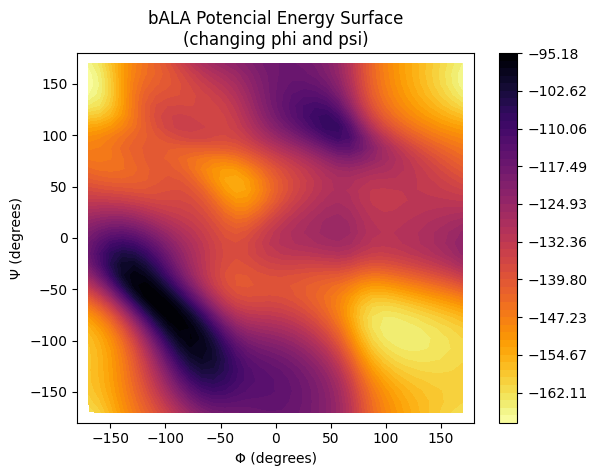

In [7]:
# Interpolate data.
grid_phi, grid_psi = np.mgrid[-180:180:36j, -180:180:36j]
grid_E = griddata((results["phi"], results["psi"]), results["energy"], (grid_phi, grid_psi), method='cubic')
levels = np.linspace (min(results["energy"]), max(results["energy"]), 50)

# Prepare countour level plot.
plt.figure()
pes = plt.contourf(grid_phi, grid_psi, grid_E, levels=levels, cmap="inferno_r")
plt.colorbar(pes)
plt.title('bALA Potencial Energy Surface\n(changing phi and psi)')
plt.xlabel('Φ (degrees)')
plt.ylabel('Ψ (degrees)')

plt.show()

In [8]:
geometries_df = pd.DataFrame.from_dict(results)
geometries_df

phi         psi      energy  \
0    -179.999136  179.994664 -164.793560   
1    -179.999616 -169.719007 -162.658367   
2     179.999625 -159.432143 -160.854128   
3     179.998757 -149.144639 -159.711943   
4     179.997941 -138.857373 -159.309913   
...          ...         ...         ...   
1291 -179.996927  138.863065 -166.433570   
1292 -179.997307  149.144855 -168.054344   
1293 -179.998126  159.426936 -168.036064   
1294 -179.998584  169.710111 -166.770803   
1295 -179.999211  179.994553 -164.793584   

                                            coordinates  
0     <pScientific.Geometry3.Coordinates3.Coordinate...  
1     <pScientific.Geometry3.Coordinates3.Coordinate...  
2     <pScientific.Geometry3.Coordinates3.Coordinate...  
3     <pScientific.Geometry3.Coordinates3.Coordinate...  
4     <pScientific.Geometry3.Coordinates3.Coordinate...  
...                                                 ...  
1291  <pScientific.Geometry3.Coordinates3.Coordinate...  
1292  <pScientific.Geometry3.Coordinates3.Coordinate...  
1293  <pScientific.Geometry3.Coordinates3.Coordinate...  
1294  <pScientific.Geometry3.Coordinates3.Coordinate...  
1295  <pScientific.Geometry3.Coordinates3.Coordinate...  

[1296 rows x 4 columns]

In [9]:
geometries_df[geometries_df.energy == min(geometries_df["energy"])]

phi         psi      energy  \
1292 -179.997307  149.144855 -168.054344   

                                            coordinates  
1292  <pScientific.Geometry3.Coordinates3.Coordinate...

In [10]:
geometries_df[geometries_df.energy == max(geometries_df["energy"])]

phi       psi     energy  \
264 -107.995606 -56.56651 -95.183772   

                                           coordinates  
264  <pScientific.Geometry3.Coordinates3.Coordinate...

In [11]:
min_coords = geometries_df.loc[1292, "coordinates"]
max_coords = geometries_df.loc[264, "coordinates"]

In [12]:
# exporting bALA's minimum energy conformation
molecule.coordinates3 = min_coords
ExportSystem("bALA_min.mol", molecule)


System exported to "bALA_min.mol" in MDL MOL format.


In [13]:
# exporting bALA's minimum energy conformation
molecule.coordinates3 = max_coords
ExportSystem("bALA_max.mol", molecule)


System exported to "bALA_max.mol" in MDL MOL format.


### Most stable molecule:
### Φ: -180º
### Ψ: 149º
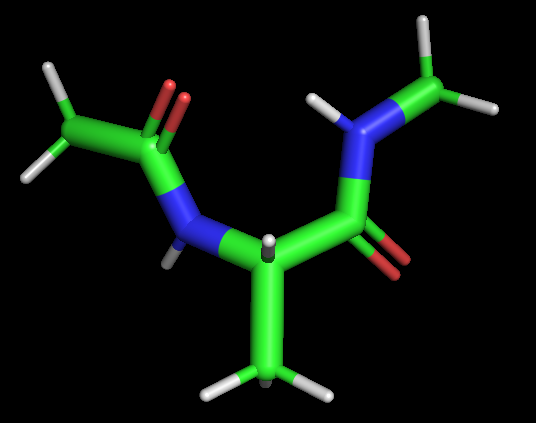
### Least stable molecule :
### Φ: -108º
### Ψ: -57º
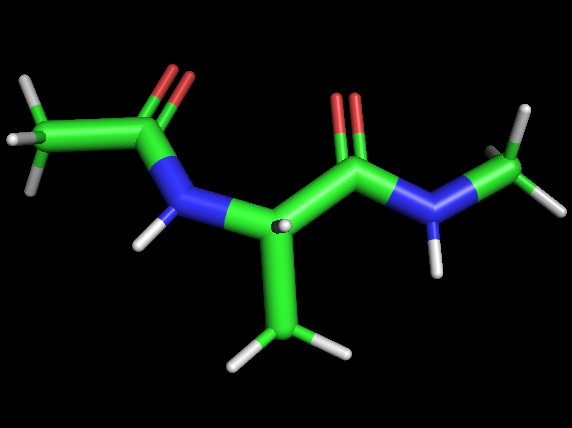

### As we can see, the most stable conformation has the O atoms closer to H atoms, which makes chemical sense, as the O atom has a negative partial charge, while the H atom has a positive partial charge. In the least stable conformation, both the O atoms are closer to each other.